## 1. Importation des données

In [1]:
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [67]:
import h5py

# Chargement des données

X_train = h5py.File('train.h5', 'r')
X_test = h5py.File('test.h5', 'r')
y = np.loadtxt('train_y.csv',  delimiter=',', skiprows=1, usecols=range(1, 2)).astype('int')

#print(list(X_train.keys()))
#print(list(X_test.keys()))
#print(y)


accelerometer_x_train = X_train['accelerometer_x']
accelerometer_y_train = X_train['accelerometer_y']
accelerometer_z_train = X_train['accelerometer_z']
eeg_1_train = X_train['eeg_1']
eeg_2_train = X_train['eeg_2']
eeg_3_train = X_train['eeg_3']
eeg_4_train = X_train['eeg_4']
eeg_5_train = X_train['eeg_5']
eeg_6_train = X_train['eeg_6']
eeg_7_train = X_train['eeg_7']
pulse_oximeter_infrared_train = X_train['pulse_oximeter_infrared']

accelerometer_x_test = X_test['accelerometer_x']
accelerometer_y_test = X_test['accelerometer_y']
accelerometer_z_test = X_test['accelerometer_z']
eeg_1_test = X_test['eeg_1']
eeg_2_test = X_test['eeg_2']
eeg_3_test = X_test['eeg_3']
eeg_4_test = X_test['eeg_4']
eeg_5_test = X_test['eeg_5']
eeg_6_test = X_test['eeg_6']
eeg_7_test = X_test['eeg_7']
pulse_oximeter_infrared_test = X_test['pulse_oximeter_infrared']

keys=list(X_train.keys())
train_dataset_size=len(accelerometer_x_train)
test_dataset_size=len(accelerometer_x_test)

## 2. Visualisation des données

### 2.1. Distribution des étiquettes

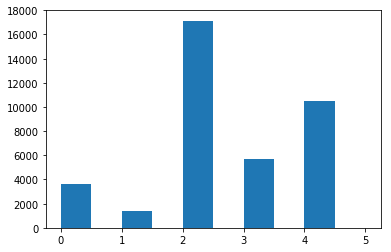

In [54]:
plt.hist(y, range = (0, 5))
plt.show()

### 2.2. Visualisation des signaux

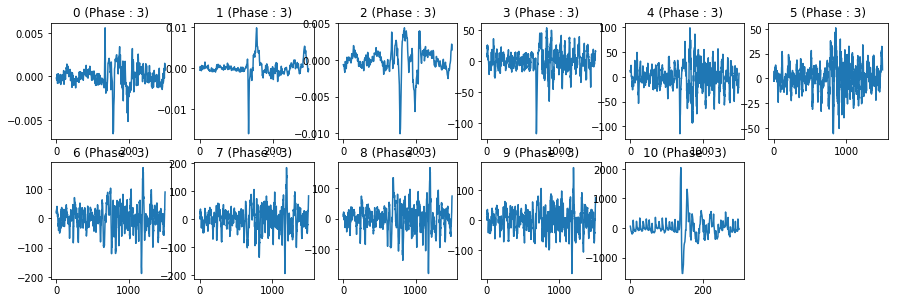

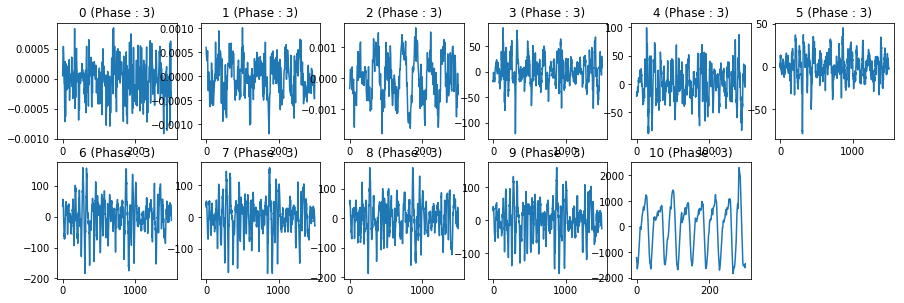

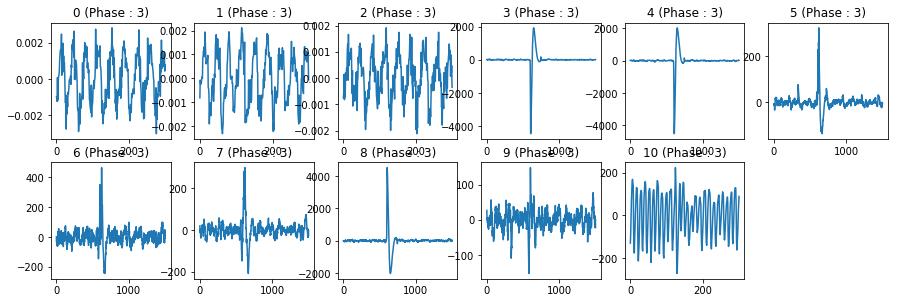

In [70]:
for i in range(3):
    plt.figure(figsize=(15,15))
    for k_id in range(len(keys)):
        k=keys[k_id]
        plt.subplot(6,6,k_id+1)
        plt.plot(X_train[k][i])
        plt.title(str(k_id) + " (Phase : " + str(y[i]) + ")")

## 3. Analyse fréquentielle

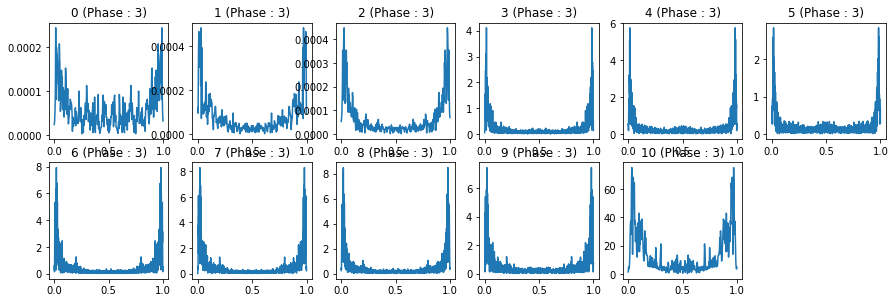

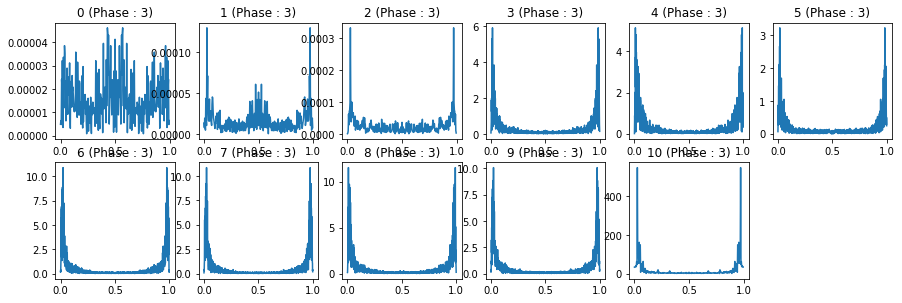

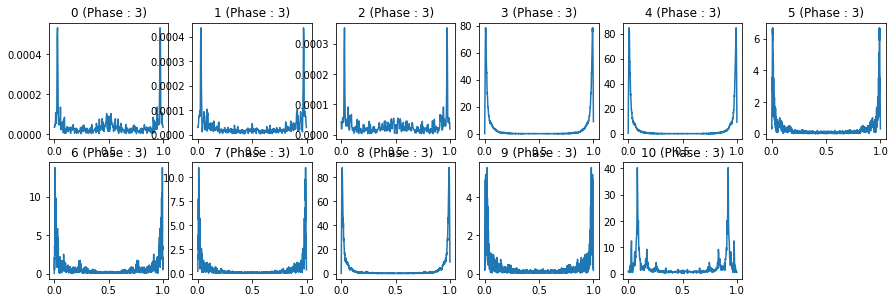

In [63]:
for i in range(3):
    plt.figure(figsize=(15,15))
    for k_id in range(len(keys)):
        k=keys[k_id]
        signal=X_train[k][i]
        
        Ne = len(signal)
        Te = 1
        spectre = np.absolute(numpy.fft.fft(signal))/Ne
        frequences = np.arange(Ne,)*1.0/(Te*Ne)
        
        plt.subplot(6,6,k_id+1)
        plt.plot(frequences,spectre)
        plt.title(str(k_id) + " (Phase : " + str(y[i]) + ")")

### Observations :

L'amplitude des fréquences varie en fonction de la phase... à compléter

## 3. Validation croisée

In [35]:
# Validation croisées en 10 dataset élémentaires

from sklearn import cross_validation

folds = cross_validation.StratifiedKFold(y, 10, shuffle=True)
print(folds)

In [ ]:
from sklearn import preprocessing
def cross_validate(design_matrix, labels, classifier, cv_folds):
    """ Perform a cross-validation and returns the predictions.
    
    Parameters:
    -----------
    design_matrix: (n_samples, n_features) np.array
        Design matrix for the experiment.
    labels: (n_samples, ) np.array
        Vector of labels.
    classifier:  sklearn classifier object
        Classifier instance; must have the following methods:
        - fit(X, y) to train the classifier on the data X, y
        - predict_proba(X) to apply the trained classifier to the data X and return probability estimates 
    cv_folds: sklearn cross-validation object
        Cross-validation iterator.
        
    Return:
    -------
    pred: (n_samples, ) np.array
        Vectors of predictions (same order as labels).
    """
    pred = np.zeros(labels.shape)
    prob = np.zeros(labels.shape)
    for tr, te in cv_folds:
        
        # Restrict data to train/test folds
        Xtr = design_matrix[tr, :]
        ytr = labels[tr]
        Xte = design_matrix[te, :]

        # Scale data
        scaler = preprocessing.StandardScaler() # create scaler
        Xtr = scaler.fit_transform(Xtr) # fit the scaler to the training data and transform training data
        Xte = scaler.transform(Xte) # transform test data
        
        # Fit classifier
        classifier.fit(Xtr, ytr)

        # Predict probabilities (of belonging to +1 class) on test data
        yte_prob = classifier.predict_proba(Xte)
        yte_pred = classifier.predict(Xte)
        
        index_of_class_1 = 1-classifier.classes_[0]  # 0 if the first sample is positive, 1 otherwise
        
        prob[te] = yte_prob[:, index_of_class_1]
        pred[te] = yte_pred
    return pred, prob

## 4. Etude en amplitude fréquentielle maximale

### Préparation des matrices de design

In [ ]:
X_train_preprocessed = np.zeros((train_dataset_size,len(keys)))
for k_id in range(len(keys)):
    k=keys[k_id]
    signals = X_train[k]
    for i in range(train_dataset_size):
        signal = signals[i]
        Ne = len(signal)
        spectre = np.absolute(numpy.fft.fft(signal))/Ne
        X_train_preprocessed[i,k_id]=max(spectre)
        print(k," - ",i)

np.savetxt('X_train_preprocessed_amplitude.txt',X_train_preprocessed, delimiter=',',fmt="%s") 
        
X_test_preprocessed = np.zeros((test_dataset_size,len(keys)))
for k_id in range(len(keys)):
    k=keys[k_id]
    signals = X_test[k]
    for i in range(test_dataset_size):
        signal = signals[i]
        Ne = len(signal)
        spectre = np.absolute(numpy.fft.fft(signal))/Ne
        X_test_preprocessed[i,k_id]=max(spectre)
        print(k," - ",i)
        
np.savetxt('X_test_preprocessed_amplitude.txt',X_test_preprocessed, delimiter=',',fmt="%s") 

print(X_train_preprocessed[50])
print(X_test_preprocessed[50])

accelerometer_x  -  0
accelerometer_x  -  1
accelerometer_x  -  2
accelerometer_x  -  3
accelerometer_x  -  4
accelerometer_x  -  5
accelerometer_x  -  6
accelerometer_x  -  7
accelerometer_x  -  8
accelerometer_x  -  9
accelerometer_x  -  10
accelerometer_x  -  11
accelerometer_x  -  12
accelerometer_x  -  13
accelerometer_x  -  14
accelerometer_x  -  15
accelerometer_x  -  16
accelerometer_x  -  17
accelerometer_x  -  18
accelerometer_x  -  19
accelerometer_x  -  20
accelerometer_x  -  21
accelerometer_x  -  22
accelerometer_x  -  23
accelerometer_x  -  24
accelerometer_x  -  25
accelerometer_x  -  26
accelerometer_x  -  27
accelerometer_x  -  28
accelerometer_x  -  29
accelerometer_x  -  30
accelerometer_x  -  31
accelerometer_x  -  32
accelerometer_x  -  33
accelerometer_x  -  34
accelerometer_x  -  35
accelerometer_x  -  36
accelerometer_x  -  37
accelerometer_x  -  38
accelerometer_x  -  39
accelerometer_x  -  40
accelerometer_x  -  41
accelerometer_x  -  42
accelerometer_x  -  4

accelerometer_x  -  355
accelerometer_x  -  356
accelerometer_x  -  357
accelerometer_x  -  358
accelerometer_x  -  359
accelerometer_x  -  360
accelerometer_x  -  361
accelerometer_x  -  362
accelerometer_x  -  363
accelerometer_x  -  364
accelerometer_x  -  365
accelerometer_x  -  366
accelerometer_x  -  367
accelerometer_x  -  368
accelerometer_x  -  369
accelerometer_x  -  370
accelerometer_x  -  371
accelerometer_x  -  372
accelerometer_x  -  373
accelerometer_x  -  374
accelerometer_x  -  375
accelerometer_x  -  376
accelerometer_x  -  377
accelerometer_x  -  378
accelerometer_x  -  379
accelerometer_x  -  380
accelerometer_x  -  381
accelerometer_x  -  382
accelerometer_x  -  383
accelerometer_x  -  384
accelerometer_x  -  385
accelerometer_x  -  386
accelerometer_x  -  387
accelerometer_x  -  388
accelerometer_x  -  389
accelerometer_x  -  390
accelerometer_x  -  391
accelerometer_x  -  392
accelerometer_x  -  393
accelerometer_x  -  394
accelerometer_x  -  395
accelerometer_x 

accelerometer_x  -  709
accelerometer_x  -  710
accelerometer_x  -  711
accelerometer_x  -  712
accelerometer_x  -  713
accelerometer_x  -  714
accelerometer_x  -  715
accelerometer_x  -  716
accelerometer_x  -  717
accelerometer_x  -  718
accelerometer_x  -  719
accelerometer_x  -  720
accelerometer_x  -  721
accelerometer_x  -  722
accelerometer_x  -  723
accelerometer_x  -  724
accelerometer_x  -  725
accelerometer_x  -  726
accelerometer_x  -  727
accelerometer_x  -  728
accelerometer_x  -  729
accelerometer_x  -  730
accelerometer_x  -  731
accelerometer_x  -  732
accelerometer_x  -  733
accelerometer_x  -  734
accelerometer_x  -  735
accelerometer_x  -  736
accelerometer_x  -  737
accelerometer_x  -  738
accelerometer_x  -  739
accelerometer_x  -  740
accelerometer_x  -  741
accelerometer_x  -  742
accelerometer_x  -  743
accelerometer_x  -  744
accelerometer_x  -  745
accelerometer_x  -  746
accelerometer_x  -  747
accelerometer_x  -  748
accelerometer_x  -  749
accelerometer_x 

accelerometer_x  -  1053
accelerometer_x  -  1054
accelerometer_x  -  1055
accelerometer_x  -  1056
accelerometer_x  -  1057
accelerometer_x  -  1058
accelerometer_x  -  1059
accelerometer_x  -  1060
accelerometer_x  -  1061
accelerometer_x  -  1062
accelerometer_x  -  1063
accelerometer_x  -  1064
accelerometer_x  -  1065
accelerometer_x  -  1066
accelerometer_x  -  1067
accelerometer_x  -  1068
accelerometer_x  -  1069
accelerometer_x  -  1070
accelerometer_x  -  1071
accelerometer_x  -  1072
accelerometer_x  -  1073
accelerometer_x  -  1074
accelerometer_x  -  1075
accelerometer_x  -  1076
accelerometer_x  -  1077
accelerometer_x  -  1078
accelerometer_x  -  1079
accelerometer_x  -  1080
accelerometer_x  -  1081
accelerometer_x  -  1082
accelerometer_x  -  1083
accelerometer_x  -  1084
accelerometer_x  -  1085
accelerometer_x  -  1086
accelerometer_x  -  1087
accelerometer_x  -  1088
accelerometer_x  -  1089
accelerometer_x  -  1090
accelerometer_x  -  1091
accelerometer_x  -  1092


accelerometer_x  -  1415
accelerometer_x  -  1416
accelerometer_x  -  1417
accelerometer_x  -  1418
accelerometer_x  -  1419
accelerometer_x  -  1420
accelerometer_x  -  1421
accelerometer_x  -  1422
accelerometer_x  -  1423
accelerometer_x  -  1424
accelerometer_x  -  1425
accelerometer_x  -  1426
accelerometer_x  -  1427
accelerometer_x  -  1428
accelerometer_x  -  1429
accelerometer_x  -  1430
accelerometer_x  -  1431
accelerometer_x  -  1432
accelerometer_x  -  1433
accelerometer_x  -  1434
accelerometer_x  -  1435
accelerometer_x  -  1436
accelerometer_x  -  1437
accelerometer_x  -  1438
accelerometer_x  -  1439
accelerometer_x  -  1440
accelerometer_x  -  1441
accelerometer_x  -  1442
accelerometer_x  -  1443
accelerometer_x  -  1444
accelerometer_x  -  1445
accelerometer_x  -  1446
accelerometer_x  -  1447
accelerometer_x  -  1448
accelerometer_x  -  1449
accelerometer_x  -  1450
accelerometer_x  -  1451
accelerometer_x  -  1452
accelerometer_x  -  1453
accelerometer_x  -  1454


accelerometer_x  -  1772
accelerometer_x  -  1773
accelerometer_x  -  1774
accelerometer_x  -  1775
accelerometer_x  -  1776
accelerometer_x  -  1777
accelerometer_x  -  1778
accelerometer_x  -  1779
accelerometer_x  -  1780
accelerometer_x  -  1781
accelerometer_x  -  1782
accelerometer_x  -  1783
accelerometer_x  -  1784
accelerometer_x  -  1785
accelerometer_x  -  1786
accelerometer_x  -  1787
accelerometer_x  -  1788
accelerometer_x  -  1789
accelerometer_x  -  1790
accelerometer_x  -  1791
accelerometer_x  -  1792
accelerometer_x  -  1793
accelerometer_x  -  1794
accelerometer_x  -  1795
accelerometer_x  -  1796
accelerometer_x  -  1797
accelerometer_x  -  1798
accelerometer_x  -  1799
accelerometer_x  -  1800
accelerometer_x  -  1801
accelerometer_x  -  1802
accelerometer_x  -  1803
accelerometer_x  -  1804
accelerometer_x  -  1805
accelerometer_x  -  1806
accelerometer_x  -  1807
accelerometer_x  -  1808
accelerometer_x  -  1809
accelerometer_x  -  1810
accelerometer_x  -  1811


accelerometer_x  -  2121
accelerometer_x  -  2122
accelerometer_x  -  2123
accelerometer_x  -  2124
accelerometer_x  -  2125
accelerometer_x  -  2126
accelerometer_x  -  2127
accelerometer_x  -  2128
accelerometer_x  -  2129
accelerometer_x  -  2130
accelerometer_x  -  2131
accelerometer_x  -  2132
accelerometer_x  -  2133
accelerometer_x  -  2134
accelerometer_x  -  2135
accelerometer_x  -  2136
accelerometer_x  -  2137
accelerometer_x  -  2138
accelerometer_x  -  2139
accelerometer_x  -  2140
accelerometer_x  -  2141
accelerometer_x  -  2142
accelerometer_x  -  2143
accelerometer_x  -  2144
accelerometer_x  -  2145
accelerometer_x  -  2146
accelerometer_x  -  2147
accelerometer_x  -  2148
accelerometer_x  -  2149
accelerometer_x  -  2150
accelerometer_x  -  2151
accelerometer_x  -  2152
accelerometer_x  -  2153
accelerometer_x  -  2154
accelerometer_x  -  2155
accelerometer_x  -  2156
accelerometer_x  -  2157
accelerometer_x  -  2158
accelerometer_x  -  2159
accelerometer_x  -  2160


accelerometer_x  -  2494
accelerometer_x  -  2495
accelerometer_x  -  2496
accelerometer_x  -  2497
accelerometer_x  -  2498
accelerometer_x  -  2499
accelerometer_x  -  2500
accelerometer_x  -  2501
accelerometer_x  -  2502
accelerometer_x  -  2503
accelerometer_x  -  2504
accelerometer_x  -  2505
accelerometer_x  -  2506
accelerometer_x  -  2507
accelerometer_x  -  2508
accelerometer_x  -  2509
accelerometer_x  -  2510
accelerometer_x  -  2511
accelerometer_x  -  2512
accelerometer_x  -  2513
accelerometer_x  -  2514
accelerometer_x  -  2515
accelerometer_x  -  2516
accelerometer_x  -  2517
accelerometer_x  -  2518
accelerometer_x  -  2519
accelerometer_x  -  2520
accelerometer_x  -  2521
accelerometer_x  -  2522
accelerometer_x  -  2523
accelerometer_x  -  2524
accelerometer_x  -  2525
accelerometer_x  -  2526
accelerometer_x  -  2527
accelerometer_x  -  2528
accelerometer_x  -  2529
accelerometer_x  -  2530
accelerometer_x  -  2531
accelerometer_x  -  2532
accelerometer_x  -  2533


accelerometer_x  -  2832
accelerometer_x  -  2833
accelerometer_x  -  2834
accelerometer_x  -  2835
accelerometer_x  -  2836
accelerometer_x  -  2837
accelerometer_x  -  2838
accelerometer_x  -  2839
accelerometer_x  -  2840
accelerometer_x  -  2841
accelerometer_x  -  2842
accelerometer_x  -  2843
accelerometer_x  -  2844
accelerometer_x  -  2845
accelerometer_x  -  2846
accelerometer_x  -  2847
accelerometer_x  -  2848
accelerometer_x  -  2849
accelerometer_x  -  2850
accelerometer_x  -  2851
accelerometer_x  -  2852
accelerometer_x  -  2853
accelerometer_x  -  2854
accelerometer_x  -  2855
accelerometer_x  -  2856
accelerometer_x  -  2857
accelerometer_x  -  2858
accelerometer_x  -  2859
accelerometer_x  -  2860
accelerometer_x  -  2861
accelerometer_x  -  2862
accelerometer_x  -  2863
accelerometer_x  -  2864
accelerometer_x  -  2865
accelerometer_x  -  2866
accelerometer_x  -  2867
accelerometer_x  -  2868
accelerometer_x  -  2869
accelerometer_x  -  2870
accelerometer_x  -  2871


accelerometer_x  -  3205
accelerometer_x  -  3206
accelerometer_x  -  3207
accelerometer_x  -  3208
accelerometer_x  -  3209
accelerometer_x  -  3210
accelerometer_x  -  3211
accelerometer_x  -  3212
accelerometer_x  -  3213
accelerometer_x  -  3214
accelerometer_x  -  3215
accelerometer_x  -  3216
accelerometer_x  -  3217
accelerometer_x  -  3218
accelerometer_x  -  3219
accelerometer_x  -  3220
accelerometer_x  -  3221
accelerometer_x  -  3222
accelerometer_x  -  3223
accelerometer_x  -  3224
accelerometer_x  -  3225
accelerometer_x  -  3226
accelerometer_x  -  3227
accelerometer_x  -  3228
accelerometer_x  -  3229
accelerometer_x  -  3230
accelerometer_x  -  3231
accelerometer_x  -  3232
accelerometer_x  -  3233
accelerometer_x  -  3234
accelerometer_x  -  3235
accelerometer_x  -  3236
accelerometer_x  -  3237
accelerometer_x  -  3238
accelerometer_x  -  3239
accelerometer_x  -  3240
accelerometer_x  -  3241
accelerometer_x  -  3242
accelerometer_x  -  3243
accelerometer_x  -  3244


accelerometer_x  -  3578
accelerometer_x  -  3579
accelerometer_x  -  3580
accelerometer_x  -  3581
accelerometer_x  -  3582
accelerometer_x  -  3583
accelerometer_x  -  3584
accelerometer_x  -  3585
accelerometer_x  -  3586
accelerometer_x  -  3587
accelerometer_x  -  3588
accelerometer_x  -  3589
accelerometer_x  -  3590
accelerometer_x  -  3591
accelerometer_x  -  3592
accelerometer_x  -  3593
accelerometer_x  -  3594
accelerometer_x  -  3595
accelerometer_x  -  3596
accelerometer_x  -  3597
accelerometer_x  -  3598
accelerometer_x  -  3599
accelerometer_x  -  3600
accelerometer_x  -  3601
accelerometer_x  -  3602
accelerometer_x  -  3603
accelerometer_x  -  3604
accelerometer_x  -  3605
accelerometer_x  -  3606
accelerometer_x  -  3607
accelerometer_x  -  3608
accelerometer_x  -  3609
accelerometer_x  -  3610
accelerometer_x  -  3611
accelerometer_x  -  3612
accelerometer_x  -  3613
accelerometer_x  -  3614
accelerometer_x  -  3615
accelerometer_x  -  3616
accelerometer_x  -  3617


accelerometer_x  -  3949
accelerometer_x  -  3950
accelerometer_x  -  3951
accelerometer_x  -  3952
accelerometer_x  -  3953
accelerometer_x  -  3954
accelerometer_x  -  3955
accelerometer_x  -  3956
accelerometer_x  -  3957
accelerometer_x  -  3958
accelerometer_x  -  3959
accelerometer_x  -  3960
accelerometer_x  -  3961
accelerometer_x  -  3962
accelerometer_x  -  3963
accelerometer_x  -  3964
accelerometer_x  -  3965
accelerometer_x  -  3966
accelerometer_x  -  3967
accelerometer_x  -  3968
accelerometer_x  -  3969
accelerometer_x  -  3970
accelerometer_x  -  3971
accelerometer_x  -  3972
accelerometer_x  -  3973
accelerometer_x  -  3974
accelerometer_x  -  3975
accelerometer_x  -  3976
accelerometer_x  -  3977
accelerometer_x  -  3978
accelerometer_x  -  3979
accelerometer_x  -  3980
accelerometer_x  -  3981
accelerometer_x  -  3982
accelerometer_x  -  3983
accelerometer_x  -  3984
accelerometer_x  -  3985
accelerometer_x  -  3986
accelerometer_x  -  3987
accelerometer_x  -  3988


accelerometer_x  -  4281
accelerometer_x  -  4282
accelerometer_x  -  4283
accelerometer_x  -  4284
accelerometer_x  -  4285
accelerometer_x  -  4286
accelerometer_x  -  4287
accelerometer_x  -  4288
accelerometer_x  -  4289
accelerometer_x  -  4290
accelerometer_x  -  4291
accelerometer_x  -  4292
accelerometer_x  -  4293
accelerometer_x  -  4294
accelerometer_x  -  4295
accelerometer_x  -  4296
accelerometer_x  -  4297
accelerometer_x  -  4298
accelerometer_x  -  4299
accelerometer_x  -  4300
accelerometer_x  -  4301
accelerometer_x  -  4302
accelerometer_x  -  4303
accelerometer_x  -  4304
accelerometer_x  -  4305
accelerometer_x  -  4306
accelerometer_x  -  4307
accelerometer_x  -  4308
accelerometer_x  -  4309
accelerometer_x  -  4310
accelerometer_x  -  4311
accelerometer_x  -  4312
accelerometer_x  -  4313
accelerometer_x  -  4314
accelerometer_x  -  4315
accelerometer_x  -  4316
accelerometer_x  -  4317
accelerometer_x  -  4318
accelerometer_x  -  4319
accelerometer_x  -  4320


accelerometer_x  -  4614
accelerometer_x  -  4615
accelerometer_x  -  4616
accelerometer_x  -  4617
accelerometer_x  -  4618
accelerometer_x  -  4619
accelerometer_x  -  4620
accelerometer_x  -  4621
accelerometer_x  -  4622
accelerometer_x  -  4623
accelerometer_x  -  4624
accelerometer_x  -  4625
accelerometer_x  -  4626
accelerometer_x  -  4627
accelerometer_x  -  4628
accelerometer_x  -  4629
accelerometer_x  -  4630
accelerometer_x  -  4631
accelerometer_x  -  4632
accelerometer_x  -  4633
accelerometer_x  -  4634
accelerometer_x  -  4635
accelerometer_x  -  4636
accelerometer_x  -  4637
accelerometer_x  -  4638
accelerometer_x  -  4639
accelerometer_x  -  4640
accelerometer_x  -  4641
accelerometer_x  -  4642
accelerometer_x  -  4643
accelerometer_x  -  4644
accelerometer_x  -  4645
accelerometer_x  -  4646
accelerometer_x  -  4647
accelerometer_x  -  4648
accelerometer_x  -  4649
accelerometer_x  -  4650
accelerometer_x  -  4651
accelerometer_x  -  4652
accelerometer_x  -  4653


accelerometer_x  -  4946
accelerometer_x  -  4947
accelerometer_x  -  4948
accelerometer_x  -  4949
accelerometer_x  -  4950
accelerometer_x  -  4951
accelerometer_x  -  4952
accelerometer_x  -  4953
accelerometer_x  -  4954
accelerometer_x  -  4955
accelerometer_x  -  4956
accelerometer_x  -  4957
accelerometer_x  -  4958
accelerometer_x  -  4959
accelerometer_x  -  4960
accelerometer_x  -  4961
accelerometer_x  -  4962
accelerometer_x  -  4963
accelerometer_x  -  4964
accelerometer_x  -  4965
accelerometer_x  -  4966
accelerometer_x  -  4967
accelerometer_x  -  4968
accelerometer_x  -  4969
accelerometer_x  -  4970
accelerometer_x  -  4971
accelerometer_x  -  4972
accelerometer_x  -  4973
accelerometer_x  -  4974
accelerometer_x  -  4975
accelerometer_x  -  4976
accelerometer_x  -  4977
accelerometer_x  -  4978
accelerometer_x  -  4979
accelerometer_x  -  4980
accelerometer_x  -  4981
accelerometer_x  -  4982
accelerometer_x  -  4983
accelerometer_x  -  4984
accelerometer_x  -  4985


accelerometer_x  -  5278
accelerometer_x  -  5279
accelerometer_x  -  5280
accelerometer_x  -  5281
accelerometer_x  -  5282
accelerometer_x  -  5283
accelerometer_x  -  5284
accelerometer_x  -  5285
accelerometer_x  -  5286
accelerometer_x  -  5287
accelerometer_x  -  5288
accelerometer_x  -  5289
accelerometer_x  -  5290
accelerometer_x  -  5291
accelerometer_x  -  5292
accelerometer_x  -  5293
accelerometer_x  -  5294
accelerometer_x  -  5295
accelerometer_x  -  5296
accelerometer_x  -  5297
accelerometer_x  -  5298
accelerometer_x  -  5299
accelerometer_x  -  5300
accelerometer_x  -  5301
accelerometer_x  -  5302
accelerometer_x  -  5303
accelerometer_x  -  5304
accelerometer_x  -  5305
accelerometer_x  -  5306
accelerometer_x  -  5307
accelerometer_x  -  5308
accelerometer_x  -  5309
accelerometer_x  -  5310
accelerometer_x  -  5311
accelerometer_x  -  5312
accelerometer_x  -  5313
accelerometer_x  -  5314
accelerometer_x  -  5315
accelerometer_x  -  5316
accelerometer_x  -  5317


accelerometer_x  -  5620
accelerometer_x  -  5621
accelerometer_x  -  5622
accelerometer_x  -  5623
accelerometer_x  -  5624
accelerometer_x  -  5625
accelerometer_x  -  5626
accelerometer_x  -  5627
accelerometer_x  -  5628
accelerometer_x  -  5629
accelerometer_x  -  5630
accelerometer_x  -  5631
accelerometer_x  -  5632
accelerometer_x  -  5633
accelerometer_x  -  5634
accelerometer_x  -  5635
accelerometer_x  -  5636
accelerometer_x  -  5637
accelerometer_x  -  5638
accelerometer_x  -  5639
accelerometer_x  -  5640
accelerometer_x  -  5641
accelerometer_x  -  5642
accelerometer_x  -  5643
accelerometer_x  -  5644
accelerometer_x  -  5645
accelerometer_x  -  5646
accelerometer_x  -  5647
accelerometer_x  -  5648
accelerometer_x  -  5649
accelerometer_x  -  5650
accelerometer_x  -  5651
accelerometer_x  -  5652
accelerometer_x  -  5653
accelerometer_x  -  5654
accelerometer_x  -  5655
accelerometer_x  -  5656
accelerometer_x  -  5657
accelerometer_x  -  5658
accelerometer_x  -  5659


accelerometer_x  -  5957
accelerometer_x  -  5958
accelerometer_x  -  5959
accelerometer_x  -  5960
accelerometer_x  -  5961
accelerometer_x  -  5962
accelerometer_x  -  5963
accelerometer_x  -  5964
accelerometer_x  -  5965
accelerometer_x  -  5966
accelerometer_x  -  5967
accelerometer_x  -  5968
accelerometer_x  -  5969
accelerometer_x  -  5970
accelerometer_x  -  5971
accelerometer_x  -  5972
accelerometer_x  -  5973
accelerometer_x  -  5974
accelerometer_x  -  5975
accelerometer_x  -  5976
accelerometer_x  -  5977
accelerometer_x  -  5978
accelerometer_x  -  5979
accelerometer_x  -  5980
accelerometer_x  -  5981
accelerometer_x  -  5982
accelerometer_x  -  5983
accelerometer_x  -  5984
accelerometer_x  -  5985
accelerometer_x  -  5986
accelerometer_x  -  5987
accelerometer_x  -  5988
accelerometer_x  -  5989
accelerometer_x  -  5990
accelerometer_x  -  5991
accelerometer_x  -  5992
accelerometer_x  -  5993
accelerometer_x  -  5994
accelerometer_x  -  5995
accelerometer_x  -  5996


accelerometer_x  -  6287
accelerometer_x  -  6288
accelerometer_x  -  6289
accelerometer_x  -  6290
accelerometer_x  -  6291
accelerometer_x  -  6292
accelerometer_x  -  6293
accelerometer_x  -  6294
accelerometer_x  -  6295
accelerometer_x  -  6296
accelerometer_x  -  6297
accelerometer_x  -  6298
accelerometer_x  -  6299
accelerometer_x  -  6300
accelerometer_x  -  6301
accelerometer_x  -  6302
accelerometer_x  -  6303
accelerometer_x  -  6304
accelerometer_x  -  6305
accelerometer_x  -  6306
accelerometer_x  -  6307
accelerometer_x  -  6308
accelerometer_x  -  6309
accelerometer_x  -  6310
accelerometer_x  -  6311
accelerometer_x  -  6312
accelerometer_x  -  6313
accelerometer_x  -  6314
accelerometer_x  -  6315
accelerometer_x  -  6316
accelerometer_x  -  6317
accelerometer_x  -  6318
accelerometer_x  -  6319
accelerometer_x  -  6320
accelerometer_x  -  6321
accelerometer_x  -  6322
accelerometer_x  -  6323
accelerometer_x  -  6324
accelerometer_x  -  6325
accelerometer_x  -  6326


accelerometer_x  -  6644
accelerometer_x  -  6645
accelerometer_x  -  6646
accelerometer_x  -  6647
accelerometer_x  -  6648
accelerometer_x  -  6649
accelerometer_x  -  6650
accelerometer_x  -  6651
accelerometer_x  -  6652
accelerometer_x  -  6653
accelerometer_x  -  6654
accelerometer_x  -  6655
accelerometer_x  -  6656
accelerometer_x  -  6657
accelerometer_x  -  6658
accelerometer_x  -  6659
accelerometer_x  -  6660
accelerometer_x  -  6661
accelerometer_x  -  6662
accelerometer_x  -  6663
accelerometer_x  -  6664
accelerometer_x  -  6665
accelerometer_x  -  6666
accelerometer_x  -  6667
accelerometer_x  -  6668
accelerometer_x  -  6669
accelerometer_x  -  6670
accelerometer_x  -  6671
accelerometer_x  -  6672
accelerometer_x  -  6673
accelerometer_x  -  6674
accelerometer_x  -  6675
accelerometer_x  -  6676
accelerometer_x  -  6677
accelerometer_x  -  6678
accelerometer_x  -  6679
accelerometer_x  -  6680
accelerometer_x  -  6681
accelerometer_x  -  6682
accelerometer_x  -  6683


accelerometer_x  -  6976
accelerometer_x  -  6977
accelerometer_x  -  6978
accelerometer_x  -  6979
accelerometer_x  -  6980
accelerometer_x  -  6981
accelerometer_x  -  6982
accelerometer_x  -  6983
accelerometer_x  -  6984
accelerometer_x  -  6985
accelerometer_x  -  6986
accelerometer_x  -  6987
accelerometer_x  -  6988
accelerometer_x  -  6989
accelerometer_x  -  6990
accelerometer_x  -  6991
accelerometer_x  -  6992
accelerometer_x  -  6993
accelerometer_x  -  6994
accelerometer_x  -  6995
accelerometer_x  -  6996
accelerometer_x  -  6997
accelerometer_x  -  6998
accelerometer_x  -  6999
accelerometer_x  -  7000
accelerometer_x  -  7001
accelerometer_x  -  7002
accelerometer_x  -  7003
accelerometer_x  -  7004
accelerometer_x  -  7005
accelerometer_x  -  7006
accelerometer_x  -  7007
accelerometer_x  -  7008
accelerometer_x  -  7009
accelerometer_x  -  7010
accelerometer_x  -  7011
accelerometer_x  -  7012
accelerometer_x  -  7013
accelerometer_x  -  7014
accelerometer_x  -  7015


accelerometer_x  -  7317
accelerometer_x  -  7318
accelerometer_x  -  7319
accelerometer_x  -  7320
accelerometer_x  -  7321
accelerometer_x  -  7322
accelerometer_x  -  7323
accelerometer_x  -  7324
accelerometer_x  -  7325
accelerometer_x  -  7326
accelerometer_x  -  7327
accelerometer_x  -  7328
accelerometer_x  -  7329
accelerometer_x  -  7330
accelerometer_x  -  7331
accelerometer_x  -  7332
accelerometer_x  -  7333
accelerometer_x  -  7334
accelerometer_x  -  7335
accelerometer_x  -  7336
accelerometer_x  -  7337
accelerometer_x  -  7338
accelerometer_x  -  7339
accelerometer_x  -  7340
accelerometer_x  -  7341
accelerometer_x  -  7342
accelerometer_x  -  7343
accelerometer_x  -  7344
accelerometer_x  -  7345
accelerometer_x  -  7346
accelerometer_x  -  7347
accelerometer_x  -  7348
accelerometer_x  -  7349
accelerometer_x  -  7350
accelerometer_x  -  7351
accelerometer_x  -  7352
accelerometer_x  -  7353
accelerometer_x  -  7354
accelerometer_x  -  7355
accelerometer_x  -  7356


accelerometer_x  -  7689
accelerometer_x  -  7690
accelerometer_x  -  7691
accelerometer_x  -  7692
accelerometer_x  -  7693
accelerometer_x  -  7694
accelerometer_x  -  7695
accelerometer_x  -  7696
accelerometer_x  -  7697
accelerometer_x  -  7698
accelerometer_x  -  7699
accelerometer_x  -  7700
accelerometer_x  -  7701
accelerometer_x  -  7702
accelerometer_x  -  7703
accelerometer_x  -  7704
accelerometer_x  -  7705
accelerometer_x  -  7706
accelerometer_x  -  7707
accelerometer_x  -  7708
accelerometer_x  -  7709
accelerometer_x  -  7710
accelerometer_x  -  7711
accelerometer_x  -  7712
accelerometer_x  -  7713
accelerometer_x  -  7714
accelerometer_x  -  7715
accelerometer_x  -  7716
accelerometer_x  -  7717
accelerometer_x  -  7718
accelerometer_x  -  7719
accelerometer_x  -  7720
accelerometer_x  -  7721
accelerometer_x  -  7722
accelerometer_x  -  7723
accelerometer_x  -  7724
accelerometer_x  -  7725
accelerometer_x  -  7726
accelerometer_x  -  7727
accelerometer_x  -  7728


accelerometer_x  -  8052
accelerometer_x  -  8053
accelerometer_x  -  8054
accelerometer_x  -  8055
accelerometer_x  -  8056
accelerometer_x  -  8057
accelerometer_x  -  8058
accelerometer_x  -  8059
accelerometer_x  -  8060
accelerometer_x  -  8061
accelerometer_x  -  8062
accelerometer_x  -  8063
accelerometer_x  -  8064
accelerometer_x  -  8065
accelerometer_x  -  8066
accelerometer_x  -  8067
accelerometer_x  -  8068
accelerometer_x  -  8069
accelerometer_x  -  8070
accelerometer_x  -  8071
accelerometer_x  -  8072
accelerometer_x  -  8073
accelerometer_x  -  8074
accelerometer_x  -  8075
accelerometer_x  -  8076
accelerometer_x  -  8077
accelerometer_x  -  8078
accelerometer_x  -  8079
accelerometer_x  -  8080
accelerometer_x  -  8081
accelerometer_x  -  8082
accelerometer_x  -  8083
accelerometer_x  -  8084
accelerometer_x  -  8085
accelerometer_x  -  8086
accelerometer_x  -  8087
accelerometer_x  -  8088
accelerometer_x  -  8089
accelerometer_x  -  8090
accelerometer_x  -  8091


accelerometer_x  -  8382
accelerometer_x  -  8383
accelerometer_x  -  8384
accelerometer_x  -  8385
accelerometer_x  -  8386
accelerometer_x  -  8387
accelerometer_x  -  8388
accelerometer_x  -  8389
accelerometer_x  -  8390
accelerometer_x  -  8391
accelerometer_x  -  8392
accelerometer_x  -  8393
accelerometer_x  -  8394
accelerometer_x  -  8395
accelerometer_x  -  8396
accelerometer_x  -  8397
accelerometer_x  -  8398
accelerometer_x  -  8399
accelerometer_x  -  8400
accelerometer_x  -  8401
accelerometer_x  -  8402
accelerometer_x  -  8403
accelerometer_x  -  8404
accelerometer_x  -  8405
accelerometer_x  -  8406
accelerometer_x  -  8407
accelerometer_x  -  8408
accelerometer_x  -  8409
accelerometer_x  -  8410
accelerometer_x  -  8411
accelerometer_x  -  8412
accelerometer_x  -  8413
accelerometer_x  -  8414
accelerometer_x  -  8415
accelerometer_x  -  8416
accelerometer_x  -  8417
accelerometer_x  -  8418
accelerometer_x  -  8419
accelerometer_x  -  8420
accelerometer_x  -  8421


accelerometer_x  -  8724
accelerometer_x  -  8725
accelerometer_x  -  8726
accelerometer_x  -  8727
accelerometer_x  -  8728
accelerometer_x  -  8729
accelerometer_x  -  8730
accelerometer_x  -  8731
accelerometer_x  -  8732
accelerometer_x  -  8733
accelerometer_x  -  8734
accelerometer_x  -  8735
accelerometer_x  -  8736
accelerometer_x  -  8737
accelerometer_x  -  8738
accelerometer_x  -  8739
accelerometer_x  -  8740
accelerometer_x  -  8741
accelerometer_x  -  8742
accelerometer_x  -  8743
accelerometer_x  -  8744
accelerometer_x  -  8745
accelerometer_x  -  8746
accelerometer_x  -  8747
accelerometer_x  -  8748
accelerometer_x  -  8749
accelerometer_x  -  8750
accelerometer_x  -  8751
accelerometer_x  -  8752
accelerometer_x  -  8753
accelerometer_x  -  8754
accelerometer_x  -  8755
accelerometer_x  -  8756
accelerometer_x  -  8757
accelerometer_x  -  8758
accelerometer_x  -  8759
accelerometer_x  -  8760
accelerometer_x  -  8761
accelerometer_x  -  8762
accelerometer_x  -  8763


accelerometer_x  -  9083
accelerometer_x  -  9084
accelerometer_x  -  9085
accelerometer_x  -  9086
accelerometer_x  -  9087
accelerometer_x  -  9088
accelerometer_x  -  9089
accelerometer_x  -  9090
accelerometer_x  -  9091
accelerometer_x  -  9092
accelerometer_x  -  9093
accelerometer_x  -  9094
accelerometer_x  -  9095
accelerometer_x  -  9096
accelerometer_x  -  9097
accelerometer_x  -  9098
accelerometer_x  -  9099
accelerometer_x  -  9100
accelerometer_x  -  9101
accelerometer_x  -  9102
accelerometer_x  -  9103
accelerometer_x  -  9104
accelerometer_x  -  9105
accelerometer_x  -  9106
accelerometer_x  -  9107
accelerometer_x  -  9108
accelerometer_x  -  9109
accelerometer_x  -  9110
accelerometer_x  -  9111
accelerometer_x  -  9112
accelerometer_x  -  9113
accelerometer_x  -  9114
accelerometer_x  -  9115
accelerometer_x  -  9116
accelerometer_x  -  9117
accelerometer_x  -  9118
accelerometer_x  -  9119
accelerometer_x  -  9120
accelerometer_x  -  9121
accelerometer_x  -  9122


accelerometer_x  -  9412
accelerometer_x  -  9413
accelerometer_x  -  9414
accelerometer_x  -  9415
accelerometer_x  -  9416
accelerometer_x  -  9417
accelerometer_x  -  9418
accelerometer_x  -  9419
accelerometer_x  -  9420
accelerometer_x  -  9421
accelerometer_x  -  9422
accelerometer_x  -  9423
accelerometer_x  -  9424
accelerometer_x  -  9425
accelerometer_x  -  9426
accelerometer_x  -  9427
accelerometer_x  -  9428
accelerometer_x  -  9429
accelerometer_x  -  9430
accelerometer_x  -  9431
accelerometer_x  -  9432
accelerometer_x  -  9433
accelerometer_x  -  9434
accelerometer_x  -  9435
accelerometer_x  -  9436
accelerometer_x  -  9437
accelerometer_x  -  9438
accelerometer_x  -  9439
accelerometer_x  -  9440
accelerometer_x  -  9441
accelerometer_x  -  9442
accelerometer_x  -  9443
accelerometer_x  -  9444
accelerometer_x  -  9445
accelerometer_x  -  9446
accelerometer_x  -  9447
accelerometer_x  -  9448
accelerometer_x  -  9449
accelerometer_x  -  9450
accelerometer_x  -  9451


accelerometer_x  -  9759
accelerometer_x  -  9760
accelerometer_x  -  9761
accelerometer_x  -  9762
accelerometer_x  -  9763
accelerometer_x  -  9764
accelerometer_x  -  9765
accelerometer_x  -  9766
accelerometer_x  -  9767
accelerometer_x  -  9768
accelerometer_x  -  9769
accelerometer_x  -  9770
accelerometer_x  -  9771
accelerometer_x  -  9772
accelerometer_x  -  9773
accelerometer_x  -  9774
accelerometer_x  -  9775
accelerometer_x  -  9776
accelerometer_x  -  9777
accelerometer_x  -  9778
accelerometer_x  -  9779
accelerometer_x  -  9780
accelerometer_x  -  9781
accelerometer_x  -  9782
accelerometer_x  -  9783
accelerometer_x  -  9784
accelerometer_x  -  9785
accelerometer_x  -  9786
accelerometer_x  -  9787
accelerometer_x  -  9788
accelerometer_x  -  9789
accelerometer_x  -  9790
accelerometer_x  -  9791
accelerometer_x  -  9792
accelerometer_x  -  9793
accelerometer_x  -  9794
accelerometer_x  -  9795
accelerometer_x  -  9796
accelerometer_x  -  9797
accelerometer_x  -  9798


accelerometer_x  -  10091
accelerometer_x  -  10092
accelerometer_x  -  10093
accelerometer_x  -  10094
accelerometer_x  -  10095
accelerometer_x  -  10096
accelerometer_x  -  10097
accelerometer_x  -  10098
accelerometer_x  -  10099
accelerometer_x  -  10100
accelerometer_x  -  10101
accelerometer_x  -  10102
accelerometer_x  -  10103
accelerometer_x  -  10104
accelerometer_x  -  10105
accelerometer_x  -  10106
accelerometer_x  -  10107
accelerometer_x  -  10108
accelerometer_x  -  10109
accelerometer_x  -  10110
accelerometer_x  -  10111
accelerometer_x  -  10112
accelerometer_x  -  10113
accelerometer_x  -  10114
accelerometer_x  -  10115
accelerometer_x  -  10116
accelerometer_x  -  10117
accelerometer_x  -  10118
accelerometer_x  -  10119
accelerometer_x  -  10120
accelerometer_x  -  10121
accelerometer_x  -  10122
accelerometer_x  -  10123
accelerometer_x  -  10124
accelerometer_x  -  10125
accelerometer_x  -  10126
accelerometer_x  -  10127
accelerometer_x  -  10128
acceleromete

accelerometer_x  -  10424
accelerometer_x  -  10425
accelerometer_x  -  10426
accelerometer_x  -  10427
accelerometer_x  -  10428
accelerometer_x  -  10429
accelerometer_x  -  10430
accelerometer_x  -  10431
accelerometer_x  -  10432
accelerometer_x  -  10433
accelerometer_x  -  10434
accelerometer_x  -  10435
accelerometer_x  -  10436
accelerometer_x  -  10437
accelerometer_x  -  10438
accelerometer_x  -  10439
accelerometer_x  -  10440
accelerometer_x  -  10441
accelerometer_x  -  10442
accelerometer_x  -  10443
accelerometer_x  -  10444
accelerometer_x  -  10445
accelerometer_x  -  10446
accelerometer_x  -  10447
accelerometer_x  -  10448
accelerometer_x  -  10449
accelerometer_x  -  10450
accelerometer_x  -  10451
accelerometer_x  -  10452
accelerometer_x  -  10453
accelerometer_x  -  10454
accelerometer_x  -  10455
accelerometer_x  -  10456
accelerometer_x  -  10457
accelerometer_x  -  10458
accelerometer_x  -  10459
accelerometer_x  -  10460
accelerometer_x  -  10461
acceleromete

accelerometer_x  -  10756
accelerometer_x  -  10757
accelerometer_x  -  10758
accelerometer_x  -  10759
accelerometer_x  -  10760
accelerometer_x  -  10761
accelerometer_x  -  10762
accelerometer_x  -  10763
accelerometer_x  -  10764
accelerometer_x  -  10765
accelerometer_x  -  10766
accelerometer_x  -  10767
accelerometer_x  -  10768
accelerometer_x  -  10769
accelerometer_x  -  10770
accelerometer_x  -  10771
accelerometer_x  -  10772
accelerometer_x  -  10773
accelerometer_x  -  10774
accelerometer_x  -  10775
accelerometer_x  -  10776
accelerometer_x  -  10777
accelerometer_x  -  10778
accelerometer_x  -  10779
accelerometer_x  -  10780
accelerometer_x  -  10781
accelerometer_x  -  10782
accelerometer_x  -  10783
accelerometer_x  -  10784
accelerometer_x  -  10785
accelerometer_x  -  10786
accelerometer_x  -  10787
accelerometer_x  -  10788
accelerometer_x  -  10789
accelerometer_x  -  10790
accelerometer_x  -  10791
accelerometer_x  -  10792
accelerometer_x  -  10793
acceleromete

accelerometer_x  -  11089
accelerometer_x  -  11090
accelerometer_x  -  11091
accelerometer_x  -  11092
accelerometer_x  -  11093
accelerometer_x  -  11094
accelerometer_x  -  11095
accelerometer_x  -  11096
accelerometer_x  -  11097
accelerometer_x  -  11098
accelerometer_x  -  11099
accelerometer_x  -  11100
accelerometer_x  -  11101
accelerometer_x  -  11102
accelerometer_x  -  11103
accelerometer_x  -  11104
accelerometer_x  -  11105
accelerometer_x  -  11106
accelerometer_x  -  11107
accelerometer_x  -  11108
accelerometer_x  -  11109
accelerometer_x  -  11110
accelerometer_x  -  11111
accelerometer_x  -  11112
accelerometer_x  -  11113
accelerometer_x  -  11114
accelerometer_x  -  11115
accelerometer_x  -  11116
accelerometer_x  -  11117
accelerometer_x  -  11118
accelerometer_x  -  11119
accelerometer_x  -  11120
accelerometer_x  -  11121
accelerometer_x  -  11122
accelerometer_x  -  11123
accelerometer_x  -  11124
accelerometer_x  -  11125
accelerometer_x  -  11126
acceleromete

accelerometer_x  -  11421
accelerometer_x  -  11422
accelerometer_x  -  11423
accelerometer_x  -  11424
accelerometer_x  -  11425
accelerometer_x  -  11426
accelerometer_x  -  11427
accelerometer_x  -  11428
accelerometer_x  -  11429
accelerometer_x  -  11430
accelerometer_x  -  11431
accelerometer_x  -  11432
accelerometer_x  -  11433
accelerometer_x  -  11434
accelerometer_x  -  11435
accelerometer_x  -  11436
accelerometer_x  -  11437
accelerometer_x  -  11438
accelerometer_x  -  11439
accelerometer_x  -  11440
accelerometer_x  -  11441
accelerometer_x  -  11442
accelerometer_x  -  11443
accelerometer_x  -  11444
accelerometer_x  -  11445
accelerometer_x  -  11446
accelerometer_x  -  11447
accelerometer_x  -  11448
accelerometer_x  -  11449
accelerometer_x  -  11450
accelerometer_x  -  11451
accelerometer_x  -  11452
accelerometer_x  -  11453
accelerometer_x  -  11454
accelerometer_x  -  11455
accelerometer_x  -  11456
accelerometer_x  -  11457
accelerometer_x  -  11458
acceleromete

accelerometer_x  -  11754
accelerometer_x  -  11755
accelerometer_x  -  11756
accelerometer_x  -  11757
accelerometer_x  -  11758
accelerometer_x  -  11759
accelerometer_x  -  11760
accelerometer_x  -  11761
accelerometer_x  -  11762
accelerometer_x  -  11763
accelerometer_x  -  11764
accelerometer_x  -  11765
accelerometer_x  -  11766
accelerometer_x  -  11767
accelerometer_x  -  11768
accelerometer_x  -  11769
accelerometer_x  -  11770
accelerometer_x  -  11771
accelerometer_x  -  11772
accelerometer_x  -  11773
accelerometer_x  -  11774
accelerometer_x  -  11775
accelerometer_x  -  11776
accelerometer_x  -  11777
accelerometer_x  -  11778
accelerometer_x  -  11779
accelerometer_x  -  11780
accelerometer_x  -  11781
accelerometer_x  -  11782
accelerometer_x  -  11783
accelerometer_x  -  11784
accelerometer_x  -  11785
accelerometer_x  -  11786
accelerometer_x  -  11787
accelerometer_x  -  11788
accelerometer_x  -  11789
accelerometer_x  -  11790
accelerometer_x  -  11791
acceleromete

accelerometer_x  -  12086
accelerometer_x  -  12087
accelerometer_x  -  12088
accelerometer_x  -  12089
accelerometer_x  -  12090
accelerometer_x  -  12091
accelerometer_x  -  12092
accelerometer_x  -  12093
accelerometer_x  -  12094
accelerometer_x  -  12095
accelerometer_x  -  12096
accelerometer_x  -  12097
accelerometer_x  -  12098
accelerometer_x  -  12099
accelerometer_x  -  12100
accelerometer_x  -  12101
accelerometer_x  -  12102
accelerometer_x  -  12103
accelerometer_x  -  12104
accelerometer_x  -  12105
accelerometer_x  -  12106
accelerometer_x  -  12107
accelerometer_x  -  12108
accelerometer_x  -  12109
accelerometer_x  -  12110
accelerometer_x  -  12111
accelerometer_x  -  12112
accelerometer_x  -  12113
accelerometer_x  -  12114
accelerometer_x  -  12115
accelerometer_x  -  12116
accelerometer_x  -  12117
accelerometer_x  -  12118
accelerometer_x  -  12119
accelerometer_x  -  12120
accelerometer_x  -  12121
accelerometer_x  -  12122
accelerometer_x  -  12123
acceleromete

accelerometer_x  -  12419
accelerometer_x  -  12420
accelerometer_x  -  12421
accelerometer_x  -  12422
accelerometer_x  -  12423
accelerometer_x  -  12424
accelerometer_x  -  12425
accelerometer_x  -  12426
accelerometer_x  -  12427
accelerometer_x  -  12428
accelerometer_x  -  12429
accelerometer_x  -  12430
accelerometer_x  -  12431
accelerometer_x  -  12432
accelerometer_x  -  12433
accelerometer_x  -  12434
accelerometer_x  -  12435
accelerometer_x  -  12436
accelerometer_x  -  12437
accelerometer_x  -  12438
accelerometer_x  -  12439
accelerometer_x  -  12440
accelerometer_x  -  12441
accelerometer_x  -  12442
accelerometer_x  -  12443
accelerometer_x  -  12444
accelerometer_x  -  12445
accelerometer_x  -  12446
accelerometer_x  -  12447
accelerometer_x  -  12448
accelerometer_x  -  12449
accelerometer_x  -  12450
accelerometer_x  -  12451
accelerometer_x  -  12452
accelerometer_x  -  12453
accelerometer_x  -  12454
accelerometer_x  -  12455
accelerometer_x  -  12456
acceleromete

accelerometer_x  -  12742
accelerometer_x  -  12743
accelerometer_x  -  12744
accelerometer_x  -  12745
accelerometer_x  -  12746
accelerometer_x  -  12747
accelerometer_x  -  12748
accelerometer_x  -  12749
accelerometer_x  -  12750
accelerometer_x  -  12751
accelerometer_x  -  12752
accelerometer_x  -  12753
accelerometer_x  -  12754
accelerometer_x  -  12755
accelerometer_x  -  12756
accelerometer_x  -  12757
accelerometer_x  -  12758
accelerometer_x  -  12759
accelerometer_x  -  12760
accelerometer_x  -  12761
accelerometer_x  -  12762
accelerometer_x  -  12763
accelerometer_x  -  12764
accelerometer_x  -  12765
accelerometer_x  -  12766
accelerometer_x  -  12767
accelerometer_x  -  12768
accelerometer_x  -  12769
accelerometer_x  -  12770
accelerometer_x  -  12771
accelerometer_x  -  12772
accelerometer_x  -  12773
accelerometer_x  -  12774
accelerometer_x  -  12775
accelerometer_x  -  12776
accelerometer_x  -  12777
accelerometer_x  -  12778
accelerometer_x  -  12779
acceleromete

accelerometer_x  -  13084
accelerometer_x  -  13085
accelerometer_x  -  13086
accelerometer_x  -  13087
accelerometer_x  -  13088
accelerometer_x  -  13089
accelerometer_x  -  13090
accelerometer_x  -  13091
accelerometer_x  -  13092
accelerometer_x  -  13093
accelerometer_x  -  13094
accelerometer_x  -  13095
accelerometer_x  -  13096
accelerometer_x  -  13097
accelerometer_x  -  13098
accelerometer_x  -  13099
accelerometer_x  -  13100
accelerometer_x  -  13101
accelerometer_x  -  13102
accelerometer_x  -  13103
accelerometer_x  -  13104
accelerometer_x  -  13105
accelerometer_x  -  13106
accelerometer_x  -  13107
accelerometer_x  -  13108
accelerometer_x  -  13109
accelerometer_x  -  13110
accelerometer_x  -  13111
accelerometer_x  -  13112
accelerometer_x  -  13113
accelerometer_x  -  13114
accelerometer_x  -  13115
accelerometer_x  -  13116
accelerometer_x  -  13117
accelerometer_x  -  13118
accelerometer_x  -  13119
accelerometer_x  -  13120
accelerometer_x  -  13121
acceleromete

accelerometer_x  -  13417
accelerometer_x  -  13418
accelerometer_x  -  13419
accelerometer_x  -  13420
accelerometer_x  -  13421
accelerometer_x  -  13422
accelerometer_x  -  13423
accelerometer_x  -  13424
accelerometer_x  -  13425
accelerometer_x  -  13426
accelerometer_x  -  13427
accelerometer_x  -  13428
accelerometer_x  -  13429
accelerometer_x  -  13430
accelerometer_x  -  13431
accelerometer_x  -  13432
accelerometer_x  -  13433
accelerometer_x  -  13434
accelerometer_x  -  13435
accelerometer_x  -  13436
accelerometer_x  -  13437
accelerometer_x  -  13438
accelerometer_x  -  13439
accelerometer_x  -  13440
accelerometer_x  -  13441
accelerometer_x  -  13442
accelerometer_x  -  13443
accelerometer_x  -  13444
accelerometer_x  -  13445
accelerometer_x  -  13446
accelerometer_x  -  13447
accelerometer_x  -  13448
accelerometer_x  -  13449
accelerometer_x  -  13450
accelerometer_x  -  13451
accelerometer_x  -  13452
accelerometer_x  -  13453
accelerometer_x  -  13454
acceleromete

accelerometer_x  -  13749
accelerometer_x  -  13750
accelerometer_x  -  13751
accelerometer_x  -  13752
accelerometer_x  -  13753
accelerometer_x  -  13754
accelerometer_x  -  13755
accelerometer_x  -  13756
accelerometer_x  -  13757
accelerometer_x  -  13758
accelerometer_x  -  13759
accelerometer_x  -  13760
accelerometer_x  -  13761
accelerometer_x  -  13762
accelerometer_x  -  13763
accelerometer_x  -  13764
accelerometer_x  -  13765
accelerometer_x  -  13766
accelerometer_x  -  13767
accelerometer_x  -  13768
accelerometer_x  -  13769
accelerometer_x  -  13770
accelerometer_x  -  13771
accelerometer_x  -  13772
accelerometer_x  -  13773
accelerometer_x  -  13774
accelerometer_x  -  13775
accelerometer_x  -  13776
accelerometer_x  -  13777
accelerometer_x  -  13778
accelerometer_x  -  13779
accelerometer_x  -  13780
accelerometer_x  -  13781
accelerometer_x  -  13782
accelerometer_x  -  13783
accelerometer_x  -  13784
accelerometer_x  -  13785
accelerometer_x  -  13786
acceleromete

accelerometer_x  -  14082
accelerometer_x  -  14083
accelerometer_x  -  14084
accelerometer_x  -  14085
accelerometer_x  -  14086
accelerometer_x  -  14087
accelerometer_x  -  14088
accelerometer_x  -  14089
accelerometer_x  -  14090
accelerometer_x  -  14091
accelerometer_x  -  14092
accelerometer_x  -  14093
accelerometer_x  -  14094
accelerometer_x  -  14095
accelerometer_x  -  14096
accelerometer_x  -  14097
accelerometer_x  -  14098
accelerometer_x  -  14099
accelerometer_x  -  14100
accelerometer_x  -  14101
accelerometer_x  -  14102
accelerometer_x  -  14103
accelerometer_x  -  14104
accelerometer_x  -  14105
accelerometer_x  -  14106
accelerometer_x  -  14107
accelerometer_x  -  14108
accelerometer_x  -  14109
accelerometer_x  -  14110
accelerometer_x  -  14111
accelerometer_x  -  14112
accelerometer_x  -  14113
accelerometer_x  -  14114
accelerometer_x  -  14115
accelerometer_x  -  14116
accelerometer_x  -  14117
accelerometer_x  -  14118
accelerometer_x  -  14119
acceleromete

accelerometer_x  -  14415
accelerometer_x  -  14416
accelerometer_x  -  14417
accelerometer_x  -  14418
accelerometer_x  -  14419
accelerometer_x  -  14420
accelerometer_x  -  14421
accelerometer_x  -  14422
accelerometer_x  -  14423
accelerometer_x  -  14424
accelerometer_x  -  14425
accelerometer_x  -  14426
accelerometer_x  -  14427
accelerometer_x  -  14428
accelerometer_x  -  14429
accelerometer_x  -  14430
accelerometer_x  -  14431
accelerometer_x  -  14432
accelerometer_x  -  14433
accelerometer_x  -  14434
accelerometer_x  -  14435
accelerometer_x  -  14436
accelerometer_x  -  14437
accelerometer_x  -  14438
accelerometer_x  -  14439
accelerometer_x  -  14440
accelerometer_x  -  14441
accelerometer_x  -  14442
accelerometer_x  -  14443
accelerometer_x  -  14444
accelerometer_x  -  14445
accelerometer_x  -  14446
accelerometer_x  -  14447
accelerometer_x  -  14448
accelerometer_x  -  14449
accelerometer_x  -  14450
accelerometer_x  -  14451
accelerometer_x  -  14452
acceleromete

accelerometer_x  -  14747
accelerometer_x  -  14748
accelerometer_x  -  14749
accelerometer_x  -  14750
accelerometer_x  -  14751
accelerometer_x  -  14752
accelerometer_x  -  14753
accelerometer_x  -  14754
accelerometer_x  -  14755
accelerometer_x  -  14756
accelerometer_x  -  14757
accelerometer_x  -  14758
accelerometer_x  -  14759
accelerometer_x  -  14760
accelerometer_x  -  14761
accelerometer_x  -  14762
accelerometer_x  -  14763
accelerometer_x  -  14764
accelerometer_x  -  14765
accelerometer_x  -  14766
accelerometer_x  -  14767
accelerometer_x  -  14768
accelerometer_x  -  14769
accelerometer_x  -  14770
accelerometer_x  -  14771
accelerometer_x  -  14772
accelerometer_x  -  14773
accelerometer_x  -  14774
accelerometer_x  -  14775
accelerometer_x  -  14776
accelerometer_x  -  14777
accelerometer_x  -  14778
accelerometer_x  -  14779
accelerometer_x  -  14780
accelerometer_x  -  14781
accelerometer_x  -  14782
accelerometer_x  -  14783
accelerometer_x  -  14784
acceleromete

accelerometer_x  -  15080
accelerometer_x  -  15081
accelerometer_x  -  15082
accelerometer_x  -  15083
accelerometer_x  -  15084
accelerometer_x  -  15085
accelerometer_x  -  15086
accelerometer_x  -  15087
accelerometer_x  -  15088
accelerometer_x  -  15089
accelerometer_x  -  15090
accelerometer_x  -  15091
accelerometer_x  -  15092
accelerometer_x  -  15093
accelerometer_x  -  15094
accelerometer_x  -  15095
accelerometer_x  -  15096
accelerometer_x  -  15097
accelerometer_x  -  15098
accelerometer_x  -  15099
accelerometer_x  -  15100
accelerometer_x  -  15101
accelerometer_x  -  15102
accelerometer_x  -  15103
accelerometer_x  -  15104
accelerometer_x  -  15105
accelerometer_x  -  15106
accelerometer_x  -  15107
accelerometer_x  -  15108
accelerometer_x  -  15109
accelerometer_x  -  15110
accelerometer_x  -  15111
accelerometer_x  -  15112
accelerometer_x  -  15113
accelerometer_x  -  15114
accelerometer_x  -  15115
accelerometer_x  -  15116
accelerometer_x  -  15117
acceleromete

accelerometer_x  -  15413
accelerometer_x  -  15414
accelerometer_x  -  15415
accelerometer_x  -  15416
accelerometer_x  -  15417
accelerometer_x  -  15418
accelerometer_x  -  15419
accelerometer_x  -  15420
accelerometer_x  -  15421
accelerometer_x  -  15422
accelerometer_x  -  15423
accelerometer_x  -  15424
accelerometer_x  -  15425
accelerometer_x  -  15426
accelerometer_x  -  15427
accelerometer_x  -  15428
accelerometer_x  -  15429
accelerometer_x  -  15430
accelerometer_x  -  15431
accelerometer_x  -  15432
accelerometer_x  -  15433
accelerometer_x  -  15434
accelerometer_x  -  15435
accelerometer_x  -  15436
accelerometer_x  -  15437
accelerometer_x  -  15438
accelerometer_x  -  15439
accelerometer_x  -  15440
accelerometer_x  -  15441
accelerometer_x  -  15442
accelerometer_x  -  15443
accelerometer_x  -  15444
accelerometer_x  -  15445
accelerometer_x  -  15446
accelerometer_x  -  15447
accelerometer_x  -  15448
accelerometer_x  -  15449
accelerometer_x  -  15450
acceleromete

accelerometer_x  -  15745
accelerometer_x  -  15746
accelerometer_x  -  15747
accelerometer_x  -  15748
accelerometer_x  -  15749
accelerometer_x  -  15750
accelerometer_x  -  15751
accelerometer_x  -  15752
accelerometer_x  -  15753
accelerometer_x  -  15754
accelerometer_x  -  15755
accelerometer_x  -  15756
accelerometer_x  -  15757
accelerometer_x  -  15758
accelerometer_x  -  15759
accelerometer_x  -  15760
accelerometer_x  -  15761
accelerometer_x  -  15762
accelerometer_x  -  15763
accelerometer_x  -  15764
accelerometer_x  -  15765
accelerometer_x  -  15766
accelerometer_x  -  15767
accelerometer_x  -  15768
accelerometer_x  -  15769
accelerometer_x  -  15770
accelerometer_x  -  15771
accelerometer_x  -  15772
accelerometer_x  -  15773
accelerometer_x  -  15774
accelerometer_x  -  15775
accelerometer_x  -  15776
accelerometer_x  -  15777
accelerometer_x  -  15778
accelerometer_x  -  15779
accelerometer_x  -  15780
accelerometer_x  -  15781
accelerometer_x  -  15782
acceleromete

accelerometer_x  -  16078
accelerometer_x  -  16079
accelerometer_x  -  16080
accelerometer_x  -  16081
accelerometer_x  -  16082
accelerometer_x  -  16083
accelerometer_x  -  16084
accelerometer_x  -  16085
accelerometer_x  -  16086
accelerometer_x  -  16087
accelerometer_x  -  16088
accelerometer_x  -  16089
accelerometer_x  -  16090
accelerometer_x  -  16091
accelerometer_x  -  16092
accelerometer_x  -  16093
accelerometer_x  -  16094
accelerometer_x  -  16095
accelerometer_x  -  16096
accelerometer_x  -  16097
accelerometer_x  -  16098
accelerometer_x  -  16099
accelerometer_x  -  16100
accelerometer_x  -  16101
accelerometer_x  -  16102
accelerometer_x  -  16103
accelerometer_x  -  16104
accelerometer_x  -  16105
accelerometer_x  -  16106
accelerometer_x  -  16107
accelerometer_x  -  16108
accelerometer_x  -  16109
accelerometer_x  -  16110
accelerometer_x  -  16111
accelerometer_x  -  16112
accelerometer_x  -  16113
accelerometer_x  -  16114
accelerometer_x  -  16115
acceleromete

accelerometer_x  -  16411
accelerometer_x  -  16412
accelerometer_x  -  16413
accelerometer_x  -  16414
accelerometer_x  -  16415
accelerometer_x  -  16416
accelerometer_x  -  16417
accelerometer_x  -  16418
accelerometer_x  -  16419
accelerometer_x  -  16420
accelerometer_x  -  16421
accelerometer_x  -  16422
accelerometer_x  -  16423
accelerometer_x  -  16424
accelerometer_x  -  16425
accelerometer_x  -  16426
accelerometer_x  -  16427
accelerometer_x  -  16428
accelerometer_x  -  16429
accelerometer_x  -  16430
accelerometer_x  -  16431
accelerometer_x  -  16432
accelerometer_x  -  16433
accelerometer_x  -  16434
accelerometer_x  -  16435
accelerometer_x  -  16436
accelerometer_x  -  16437
accelerometer_x  -  16438
accelerometer_x  -  16439
accelerometer_x  -  16440
accelerometer_x  -  16441
accelerometer_x  -  16442
accelerometer_x  -  16443
accelerometer_x  -  16444
accelerometer_x  -  16445
accelerometer_x  -  16446
accelerometer_x  -  16447
accelerometer_x  -  16448
acceleromete

accelerometer_x  -  16743
accelerometer_x  -  16744
accelerometer_x  -  16745
accelerometer_x  -  16746
accelerometer_x  -  16747
accelerometer_x  -  16748
accelerometer_x  -  16749
accelerometer_x  -  16750
accelerometer_x  -  16751
accelerometer_x  -  16752
accelerometer_x  -  16753
accelerometer_x  -  16754
accelerometer_x  -  16755
accelerometer_x  -  16756
accelerometer_x  -  16757
accelerometer_x  -  16758
accelerometer_x  -  16759
accelerometer_x  -  16760
accelerometer_x  -  16761
accelerometer_x  -  16762
accelerometer_x  -  16763
accelerometer_x  -  16764
accelerometer_x  -  16765
accelerometer_x  -  16766
accelerometer_x  -  16767
accelerometer_x  -  16768
accelerometer_x  -  16769
accelerometer_x  -  16770
accelerometer_x  -  16771
accelerometer_x  -  16772
accelerometer_x  -  16773
accelerometer_x  -  16774
accelerometer_x  -  16775
accelerometer_x  -  16776
accelerometer_x  -  16777
accelerometer_x  -  16778
accelerometer_x  -  16779
accelerometer_x  -  16780
acceleromete

accelerometer_x  -  17076
accelerometer_x  -  17077
accelerometer_x  -  17078
accelerometer_x  -  17079
accelerometer_x  -  17080
accelerometer_x  -  17081
accelerometer_x  -  17082
accelerometer_x  -  17083
accelerometer_x  -  17084
accelerometer_x  -  17085
accelerometer_x  -  17086
accelerometer_x  -  17087
accelerometer_x  -  17088
accelerometer_x  -  17089
accelerometer_x  -  17090
accelerometer_x  -  17091
accelerometer_x  -  17092
accelerometer_x  -  17093
accelerometer_x  -  17094
accelerometer_x  -  17095
accelerometer_x  -  17096
accelerometer_x  -  17097
accelerometer_x  -  17098
accelerometer_x  -  17099
accelerometer_x  -  17100
accelerometer_x  -  17101
accelerometer_x  -  17102
accelerometer_x  -  17103
accelerometer_x  -  17104
accelerometer_x  -  17105
accelerometer_x  -  17106
accelerometer_x  -  17107
accelerometer_x  -  17108
accelerometer_x  -  17109
accelerometer_x  -  17110
accelerometer_x  -  17111
accelerometer_x  -  17112
accelerometer_x  -  17113
acceleromete

accelerometer_x  -  17409
accelerometer_x  -  17410
accelerometer_x  -  17411
accelerometer_x  -  17412
accelerometer_x  -  17413
accelerometer_x  -  17414
accelerometer_x  -  17415
accelerometer_x  -  17416
accelerometer_x  -  17417
accelerometer_x  -  17418
accelerometer_x  -  17419
accelerometer_x  -  17420
accelerometer_x  -  17421
accelerometer_x  -  17422
accelerometer_x  -  17423
accelerometer_x  -  17424
accelerometer_x  -  17425
accelerometer_x  -  17426
accelerometer_x  -  17427
accelerometer_x  -  17428
accelerometer_x  -  17429
accelerometer_x  -  17430
accelerometer_x  -  17431
accelerometer_x  -  17432
accelerometer_x  -  17433
accelerometer_x  -  17434
accelerometer_x  -  17435
accelerometer_x  -  17436
accelerometer_x  -  17437
accelerometer_x  -  17438
accelerometer_x  -  17439
accelerometer_x  -  17440
accelerometer_x  -  17441
accelerometer_x  -  17442
accelerometer_x  -  17443
accelerometer_x  -  17444
accelerometer_x  -  17445
accelerometer_x  -  17446
acceleromete

accelerometer_x  -  17735
accelerometer_x  -  17736
accelerometer_x  -  17737
accelerometer_x  -  17738
accelerometer_x  -  17739
accelerometer_x  -  17740
accelerometer_x  -  17741
accelerometer_x  -  17742
accelerometer_x  -  17743
accelerometer_x  -  17744
accelerometer_x  -  17745
accelerometer_x  -  17746
accelerometer_x  -  17747
accelerometer_x  -  17748
accelerometer_x  -  17749
accelerometer_x  -  17750
accelerometer_x  -  17751
accelerometer_x  -  17752
accelerometer_x  -  17753
accelerometer_x  -  17754
accelerometer_x  -  17755
accelerometer_x  -  17756
accelerometer_x  -  17757
accelerometer_x  -  17758
accelerometer_x  -  17759
accelerometer_x  -  17760
accelerometer_x  -  17761
accelerometer_x  -  17762
accelerometer_x  -  17763
accelerometer_x  -  17764
accelerometer_x  -  17765
accelerometer_x  -  17766
accelerometer_x  -  17767
accelerometer_x  -  17768
accelerometer_x  -  17769
accelerometer_x  -  17770
accelerometer_x  -  17771
accelerometer_x  -  17772
acceleromete

accelerometer_x  -  18074
accelerometer_x  -  18075
accelerometer_x  -  18076
accelerometer_x  -  18077
accelerometer_x  -  18078
accelerometer_x  -  18079
accelerometer_x  -  18080
accelerometer_x  -  18081
accelerometer_x  -  18082
accelerometer_x  -  18083
accelerometer_x  -  18084
accelerometer_x  -  18085
accelerometer_x  -  18086
accelerometer_x  -  18087
accelerometer_x  -  18088
accelerometer_x  -  18089
accelerometer_x  -  18090
accelerometer_x  -  18091
accelerometer_x  -  18092
accelerometer_x  -  18093
accelerometer_x  -  18094
accelerometer_x  -  18095
accelerometer_x  -  18096
accelerometer_x  -  18097
accelerometer_x  -  18098
accelerometer_x  -  18099
accelerometer_x  -  18100
accelerometer_x  -  18101
accelerometer_x  -  18102
accelerometer_x  -  18103
accelerometer_x  -  18104
accelerometer_x  -  18105
accelerometer_x  -  18106
accelerometer_x  -  18107
accelerometer_x  -  18108
accelerometer_x  -  18109
accelerometer_x  -  18110
accelerometer_x  -  18111
acceleromete

accelerometer_x  -  18407
accelerometer_x  -  18408
accelerometer_x  -  18409
accelerometer_x  -  18410
accelerometer_x  -  18411
accelerometer_x  -  18412
accelerometer_x  -  18413
accelerometer_x  -  18414
accelerometer_x  -  18415
accelerometer_x  -  18416
accelerometer_x  -  18417
accelerometer_x  -  18418
accelerometer_x  -  18419
accelerometer_x  -  18420
accelerometer_x  -  18421
accelerometer_x  -  18422
accelerometer_x  -  18423
accelerometer_x  -  18424
accelerometer_x  -  18425
accelerometer_x  -  18426
accelerometer_x  -  18427
accelerometer_x  -  18428
accelerometer_x  -  18429
accelerometer_x  -  18430
accelerometer_x  -  18431
accelerometer_x  -  18432
accelerometer_x  -  18433
accelerometer_x  -  18434
accelerometer_x  -  18435
accelerometer_x  -  18436
accelerometer_x  -  18437
accelerometer_x  -  18438
accelerometer_x  -  18439
accelerometer_x  -  18440
accelerometer_x  -  18441
accelerometer_x  -  18442
accelerometer_x  -  18443
accelerometer_x  -  18444
acceleromete

accelerometer_x  -  18843
accelerometer_x  -  18844
accelerometer_x  -  18845
accelerometer_x  -  18846
accelerometer_x  -  18847
accelerometer_x  -  18848
accelerometer_x  -  18849
accelerometer_x  -  18850
accelerometer_x  -  18851
accelerometer_x  -  18852
accelerometer_x  -  18853
accelerometer_x  -  18854
accelerometer_x  -  18855
accelerometer_x  -  18856
accelerometer_x  -  18857
accelerometer_x  -  18858
accelerometer_x  -  18859
accelerometer_x  -  18860
accelerometer_x  -  18861
accelerometer_x  -  18862
accelerometer_x  -  18863
accelerometer_x  -  18864
accelerometer_x  -  18865
accelerometer_x  -  18866
accelerometer_x  -  18867
accelerometer_x  -  18868
accelerometer_x  -  18869
accelerometer_x  -  18870
accelerometer_x  -  18871
accelerometer_x  -  18872
accelerometer_x  -  18873
accelerometer_x  -  18874
accelerometer_x  -  18875
accelerometer_x  -  18876
accelerometer_x  -  18877
accelerometer_x  -  18878
accelerometer_x  -  18879
accelerometer_x  -  18880
acceleromete

accelerometer_x  -  19171
accelerometer_x  -  19172
accelerometer_x  -  19173
accelerometer_x  -  19174
accelerometer_x  -  19175
accelerometer_x  -  19176
accelerometer_x  -  19177
accelerometer_x  -  19178
accelerometer_x  -  19179
accelerometer_x  -  19180
accelerometer_x  -  19181
accelerometer_x  -  19182
accelerometer_x  -  19183
accelerometer_x  -  19184
accelerometer_x  -  19185
accelerometer_x  -  19186
accelerometer_x  -  19187
accelerometer_x  -  19188
accelerometer_x  -  19189
accelerometer_x  -  19190
accelerometer_x  -  19191
accelerometer_x  -  19192
accelerometer_x  -  19193
accelerometer_x  -  19194
accelerometer_x  -  19195
accelerometer_x  -  19196
accelerometer_x  -  19197
accelerometer_x  -  19198
accelerometer_x  -  19199
accelerometer_x  -  19200
accelerometer_x  -  19201
accelerometer_x  -  19202
accelerometer_x  -  19203
accelerometer_x  -  19204
accelerometer_x  -  19205
accelerometer_x  -  19206
accelerometer_x  -  19207
accelerometer_x  -  19208
acceleromete

accelerometer_x  -  19511
accelerometer_x  -  19512
accelerometer_x  -  19513
accelerometer_x  -  19514
accelerometer_x  -  19515
accelerometer_x  -  19516
accelerometer_x  -  19517
accelerometer_x  -  19518
accelerometer_x  -  19519
accelerometer_x  -  19520
accelerometer_x  -  19521
accelerometer_x  -  19522
accelerometer_x  -  19523
accelerometer_x  -  19524
accelerometer_x  -  19525
accelerometer_x  -  19526
accelerometer_x  -  19527
accelerometer_x  -  19528
accelerometer_x  -  19529
accelerometer_x  -  19530
accelerometer_x  -  19531
accelerometer_x  -  19532
accelerometer_x  -  19533
accelerometer_x  -  19534
accelerometer_x  -  19535
accelerometer_x  -  19536
accelerometer_x  -  19537
accelerometer_x  -  19538
accelerometer_x  -  19539
accelerometer_x  -  19540
accelerometer_x  -  19541
accelerometer_x  -  19542
accelerometer_x  -  19543
accelerometer_x  -  19544
accelerometer_x  -  19545
accelerometer_x  -  19546
accelerometer_x  -  19547
accelerometer_x  -  19548
acceleromete

accelerometer_x  -  19854
accelerometer_x  -  19855
accelerometer_x  -  19856
accelerometer_x  -  19857
accelerometer_x  -  19858
accelerometer_x  -  19859
accelerometer_x  -  19860
accelerometer_x  -  19861
accelerometer_x  -  19862
accelerometer_x  -  19863
accelerometer_x  -  19864
accelerometer_x  -  19865
accelerometer_x  -  19866
accelerometer_x  -  19867
accelerometer_x  -  19868
accelerometer_x  -  19869
accelerometer_x  -  19870
accelerometer_x  -  19871
accelerometer_x  -  19872
accelerometer_x  -  19873
accelerometer_x  -  19874
accelerometer_x  -  19875
accelerometer_x  -  19876
accelerometer_x  -  19877
accelerometer_x  -  19878
accelerometer_x  -  19879
accelerometer_x  -  19880
accelerometer_x  -  19881
accelerometer_x  -  19882
accelerometer_x  -  19883
accelerometer_x  -  19884
accelerometer_x  -  19885
accelerometer_x  -  19886
accelerometer_x  -  19887
accelerometer_x  -  19888
accelerometer_x  -  19889
accelerometer_x  -  19890
accelerometer_x  -  19891
acceleromete

accelerometer_x  -  20173
accelerometer_x  -  20174
accelerometer_x  -  20175
accelerometer_x  -  20176
accelerometer_x  -  20177
accelerometer_x  -  20178
accelerometer_x  -  20179
accelerometer_x  -  20180
accelerometer_x  -  20181
accelerometer_x  -  20182
accelerometer_x  -  20183
accelerometer_x  -  20184
accelerometer_x  -  20185
accelerometer_x  -  20186
accelerometer_x  -  20187
accelerometer_x  -  20188
accelerometer_x  -  20189
accelerometer_x  -  20190
accelerometer_x  -  20191
accelerometer_x  -  20192
accelerometer_x  -  20193
accelerometer_x  -  20194
accelerometer_x  -  20195
accelerometer_x  -  20196
accelerometer_x  -  20197
accelerometer_x  -  20198
accelerometer_x  -  20199
accelerometer_x  -  20200
accelerometer_x  -  20201
accelerometer_x  -  20202
accelerometer_x  -  20203
accelerometer_x  -  20204
accelerometer_x  -  20205
accelerometer_x  -  20206
accelerometer_x  -  20207
accelerometer_x  -  20208
accelerometer_x  -  20209
accelerometer_x  -  20210
acceleromete

accelerometer_x  -  20544
accelerometer_x  -  20545
accelerometer_x  -  20546
accelerometer_x  -  20547
accelerometer_x  -  20548
accelerometer_x  -  20549
accelerometer_x  -  20550
accelerometer_x  -  20551
accelerometer_x  -  20552
accelerometer_x  -  20553
accelerometer_x  -  20554
accelerometer_x  -  20555
accelerometer_x  -  20556
accelerometer_x  -  20557
accelerometer_x  -  20558
accelerometer_x  -  20559
accelerometer_x  -  20560
accelerometer_x  -  20561
accelerometer_x  -  20562
accelerometer_x  -  20563
accelerometer_x  -  20564
accelerometer_x  -  20565
accelerometer_x  -  20566
accelerometer_x  -  20567
accelerometer_x  -  20568
accelerometer_x  -  20569
accelerometer_x  -  20570
accelerometer_x  -  20571
accelerometer_x  -  20572
accelerometer_x  -  20573
accelerometer_x  -  20574
accelerometer_x  -  20575
accelerometer_x  -  20576
accelerometer_x  -  20577
accelerometer_x  -  20578
accelerometer_x  -  20579
accelerometer_x  -  20580
accelerometer_x  -  20581
acceleromete

accelerometer_x  -  20902
accelerometer_x  -  20903
accelerometer_x  -  20904
accelerometer_x  -  20905
accelerometer_x  -  20906
accelerometer_x  -  20907
accelerometer_x  -  20908
accelerometer_x  -  20909
accelerometer_x  -  20910
accelerometer_x  -  20911
accelerometer_x  -  20912
accelerometer_x  -  20913
accelerometer_x  -  20914
accelerometer_x  -  20915
accelerometer_x  -  20916
accelerometer_x  -  20917
accelerometer_x  -  20918
accelerometer_x  -  20919
accelerometer_x  -  20920
accelerometer_x  -  20921
accelerometer_x  -  20922
accelerometer_x  -  20923
accelerometer_x  -  20924
accelerometer_x  -  20925
accelerometer_x  -  20926
accelerometer_x  -  20927
accelerometer_x  -  20928
accelerometer_x  -  20929
accelerometer_x  -  20930
accelerometer_x  -  20931
accelerometer_x  -  20932
accelerometer_x  -  20933
accelerometer_x  -  20934
accelerometer_x  -  20935
accelerometer_x  -  20936
accelerometer_x  -  20937
accelerometer_x  -  20938
accelerometer_x  -  20939
acceleromete

accelerometer_x  -  21235
accelerometer_x  -  21236
accelerometer_x  -  21237
accelerometer_x  -  21238
accelerometer_x  -  21239
accelerometer_x  -  21240
accelerometer_x  -  21241
accelerometer_x  -  21242
accelerometer_x  -  21243
accelerometer_x  -  21244
accelerometer_x  -  21245
accelerometer_x  -  21246
accelerometer_x  -  21247
accelerometer_x  -  21248
accelerometer_x  -  21249
accelerometer_x  -  21250
accelerometer_x  -  21251
accelerometer_x  -  21252
accelerometer_x  -  21253
accelerometer_x  -  21254
accelerometer_x  -  21255
accelerometer_x  -  21256
accelerometer_x  -  21257
accelerometer_x  -  21258
accelerometer_x  -  21259
accelerometer_x  -  21260
accelerometer_x  -  21261
accelerometer_x  -  21262
accelerometer_x  -  21263
accelerometer_x  -  21264
accelerometer_x  -  21265
accelerometer_x  -  21266
accelerometer_x  -  21267
accelerometer_x  -  21268
accelerometer_x  -  21269
accelerometer_x  -  21270
accelerometer_x  -  21271
accelerometer_x  -  21272
acceleromete

accelerometer_x  -  21580
accelerometer_x  -  21581
accelerometer_x  -  21582
accelerometer_x  -  21583
accelerometer_x  -  21584
accelerometer_x  -  21585
accelerometer_x  -  21586
accelerometer_x  -  21587
accelerometer_x  -  21588
accelerometer_x  -  21589
accelerometer_x  -  21590
accelerometer_x  -  21591
accelerometer_x  -  21592
accelerometer_x  -  21593
accelerometer_x  -  21594
accelerometer_x  -  21595
accelerometer_x  -  21596
accelerometer_x  -  21597
accelerometer_x  -  21598
accelerometer_x  -  21599
accelerometer_x  -  21600
accelerometer_x  -  21601
accelerometer_x  -  21602
accelerometer_x  -  21603
accelerometer_x  -  21604
accelerometer_x  -  21605
accelerometer_x  -  21606
accelerometer_x  -  21607
accelerometer_x  -  21608
accelerometer_x  -  21609
accelerometer_x  -  21610
accelerometer_x  -  21611
accelerometer_x  -  21612
accelerometer_x  -  21613
accelerometer_x  -  21614
accelerometer_x  -  21615
accelerometer_x  -  21616
accelerometer_x  -  21617
acceleromete

accelerometer_x  -  21901
accelerometer_x  -  21902
accelerometer_x  -  21903
accelerometer_x  -  21904
accelerometer_x  -  21905
accelerometer_x  -  21906
accelerometer_x  -  21907
accelerometer_x  -  21908
accelerometer_x  -  21909
accelerometer_x  -  21910
accelerometer_x  -  21911
accelerometer_x  -  21912
accelerometer_x  -  21913
accelerometer_x  -  21914
accelerometer_x  -  21915
accelerometer_x  -  21916
accelerometer_x  -  21917
accelerometer_x  -  21918
accelerometer_x  -  21919
accelerometer_x  -  21920
accelerometer_x  -  21921
accelerometer_x  -  21922
accelerometer_x  -  21923
accelerometer_x  -  21924
accelerometer_x  -  21925
accelerometer_x  -  21926
accelerometer_x  -  21927
accelerometer_x  -  21928
accelerometer_x  -  21929
accelerometer_x  -  21930
accelerometer_x  -  21931
accelerometer_x  -  21932
accelerometer_x  -  21933
accelerometer_x  -  21934
accelerometer_x  -  21935
accelerometer_x  -  21936
accelerometer_x  -  21937
accelerometer_x  -  21938
acceleromete

accelerometer_x  -  22234
accelerometer_x  -  22235
accelerometer_x  -  22236
accelerometer_x  -  22237
accelerometer_x  -  22238
accelerometer_x  -  22239
accelerometer_x  -  22240
accelerometer_x  -  22241
accelerometer_x  -  22242
accelerometer_x  -  22243
accelerometer_x  -  22244
accelerometer_x  -  22245
accelerometer_x  -  22246
accelerometer_x  -  22247
accelerometer_x  -  22248
accelerometer_x  -  22249
accelerometer_x  -  22250
accelerometer_x  -  22251
accelerometer_x  -  22252
accelerometer_x  -  22253
accelerometer_x  -  22254
accelerometer_x  -  22255
accelerometer_x  -  22256
accelerometer_x  -  22257
accelerometer_x  -  22258
accelerometer_x  -  22259
accelerometer_x  -  22260
accelerometer_x  -  22261
accelerometer_x  -  22262
accelerometer_x  -  22263
accelerometer_x  -  22264
accelerometer_x  -  22265
accelerometer_x  -  22266
accelerometer_x  -  22267
accelerometer_x  -  22268
accelerometer_x  -  22269
accelerometer_x  -  22270
accelerometer_x  -  22271
acceleromete

accelerometer_x  -  22566
accelerometer_x  -  22567
accelerometer_x  -  22568
accelerometer_x  -  22569
accelerometer_x  -  22570
accelerometer_x  -  22571
accelerometer_x  -  22572
accelerometer_x  -  22573
accelerometer_x  -  22574
accelerometer_x  -  22575
accelerometer_x  -  22576
accelerometer_x  -  22577
accelerometer_x  -  22578
accelerometer_x  -  22579
accelerometer_x  -  22580
accelerometer_x  -  22581
accelerometer_x  -  22582
accelerometer_x  -  22583
accelerometer_x  -  22584
accelerometer_x  -  22585
accelerometer_x  -  22586
accelerometer_x  -  22587
accelerometer_x  -  22588
accelerometer_x  -  22589
accelerometer_x  -  22590
accelerometer_x  -  22591
accelerometer_x  -  22592
accelerometer_x  -  22593
accelerometer_x  -  22594
accelerometer_x  -  22595
accelerometer_x  -  22596
accelerometer_x  -  22597
accelerometer_x  -  22598
accelerometer_x  -  22599
accelerometer_x  -  22600
accelerometer_x  -  22601
accelerometer_x  -  22602
accelerometer_x  -  22603
acceleromete

accelerometer_x  -  22883
accelerometer_x  -  22884
accelerometer_x  -  22885
accelerometer_x  -  22886
accelerometer_x  -  22887
accelerometer_x  -  22888
accelerometer_x  -  22889
accelerometer_x  -  22890
accelerometer_x  -  22891
accelerometer_x  -  22892
accelerometer_x  -  22893
accelerometer_x  -  22894
accelerometer_x  -  22895
accelerometer_x  -  22896
accelerometer_x  -  22897
accelerometer_x  -  22898
accelerometer_x  -  22899
accelerometer_x  -  22900
accelerometer_x  -  22901
accelerometer_x  -  22902
accelerometer_x  -  22903
accelerometer_x  -  22904
accelerometer_x  -  22905
accelerometer_x  -  22906
accelerometer_x  -  22907
accelerometer_x  -  22908
accelerometer_x  -  22909
accelerometer_x  -  22910
accelerometer_x  -  22911
accelerometer_x  -  22912
accelerometer_x  -  22913
accelerometer_x  -  22914
accelerometer_x  -  22915
accelerometer_x  -  22916
accelerometer_x  -  22917
accelerometer_x  -  22918
accelerometer_x  -  22919
accelerometer_x  -  22920
acceleromete

accelerometer_x  -  23232
accelerometer_x  -  23233
accelerometer_x  -  23234
accelerometer_x  -  23235
accelerometer_x  -  23236
accelerometer_x  -  23237
accelerometer_x  -  23238
accelerometer_x  -  23239
accelerometer_x  -  23240
accelerometer_x  -  23241
accelerometer_x  -  23242
accelerometer_x  -  23243
accelerometer_x  -  23244
accelerometer_x  -  23245
accelerometer_x  -  23246
accelerometer_x  -  23247
accelerometer_x  -  23248
accelerometer_x  -  23249
accelerometer_x  -  23250
accelerometer_x  -  23251
accelerometer_x  -  23252
accelerometer_x  -  23253
accelerometer_x  -  23254
accelerometer_x  -  23255
accelerometer_x  -  23256
accelerometer_x  -  23257
accelerometer_x  -  23258
accelerometer_x  -  23259
accelerometer_x  -  23260
accelerometer_x  -  23261
accelerometer_x  -  23262
accelerometer_x  -  23263
accelerometer_x  -  23264
accelerometer_x  -  23265
accelerometer_x  -  23266
accelerometer_x  -  23267
accelerometer_x  -  23268
accelerometer_x  -  23269
acceleromete

accelerometer_x  -  23565
accelerometer_x  -  23566
accelerometer_x  -  23567
accelerometer_x  -  23568
accelerometer_x  -  23569
accelerometer_x  -  23570
accelerometer_x  -  23571
accelerometer_x  -  23572
accelerometer_x  -  23573
accelerometer_x  -  23574
accelerometer_x  -  23575
accelerometer_x  -  23576
accelerometer_x  -  23577
accelerometer_x  -  23578
accelerometer_x  -  23579
accelerometer_x  -  23580
accelerometer_x  -  23581
accelerometer_x  -  23582
accelerometer_x  -  23583
accelerometer_x  -  23584
accelerometer_x  -  23585
accelerometer_x  -  23586
accelerometer_x  -  23587
accelerometer_x  -  23588
accelerometer_x  -  23589
accelerometer_x  -  23590
accelerometer_x  -  23591
accelerometer_x  -  23592
accelerometer_x  -  23593
accelerometer_x  -  23594
accelerometer_x  -  23595
accelerometer_x  -  23596
accelerometer_x  -  23597
accelerometer_x  -  23598
accelerometer_x  -  23599
accelerometer_x  -  23600
accelerometer_x  -  23601
accelerometer_x  -  23602
acceleromete

accelerometer_x  -  23898
accelerometer_x  -  23899
accelerometer_x  -  23900
accelerometer_x  -  23901
accelerometer_x  -  23902
accelerometer_x  -  23903
accelerometer_x  -  23904
accelerometer_x  -  23905
accelerometer_x  -  23906
accelerometer_x  -  23907
accelerometer_x  -  23908
accelerometer_x  -  23909
accelerometer_x  -  23910
accelerometer_x  -  23911
accelerometer_x  -  23912
accelerometer_x  -  23913
accelerometer_x  -  23914
accelerometer_x  -  23915
accelerometer_x  -  23916
accelerometer_x  -  23917
accelerometer_x  -  23918
accelerometer_x  -  23919
accelerometer_x  -  23920
accelerometer_x  -  23921
accelerometer_x  -  23922
accelerometer_x  -  23923
accelerometer_x  -  23924
accelerometer_x  -  23925
accelerometer_x  -  23926
accelerometer_x  -  23927
accelerometer_x  -  23928
accelerometer_x  -  23929
accelerometer_x  -  23930
accelerometer_x  -  23931
accelerometer_x  -  23932
accelerometer_x  -  23933
accelerometer_x  -  23934
accelerometer_x  -  23935
acceleromete

accelerometer_x  -  24223
accelerometer_x  -  24224
accelerometer_x  -  24225
accelerometer_x  -  24226
accelerometer_x  -  24227
accelerometer_x  -  24228
accelerometer_x  -  24229
accelerometer_x  -  24230
accelerometer_x  -  24231
accelerometer_x  -  24232
accelerometer_x  -  24233
accelerometer_x  -  24234
accelerometer_x  -  24235
accelerometer_x  -  24236
accelerometer_x  -  24237
accelerometer_x  -  24238
accelerometer_x  -  24239
accelerometer_x  -  24240
accelerometer_x  -  24241
accelerometer_x  -  24242
accelerometer_x  -  24243
accelerometer_x  -  24244
accelerometer_x  -  24245
accelerometer_x  -  24246
accelerometer_x  -  24247
accelerometer_x  -  24248
accelerometer_x  -  24249
accelerometer_x  -  24250
accelerometer_x  -  24251
accelerometer_x  -  24252
accelerometer_x  -  24253
accelerometer_x  -  24254
accelerometer_x  -  24255
accelerometer_x  -  24256
accelerometer_x  -  24257
accelerometer_x  -  24258
accelerometer_x  -  24259
accelerometer_x  -  24260
acceleromete

accelerometer_x  -  24626
accelerometer_x  -  24627
accelerometer_x  -  24628
accelerometer_x  -  24629
accelerometer_x  -  24630
accelerometer_x  -  24631
accelerometer_x  -  24632
accelerometer_x  -  24633
accelerometer_x  -  24634
accelerometer_x  -  24635
accelerometer_x  -  24636
accelerometer_x  -  24637
accelerometer_x  -  24638
accelerometer_x  -  24639
accelerometer_x  -  24640
accelerometer_x  -  24641
accelerometer_x  -  24642
accelerometer_x  -  24643
accelerometer_x  -  24644
accelerometer_x  -  24645
accelerometer_x  -  24646
accelerometer_x  -  24647
accelerometer_x  -  24648
accelerometer_x  -  24649
accelerometer_x  -  24650
accelerometer_x  -  24651
accelerometer_x  -  24652
accelerometer_x  -  24653
accelerometer_x  -  24654
accelerometer_x  -  24655
accelerometer_x  -  24656
accelerometer_x  -  24657
accelerometer_x  -  24658
accelerometer_x  -  24659
accelerometer_x  -  24660
accelerometer_x  -  24661
accelerometer_x  -  24662
accelerometer_x  -  24663
acceleromete

accelerometer_x  -  24964
accelerometer_x  -  24965
accelerometer_x  -  24966
accelerometer_x  -  24967
accelerometer_x  -  24968
accelerometer_x  -  24969
accelerometer_x  -  24970
accelerometer_x  -  24971
accelerometer_x  -  24972
accelerometer_x  -  24973
accelerometer_x  -  24974
accelerometer_x  -  24975
accelerometer_x  -  24976
accelerometer_x  -  24977
accelerometer_x  -  24978
accelerometer_x  -  24979
accelerometer_x  -  24980
accelerometer_x  -  24981
accelerometer_x  -  24982
accelerometer_x  -  24983
accelerometer_x  -  24984
accelerometer_x  -  24985
accelerometer_x  -  24986
accelerometer_x  -  24987
accelerometer_x  -  24988
accelerometer_x  -  24989
accelerometer_x  -  24990
accelerometer_x  -  24991
accelerometer_x  -  24992
accelerometer_x  -  24993
accelerometer_x  -  24994
accelerometer_x  -  24995
accelerometer_x  -  24996
accelerometer_x  -  24997
accelerometer_x  -  24998
accelerometer_x  -  24999
accelerometer_x  -  25000
accelerometer_x  -  25001
acceleromete

accelerometer_x  -  25396
accelerometer_x  -  25397
accelerometer_x  -  25398
accelerometer_x  -  25399
accelerometer_x  -  25400
accelerometer_x  -  25401
accelerometer_x  -  25402
accelerometer_x  -  25403
accelerometer_x  -  25404
accelerometer_x  -  25405
accelerometer_x  -  25406
accelerometer_x  -  25407
accelerometer_x  -  25408
accelerometer_x  -  25409
accelerometer_x  -  25410
accelerometer_x  -  25411
accelerometer_x  -  25412
accelerometer_x  -  25413
accelerometer_x  -  25414
accelerometer_x  -  25415
accelerometer_x  -  25416
accelerometer_x  -  25417
accelerometer_x  -  25418
accelerometer_x  -  25419
accelerometer_x  -  25420
accelerometer_x  -  25421
accelerometer_x  -  25422
accelerometer_x  -  25423
accelerometer_x  -  25424
accelerometer_x  -  25425
accelerometer_x  -  25426
accelerometer_x  -  25427
accelerometer_x  -  25428
accelerometer_x  -  25429
accelerometer_x  -  25430
accelerometer_x  -  25431
accelerometer_x  -  25432
accelerometer_x  -  25433
acceleromete

accelerometer_x  -  25798
accelerometer_x  -  25799
accelerometer_x  -  25800
accelerometer_x  -  25801
accelerometer_x  -  25802
accelerometer_x  -  25803
accelerometer_x  -  25804
accelerometer_x  -  25805
accelerometer_x  -  25806
accelerometer_x  -  25807
accelerometer_x  -  25808
accelerometer_x  -  25809
accelerometer_x  -  25810
accelerometer_x  -  25811
accelerometer_x  -  25812
accelerometer_x  -  25813
accelerometer_x  -  25814
accelerometer_x  -  25815
accelerometer_x  -  25816
accelerometer_x  -  25817
accelerometer_x  -  25818
accelerometer_x  -  25819
accelerometer_x  -  25820
accelerometer_x  -  25821
accelerometer_x  -  25822
accelerometer_x  -  25823
accelerometer_x  -  25824
accelerometer_x  -  25825
accelerometer_x  -  25826
accelerometer_x  -  25827
accelerometer_x  -  25828
accelerometer_x  -  25829
accelerometer_x  -  25830
accelerometer_x  -  25831
accelerometer_x  -  25832
accelerometer_x  -  25833
accelerometer_x  -  25834
accelerometer_x  -  25835
acceleromete

accelerometer_x  -  26207
accelerometer_x  -  26208
accelerometer_x  -  26209
accelerometer_x  -  26210
accelerometer_x  -  26211
accelerometer_x  -  26212
accelerometer_x  -  26213
accelerometer_x  -  26214
accelerometer_x  -  26215
accelerometer_x  -  26216
accelerometer_x  -  26217
accelerometer_x  -  26218
accelerometer_x  -  26219
accelerometer_x  -  26220
accelerometer_x  -  26221
accelerometer_x  -  26222
accelerometer_x  -  26223
accelerometer_x  -  26224
accelerometer_x  -  26225
accelerometer_x  -  26226
accelerometer_x  -  26227
accelerometer_x  -  26228
accelerometer_x  -  26229
accelerometer_x  -  26230
accelerometer_x  -  26231
accelerometer_x  -  26232
accelerometer_x  -  26233
accelerometer_x  -  26234
accelerometer_x  -  26235
accelerometer_x  -  26236
accelerometer_x  -  26237
accelerometer_x  -  26238
accelerometer_x  -  26239
accelerometer_x  -  26240
accelerometer_x  -  26241
accelerometer_x  -  26242
accelerometer_x  -  26243
accelerometer_x  -  26244
acceleromete

accelerometer_x  -  26561
accelerometer_x  -  26562
accelerometer_x  -  26563
accelerometer_x  -  26564
accelerometer_x  -  26565
accelerometer_x  -  26566
accelerometer_x  -  26567
accelerometer_x  -  26568
accelerometer_x  -  26569
accelerometer_x  -  26570
accelerometer_x  -  26571
accelerometer_x  -  26572
accelerometer_x  -  26573
accelerometer_x  -  26574
accelerometer_x  -  26575
accelerometer_x  -  26576
accelerometer_x  -  26577
accelerometer_x  -  26578
accelerometer_x  -  26579
accelerometer_x  -  26580
accelerometer_x  -  26581
accelerometer_x  -  26582
accelerometer_x  -  26583
accelerometer_x  -  26584
accelerometer_x  -  26585
accelerometer_x  -  26586
accelerometer_x  -  26587
accelerometer_x  -  26588
accelerometer_x  -  26589
accelerometer_x  -  26590
accelerometer_x  -  26591
accelerometer_x  -  26592
accelerometer_x  -  26593
accelerometer_x  -  26594
accelerometer_x  -  26595
accelerometer_x  -  26596
accelerometer_x  -  26597
accelerometer_x  -  26598
acceleromete

accelerometer_x  -  26894
accelerometer_x  -  26895
accelerometer_x  -  26896
accelerometer_x  -  26897
accelerometer_x  -  26898
accelerometer_x  -  26899
accelerometer_x  -  26900
accelerometer_x  -  26901
accelerometer_x  -  26902
accelerometer_x  -  26903
accelerometer_x  -  26904
accelerometer_x  -  26905
accelerometer_x  -  26906
accelerometer_x  -  26907
accelerometer_x  -  26908
accelerometer_x  -  26909
accelerometer_x  -  26910
accelerometer_x  -  26911
accelerometer_x  -  26912
accelerometer_x  -  26913
accelerometer_x  -  26914
accelerometer_x  -  26915
accelerometer_x  -  26916
accelerometer_x  -  26917
accelerometer_x  -  26918
accelerometer_x  -  26919
accelerometer_x  -  26920
accelerometer_x  -  26921
accelerometer_x  -  26922
accelerometer_x  -  26923
accelerometer_x  -  26924
accelerometer_x  -  26925
accelerometer_x  -  26926
accelerometer_x  -  26927
accelerometer_x  -  26928
accelerometer_x  -  26929
accelerometer_x  -  26930
accelerometer_x  -  26931
acceleromete

accelerometer_x  -  27228
accelerometer_x  -  27229
accelerometer_x  -  27230
accelerometer_x  -  27231
accelerometer_x  -  27232
accelerometer_x  -  27233
accelerometer_x  -  27234
accelerometer_x  -  27235
accelerometer_x  -  27236
accelerometer_x  -  27237
accelerometer_x  -  27238
accelerometer_x  -  27239
accelerometer_x  -  27240
accelerometer_x  -  27241
accelerometer_x  -  27242
accelerometer_x  -  27243
accelerometer_x  -  27244
accelerometer_x  -  27245
accelerometer_x  -  27246
accelerometer_x  -  27247
accelerometer_x  -  27248
accelerometer_x  -  27249
accelerometer_x  -  27250
accelerometer_x  -  27251
accelerometer_x  -  27252
accelerometer_x  -  27253
accelerometer_x  -  27254
accelerometer_x  -  27255
accelerometer_x  -  27256
accelerometer_x  -  27257
accelerometer_x  -  27258
accelerometer_x  -  27259
accelerometer_x  -  27260
accelerometer_x  -  27261
accelerometer_x  -  27262
accelerometer_x  -  27263
accelerometer_x  -  27264
accelerometer_x  -  27265
acceleromete

accelerometer_x  -  27559
accelerometer_x  -  27560
accelerometer_x  -  27561
accelerometer_x  -  27562
accelerometer_x  -  27563
accelerometer_x  -  27564
accelerometer_x  -  27565
accelerometer_x  -  27566
accelerometer_x  -  27567
accelerometer_x  -  27568
accelerometer_x  -  27569
accelerometer_x  -  27570
accelerometer_x  -  27571
accelerometer_x  -  27572
accelerometer_x  -  27573
accelerometer_x  -  27574
accelerometer_x  -  27575
accelerometer_x  -  27576
accelerometer_x  -  27577
accelerometer_x  -  27578
accelerometer_x  -  27579
accelerometer_x  -  27580
accelerometer_x  -  27581
accelerometer_x  -  27582
accelerometer_x  -  27583
accelerometer_x  -  27584
accelerometer_x  -  27585
accelerometer_x  -  27586
accelerometer_x  -  27587
accelerometer_x  -  27588
accelerometer_x  -  27589
accelerometer_x  -  27590
accelerometer_x  -  27591
accelerometer_x  -  27592
accelerometer_x  -  27593
accelerometer_x  -  27594
accelerometer_x  -  27595
accelerometer_x  -  27596
acceleromete

accelerometer_x  -  27892
accelerometer_x  -  27893
accelerometer_x  -  27894
accelerometer_x  -  27895
accelerometer_x  -  27896
accelerometer_x  -  27897
accelerometer_x  -  27898
accelerometer_x  -  27899
accelerometer_x  -  27900
accelerometer_x  -  27901
accelerometer_x  -  27902
accelerometer_x  -  27903
accelerometer_x  -  27904
accelerometer_x  -  27905
accelerometer_x  -  27906
accelerometer_x  -  27907
accelerometer_x  -  27908
accelerometer_x  -  27909
accelerometer_x  -  27910
accelerometer_x  -  27911
accelerometer_x  -  27912
accelerometer_x  -  27913
accelerometer_x  -  27914
accelerometer_x  -  27915
accelerometer_x  -  27916
accelerometer_x  -  27917
accelerometer_x  -  27918
accelerometer_x  -  27919
accelerometer_x  -  27920
accelerometer_x  -  27921
accelerometer_x  -  27922
accelerometer_x  -  27923
accelerometer_x  -  27924
accelerometer_x  -  27925
accelerometer_x  -  27926
accelerometer_x  -  27927
accelerometer_x  -  27928
accelerometer_x  -  27929
acceleromete

accelerometer_x  -  28215
accelerometer_x  -  28216
accelerometer_x  -  28217
accelerometer_x  -  28218
accelerometer_x  -  28219
accelerometer_x  -  28220
accelerometer_x  -  28221
accelerometer_x  -  28222
accelerometer_x  -  28223
accelerometer_x  -  28224
accelerometer_x  -  28225
accelerometer_x  -  28226
accelerometer_x  -  28227
accelerometer_x  -  28228
accelerometer_x  -  28229
accelerometer_x  -  28230
accelerometer_x  -  28231
accelerometer_x  -  28232
accelerometer_x  -  28233
accelerometer_x  -  28234
accelerometer_x  -  28235
accelerometer_x  -  28236
accelerometer_x  -  28237
accelerometer_x  -  28238
accelerometer_x  -  28239
accelerometer_x  -  28240
accelerometer_x  -  28241
accelerometer_x  -  28242
accelerometer_x  -  28243
accelerometer_x  -  28244
accelerometer_x  -  28245
accelerometer_x  -  28246
accelerometer_x  -  28247
accelerometer_x  -  28248
accelerometer_x  -  28249
accelerometer_x  -  28250
accelerometer_x  -  28251
accelerometer_x  -  28252
acceleromete

accelerometer_x  -  28628
accelerometer_x  -  28629
accelerometer_x  -  28630
accelerometer_x  -  28631
accelerometer_x  -  28632
accelerometer_x  -  28633
accelerometer_x  -  28634
accelerometer_x  -  28635
accelerometer_x  -  28636
accelerometer_x  -  28637
accelerometer_x  -  28638
accelerometer_x  -  28639
accelerometer_x  -  28640
accelerometer_x  -  28641
accelerometer_x  -  28642
accelerometer_x  -  28643
accelerometer_x  -  28644
accelerometer_x  -  28645
accelerometer_x  -  28646
accelerometer_x  -  28647
accelerometer_x  -  28648
accelerometer_x  -  28649
accelerometer_x  -  28650
accelerometer_x  -  28651
accelerometer_x  -  28652
accelerometer_x  -  28653
accelerometer_x  -  28654
accelerometer_x  -  28655
accelerometer_x  -  28656
accelerometer_x  -  28657
accelerometer_x  -  28658
accelerometer_x  -  28659
accelerometer_x  -  28660
accelerometer_x  -  28661
accelerometer_x  -  28662
accelerometer_x  -  28663
accelerometer_x  -  28664
accelerometer_x  -  28665
acceleromete

accelerometer_x  -  29036
accelerometer_x  -  29037
accelerometer_x  -  29038
accelerometer_x  -  29039
accelerometer_x  -  29040
accelerometer_x  -  29041
accelerometer_x  -  29042
accelerometer_x  -  29043
accelerometer_x  -  29044
accelerometer_x  -  29045
accelerometer_x  -  29046
accelerometer_x  -  29047
accelerometer_x  -  29048
accelerometer_x  -  29049
accelerometer_x  -  29050
accelerometer_x  -  29051
accelerometer_x  -  29052
accelerometer_x  -  29053
accelerometer_x  -  29054
accelerometer_x  -  29055
accelerometer_x  -  29056
accelerometer_x  -  29057
accelerometer_x  -  29058
accelerometer_x  -  29059
accelerometer_x  -  29060
accelerometer_x  -  29061
accelerometer_x  -  29062
accelerometer_x  -  29063
accelerometer_x  -  29064
accelerometer_x  -  29065
accelerometer_x  -  29066
accelerometer_x  -  29067
accelerometer_x  -  29068
accelerometer_x  -  29069
accelerometer_x  -  29070
accelerometer_x  -  29071
accelerometer_x  -  29072
accelerometer_x  -  29073
acceleromete

accelerometer_x  -  29390
accelerometer_x  -  29391
accelerometer_x  -  29392
accelerometer_x  -  29393
accelerometer_x  -  29394
accelerometer_x  -  29395
accelerometer_x  -  29396
accelerometer_x  -  29397
accelerometer_x  -  29398
accelerometer_x  -  29399
accelerometer_x  -  29400
accelerometer_x  -  29401
accelerometer_x  -  29402
accelerometer_x  -  29403
accelerometer_x  -  29404
accelerometer_x  -  29405
accelerometer_x  -  29406
accelerometer_x  -  29407
accelerometer_x  -  29408
accelerometer_x  -  29409
accelerometer_x  -  29410
accelerometer_x  -  29411
accelerometer_x  -  29412
accelerometer_x  -  29413
accelerometer_x  -  29414
accelerometer_x  -  29415
accelerometer_x  -  29416
accelerometer_x  -  29417
accelerometer_x  -  29418
accelerometer_x  -  29419
accelerometer_x  -  29420
accelerometer_x  -  29421
accelerometer_x  -  29422
accelerometer_x  -  29423
accelerometer_x  -  29424
accelerometer_x  -  29425
accelerometer_x  -  29426
accelerometer_x  -  29427
acceleromete

accelerometer_x  -  29723
accelerometer_x  -  29724
accelerometer_x  -  29725
accelerometer_x  -  29726
accelerometer_x  -  29727
accelerometer_x  -  29728
accelerometer_x  -  29729
accelerometer_x  -  29730
accelerometer_x  -  29731
accelerometer_x  -  29732
accelerometer_x  -  29733
accelerometer_x  -  29734
accelerometer_x  -  29735
accelerometer_x  -  29736
accelerometer_x  -  29737
accelerometer_x  -  29738
accelerometer_x  -  29739
accelerometer_x  -  29740
accelerometer_x  -  29741
accelerometer_x  -  29742
accelerometer_x  -  29743
accelerometer_x  -  29744
accelerometer_x  -  29745
accelerometer_x  -  29746
accelerometer_x  -  29747
accelerometer_x  -  29748
accelerometer_x  -  29749
accelerometer_x  -  29750
accelerometer_x  -  29751
accelerometer_x  -  29752
accelerometer_x  -  29753
accelerometer_x  -  29754
accelerometer_x  -  29755
accelerometer_x  -  29756
accelerometer_x  -  29757
accelerometer_x  -  29758
accelerometer_x  -  29759
accelerometer_x  -  29760
acceleromete

accelerometer_x  -  30047
accelerometer_x  -  30048
accelerometer_x  -  30049
accelerometer_x  -  30050
accelerometer_x  -  30051
accelerometer_x  -  30052
accelerometer_x  -  30053
accelerometer_x  -  30054
accelerometer_x  -  30055
accelerometer_x  -  30056
accelerometer_x  -  30057
accelerometer_x  -  30058
accelerometer_x  -  30059
accelerometer_x  -  30060
accelerometer_x  -  30061
accelerometer_x  -  30062
accelerometer_x  -  30063
accelerometer_x  -  30064
accelerometer_x  -  30065
accelerometer_x  -  30066
accelerometer_x  -  30067
accelerometer_x  -  30068
accelerometer_x  -  30069
accelerometer_x  -  30070
accelerometer_x  -  30071
accelerometer_x  -  30072
accelerometer_x  -  30073
accelerometer_x  -  30074
accelerometer_x  -  30075
accelerometer_x  -  30076
accelerometer_x  -  30077
accelerometer_x  -  30078
accelerometer_x  -  30079
accelerometer_x  -  30080
accelerometer_x  -  30081
accelerometer_x  -  30082
accelerometer_x  -  30083
accelerometer_x  -  30084
acceleromete

accelerometer_x  -  30389
accelerometer_x  -  30390
accelerometer_x  -  30391
accelerometer_x  -  30392
accelerometer_x  -  30393
accelerometer_x  -  30394
accelerometer_x  -  30395
accelerometer_x  -  30396
accelerometer_x  -  30397
accelerometer_x  -  30398
accelerometer_x  -  30399
accelerometer_x  -  30400
accelerometer_x  -  30401
accelerometer_x  -  30402
accelerometer_x  -  30403
accelerometer_x  -  30404
accelerometer_x  -  30405
accelerometer_x  -  30406
accelerometer_x  -  30407
accelerometer_x  -  30408
accelerometer_x  -  30409
accelerometer_x  -  30410
accelerometer_x  -  30411
accelerometer_x  -  30412
accelerometer_x  -  30413
accelerometer_x  -  30414
accelerometer_x  -  30415
accelerometer_x  -  30416
accelerometer_x  -  30417
accelerometer_x  -  30418
accelerometer_x  -  30419
accelerometer_x  -  30420
accelerometer_x  -  30421
accelerometer_x  -  30422
accelerometer_x  -  30423
accelerometer_x  -  30424
accelerometer_x  -  30425
accelerometer_x  -  30426
acceleromete

accelerometer_x  -  30722
accelerometer_x  -  30723
accelerometer_x  -  30724
accelerometer_x  -  30725
accelerometer_x  -  30726
accelerometer_x  -  30727
accelerometer_x  -  30728
accelerometer_x  -  30729
accelerometer_x  -  30730
accelerometer_x  -  30731
accelerometer_x  -  30732
accelerometer_x  -  30733
accelerometer_x  -  30734
accelerometer_x  -  30735
accelerometer_x  -  30736
accelerometer_x  -  30737
accelerometer_x  -  30738
accelerometer_x  -  30739
accelerometer_x  -  30740
accelerometer_x  -  30741
accelerometer_x  -  30742
accelerometer_x  -  30743
accelerometer_x  -  30744
accelerometer_x  -  30745
accelerometer_x  -  30746
accelerometer_x  -  30747
accelerometer_x  -  30748
accelerometer_x  -  30749
accelerometer_x  -  30750
accelerometer_x  -  30751
accelerometer_x  -  30752
accelerometer_x  -  30753
accelerometer_x  -  30754
accelerometer_x  -  30755
accelerometer_x  -  30756
accelerometer_x  -  30757
accelerometer_x  -  30758
accelerometer_x  -  30759
acceleromete

accelerometer_x  -  31054
accelerometer_x  -  31055
accelerometer_x  -  31056
accelerometer_x  -  31057
accelerometer_x  -  31058
accelerometer_x  -  31059
accelerometer_x  -  31060
accelerometer_x  -  31061
accelerometer_x  -  31062
accelerometer_x  -  31063
accelerometer_x  -  31064
accelerometer_x  -  31065
accelerometer_x  -  31066
accelerometer_x  -  31067
accelerometer_x  -  31068
accelerometer_x  -  31069
accelerometer_x  -  31070
accelerometer_x  -  31071
accelerometer_x  -  31072
accelerometer_x  -  31073
accelerometer_x  -  31074
accelerometer_x  -  31075
accelerometer_x  -  31076
accelerometer_x  -  31077
accelerometer_x  -  31078
accelerometer_x  -  31079
accelerometer_x  -  31080
accelerometer_x  -  31081
accelerometer_x  -  31082
accelerometer_x  -  31083
accelerometer_x  -  31084
accelerometer_x  -  31085
accelerometer_x  -  31086
accelerometer_x  -  31087
accelerometer_x  -  31088
accelerometer_x  -  31089
accelerometer_x  -  31090
accelerometer_x  -  31091
acceleromete

accelerometer_x  -  31482
accelerometer_x  -  31483
accelerometer_x  -  31484
accelerometer_x  -  31485
accelerometer_x  -  31486
accelerometer_x  -  31487
accelerometer_x  -  31488
accelerometer_x  -  31489
accelerometer_x  -  31490
accelerometer_x  -  31491
accelerometer_x  -  31492
accelerometer_x  -  31493
accelerometer_x  -  31494
accelerometer_x  -  31495
accelerometer_x  -  31496
accelerometer_x  -  31497
accelerometer_x  -  31498
accelerometer_x  -  31499
accelerometer_x  -  31500
accelerometer_x  -  31501
accelerometer_x  -  31502
accelerometer_x  -  31503
accelerometer_x  -  31504
accelerometer_x  -  31505
accelerometer_x  -  31506
accelerometer_x  -  31507
accelerometer_x  -  31508
accelerometer_x  -  31509
accelerometer_x  -  31510
accelerometer_x  -  31511
accelerometer_x  -  31512
accelerometer_x  -  31513
accelerometer_x  -  31514
accelerometer_x  -  31515
accelerometer_x  -  31516
accelerometer_x  -  31517
accelerometer_x  -  31518
accelerometer_x  -  31519
acceleromete

accelerometer_x  -  31887
accelerometer_x  -  31888
accelerometer_x  -  31889
accelerometer_x  -  31890
accelerometer_x  -  31891
accelerometer_x  -  31892
accelerometer_x  -  31893
accelerometer_x  -  31894
accelerometer_x  -  31895
accelerometer_x  -  31896
accelerometer_x  -  31897
accelerometer_x  -  31898
accelerometer_x  -  31899
accelerometer_x  -  31900
accelerometer_x  -  31901
accelerometer_x  -  31902
accelerometer_x  -  31903
accelerometer_x  -  31904
accelerometer_x  -  31905
accelerometer_x  -  31906
accelerometer_x  -  31907
accelerometer_x  -  31908
accelerometer_x  -  31909
accelerometer_x  -  31910
accelerometer_x  -  31911
accelerometer_x  -  31912
accelerometer_x  -  31913
accelerometer_x  -  31914
accelerometer_x  -  31915
accelerometer_x  -  31916
accelerometer_x  -  31917
accelerometer_x  -  31918
accelerometer_x  -  31919
accelerometer_x  -  31920
accelerometer_x  -  31921
accelerometer_x  -  31922
accelerometer_x  -  31923
accelerometer_x  -  31924
acceleromete

accelerometer_x  -  32220
accelerometer_x  -  32221
accelerometer_x  -  32222
accelerometer_x  -  32223
accelerometer_x  -  32224
accelerometer_x  -  32225
accelerometer_x  -  32226
accelerometer_x  -  32227
accelerometer_x  -  32228
accelerometer_x  -  32229
accelerometer_x  -  32230
accelerometer_x  -  32231
accelerometer_x  -  32232
accelerometer_x  -  32233
accelerometer_x  -  32234
accelerometer_x  -  32235
accelerometer_x  -  32236
accelerometer_x  -  32237
accelerometer_x  -  32238
accelerometer_x  -  32239
accelerometer_x  -  32240
accelerometer_x  -  32241
accelerometer_x  -  32242
accelerometer_x  -  32243
accelerometer_x  -  32244
accelerometer_x  -  32245
accelerometer_x  -  32246
accelerometer_x  -  32247
accelerometer_x  -  32248
accelerometer_x  -  32249
accelerometer_x  -  32250
accelerometer_x  -  32251
accelerometer_x  -  32252
accelerometer_x  -  32253
accelerometer_x  -  32254
accelerometer_x  -  32255
accelerometer_x  -  32256
accelerometer_x  -  32257
acceleromete

accelerometer_x  -  32673
accelerometer_x  -  32674
accelerometer_x  -  32675
accelerometer_x  -  32676
accelerometer_x  -  32677
accelerometer_x  -  32678
accelerometer_x  -  32679
accelerometer_x  -  32680
accelerometer_x  -  32681
accelerometer_x  -  32682
accelerometer_x  -  32683
accelerometer_x  -  32684
accelerometer_x  -  32685
accelerometer_x  -  32686
accelerometer_x  -  32687
accelerometer_x  -  32688
accelerometer_x  -  32689
accelerometer_x  -  32690
accelerometer_x  -  32691
accelerometer_x  -  32692
accelerometer_x  -  32693
accelerometer_x  -  32694
accelerometer_x  -  32695
accelerometer_x  -  32696
accelerometer_x  -  32697
accelerometer_x  -  32698
accelerometer_x  -  32699
accelerometer_x  -  32700
accelerometer_x  -  32701
accelerometer_x  -  32702
accelerometer_x  -  32703
accelerometer_x  -  32704
accelerometer_x  -  32705
accelerometer_x  -  32706
accelerometer_x  -  32707
accelerometer_x  -  32708
accelerometer_x  -  32709
accelerometer_x  -  32710
acceleromete

accelerometer_x  -  33024
accelerometer_x  -  33025
accelerometer_x  -  33026
accelerometer_x  -  33027
accelerometer_x  -  33028
accelerometer_x  -  33029
accelerometer_x  -  33030
accelerometer_x  -  33031
accelerometer_x  -  33032
accelerometer_x  -  33033
accelerometer_x  -  33034
accelerometer_x  -  33035
accelerometer_x  -  33036
accelerometer_x  -  33037
accelerometer_x  -  33038
accelerometer_x  -  33039
accelerometer_x  -  33040
accelerometer_x  -  33041
accelerometer_x  -  33042
accelerometer_x  -  33043
accelerometer_x  -  33044
accelerometer_x  -  33045
accelerometer_x  -  33046
accelerometer_x  -  33047
accelerometer_x  -  33048
accelerometer_x  -  33049
accelerometer_x  -  33050
accelerometer_x  -  33051
accelerometer_x  -  33052
accelerometer_x  -  33053
accelerometer_x  -  33054
accelerometer_x  -  33055
accelerometer_x  -  33056
accelerometer_x  -  33057
accelerometer_x  -  33058
accelerometer_x  -  33059
accelerometer_x  -  33060
accelerometer_x  -  33061
acceleromete

accelerometer_x  -  33385
accelerometer_x  -  33386
accelerometer_x  -  33387
accelerometer_x  -  33388
accelerometer_x  -  33389
accelerometer_x  -  33390
accelerometer_x  -  33391
accelerometer_x  -  33392
accelerometer_x  -  33393
accelerometer_x  -  33394
accelerometer_x  -  33395
accelerometer_x  -  33396
accelerometer_x  -  33397
accelerometer_x  -  33398
accelerometer_x  -  33399
accelerometer_x  -  33400
accelerometer_x  -  33401
accelerometer_x  -  33402
accelerometer_x  -  33403
accelerometer_x  -  33404
accelerometer_x  -  33405
accelerometer_x  -  33406
accelerometer_x  -  33407
accelerometer_x  -  33408
accelerometer_x  -  33409
accelerometer_x  -  33410
accelerometer_x  -  33411
accelerometer_x  -  33412
accelerometer_x  -  33413
accelerometer_x  -  33414
accelerometer_x  -  33415
accelerometer_x  -  33416
accelerometer_x  -  33417
accelerometer_x  -  33418
accelerometer_x  -  33419
accelerometer_x  -  33420
accelerometer_x  -  33421
accelerometer_x  -  33422
acceleromete

accelerometer_x  -  33812
accelerometer_x  -  33813
accelerometer_x  -  33814
accelerometer_x  -  33815
accelerometer_x  -  33816
accelerometer_x  -  33817
accelerometer_x  -  33818
accelerometer_x  -  33819
accelerometer_x  -  33820
accelerometer_x  -  33821
accelerometer_x  -  33822
accelerometer_x  -  33823
accelerometer_x  -  33824
accelerometer_x  -  33825
accelerometer_x  -  33826
accelerometer_x  -  33827
accelerometer_x  -  33828
accelerometer_x  -  33829
accelerometer_x  -  33830
accelerometer_x  -  33831
accelerometer_x  -  33832
accelerometer_x  -  33833
accelerometer_x  -  33834
accelerometer_x  -  33835
accelerometer_x  -  33836
accelerometer_x  -  33837
accelerometer_x  -  33838
accelerometer_x  -  33839
accelerometer_x  -  33840
accelerometer_x  -  33841
accelerometer_x  -  33842
accelerometer_x  -  33843
accelerometer_x  -  33844
accelerometer_x  -  33845
accelerometer_x  -  33846
accelerometer_x  -  33847
accelerometer_x  -  33848
accelerometer_x  -  33849
acceleromete

accelerometer_x  -  34217
accelerometer_x  -  34218
accelerometer_x  -  34219
accelerometer_x  -  34220
accelerometer_x  -  34221
accelerometer_x  -  34222
accelerometer_x  -  34223
accelerometer_x  -  34224
accelerometer_x  -  34225
accelerometer_x  -  34226
accelerometer_x  -  34227
accelerometer_x  -  34228
accelerometer_x  -  34229
accelerometer_x  -  34230
accelerometer_x  -  34231
accelerometer_x  -  34232
accelerometer_x  -  34233
accelerometer_x  -  34234
accelerometer_x  -  34235
accelerometer_x  -  34236
accelerometer_x  -  34237
accelerometer_x  -  34238
accelerometer_x  -  34239
accelerometer_x  -  34240
accelerometer_x  -  34241
accelerometer_x  -  34242
accelerometer_x  -  34243
accelerometer_x  -  34244
accelerometer_x  -  34245
accelerometer_x  -  34246
accelerometer_x  -  34247
accelerometer_x  -  34248
accelerometer_x  -  34249
accelerometer_x  -  34250
accelerometer_x  -  34251
accelerometer_x  -  34252
accelerometer_x  -  34253
accelerometer_x  -  34254
acceleromete

accelerometer_x  -  34550
accelerometer_x  -  34551
accelerometer_x  -  34552
accelerometer_x  -  34553
accelerometer_x  -  34554
accelerometer_x  -  34555
accelerometer_x  -  34556
accelerometer_x  -  34557
accelerometer_x  -  34558
accelerometer_x  -  34559
accelerometer_x  -  34560
accelerometer_x  -  34561
accelerometer_x  -  34562
accelerometer_x  -  34563
accelerometer_x  -  34564
accelerometer_x  -  34565
accelerometer_x  -  34566
accelerometer_x  -  34567
accelerometer_x  -  34568
accelerometer_x  -  34569
accelerometer_x  -  34570
accelerometer_x  -  34571
accelerometer_x  -  34572
accelerometer_x  -  34573
accelerometer_x  -  34574
accelerometer_x  -  34575
accelerometer_x  -  34576
accelerometer_x  -  34577
accelerometer_x  -  34578
accelerometer_x  -  34579
accelerometer_x  -  34580
accelerometer_x  -  34581
accelerometer_x  -  34582
accelerometer_x  -  34583
accelerometer_x  -  34584
accelerometer_x  -  34585
accelerometer_x  -  34586
accelerometer_x  -  34587
acceleromete

accelerometer_x  -  34870
accelerometer_x  -  34871
accelerometer_x  -  34872
accelerometer_x  -  34873
accelerometer_x  -  34874
accelerometer_x  -  34875
accelerometer_x  -  34876
accelerometer_x  -  34877
accelerometer_x  -  34878
accelerometer_x  -  34879
accelerometer_x  -  34880
accelerometer_x  -  34881
accelerometer_x  -  34882
accelerometer_x  -  34883
accelerometer_x  -  34884
accelerometer_x  -  34885
accelerometer_x  -  34886
accelerometer_x  -  34887
accelerometer_x  -  34888
accelerometer_x  -  34889
accelerometer_x  -  34890
accelerometer_x  -  34891
accelerometer_x  -  34892
accelerometer_x  -  34893
accelerometer_x  -  34894
accelerometer_x  -  34895
accelerometer_x  -  34896
accelerometer_x  -  34897
accelerometer_x  -  34898
accelerometer_x  -  34899
accelerometer_x  -  34900
accelerometer_x  -  34901
accelerometer_x  -  34902
accelerometer_x  -  34903
accelerometer_x  -  34904
accelerometer_x  -  34905
accelerometer_x  -  34906
accelerometer_x  -  34907
acceleromete

accelerometer_x  -  35208
accelerometer_x  -  35209
accelerometer_x  -  35210
accelerometer_x  -  35211
accelerometer_x  -  35212
accelerometer_x  -  35213
accelerometer_x  -  35214
accelerometer_x  -  35215
accelerometer_x  -  35216
accelerometer_x  -  35217
accelerometer_x  -  35218
accelerometer_x  -  35219
accelerometer_x  -  35220
accelerometer_x  -  35221
accelerometer_x  -  35222
accelerometer_x  -  35223
accelerometer_x  -  35224
accelerometer_x  -  35225
accelerometer_x  -  35226
accelerometer_x  -  35227
accelerometer_x  -  35228
accelerometer_x  -  35229
accelerometer_x  -  35230
accelerometer_x  -  35231
accelerometer_x  -  35232
accelerometer_x  -  35233
accelerometer_x  -  35234
accelerometer_x  -  35235
accelerometer_x  -  35236
accelerometer_x  -  35237
accelerometer_x  -  35238
accelerometer_x  -  35239
accelerometer_x  -  35240
accelerometer_x  -  35241
accelerometer_x  -  35242
accelerometer_x  -  35243
accelerometer_x  -  35244
accelerometer_x  -  35245
acceleromete

accelerometer_x  -  35525
accelerometer_x  -  35526
accelerometer_x  -  35527
accelerometer_x  -  35528
accelerometer_x  -  35529
accelerometer_x  -  35530
accelerometer_x  -  35531
accelerometer_x  -  35532
accelerometer_x  -  35533
accelerometer_x  -  35534
accelerometer_x  -  35535
accelerometer_x  -  35536
accelerometer_x  -  35537
accelerometer_x  -  35538
accelerometer_x  -  35539
accelerometer_x  -  35540
accelerometer_x  -  35541
accelerometer_x  -  35542
accelerometer_x  -  35543
accelerometer_x  -  35544
accelerometer_x  -  35545
accelerometer_x  -  35546
accelerometer_x  -  35547
accelerometer_x  -  35548
accelerometer_x  -  35549
accelerometer_x  -  35550
accelerometer_x  -  35551
accelerometer_x  -  35552
accelerometer_x  -  35553
accelerometer_x  -  35554
accelerometer_x  -  35555
accelerometer_x  -  35556
accelerometer_x  -  35557
accelerometer_x  -  35558
accelerometer_x  -  35559
accelerometer_x  -  35560
accelerometer_x  -  35561
accelerometer_x  -  35562
acceleromete

accelerometer_x  -  35882
accelerometer_x  -  35883
accelerometer_x  -  35884
accelerometer_x  -  35885
accelerometer_x  -  35886
accelerometer_x  -  35887
accelerometer_x  -  35888
accelerometer_x  -  35889
accelerometer_x  -  35890
accelerometer_x  -  35891
accelerometer_x  -  35892
accelerometer_x  -  35893
accelerometer_x  -  35894
accelerometer_x  -  35895
accelerometer_x  -  35896
accelerometer_x  -  35897
accelerometer_x  -  35898
accelerometer_x  -  35899
accelerometer_x  -  35900
accelerometer_x  -  35901
accelerometer_x  -  35902
accelerometer_x  -  35903
accelerometer_x  -  35904
accelerometer_x  -  35905
accelerometer_x  -  35906
accelerometer_x  -  35907
accelerometer_x  -  35908
accelerometer_x  -  35909
accelerometer_x  -  35910
accelerometer_x  -  35911
accelerometer_x  -  35912
accelerometer_x  -  35913
accelerometer_x  -  35914
accelerometer_x  -  35915
accelerometer_x  -  35916
accelerometer_x  -  35917
accelerometer_x  -  35918
accelerometer_x  -  35919
acceleromete

accelerometer_x  -  36215
accelerometer_x  -  36216
accelerometer_x  -  36217
accelerometer_x  -  36218
accelerometer_x  -  36219
accelerometer_x  -  36220
accelerometer_x  -  36221
accelerometer_x  -  36222
accelerometer_x  -  36223
accelerometer_x  -  36224
accelerometer_x  -  36225
accelerometer_x  -  36226
accelerometer_x  -  36227
accelerometer_x  -  36228
accelerometer_x  -  36229
accelerometer_x  -  36230
accelerometer_x  -  36231
accelerometer_x  -  36232
accelerometer_x  -  36233
accelerometer_x  -  36234
accelerometer_x  -  36235
accelerometer_x  -  36236
accelerometer_x  -  36237
accelerometer_x  -  36238
accelerometer_x  -  36239
accelerometer_x  -  36240
accelerometer_x  -  36241
accelerometer_x  -  36242
accelerometer_x  -  36243
accelerometer_x  -  36244
accelerometer_x  -  36245
accelerometer_x  -  36246
accelerometer_x  -  36247
accelerometer_x  -  36248
accelerometer_x  -  36249
accelerometer_x  -  36250
accelerometer_x  -  36251
accelerometer_x  -  36252
acceleromete

accelerometer_x  -  36541
accelerometer_x  -  36542
accelerometer_x  -  36543
accelerometer_x  -  36544
accelerometer_x  -  36545
accelerometer_x  -  36546
accelerometer_x  -  36547
accelerometer_x  -  36548
accelerometer_x  -  36549
accelerometer_x  -  36550
accelerometer_x  -  36551
accelerometer_x  -  36552
accelerometer_x  -  36553
accelerometer_x  -  36554
accelerometer_x  -  36555
accelerometer_x  -  36556
accelerometer_x  -  36557
accelerometer_x  -  36558
accelerometer_x  -  36559
accelerometer_x  -  36560
accelerometer_x  -  36561
accelerometer_x  -  36562
accelerometer_x  -  36563
accelerometer_x  -  36564
accelerometer_x  -  36565
accelerometer_x  -  36566
accelerometer_x  -  36567
accelerometer_x  -  36568
accelerometer_x  -  36569
accelerometer_x  -  36570
accelerometer_x  -  36571
accelerometer_x  -  36572
accelerometer_x  -  36573
accelerometer_x  -  36574
accelerometer_x  -  36575
accelerometer_x  -  36576
accelerometer_x  -  36577
accelerometer_x  -  36578
acceleromete

accelerometer_x  -  36881
accelerometer_x  -  36882
accelerometer_x  -  36883
accelerometer_x  -  36884
accelerometer_x  -  36885
accelerometer_x  -  36886
accelerometer_x  -  36887
accelerometer_x  -  36888
accelerometer_x  -  36889
accelerometer_x  -  36890
accelerometer_x  -  36891
accelerometer_x  -  36892
accelerometer_x  -  36893
accelerometer_x  -  36894
accelerometer_x  -  36895
accelerometer_x  -  36896
accelerometer_x  -  36897
accelerometer_x  -  36898
accelerometer_x  -  36899
accelerometer_x  -  36900
accelerometer_x  -  36901
accelerometer_x  -  36902
accelerometer_x  -  36903
accelerometer_x  -  36904
accelerometer_x  -  36905
accelerometer_x  -  36906
accelerometer_x  -  36907
accelerometer_x  -  36908
accelerometer_x  -  36909
accelerometer_x  -  36910
accelerometer_x  -  36911
accelerometer_x  -  36912
accelerometer_x  -  36913
accelerometer_x  -  36914
accelerometer_x  -  36915
accelerometer_x  -  36916
accelerometer_x  -  36917
accelerometer_x  -  36918
acceleromete

accelerometer_x  -  37316
accelerometer_x  -  37317
accelerometer_x  -  37318
accelerometer_x  -  37319
accelerometer_x  -  37320
accelerometer_x  -  37321
accelerometer_x  -  37322
accelerometer_x  -  37323
accelerometer_x  -  37324
accelerometer_x  -  37325
accelerometer_x  -  37326
accelerometer_x  -  37327
accelerometer_x  -  37328
accelerometer_x  -  37329
accelerometer_x  -  37330
accelerometer_x  -  37331
accelerometer_x  -  37332
accelerometer_x  -  37333
accelerometer_x  -  37334
accelerometer_x  -  37335
accelerometer_x  -  37336
accelerometer_x  -  37337
accelerometer_x  -  37338
accelerometer_x  -  37339
accelerometer_x  -  37340
accelerometer_x  -  37341
accelerometer_x  -  37342
accelerometer_x  -  37343
accelerometer_x  -  37344
accelerometer_x  -  37345
accelerometer_x  -  37346
accelerometer_x  -  37347
accelerometer_x  -  37348
accelerometer_x  -  37349
accelerometer_x  -  37350
accelerometer_x  -  37351
accelerometer_x  -  37352
accelerometer_x  -  37353
acceleromete

accelerometer_x  -  37713
accelerometer_x  -  37714
accelerometer_x  -  37715
accelerometer_x  -  37716
accelerometer_x  -  37717
accelerometer_x  -  37718
accelerometer_x  -  37719
accelerometer_x  -  37720
accelerometer_x  -  37721
accelerometer_x  -  37722
accelerometer_x  -  37723
accelerometer_x  -  37724
accelerometer_x  -  37725
accelerometer_x  -  37726
accelerometer_x  -  37727
accelerometer_x  -  37728
accelerometer_x  -  37729
accelerometer_x  -  37730
accelerometer_x  -  37731
accelerometer_x  -  37732
accelerometer_x  -  37733
accelerometer_x  -  37734
accelerometer_x  -  37735
accelerometer_x  -  37736
accelerometer_x  -  37737
accelerometer_x  -  37738
accelerometer_x  -  37739
accelerometer_x  -  37740
accelerometer_x  -  37741
accelerometer_x  -  37742
accelerometer_x  -  37743
accelerometer_x  -  37744
accelerometer_x  -  37745
accelerometer_x  -  37746
accelerometer_x  -  37747
accelerometer_x  -  37748
accelerometer_x  -  37749
accelerometer_x  -  37750
acceleromete

accelerometer_x  -  38046
accelerometer_x  -  38047
accelerometer_x  -  38048
accelerometer_x  -  38049
accelerometer_x  -  38050
accelerometer_x  -  38051
accelerometer_x  -  38052
accelerometer_x  -  38053
accelerometer_x  -  38054
accelerometer_x  -  38055
accelerometer_x  -  38056
accelerometer_x  -  38057
accelerometer_x  -  38058
accelerometer_x  -  38059
accelerometer_x  -  38060
accelerometer_x  -  38061
accelerometer_x  -  38062
accelerometer_x  -  38063
accelerometer_x  -  38064
accelerometer_x  -  38065
accelerometer_x  -  38066
accelerometer_x  -  38067
accelerometer_x  -  38068
accelerometer_x  -  38069
accelerometer_x  -  38070
accelerometer_x  -  38071
accelerometer_x  -  38072
accelerometer_x  -  38073
accelerometer_x  -  38074
accelerometer_x  -  38075
accelerometer_x  -  38076
accelerometer_x  -  38077
accelerometer_x  -  38078
accelerometer_x  -  38079
accelerometer_x  -  38080
accelerometer_x  -  38081
accelerometer_x  -  38082
accelerometer_x  -  38083
acceleromete

accelerometer_y  -  90
accelerometer_y  -  91
accelerometer_y  -  92
accelerometer_y  -  93
accelerometer_y  -  94
accelerometer_y  -  95
accelerometer_y  -  96
accelerometer_y  -  97
accelerometer_y  -  98
accelerometer_y  -  99
accelerometer_y  -  100
accelerometer_y  -  101
accelerometer_y  -  102
accelerometer_y  -  103
accelerometer_y  -  104
accelerometer_y  -  105
accelerometer_y  -  106
accelerometer_y  -  107
accelerometer_y  -  108
accelerometer_y  -  109
accelerometer_y  -  110
accelerometer_y  -  111
accelerometer_y  -  112
accelerometer_y  -  113
accelerometer_y  -  114
accelerometer_y  -  115
accelerometer_y  -  116
accelerometer_y  -  117
accelerometer_y  -  118
accelerometer_y  -  119
accelerometer_y  -  120
accelerometer_y  -  121
accelerometer_y  -  122
accelerometer_y  -  123
accelerometer_y  -  124
accelerometer_y  -  125
accelerometer_y  -  126
accelerometer_y  -  127
accelerometer_y  -  128
accelerometer_y  -  129
accelerometer_y  -  130
accelerometer_y  -  131
ac

accelerometer_y  -  454
accelerometer_y  -  455
accelerometer_y  -  456
accelerometer_y  -  457
accelerometer_y  -  458
accelerometer_y  -  459
accelerometer_y  -  460
accelerometer_y  -  461
accelerometer_y  -  462
accelerometer_y  -  463
accelerometer_y  -  464
accelerometer_y  -  465
accelerometer_y  -  466
accelerometer_y  -  467
accelerometer_y  -  468
accelerometer_y  -  469
accelerometer_y  -  470
accelerometer_y  -  471
accelerometer_y  -  472
accelerometer_y  -  473
accelerometer_y  -  474
accelerometer_y  -  475
accelerometer_y  -  476
accelerometer_y  -  477
accelerometer_y  -  478
accelerometer_y  -  479
accelerometer_y  -  480
accelerometer_y  -  481
accelerometer_y  -  482
accelerometer_y  -  483
accelerometer_y  -  484
accelerometer_y  -  485
accelerometer_y  -  486
accelerometer_y  -  487
accelerometer_y  -  488
accelerometer_y  -  489
accelerometer_y  -  490
accelerometer_y  -  491
accelerometer_y  -  492
accelerometer_y  -  493
accelerometer_y  -  494
accelerometer_y 

accelerometer_y  -  922
accelerometer_y  -  923
accelerometer_y  -  924
accelerometer_y  -  925
accelerometer_y  -  926
accelerometer_y  -  927
accelerometer_y  -  928
accelerometer_y  -  929
accelerometer_y  -  930
accelerometer_y  -  931
accelerometer_y  -  932
accelerometer_y  -  933
accelerometer_y  -  934
accelerometer_y  -  935
accelerometer_y  -  936
accelerometer_y  -  937
accelerometer_y  -  938
accelerometer_y  -  939
accelerometer_y  -  940
accelerometer_y  -  941
accelerometer_y  -  942
accelerometer_y  -  943
accelerometer_y  -  944
accelerometer_y  -  945
accelerometer_y  -  946
accelerometer_y  -  947
accelerometer_y  -  948
accelerometer_y  -  949
accelerometer_y  -  950
accelerometer_y  -  951
accelerometer_y  -  952
accelerometer_y  -  953
accelerometer_y  -  954
accelerometer_y  -  955
accelerometer_y  -  956
accelerometer_y  -  957
accelerometer_y  -  958
accelerometer_y  -  959
accelerometer_y  -  960
accelerometer_y  -  961
accelerometer_y  -  962
accelerometer_y 

accelerometer_y  -  1422
accelerometer_y  -  1423
accelerometer_y  -  1424
accelerometer_y  -  1425
accelerometer_y  -  1426
accelerometer_y  -  1427
accelerometer_y  -  1428
accelerometer_y  -  1429
accelerometer_y  -  1430
accelerometer_y  -  1431
accelerometer_y  -  1432
accelerometer_y  -  1433
accelerometer_y  -  1434
accelerometer_y  -  1435
accelerometer_y  -  1436
accelerometer_y  -  1437
accelerometer_y  -  1438
accelerometer_y  -  1439
accelerometer_y  -  1440
accelerometer_y  -  1441
accelerometer_y  -  1442
accelerometer_y  -  1443
accelerometer_y  -  1444
accelerometer_y  -  1445
accelerometer_y  -  1446
accelerometer_y  -  1447
accelerometer_y  -  1448
accelerometer_y  -  1449
accelerometer_y  -  1450
accelerometer_y  -  1451
accelerometer_y  -  1452
accelerometer_y  -  1453
accelerometer_y  -  1454
accelerometer_y  -  1455
accelerometer_y  -  1456
accelerometer_y  -  1457
accelerometer_y  -  1458
accelerometer_y  -  1459
accelerometer_y  -  1460
accelerometer_y  -  1461


accelerometer_y  -  1854
accelerometer_y  -  1855
accelerometer_y  -  1856
accelerometer_y  -  1857
accelerometer_y  -  1858
accelerometer_y  -  1859
accelerometer_y  -  1860
accelerometer_y  -  1861
accelerometer_y  -  1862
accelerometer_y  -  1863
accelerometer_y  -  1864
accelerometer_y  -  1865
accelerometer_y  -  1866
accelerometer_y  -  1867
accelerometer_y  -  1868
accelerometer_y  -  1869
accelerometer_y  -  1870
accelerometer_y  -  1871
accelerometer_y  -  1872
accelerometer_y  -  1873
accelerometer_y  -  1874
accelerometer_y  -  1875
accelerometer_y  -  1876
accelerometer_y  -  1877
accelerometer_y  -  1878
accelerometer_y  -  1879
accelerometer_y  -  1880
accelerometer_y  -  1881
accelerometer_y  -  1882
accelerometer_y  -  1883
accelerometer_y  -  1884
accelerometer_y  -  1885
accelerometer_y  -  1886
accelerometer_y  -  1887
accelerometer_y  -  1888
accelerometer_y  -  1889
accelerometer_y  -  1890
accelerometer_y  -  1891
accelerometer_y  -  1892
accelerometer_y  -  1893


accelerometer_y  -  2254
accelerometer_y  -  2255
accelerometer_y  -  2256
accelerometer_y  -  2257
accelerometer_y  -  2258
accelerometer_y  -  2259
accelerometer_y  -  2260
accelerometer_y  -  2261
accelerometer_y  -  2262
accelerometer_y  -  2263
accelerometer_y  -  2264
accelerometer_y  -  2265
accelerometer_y  -  2266
accelerometer_y  -  2267
accelerometer_y  -  2268
accelerometer_y  -  2269
accelerometer_y  -  2270
accelerometer_y  -  2271
accelerometer_y  -  2272
accelerometer_y  -  2273
accelerometer_y  -  2274
accelerometer_y  -  2275
accelerometer_y  -  2276
accelerometer_y  -  2277
accelerometer_y  -  2278
accelerometer_y  -  2279
accelerometer_y  -  2280
accelerometer_y  -  2281
accelerometer_y  -  2282
accelerometer_y  -  2283
accelerometer_y  -  2284
accelerometer_y  -  2285
accelerometer_y  -  2286
accelerometer_y  -  2287
accelerometer_y  -  2288
accelerometer_y  -  2289
accelerometer_y  -  2290
accelerometer_y  -  2291
accelerometer_y  -  2292
accelerometer_y  -  2293


accelerometer_y  -  2587
accelerometer_y  -  2588
accelerometer_y  -  2589
accelerometer_y  -  2590
accelerometer_y  -  2591
accelerometer_y  -  2592
accelerometer_y  -  2593
accelerometer_y  -  2594
accelerometer_y  -  2595
accelerometer_y  -  2596
accelerometer_y  -  2597
accelerometer_y  -  2598
accelerometer_y  -  2599
accelerometer_y  -  2600
accelerometer_y  -  2601
accelerometer_y  -  2602
accelerometer_y  -  2603
accelerometer_y  -  2604
accelerometer_y  -  2605
accelerometer_y  -  2606
accelerometer_y  -  2607
accelerometer_y  -  2608
accelerometer_y  -  2609
accelerometer_y  -  2610
accelerometer_y  -  2611
accelerometer_y  -  2612
accelerometer_y  -  2613
accelerometer_y  -  2614
accelerometer_y  -  2615
accelerometer_y  -  2616
accelerometer_y  -  2617
accelerometer_y  -  2618
accelerometer_y  -  2619
accelerometer_y  -  2620
accelerometer_y  -  2621
accelerometer_y  -  2622
accelerometer_y  -  2623
accelerometer_y  -  2624
accelerometer_y  -  2625
accelerometer_y  -  2626


accelerometer_y  -  3087
accelerometer_y  -  3088
accelerometer_y  -  3089
accelerometer_y  -  3090
accelerometer_y  -  3091
accelerometer_y  -  3092
accelerometer_y  -  3093
accelerometer_y  -  3094
accelerometer_y  -  3095
accelerometer_y  -  3096
accelerometer_y  -  3097
accelerometer_y  -  3098
accelerometer_y  -  3099
accelerometer_y  -  3100
accelerometer_y  -  3101
accelerometer_y  -  3102
accelerometer_y  -  3103
accelerometer_y  -  3104
accelerometer_y  -  3105
accelerometer_y  -  3106
accelerometer_y  -  3107
accelerometer_y  -  3108
accelerometer_y  -  3109
accelerometer_y  -  3110
accelerometer_y  -  3111
accelerometer_y  -  3112
accelerometer_y  -  3113
accelerometer_y  -  3114
accelerometer_y  -  3115
accelerometer_y  -  3116
accelerometer_y  -  3117
accelerometer_y  -  3118
accelerometer_y  -  3119
accelerometer_y  -  3120
accelerometer_y  -  3121
accelerometer_y  -  3122
accelerometer_y  -  3123
accelerometer_y  -  3124
accelerometer_y  -  3125
accelerometer_y  -  3126


accelerometer_y  -  3420
accelerometer_y  -  3421
accelerometer_y  -  3422
accelerometer_y  -  3423
accelerometer_y  -  3424
accelerometer_y  -  3425
accelerometer_y  -  3426
accelerometer_y  -  3427
accelerometer_y  -  3428
accelerometer_y  -  3429
accelerometer_y  -  3430
accelerometer_y  -  3431
accelerometer_y  -  3432
accelerometer_y  -  3433
accelerometer_y  -  3434
accelerometer_y  -  3435
accelerometer_y  -  3436
accelerometer_y  -  3437
accelerometer_y  -  3438
accelerometer_y  -  3439
accelerometer_y  -  3440
accelerometer_y  -  3441
accelerometer_y  -  3442
accelerometer_y  -  3443
accelerometer_y  -  3444
accelerometer_y  -  3445
accelerometer_y  -  3446
accelerometer_y  -  3447
accelerometer_y  -  3448
accelerometer_y  -  3449
accelerometer_y  -  3450
accelerometer_y  -  3451
accelerometer_y  -  3452
accelerometer_y  -  3453
accelerometer_y  -  3454
accelerometer_y  -  3455
accelerometer_y  -  3456
accelerometer_y  -  3457
accelerometer_y  -  3458
accelerometer_y  -  3459


accelerometer_y  -  3867
accelerometer_y  -  3868
accelerometer_y  -  3869
accelerometer_y  -  3870
accelerometer_y  -  3871
accelerometer_y  -  3872
accelerometer_y  -  3873
accelerometer_y  -  3874
accelerometer_y  -  3875
accelerometer_y  -  3876
accelerometer_y  -  3877
accelerometer_y  -  3878
accelerometer_y  -  3879
accelerometer_y  -  3880
accelerometer_y  -  3881
accelerometer_y  -  3882
accelerometer_y  -  3883
accelerometer_y  -  3884
accelerometer_y  -  3885
accelerometer_y  -  3886
accelerometer_y  -  3887
accelerometer_y  -  3888
accelerometer_y  -  3889
accelerometer_y  -  3890
accelerometer_y  -  3891
accelerometer_y  -  3892
accelerometer_y  -  3893
accelerometer_y  -  3894
accelerometer_y  -  3895
accelerometer_y  -  3896
accelerometer_y  -  3897
accelerometer_y  -  3898
accelerometer_y  -  3899
accelerometer_y  -  3900
accelerometer_y  -  3901
accelerometer_y  -  3902
accelerometer_y  -  3903
accelerometer_y  -  3904
accelerometer_y  -  3905
accelerometer_y  -  3906


accelerometer_y  -  4252
accelerometer_y  -  4253
accelerometer_y  -  4254
accelerometer_y  -  4255
accelerometer_y  -  4256
accelerometer_y  -  4257
accelerometer_y  -  4258
accelerometer_y  -  4259
accelerometer_y  -  4260
accelerometer_y  -  4261
accelerometer_y  -  4262
accelerometer_y  -  4263
accelerometer_y  -  4264
accelerometer_y  -  4265
accelerometer_y  -  4266
accelerometer_y  -  4267
accelerometer_y  -  4268
accelerometer_y  -  4269
accelerometer_y  -  4270
accelerometer_y  -  4271
accelerometer_y  -  4272
accelerometer_y  -  4273
accelerometer_y  -  4274
accelerometer_y  -  4275
accelerometer_y  -  4276
accelerometer_y  -  4277
accelerometer_y  -  4278
accelerometer_y  -  4279
accelerometer_y  -  4280
accelerometer_y  -  4281
accelerometer_y  -  4282
accelerometer_y  -  4283
accelerometer_y  -  4284
accelerometer_y  -  4285
accelerometer_y  -  4286
accelerometer_y  -  4287
accelerometer_y  -  4288
accelerometer_y  -  4289
accelerometer_y  -  4290
accelerometer_y  -  4291


accelerometer_y  -  4585
accelerometer_y  -  4586
accelerometer_y  -  4587
accelerometer_y  -  4588
accelerometer_y  -  4589
accelerometer_y  -  4590
accelerometer_y  -  4591
accelerometer_y  -  4592
accelerometer_y  -  4593
accelerometer_y  -  4594
accelerometer_y  -  4595
accelerometer_y  -  4596
accelerometer_y  -  4597
accelerometer_y  -  4598
accelerometer_y  -  4599
accelerometer_y  -  4600
accelerometer_y  -  4601
accelerometer_y  -  4602
accelerometer_y  -  4603
accelerometer_y  -  4604
accelerometer_y  -  4605
accelerometer_y  -  4606
accelerometer_y  -  4607
accelerometer_y  -  4608
accelerometer_y  -  4609
accelerometer_y  -  4610
accelerometer_y  -  4611
accelerometer_y  -  4612
accelerometer_y  -  4613
accelerometer_y  -  4614
accelerometer_y  -  4615
accelerometer_y  -  4616
accelerometer_y  -  4617
accelerometer_y  -  4618
accelerometer_y  -  4619
accelerometer_y  -  4620
accelerometer_y  -  4621
accelerometer_y  -  4622
accelerometer_y  -  4623
accelerometer_y  -  4624


accelerometer_y  -  4918
accelerometer_y  -  4919
accelerometer_y  -  4920
accelerometer_y  -  4921
accelerometer_y  -  4922
accelerometer_y  -  4923
accelerometer_y  -  4924
accelerometer_y  -  4925
accelerometer_y  -  4926
accelerometer_y  -  4927
accelerometer_y  -  4928
accelerometer_y  -  4929
accelerometer_y  -  4930
accelerometer_y  -  4931
accelerometer_y  -  4932
accelerometer_y  -  4933
accelerometer_y  -  4934
accelerometer_y  -  4935
accelerometer_y  -  4936
accelerometer_y  -  4937
accelerometer_y  -  4938
accelerometer_y  -  4939
accelerometer_y  -  4940
accelerometer_y  -  4941
accelerometer_y  -  4942
accelerometer_y  -  4943
accelerometer_y  -  4944
accelerometer_y  -  4945
accelerometer_y  -  4946
accelerometer_y  -  4947
accelerometer_y  -  4948
accelerometer_y  -  4949
accelerometer_y  -  4950
accelerometer_y  -  4951
accelerometer_y  -  4952
accelerometer_y  -  4953
accelerometer_y  -  4954
accelerometer_y  -  4955
accelerometer_y  -  4956
accelerometer_y  -  4957


accelerometer_y  -  5401
accelerometer_y  -  5402
accelerometer_y  -  5403
accelerometer_y  -  5404
accelerometer_y  -  5405
accelerometer_y  -  5406
accelerometer_y  -  5407
accelerometer_y  -  5408
accelerometer_y  -  5409
accelerometer_y  -  5410
accelerometer_y  -  5411
accelerometer_y  -  5412
accelerometer_y  -  5413
accelerometer_y  -  5414
accelerometer_y  -  5415
accelerometer_y  -  5416
accelerometer_y  -  5417
accelerometer_y  -  5418
accelerometer_y  -  5419
accelerometer_y  -  5420
accelerometer_y  -  5421
accelerometer_y  -  5422
accelerometer_y  -  5423
accelerometer_y  -  5424
accelerometer_y  -  5425
accelerometer_y  -  5426
accelerometer_y  -  5427
accelerometer_y  -  5428
accelerometer_y  -  5429
accelerometer_y  -  5430
accelerometer_y  -  5431
accelerometer_y  -  5432
accelerometer_y  -  5433
accelerometer_y  -  5434
accelerometer_y  -  5435
accelerometer_y  -  5436
accelerometer_y  -  5437
accelerometer_y  -  5438
accelerometer_y  -  5439
accelerometer_y  -  5440


accelerometer_y  -  5750
accelerometer_y  -  5751
accelerometer_y  -  5752
accelerometer_y  -  5753
accelerometer_y  -  5754
accelerometer_y  -  5755
accelerometer_y  -  5756
accelerometer_y  -  5757
accelerometer_y  -  5758
accelerometer_y  -  5759
accelerometer_y  -  5760
accelerometer_y  -  5761
accelerometer_y  -  5762
accelerometer_y  -  5763
accelerometer_y  -  5764
accelerometer_y  -  5765
accelerometer_y  -  5766
accelerometer_y  -  5767
accelerometer_y  -  5768
accelerometer_y  -  5769
accelerometer_y  -  5770
accelerometer_y  -  5771
accelerometer_y  -  5772
accelerometer_y  -  5773
accelerometer_y  -  5774
accelerometer_y  -  5775
accelerometer_y  -  5776
accelerometer_y  -  5777
accelerometer_y  -  5778
accelerometer_y  -  5779
accelerometer_y  -  5780
accelerometer_y  -  5781
accelerometer_y  -  5782
accelerometer_y  -  5783
accelerometer_y  -  5784
accelerometer_y  -  5785
accelerometer_y  -  5786
accelerometer_y  -  5787
accelerometer_y  -  5788
accelerometer_y  -  5789


accelerometer_y  -  6083
accelerometer_y  -  6084
accelerometer_y  -  6085
accelerometer_y  -  6086
accelerometer_y  -  6087
accelerometer_y  -  6088
accelerometer_y  -  6089
accelerometer_y  -  6090
accelerometer_y  -  6091
accelerometer_y  -  6092
accelerometer_y  -  6093
accelerometer_y  -  6094
accelerometer_y  -  6095
accelerometer_y  -  6096
accelerometer_y  -  6097
accelerometer_y  -  6098
accelerometer_y  -  6099
accelerometer_y  -  6100
accelerometer_y  -  6101
accelerometer_y  -  6102
accelerometer_y  -  6103
accelerometer_y  -  6104
accelerometer_y  -  6105
accelerometer_y  -  6106
accelerometer_y  -  6107
accelerometer_y  -  6108
accelerometer_y  -  6109
accelerometer_y  -  6110
accelerometer_y  -  6111
accelerometer_y  -  6112
accelerometer_y  -  6113
accelerometer_y  -  6114
accelerometer_y  -  6115
accelerometer_y  -  6116
accelerometer_y  -  6117
accelerometer_y  -  6118
accelerometer_y  -  6119
accelerometer_y  -  6120
accelerometer_y  -  6121
accelerometer_y  -  6122


accelerometer_y  -  6583
accelerometer_y  -  6584
accelerometer_y  -  6585
accelerometer_y  -  6586
accelerometer_y  -  6587
accelerometer_y  -  6588
accelerometer_y  -  6589
accelerometer_y  -  6590
accelerometer_y  -  6591
accelerometer_y  -  6592
accelerometer_y  -  6593
accelerometer_y  -  6594
accelerometer_y  -  6595
accelerometer_y  -  6596
accelerometer_y  -  6597
accelerometer_y  -  6598
accelerometer_y  -  6599
accelerometer_y  -  6600
accelerometer_y  -  6601
accelerometer_y  -  6602
accelerometer_y  -  6603
accelerometer_y  -  6604
accelerometer_y  -  6605
accelerometer_y  -  6606
accelerometer_y  -  6607
accelerometer_y  -  6608
accelerometer_y  -  6609
accelerometer_y  -  6610
accelerometer_y  -  6611
accelerometer_y  -  6612
accelerometer_y  -  6613
accelerometer_y  -  6614
accelerometer_y  -  6615
accelerometer_y  -  6616
accelerometer_y  -  6617
accelerometer_y  -  6618
accelerometer_y  -  6619
accelerometer_y  -  6620
accelerometer_y  -  6621
accelerometer_y  -  6622


accelerometer_y  -  6916
accelerometer_y  -  6917
accelerometer_y  -  6918
accelerometer_y  -  6919
accelerometer_y  -  6920
accelerometer_y  -  6921
accelerometer_y  -  6922
accelerometer_y  -  6923
accelerometer_y  -  6924
accelerometer_y  -  6925
accelerometer_y  -  6926
accelerometer_y  -  6927
accelerometer_y  -  6928
accelerometer_y  -  6929
accelerometer_y  -  6930
accelerometer_y  -  6931
accelerometer_y  -  6932
accelerometer_y  -  6933
accelerometer_y  -  6934
accelerometer_y  -  6935
accelerometer_y  -  6936
accelerometer_y  -  6937
accelerometer_y  -  6938
accelerometer_y  -  6939
accelerometer_y  -  6940
accelerometer_y  -  6941
accelerometer_y  -  6942
accelerometer_y  -  6943
accelerometer_y  -  6944
accelerometer_y  -  6945
accelerometer_y  -  6946
accelerometer_y  -  6947
accelerometer_y  -  6948
accelerometer_y  -  6949
accelerometer_y  -  6950
accelerometer_y  -  6951
accelerometer_y  -  6952
accelerometer_y  -  6953
accelerometer_y  -  6954
accelerometer_y  -  6955


accelerometer_y  -  7353
accelerometer_y  -  7354
accelerometer_y  -  7355
accelerometer_y  -  7356
accelerometer_y  -  7357
accelerometer_y  -  7358
accelerometer_y  -  7359
accelerometer_y  -  7360
accelerometer_y  -  7361
accelerometer_y  -  7362
accelerometer_y  -  7363
accelerometer_y  -  7364
accelerometer_y  -  7365
accelerometer_y  -  7366
accelerometer_y  -  7367
accelerometer_y  -  7368
accelerometer_y  -  7369
accelerometer_y  -  7370
accelerometer_y  -  7371
accelerometer_y  -  7372
accelerometer_y  -  7373
accelerometer_y  -  7374
accelerometer_y  -  7375
accelerometer_y  -  7376
accelerometer_y  -  7377
accelerometer_y  -  7378
accelerometer_y  -  7379
accelerometer_y  -  7380
accelerometer_y  -  7381
accelerometer_y  -  7382
accelerometer_y  -  7383
accelerometer_y  -  7384
accelerometer_y  -  7385
accelerometer_y  -  7386
accelerometer_y  -  7387
accelerometer_y  -  7388
accelerometer_y  -  7389
accelerometer_y  -  7390
accelerometer_y  -  7391
accelerometer_y  -  7392


accelerometer_y  -  7748
accelerometer_y  -  7749
accelerometer_y  -  7750
accelerometer_y  -  7751
accelerometer_y  -  7752
accelerometer_y  -  7753
accelerometer_y  -  7754
accelerometer_y  -  7755
accelerometer_y  -  7756
accelerometer_y  -  7757
accelerometer_y  -  7758
accelerometer_y  -  7759
accelerometer_y  -  7760
accelerometer_y  -  7761
accelerometer_y  -  7762
accelerometer_y  -  7763
accelerometer_y  -  7764
accelerometer_y  -  7765
accelerometer_y  -  7766
accelerometer_y  -  7767
accelerometer_y  -  7768
accelerometer_y  -  7769
accelerometer_y  -  7770
accelerometer_y  -  7771
accelerometer_y  -  7772
accelerometer_y  -  7773
accelerometer_y  -  7774
accelerometer_y  -  7775
accelerometer_y  -  7776
accelerometer_y  -  7777
accelerometer_y  -  7778
accelerometer_y  -  7779
accelerometer_y  -  7780
accelerometer_y  -  7781
accelerometer_y  -  7782
accelerometer_y  -  7783
accelerometer_y  -  7784
accelerometer_y  -  7785
accelerometer_y  -  7786
accelerometer_y  -  7787


accelerometer_y  -  8172
accelerometer_y  -  8173
accelerometer_y  -  8174
accelerometer_y  -  8175
accelerometer_y  -  8176
accelerometer_y  -  8177
accelerometer_y  -  8178
accelerometer_y  -  8179
accelerometer_y  -  8180
accelerometer_y  -  8181
accelerometer_y  -  8182
accelerometer_y  -  8183
accelerometer_y  -  8184
accelerometer_y  -  8185
accelerometer_y  -  8186
accelerometer_y  -  8187
accelerometer_y  -  8188
accelerometer_y  -  8189
accelerometer_y  -  8190
accelerometer_y  -  8191
accelerometer_y  -  8192
accelerometer_y  -  8193
accelerometer_y  -  8194
accelerometer_y  -  8195
accelerometer_y  -  8196
accelerometer_y  -  8197
accelerometer_y  -  8198
accelerometer_y  -  8199
accelerometer_y  -  8200
accelerometer_y  -  8201
accelerometer_y  -  8202
accelerometer_y  -  8203
accelerometer_y  -  8204
accelerometer_y  -  8205
accelerometer_y  -  8206
accelerometer_y  -  8207
accelerometer_y  -  8208
accelerometer_y  -  8209
accelerometer_y  -  8210
accelerometer_y  -  8211


accelerometer_y  -  8501
accelerometer_y  -  8502
accelerometer_y  -  8503
accelerometer_y  -  8504
accelerometer_y  -  8505
accelerometer_y  -  8506
accelerometer_y  -  8507
accelerometer_y  -  8508
accelerometer_y  -  8509
accelerometer_y  -  8510
accelerometer_y  -  8511
accelerometer_y  -  8512
accelerometer_y  -  8513
accelerometer_y  -  8514
accelerometer_y  -  8515
accelerometer_y  -  8516
accelerometer_y  -  8517
accelerometer_y  -  8518
accelerometer_y  -  8519
accelerometer_y  -  8520
accelerometer_y  -  8521
accelerometer_y  -  8522
accelerometer_y  -  8523
accelerometer_y  -  8524
accelerometer_y  -  8525
accelerometer_y  -  8526
accelerometer_y  -  8527
accelerometer_y  -  8528
accelerometer_y  -  8529
accelerometer_y  -  8530
accelerometer_y  -  8531
accelerometer_y  -  8532
accelerometer_y  -  8533
accelerometer_y  -  8534
accelerometer_y  -  8535
accelerometer_y  -  8536
accelerometer_y  -  8537
accelerometer_y  -  8538
accelerometer_y  -  8539
accelerometer_y  -  8540


accelerometer_y  -  8914
accelerometer_y  -  8915
accelerometer_y  -  8916
accelerometer_y  -  8917
accelerometer_y  -  8918
accelerometer_y  -  8919
accelerometer_y  -  8920
accelerometer_y  -  8921
accelerometer_y  -  8922
accelerometer_y  -  8923
accelerometer_y  -  8924
accelerometer_y  -  8925
accelerometer_y  -  8926
accelerometer_y  -  8927
accelerometer_y  -  8928
accelerometer_y  -  8929
accelerometer_y  -  8930
accelerometer_y  -  8931
accelerometer_y  -  8932
accelerometer_y  -  8933
accelerometer_y  -  8934
accelerometer_y  -  8935
accelerometer_y  -  8936
accelerometer_y  -  8937
accelerometer_y  -  8938
accelerometer_y  -  8939
accelerometer_y  -  8940
accelerometer_y  -  8941
accelerometer_y  -  8942
accelerometer_y  -  8943
accelerometer_y  -  8944
accelerometer_y  -  8945
accelerometer_y  -  8946
accelerometer_y  -  8947
accelerometer_y  -  8948
accelerometer_y  -  8949
accelerometer_y  -  8950
accelerometer_y  -  8951
accelerometer_y  -  8952
accelerometer_y  -  8953


accelerometer_y  -  9413
accelerometer_y  -  9414
accelerometer_y  -  9415
accelerometer_y  -  9416
accelerometer_y  -  9417
accelerometer_y  -  9418
accelerometer_y  -  9419
accelerometer_y  -  9420
accelerometer_y  -  9421
accelerometer_y  -  9422
accelerometer_y  -  9423
accelerometer_y  -  9424
accelerometer_y  -  9425
accelerometer_y  -  9426
accelerometer_y  -  9427
accelerometer_y  -  9428
accelerometer_y  -  9429
accelerometer_y  -  9430
accelerometer_y  -  9431
accelerometer_y  -  9432
accelerometer_y  -  9433
accelerometer_y  -  9434
accelerometer_y  -  9435
accelerometer_y  -  9436
accelerometer_y  -  9437
accelerometer_y  -  9438
accelerometer_y  -  9439
accelerometer_y  -  9440
accelerometer_y  -  9441
accelerometer_y  -  9442
accelerometer_y  -  9443
accelerometer_y  -  9444
accelerometer_y  -  9445
accelerometer_y  -  9446
accelerometer_y  -  9447
accelerometer_y  -  9448
accelerometer_y  -  9449
accelerometer_y  -  9450
accelerometer_y  -  9451
accelerometer_y  -  9452


accelerometer_y  -  9746
accelerometer_y  -  9747
accelerometer_y  -  9748
accelerometer_y  -  9749
accelerometer_y  -  9750
accelerometer_y  -  9751
accelerometer_y  -  9752
accelerometer_y  -  9753
accelerometer_y  -  9754
accelerometer_y  -  9755
accelerometer_y  -  9756
accelerometer_y  -  9757
accelerometer_y  -  9758
accelerometer_y  -  9759
accelerometer_y  -  9760
accelerometer_y  -  9761
accelerometer_y  -  9762
accelerometer_y  -  9763
accelerometer_y  -  9764
accelerometer_y  -  9765
accelerometer_y  -  9766
accelerometer_y  -  9767
accelerometer_y  -  9768
accelerometer_y  -  9769
accelerometer_y  -  9770
accelerometer_y  -  9771
accelerometer_y  -  9772
accelerometer_y  -  9773
accelerometer_y  -  9774
accelerometer_y  -  9775
accelerometer_y  -  9776
accelerometer_y  -  9777
accelerometer_y  -  9778
accelerometer_y  -  9779
accelerometer_y  -  9780
accelerometer_y  -  9781
accelerometer_y  -  9782
accelerometer_y  -  9783
accelerometer_y  -  9784
accelerometer_y  -  9785


accelerometer_y  -  10079
accelerometer_y  -  10080
accelerometer_y  -  10081
accelerometer_y  -  10082
accelerometer_y  -  10083
accelerometer_y  -  10084
accelerometer_y  -  10085
accelerometer_y  -  10086
accelerometer_y  -  10087
accelerometer_y  -  10088
accelerometer_y  -  10089
accelerometer_y  -  10090
accelerometer_y  -  10091
accelerometer_y  -  10092
accelerometer_y  -  10093
accelerometer_y  -  10094
accelerometer_y  -  10095
accelerometer_y  -  10096
accelerometer_y  -  10097
accelerometer_y  -  10098
accelerometer_y  -  10099
accelerometer_y  -  10100
accelerometer_y  -  10101
accelerometer_y  -  10102
accelerometer_y  -  10103
accelerometer_y  -  10104
accelerometer_y  -  10105
accelerometer_y  -  10106
accelerometer_y  -  10107
accelerometer_y  -  10108
accelerometer_y  -  10109
accelerometer_y  -  10110
accelerometer_y  -  10111
accelerometer_y  -  10112
accelerometer_y  -  10113
accelerometer_y  -  10114
accelerometer_y  -  10115
accelerometer_y  -  10116
acceleromete

accelerometer_y  -  10579
accelerometer_y  -  10580
accelerometer_y  -  10581
accelerometer_y  -  10582
accelerometer_y  -  10583
accelerometer_y  -  10584
accelerometer_y  -  10585
accelerometer_y  -  10586
accelerometer_y  -  10587
accelerometer_y  -  10588
accelerometer_y  -  10589
accelerometer_y  -  10590
accelerometer_y  -  10591
accelerometer_y  -  10592
accelerometer_y  -  10593
accelerometer_y  -  10594
accelerometer_y  -  10595
accelerometer_y  -  10596
accelerometer_y  -  10597
accelerometer_y  -  10598
accelerometer_y  -  10599
accelerometer_y  -  10600
accelerometer_y  -  10601
accelerometer_y  -  10602
accelerometer_y  -  10603
accelerometer_y  -  10604
accelerometer_y  -  10605
accelerometer_y  -  10606
accelerometer_y  -  10607
accelerometer_y  -  10608
accelerometer_y  -  10609
accelerometer_y  -  10610
accelerometer_y  -  10611
accelerometer_y  -  10612
accelerometer_y  -  10613
accelerometer_y  -  10614
accelerometer_y  -  10615
accelerometer_y  -  10616
acceleromete

accelerometer_y  -  10912
accelerometer_y  -  10913
accelerometer_y  -  10914
accelerometer_y  -  10915
accelerometer_y  -  10916
accelerometer_y  -  10917
accelerometer_y  -  10918
accelerometer_y  -  10919
accelerometer_y  -  10920
accelerometer_y  -  10921
accelerometer_y  -  10922
accelerometer_y  -  10923
accelerometer_y  -  10924
accelerometer_y  -  10925
accelerometer_y  -  10926
accelerometer_y  -  10927
accelerometer_y  -  10928
accelerometer_y  -  10929
accelerometer_y  -  10930
accelerometer_y  -  10931
accelerometer_y  -  10932
accelerometer_y  -  10933
accelerometer_y  -  10934
accelerometer_y  -  10935
accelerometer_y  -  10936
accelerometer_y  -  10937
accelerometer_y  -  10938
accelerometer_y  -  10939
accelerometer_y  -  10940
accelerometer_y  -  10941
accelerometer_y  -  10942
accelerometer_y  -  10943
accelerometer_y  -  10944
accelerometer_y  -  10945
accelerometer_y  -  10946
accelerometer_y  -  10947
accelerometer_y  -  10948
accelerometer_y  -  10949
acceleromete

accelerometer_y  -  11245
accelerometer_y  -  11246
accelerometer_y  -  11247
accelerometer_y  -  11248
accelerometer_y  -  11249
accelerometer_y  -  11250
accelerometer_y  -  11251
accelerometer_y  -  11252
accelerometer_y  -  11253
accelerometer_y  -  11254
accelerometer_y  -  11255
accelerometer_y  -  11256
accelerometer_y  -  11257
accelerometer_y  -  11258
accelerometer_y  -  11259
accelerometer_y  -  11260
accelerometer_y  -  11261
accelerometer_y  -  11262
accelerometer_y  -  11263
accelerometer_y  -  11264
accelerometer_y  -  11265
accelerometer_y  -  11266
accelerometer_y  -  11267
accelerometer_y  -  11268
accelerometer_y  -  11269
accelerometer_y  -  11270
accelerometer_y  -  11271
accelerometer_y  -  11272
accelerometer_y  -  11273
accelerometer_y  -  11274
accelerometer_y  -  11275
accelerometer_y  -  11276
accelerometer_y  -  11277
accelerometer_y  -  11278
accelerometer_y  -  11279
accelerometer_y  -  11280
accelerometer_y  -  11281
accelerometer_y  -  11282
acceleromete

accelerometer_y  -  11578
accelerometer_y  -  11579
accelerometer_y  -  11580
accelerometer_y  -  11581
accelerometer_y  -  11582
accelerometer_y  -  11583
accelerometer_y  -  11584
accelerometer_y  -  11585
accelerometer_y  -  11586
accelerometer_y  -  11587
accelerometer_y  -  11588
accelerometer_y  -  11589
accelerometer_y  -  11590
accelerometer_y  -  11591
accelerometer_y  -  11592
accelerometer_y  -  11593
accelerometer_y  -  11594
accelerometer_y  -  11595
accelerometer_y  -  11596
accelerometer_y  -  11597
accelerometer_y  -  11598
accelerometer_y  -  11599
accelerometer_y  -  11600
accelerometer_y  -  11601
accelerometer_y  -  11602
accelerometer_y  -  11603
accelerometer_y  -  11604
accelerometer_y  -  11605
accelerometer_y  -  11606
accelerometer_y  -  11607
accelerometer_y  -  11608
accelerometer_y  -  11609
accelerometer_y  -  11610
accelerometer_y  -  11611
accelerometer_y  -  11612
accelerometer_y  -  11613
accelerometer_y  -  11614
accelerometer_y  -  11615
acceleromete

accelerometer_y  -  11911
accelerometer_y  -  11912
accelerometer_y  -  11913
accelerometer_y  -  11914
accelerometer_y  -  11915
accelerometer_y  -  11916
accelerometer_y  -  11917
accelerometer_y  -  11918
accelerometer_y  -  11919
accelerometer_y  -  11920
accelerometer_y  -  11921
accelerometer_y  -  11922
accelerometer_y  -  11923
accelerometer_y  -  11924
accelerometer_y  -  11925
accelerometer_y  -  11926
accelerometer_y  -  11927
accelerometer_y  -  11928
accelerometer_y  -  11929
accelerometer_y  -  11930
accelerometer_y  -  11931
accelerometer_y  -  11932
accelerometer_y  -  11933
accelerometer_y  -  11934
accelerometer_y  -  11935
accelerometer_y  -  11936
accelerometer_y  -  11937
accelerometer_y  -  11938
accelerometer_y  -  11939
accelerometer_y  -  11940
accelerometer_y  -  11941
accelerometer_y  -  11942
accelerometer_y  -  11943
accelerometer_y  -  11944
accelerometer_y  -  11945
accelerometer_y  -  11946
accelerometer_y  -  11947
accelerometer_y  -  11948
acceleromete

accelerometer_y  -  12244
accelerometer_y  -  12245
accelerometer_y  -  12246
accelerometer_y  -  12247
accelerometer_y  -  12248
accelerometer_y  -  12249
accelerometer_y  -  12250
accelerometer_y  -  12251
accelerometer_y  -  12252
accelerometer_y  -  12253
accelerometer_y  -  12254
accelerometer_y  -  12255
accelerometer_y  -  12256
accelerometer_y  -  12257
accelerometer_y  -  12258
accelerometer_y  -  12259
accelerometer_y  -  12260
accelerometer_y  -  12261
accelerometer_y  -  12262
accelerometer_y  -  12263
accelerometer_y  -  12264
accelerometer_y  -  12265
accelerometer_y  -  12266
accelerometer_y  -  12267
accelerometer_y  -  12268
accelerometer_y  -  12269
accelerometer_y  -  12270
accelerometer_y  -  12271
accelerometer_y  -  12272
accelerometer_y  -  12273
accelerometer_y  -  12274
accelerometer_y  -  12275
accelerometer_y  -  12276
accelerometer_y  -  12277
accelerometer_y  -  12278
accelerometer_y  -  12279
accelerometer_y  -  12280
accelerometer_y  -  12281
acceleromete

accelerometer_y  -  12577
accelerometer_y  -  12578
accelerometer_y  -  12579
accelerometer_y  -  12580
accelerometer_y  -  12581
accelerometer_y  -  12582
accelerometer_y  -  12583
accelerometer_y  -  12584
accelerometer_y  -  12585
accelerometer_y  -  12586
accelerometer_y  -  12587
accelerometer_y  -  12588
accelerometer_y  -  12589
accelerometer_y  -  12590
accelerometer_y  -  12591
accelerometer_y  -  12592
accelerometer_y  -  12593
accelerometer_y  -  12594
accelerometer_y  -  12595
accelerometer_y  -  12596
accelerometer_y  -  12597
accelerometer_y  -  12598
accelerometer_y  -  12599
accelerometer_y  -  12600
accelerometer_y  -  12601
accelerometer_y  -  12602
accelerometer_y  -  12603
accelerometer_y  -  12604
accelerometer_y  -  12605
accelerometer_y  -  12606
accelerometer_y  -  12607
accelerometer_y  -  12608
accelerometer_y  -  12609
accelerometer_y  -  12610
accelerometer_y  -  12611
accelerometer_y  -  12612
accelerometer_y  -  12613
accelerometer_y  -  12614
acceleromete

accelerometer_y  -  12910
accelerometer_y  -  12911
accelerometer_y  -  12912
accelerometer_y  -  12913
accelerometer_y  -  12914
accelerometer_y  -  12915
accelerometer_y  -  12916
accelerometer_y  -  12917
accelerometer_y  -  12918
accelerometer_y  -  12919
accelerometer_y  -  12920
accelerometer_y  -  12921
accelerometer_y  -  12922
accelerometer_y  -  12923
accelerometer_y  -  12924
accelerometer_y  -  12925
accelerometer_y  -  12926
accelerometer_y  -  12927
accelerometer_y  -  12928
accelerometer_y  -  12929
accelerometer_y  -  12930
accelerometer_y  -  12931
accelerometer_y  -  12932
accelerometer_y  -  12933
accelerometer_y  -  12934
accelerometer_y  -  12935
accelerometer_y  -  12936
accelerometer_y  -  12937
accelerometer_y  -  12938
accelerometer_y  -  12939
accelerometer_y  -  12940
accelerometer_y  -  12941
accelerometer_y  -  12942
accelerometer_y  -  12943
accelerometer_y  -  12944
accelerometer_y  -  12945
accelerometer_y  -  12946
accelerometer_y  -  12947
acceleromete

accelerometer_y  -  13243
accelerometer_y  -  13244
accelerometer_y  -  13245
accelerometer_y  -  13246
accelerometer_y  -  13247
accelerometer_y  -  13248
accelerometer_y  -  13249
accelerometer_y  -  13250
accelerometer_y  -  13251
accelerometer_y  -  13252
accelerometer_y  -  13253
accelerometer_y  -  13254
accelerometer_y  -  13255
accelerometer_y  -  13256
accelerometer_y  -  13257
accelerometer_y  -  13258
accelerometer_y  -  13259
accelerometer_y  -  13260
accelerometer_y  -  13261
accelerometer_y  -  13262
accelerometer_y  -  13263
accelerometer_y  -  13264
accelerometer_y  -  13265
accelerometer_y  -  13266
accelerometer_y  -  13267
accelerometer_y  -  13268
accelerometer_y  -  13269
accelerometer_y  -  13270
accelerometer_y  -  13271
accelerometer_y  -  13272
accelerometer_y  -  13273
accelerometer_y  -  13274
accelerometer_y  -  13275
accelerometer_y  -  13276
accelerometer_y  -  13277
accelerometer_y  -  13278
accelerometer_y  -  13279
accelerometer_y  -  13280
acceleromete

accelerometer_y  -  13742
accelerometer_y  -  13743
accelerometer_y  -  13744
accelerometer_y  -  13745
accelerometer_y  -  13746
accelerometer_y  -  13747
accelerometer_y  -  13748
accelerometer_y  -  13749
accelerometer_y  -  13750
accelerometer_y  -  13751
accelerometer_y  -  13752
accelerometer_y  -  13753
accelerometer_y  -  13754
accelerometer_y  -  13755
accelerometer_y  -  13756
accelerometer_y  -  13757
accelerometer_y  -  13758
accelerometer_y  -  13759
accelerometer_y  -  13760
accelerometer_y  -  13761
accelerometer_y  -  13762
accelerometer_y  -  13763
accelerometer_y  -  13764
accelerometer_y  -  13765
accelerometer_y  -  13766
accelerometer_y  -  13767
accelerometer_y  -  13768
accelerometer_y  -  13769
accelerometer_y  -  13770
accelerometer_y  -  13771
accelerometer_y  -  13772
accelerometer_y  -  13773
accelerometer_y  -  13774
accelerometer_y  -  13775
accelerometer_y  -  13776
accelerometer_y  -  13777
accelerometer_y  -  13778
accelerometer_y  -  13779
acceleromete

accelerometer_y  -  14075
accelerometer_y  -  14076
accelerometer_y  -  14077
accelerometer_y  -  14078
accelerometer_y  -  14079
accelerometer_y  -  14080
accelerometer_y  -  14081
accelerometer_y  -  14082
accelerometer_y  -  14083
accelerometer_y  -  14084
accelerometer_y  -  14085
accelerometer_y  -  14086
accelerometer_y  -  14087
accelerometer_y  -  14088
accelerometer_y  -  14089
accelerometer_y  -  14090
accelerometer_y  -  14091
accelerometer_y  -  14092
accelerometer_y  -  14093
accelerometer_y  -  14094
accelerometer_y  -  14095
accelerometer_y  -  14096
accelerometer_y  -  14097
accelerometer_y  -  14098
accelerometer_y  -  14099
accelerometer_y  -  14100
accelerometer_y  -  14101
accelerometer_y  -  14102
accelerometer_y  -  14103
accelerometer_y  -  14104
accelerometer_y  -  14105
accelerometer_y  -  14106
accelerometer_y  -  14107
accelerometer_y  -  14108
accelerometer_y  -  14109
accelerometer_y  -  14110
accelerometer_y  -  14111
accelerometer_y  -  14112
acceleromete

accelerometer_y  -  14408
accelerometer_y  -  14409
accelerometer_y  -  14410
accelerometer_y  -  14411
accelerometer_y  -  14412
accelerometer_y  -  14413
accelerometer_y  -  14414
accelerometer_y  -  14415
accelerometer_y  -  14416
accelerometer_y  -  14417
accelerometer_y  -  14418
accelerometer_y  -  14419
accelerometer_y  -  14420
accelerometer_y  -  14421
accelerometer_y  -  14422
accelerometer_y  -  14423
accelerometer_y  -  14424
accelerometer_y  -  14425
accelerometer_y  -  14426
accelerometer_y  -  14427
accelerometer_y  -  14428
accelerometer_y  -  14429
accelerometer_y  -  14430
accelerometer_y  -  14431
accelerometer_y  -  14432
accelerometer_y  -  14433
accelerometer_y  -  14434
accelerometer_y  -  14435
accelerometer_y  -  14436
accelerometer_y  -  14437
accelerometer_y  -  14438
accelerometer_y  -  14439
accelerometer_y  -  14440
accelerometer_y  -  14441
accelerometer_y  -  14442
accelerometer_y  -  14443
accelerometer_y  -  14444
accelerometer_y  -  14445
acceleromete

accelerometer_y  -  14741
accelerometer_y  -  14742
accelerometer_y  -  14743
accelerometer_y  -  14744
accelerometer_y  -  14745
accelerometer_y  -  14746
accelerometer_y  -  14747
accelerometer_y  -  14748
accelerometer_y  -  14749
accelerometer_y  -  14750
accelerometer_y  -  14751
accelerometer_y  -  14752
accelerometer_y  -  14753
accelerometer_y  -  14754
accelerometer_y  -  14755
accelerometer_y  -  14756
accelerometer_y  -  14757
accelerometer_y  -  14758
accelerometer_y  -  14759
accelerometer_y  -  14760
accelerometer_y  -  14761
accelerometer_y  -  14762
accelerometer_y  -  14763
accelerometer_y  -  14764
accelerometer_y  -  14765
accelerometer_y  -  14766
accelerometer_y  -  14767
accelerometer_y  -  14768
accelerometer_y  -  14769
accelerometer_y  -  14770
accelerometer_y  -  14771
accelerometer_y  -  14772
accelerometer_y  -  14773
accelerometer_y  -  14774
accelerometer_y  -  14775
accelerometer_y  -  14776
accelerometer_y  -  14777
accelerometer_y  -  14778
acceleromete

accelerometer_y  -  15074
accelerometer_y  -  15075
accelerometer_y  -  15076
accelerometer_y  -  15077
accelerometer_y  -  15078
accelerometer_y  -  15079
accelerometer_y  -  15080
accelerometer_y  -  15081
accelerometer_y  -  15082
accelerometer_y  -  15083
accelerometer_y  -  15084
accelerometer_y  -  15085
accelerometer_y  -  15086
accelerometer_y  -  15087
accelerometer_y  -  15088
accelerometer_y  -  15089
accelerometer_y  -  15090
accelerometer_y  -  15091
accelerometer_y  -  15092
accelerometer_y  -  15093
accelerometer_y  -  15094
accelerometer_y  -  15095
accelerometer_y  -  15096
accelerometer_y  -  15097
accelerometer_y  -  15098
accelerometer_y  -  15099
accelerometer_y  -  15100
accelerometer_y  -  15101
accelerometer_y  -  15102
accelerometer_y  -  15103
accelerometer_y  -  15104
accelerometer_y  -  15105
accelerometer_y  -  15106
accelerometer_y  -  15107
accelerometer_y  -  15108
accelerometer_y  -  15109
accelerometer_y  -  15110
accelerometer_y  -  15111
acceleromete

accelerometer_y  -  15407
accelerometer_y  -  15408
accelerometer_y  -  15409
accelerometer_y  -  15410
accelerometer_y  -  15411
accelerometer_y  -  15412
accelerometer_y  -  15413
accelerometer_y  -  15414
accelerometer_y  -  15415
accelerometer_y  -  15416
accelerometer_y  -  15417
accelerometer_y  -  15418
accelerometer_y  -  15419
accelerometer_y  -  15420
accelerometer_y  -  15421
accelerometer_y  -  15422
accelerometer_y  -  15423
accelerometer_y  -  15424
accelerometer_y  -  15425
accelerometer_y  -  15426
accelerometer_y  -  15427
accelerometer_y  -  15428
accelerometer_y  -  15429
accelerometer_y  -  15430
accelerometer_y  -  15431
accelerometer_y  -  15432
accelerometer_y  -  15433
accelerometer_y  -  15434
accelerometer_y  -  15435
accelerometer_y  -  15436
accelerometer_y  -  15437
accelerometer_y  -  15438
accelerometer_y  -  15439
accelerometer_y  -  15440
accelerometer_y  -  15441
accelerometer_y  -  15442
accelerometer_y  -  15443
accelerometer_y  -  15444
acceleromete

accelerometer_y  -  15740
accelerometer_y  -  15741
accelerometer_y  -  15742
accelerometer_y  -  15743
accelerometer_y  -  15744
accelerometer_y  -  15745
accelerometer_y  -  15746
accelerometer_y  -  15747
accelerometer_y  -  15748
accelerometer_y  -  15749
accelerometer_y  -  15750
accelerometer_y  -  15751
accelerometer_y  -  15752
accelerometer_y  -  15753
accelerometer_y  -  15754
accelerometer_y  -  15755
accelerometer_y  -  15756
accelerometer_y  -  15757
accelerometer_y  -  15758
accelerometer_y  -  15759
accelerometer_y  -  15760
accelerometer_y  -  15761
accelerometer_y  -  15762
accelerometer_y  -  15763
accelerometer_y  -  15764
accelerometer_y  -  15765
accelerometer_y  -  15766
accelerometer_y  -  15767
accelerometer_y  -  15768
accelerometer_y  -  15769
accelerometer_y  -  15770
accelerometer_y  -  15771
accelerometer_y  -  15772
accelerometer_y  -  15773
accelerometer_y  -  15774
accelerometer_y  -  15775
accelerometer_y  -  15776
accelerometer_y  -  15777
acceleromete

accelerometer_y  -  16073
accelerometer_y  -  16074
accelerometer_y  -  16075
accelerometer_y  -  16076
accelerometer_y  -  16077
accelerometer_y  -  16078
accelerometer_y  -  16079
accelerometer_y  -  16080
accelerometer_y  -  16081
accelerometer_y  -  16082
accelerometer_y  -  16083
accelerometer_y  -  16084
accelerometer_y  -  16085
accelerometer_y  -  16086
accelerometer_y  -  16087
accelerometer_y  -  16088
accelerometer_y  -  16089
accelerometer_y  -  16090
accelerometer_y  -  16091
accelerometer_y  -  16092
accelerometer_y  -  16093
accelerometer_y  -  16094
accelerometer_y  -  16095
accelerometer_y  -  16096
accelerometer_y  -  16097
accelerometer_y  -  16098
accelerometer_y  -  16099
accelerometer_y  -  16100
accelerometer_y  -  16101
accelerometer_y  -  16102
accelerometer_y  -  16103
accelerometer_y  -  16104
accelerometer_y  -  16105
accelerometer_y  -  16106
accelerometer_y  -  16107
accelerometer_y  -  16108
accelerometer_y  -  16109
accelerometer_y  -  16110
acceleromete

accelerometer_y  -  16406
accelerometer_y  -  16407
accelerometer_y  -  16408
accelerometer_y  -  16409
accelerometer_y  -  16410
accelerometer_y  -  16411
accelerometer_y  -  16412
accelerometer_y  -  16413
accelerometer_y  -  16414
accelerometer_y  -  16415
accelerometer_y  -  16416
accelerometer_y  -  16417
accelerometer_y  -  16418
accelerometer_y  -  16419
accelerometer_y  -  16420
accelerometer_y  -  16421
accelerometer_y  -  16422
accelerometer_y  -  16423
accelerometer_y  -  16424
accelerometer_y  -  16425
accelerometer_y  -  16426
accelerometer_y  -  16427
accelerometer_y  -  16428
accelerometer_y  -  16429
accelerometer_y  -  16430
accelerometer_y  -  16431
accelerometer_y  -  16432
accelerometer_y  -  16433
accelerometer_y  -  16434
accelerometer_y  -  16435
accelerometer_y  -  16436
accelerometer_y  -  16437
accelerometer_y  -  16438
accelerometer_y  -  16439
accelerometer_y  -  16440
accelerometer_y  -  16441
accelerometer_y  -  16442
accelerometer_y  -  16443
acceleromete

accelerometer_y  -  16739
accelerometer_y  -  16740
accelerometer_y  -  16741
accelerometer_y  -  16742
accelerometer_y  -  16743
accelerometer_y  -  16744
accelerometer_y  -  16745
accelerometer_y  -  16746
accelerometer_y  -  16747
accelerometer_y  -  16748
accelerometer_y  -  16749
accelerometer_y  -  16750
accelerometer_y  -  16751
accelerometer_y  -  16752
accelerometer_y  -  16753
accelerometer_y  -  16754
accelerometer_y  -  16755
accelerometer_y  -  16756
accelerometer_y  -  16757
accelerometer_y  -  16758
accelerometer_y  -  16759
accelerometer_y  -  16760
accelerometer_y  -  16761
accelerometer_y  -  16762
accelerometer_y  -  16763
accelerometer_y  -  16764
accelerometer_y  -  16765
accelerometer_y  -  16766
accelerometer_y  -  16767
accelerometer_y  -  16768
accelerometer_y  -  16769
accelerometer_y  -  16770
accelerometer_y  -  16771
accelerometer_y  -  16772
accelerometer_y  -  16773
accelerometer_y  -  16774
accelerometer_y  -  16775
accelerometer_y  -  16776
acceleromete

accelerometer_y  -  17239
accelerometer_y  -  17240
accelerometer_y  -  17241
accelerometer_y  -  17242
accelerometer_y  -  17243
accelerometer_y  -  17244
accelerometer_y  -  17245
accelerometer_y  -  17246
accelerometer_y  -  17247
accelerometer_y  -  17248
accelerometer_y  -  17249
accelerometer_y  -  17250
accelerometer_y  -  17251
accelerometer_y  -  17252
accelerometer_y  -  17253
accelerometer_y  -  17254
accelerometer_y  -  17255
accelerometer_y  -  17256
accelerometer_y  -  17257
accelerometer_y  -  17258
accelerometer_y  -  17259
accelerometer_y  -  17260
accelerometer_y  -  17261
accelerometer_y  -  17262
accelerometer_y  -  17263
accelerometer_y  -  17264
accelerometer_y  -  17265
accelerometer_y  -  17266
accelerometer_y  -  17267
accelerometer_y  -  17268
accelerometer_y  -  17269
accelerometer_y  -  17270
accelerometer_y  -  17271
accelerometer_y  -  17272
accelerometer_y  -  17273
accelerometer_y  -  17274
accelerometer_y  -  17275
accelerometer_y  -  17276
acceleromete

accelerometer_y  -  17572
accelerometer_y  -  17573
accelerometer_y  -  17574
accelerometer_y  -  17575
accelerometer_y  -  17576
accelerometer_y  -  17577
accelerometer_y  -  17578
accelerometer_y  -  17579
accelerometer_y  -  17580
accelerometer_y  -  17581
accelerometer_y  -  17582
accelerometer_y  -  17583
accelerometer_y  -  17584
accelerometer_y  -  17585
accelerometer_y  -  17586
accelerometer_y  -  17587
accelerometer_y  -  17588
accelerometer_y  -  17589
accelerometer_y  -  17590
accelerometer_y  -  17591
accelerometer_y  -  17592
accelerometer_y  -  17593
accelerometer_y  -  17594
accelerometer_y  -  17595
accelerometer_y  -  17596
accelerometer_y  -  17597
accelerometer_y  -  17598
accelerometer_y  -  17599
accelerometer_y  -  17600
accelerometer_y  -  17601
accelerometer_y  -  17602
accelerometer_y  -  17603
accelerometer_y  -  17604
accelerometer_y  -  17605
accelerometer_y  -  17606
accelerometer_y  -  17607
accelerometer_y  -  17608
accelerometer_y  -  17609
acceleromete

accelerometer_y  -  17952
accelerometer_y  -  17953
accelerometer_y  -  17954
accelerometer_y  -  17955
accelerometer_y  -  17956
accelerometer_y  -  17957
accelerometer_y  -  17958
accelerometer_y  -  17959
accelerometer_y  -  17960
accelerometer_y  -  17961
accelerometer_y  -  17962
accelerometer_y  -  17963
accelerometer_y  -  17964
accelerometer_y  -  17965
accelerometer_y  -  17966
accelerometer_y  -  17967
accelerometer_y  -  17968
accelerometer_y  -  17969
accelerometer_y  -  17970
accelerometer_y  -  17971
accelerometer_y  -  17972
accelerometer_y  -  17973
accelerometer_y  -  17974
accelerometer_y  -  17975
accelerometer_y  -  17976
accelerometer_y  -  17977
accelerometer_y  -  17978
accelerometer_y  -  17979
accelerometer_y  -  17980
accelerometer_y  -  17981
accelerometer_y  -  17982
accelerometer_y  -  17983
accelerometer_y  -  17984
accelerometer_y  -  17985
accelerometer_y  -  17986
accelerometer_y  -  17987
accelerometer_y  -  17988
accelerometer_y  -  17989
acceleromete

accelerometer_y  -  18281
accelerometer_y  -  18282
accelerometer_y  -  18283
accelerometer_y  -  18284
accelerometer_y  -  18285
accelerometer_y  -  18286
accelerometer_y  -  18287
accelerometer_y  -  18288
accelerometer_y  -  18289
accelerometer_y  -  18290
accelerometer_y  -  18291
accelerometer_y  -  18292
accelerometer_y  -  18293
accelerometer_y  -  18294
accelerometer_y  -  18295
accelerometer_y  -  18296
accelerometer_y  -  18297
accelerometer_y  -  18298
accelerometer_y  -  18299
accelerometer_y  -  18300
accelerometer_y  -  18301
accelerometer_y  -  18302
accelerometer_y  -  18303
accelerometer_y  -  18304
accelerometer_y  -  18305
accelerometer_y  -  18306
accelerometer_y  -  18307
accelerometer_y  -  18308
accelerometer_y  -  18309
accelerometer_y  -  18310
accelerometer_y  -  18311
accelerometer_y  -  18312
accelerometer_y  -  18313
accelerometer_y  -  18314
accelerometer_y  -  18315
accelerometer_y  -  18316
accelerometer_y  -  18317
accelerometer_y  -  18318
acceleromete

accelerometer_y  -  18611
accelerometer_y  -  18612
accelerometer_y  -  18613
accelerometer_y  -  18614
accelerometer_y  -  18615
accelerometer_y  -  18616
accelerometer_y  -  18617
accelerometer_y  -  18618
accelerometer_y  -  18619
accelerometer_y  -  18620
accelerometer_y  -  18621
accelerometer_y  -  18622
accelerometer_y  -  18623
accelerometer_y  -  18624
accelerometer_y  -  18625
accelerometer_y  -  18626
accelerometer_y  -  18627
accelerometer_y  -  18628
accelerometer_y  -  18629
accelerometer_y  -  18630
accelerometer_y  -  18631
accelerometer_y  -  18632
accelerometer_y  -  18633
accelerometer_y  -  18634
accelerometer_y  -  18635
accelerometer_y  -  18636
accelerometer_y  -  18637
accelerometer_y  -  18638
accelerometer_y  -  18639
accelerometer_y  -  18640
accelerometer_y  -  18641
accelerometer_y  -  18642
accelerometer_y  -  18643
accelerometer_y  -  18644
accelerometer_y  -  18645
accelerometer_y  -  18646
accelerometer_y  -  18647
accelerometer_y  -  18648
acceleromete

accelerometer_y  -  18944
accelerometer_y  -  18945
accelerometer_y  -  18946
accelerometer_y  -  18947
accelerometer_y  -  18948
accelerometer_y  -  18949
accelerometer_y  -  18950
accelerometer_y  -  18951
accelerometer_y  -  18952
accelerometer_y  -  18953
accelerometer_y  -  18954
accelerometer_y  -  18955
accelerometer_y  -  18956
accelerometer_y  -  18957
accelerometer_y  -  18958
accelerometer_y  -  18959
accelerometer_y  -  18960
accelerometer_y  -  18961
accelerometer_y  -  18962
accelerometer_y  -  18963
accelerometer_y  -  18964
accelerometer_y  -  18965
accelerometer_y  -  18966
accelerometer_y  -  18967
accelerometer_y  -  18968
accelerometer_y  -  18969
accelerometer_y  -  18970
accelerometer_y  -  18971
accelerometer_y  -  18972
accelerometer_y  -  18973
accelerometer_y  -  18974
accelerometer_y  -  18975
accelerometer_y  -  18976
accelerometer_y  -  18977
accelerometer_y  -  18978
accelerometer_y  -  18979
accelerometer_y  -  18980
accelerometer_y  -  18981
acceleromete

accelerometer_y  -  19280
accelerometer_y  -  19281
accelerometer_y  -  19282
accelerometer_y  -  19283
accelerometer_y  -  19284
accelerometer_y  -  19285
accelerometer_y  -  19286
accelerometer_y  -  19287
accelerometer_y  -  19288
accelerometer_y  -  19289
accelerometer_y  -  19290
accelerometer_y  -  19291
accelerometer_y  -  19292
accelerometer_y  -  19293
accelerometer_y  -  19294
accelerometer_y  -  19295
accelerometer_y  -  19296
accelerometer_y  -  19297
accelerometer_y  -  19298
accelerometer_y  -  19299
accelerometer_y  -  19300
accelerometer_y  -  19301
accelerometer_y  -  19302
accelerometer_y  -  19303
accelerometer_y  -  19304
accelerometer_y  -  19305
accelerometer_y  -  19306
accelerometer_y  -  19307
accelerometer_y  -  19308
accelerometer_y  -  19309
accelerometer_y  -  19310
accelerometer_y  -  19311
accelerometer_y  -  19312
accelerometer_y  -  19313
accelerometer_y  -  19314
accelerometer_y  -  19315
accelerometer_y  -  19316
accelerometer_y  -  19317
acceleromete

accelerometer_y  -  19618
accelerometer_y  -  19619
accelerometer_y  -  19620
accelerometer_y  -  19621
accelerometer_y  -  19622
accelerometer_y  -  19623
accelerometer_y  -  19624
accelerometer_y  -  19625
accelerometer_y  -  19626
accelerometer_y  -  19627
accelerometer_y  -  19628
accelerometer_y  -  19629
accelerometer_y  -  19630
accelerometer_y  -  19631
accelerometer_y  -  19632
accelerometer_y  -  19633
accelerometer_y  -  19634
accelerometer_y  -  19635
accelerometer_y  -  19636
accelerometer_y  -  19637
accelerometer_y  -  19638
accelerometer_y  -  19639
accelerometer_y  -  19640
accelerometer_y  -  19641
accelerometer_y  -  19642
accelerometer_y  -  19643
accelerometer_y  -  19644
accelerometer_y  -  19645
accelerometer_y  -  19646
accelerometer_y  -  19647
accelerometer_y  -  19648
accelerometer_y  -  19649
accelerometer_y  -  19650
accelerometer_y  -  19651
accelerometer_y  -  19652
accelerometer_y  -  19653
accelerometer_y  -  19654
accelerometer_y  -  19655
acceleromete

accelerometer_y  -  19952
accelerometer_y  -  19953
accelerometer_y  -  19954
accelerometer_y  -  19955
accelerometer_y  -  19956
accelerometer_y  -  19957
accelerometer_y  -  19958
accelerometer_y  -  19959
accelerometer_y  -  19960
accelerometer_y  -  19961
accelerometer_y  -  19962
accelerometer_y  -  19963
accelerometer_y  -  19964
accelerometer_y  -  19965
accelerometer_y  -  19966
accelerometer_y  -  19967
accelerometer_y  -  19968
accelerometer_y  -  19969
accelerometer_y  -  19970
accelerometer_y  -  19971
accelerometer_y  -  19972
accelerometer_y  -  19973
accelerometer_y  -  19974
accelerometer_y  -  19975
accelerometer_y  -  19976
accelerometer_y  -  19977
accelerometer_y  -  19978
accelerometer_y  -  19979
accelerometer_y  -  19980
accelerometer_y  -  19981
accelerometer_y  -  19982
accelerometer_y  -  19983
accelerometer_y  -  19984
accelerometer_y  -  19985
accelerometer_y  -  19986
accelerometer_y  -  19987
accelerometer_y  -  19988
accelerometer_y  -  19989
acceleromete

accelerometer_y  -  20304
accelerometer_y  -  20305
accelerometer_y  -  20306
accelerometer_y  -  20307
accelerometer_y  -  20308
accelerometer_y  -  20309
accelerometer_y  -  20310
accelerometer_y  -  20311
accelerometer_y  -  20312
accelerometer_y  -  20313
accelerometer_y  -  20314
accelerometer_y  -  20315
accelerometer_y  -  20316
accelerometer_y  -  20317
accelerometer_y  -  20318
accelerometer_y  -  20319
accelerometer_y  -  20320
accelerometer_y  -  20321
accelerometer_y  -  20322
accelerometer_y  -  20323
accelerometer_y  -  20324
accelerometer_y  -  20325
accelerometer_y  -  20326
accelerometer_y  -  20327
accelerometer_y  -  20328
accelerometer_y  -  20329
accelerometer_y  -  20330
accelerometer_y  -  20331
accelerometer_y  -  20332
accelerometer_y  -  20333
accelerometer_y  -  20334
accelerometer_y  -  20335
accelerometer_y  -  20336
accelerometer_y  -  20337
accelerometer_y  -  20338
accelerometer_y  -  20339
accelerometer_y  -  20340
accelerometer_y  -  20341
acceleromete

accelerometer_y  -  20643
accelerometer_y  -  20644
accelerometer_y  -  20645
accelerometer_y  -  20646
accelerometer_y  -  20647
accelerometer_y  -  20648
accelerometer_y  -  20649
accelerometer_y  -  20650
accelerometer_y  -  20651
accelerometer_y  -  20652
accelerometer_y  -  20653
accelerometer_y  -  20654
accelerometer_y  -  20655
accelerometer_y  -  20656
accelerometer_y  -  20657
accelerometer_y  -  20658
accelerometer_y  -  20659
accelerometer_y  -  20660
accelerometer_y  -  20661
accelerometer_y  -  20662
accelerometer_y  -  20663
accelerometer_y  -  20664
accelerometer_y  -  20665
accelerometer_y  -  20666
accelerometer_y  -  20667
accelerometer_y  -  20668
accelerometer_y  -  20669
accelerometer_y  -  20670
accelerometer_y  -  20671
accelerometer_y  -  20672
accelerometer_y  -  20673
accelerometer_y  -  20674
accelerometer_y  -  20675
accelerometer_y  -  20676
accelerometer_y  -  20677
accelerometer_y  -  20678
accelerometer_y  -  20679
accelerometer_y  -  20680
acceleromete

accelerometer_y  -  21002
accelerometer_y  -  21003
accelerometer_y  -  21004
accelerometer_y  -  21005
accelerometer_y  -  21006
accelerometer_y  -  21007
accelerometer_y  -  21008
accelerometer_y  -  21009
accelerometer_y  -  21010
accelerometer_y  -  21011
accelerometer_y  -  21012
accelerometer_y  -  21013
accelerometer_y  -  21014
accelerometer_y  -  21015
accelerometer_y  -  21016
accelerometer_y  -  21017
accelerometer_y  -  21018
accelerometer_y  -  21019
accelerometer_y  -  21020
accelerometer_y  -  21021
accelerometer_y  -  21022
accelerometer_y  -  21023
accelerometer_y  -  21024
accelerometer_y  -  21025
accelerometer_y  -  21026
accelerometer_y  -  21027
accelerometer_y  -  21028
accelerometer_y  -  21029
accelerometer_y  -  21030
accelerometer_y  -  21031
accelerometer_y  -  21032
accelerometer_y  -  21033
accelerometer_y  -  21034
accelerometer_y  -  21035
accelerometer_y  -  21036
accelerometer_y  -  21037
accelerometer_y  -  21038
accelerometer_y  -  21039
acceleromete

accelerometer_y  -  21353
accelerometer_y  -  21354
accelerometer_y  -  21355
accelerometer_y  -  21356
accelerometer_y  -  21357
accelerometer_y  -  21358
accelerometer_y  -  21359
accelerometer_y  -  21360
accelerometer_y  -  21361
accelerometer_y  -  21362
accelerometer_y  -  21363
accelerometer_y  -  21364
accelerometer_y  -  21365
accelerometer_y  -  21366
accelerometer_y  -  21367
accelerometer_y  -  21368
accelerometer_y  -  21369
accelerometer_y  -  21370
accelerometer_y  -  21371
accelerometer_y  -  21372
accelerometer_y  -  21373
accelerometer_y  -  21374
accelerometer_y  -  21375
accelerometer_y  -  21376
accelerometer_y  -  21377
accelerometer_y  -  21378
accelerometer_y  -  21379
accelerometer_y  -  21380
accelerometer_y  -  21381
accelerometer_y  -  21382
accelerometer_y  -  21383
accelerometer_y  -  21384
accelerometer_y  -  21385
accelerometer_y  -  21386
accelerometer_y  -  21387
accelerometer_y  -  21388
accelerometer_y  -  21389
accelerometer_y  -  21390
acceleromete

accelerometer_y  -  21686
accelerometer_y  -  21687
accelerometer_y  -  21688
accelerometer_y  -  21689
accelerometer_y  -  21690
accelerometer_y  -  21691
accelerometer_y  -  21692
accelerometer_y  -  21693
accelerometer_y  -  21694
accelerometer_y  -  21695
accelerometer_y  -  21696
accelerometer_y  -  21697
accelerometer_y  -  21698
accelerometer_y  -  21699
accelerometer_y  -  21700
accelerometer_y  -  21701
accelerometer_y  -  21702
accelerometer_y  -  21703
accelerometer_y  -  21704
accelerometer_y  -  21705
accelerometer_y  -  21706
accelerometer_y  -  21707
accelerometer_y  -  21708
accelerometer_y  -  21709
accelerometer_y  -  21710
accelerometer_y  -  21711
accelerometer_y  -  21712
accelerometer_y  -  21713
accelerometer_y  -  21714
accelerometer_y  -  21715
accelerometer_y  -  21716
accelerometer_y  -  21717
accelerometer_y  -  21718
accelerometer_y  -  21719
accelerometer_y  -  21720
accelerometer_y  -  21721
accelerometer_y  -  21722
accelerometer_y  -  21723
acceleromete

accelerometer_y  -  22067
accelerometer_y  -  22068
accelerometer_y  -  22069
accelerometer_y  -  22070
accelerometer_y  -  22071
accelerometer_y  -  22072
accelerometer_y  -  22073
accelerometer_y  -  22074
accelerometer_y  -  22075
accelerometer_y  -  22076
accelerometer_y  -  22077
accelerometer_y  -  22078
accelerometer_y  -  22079
accelerometer_y  -  22080
accelerometer_y  -  22081
accelerometer_y  -  22082
accelerometer_y  -  22083
accelerometer_y  -  22084
accelerometer_y  -  22085
accelerometer_y  -  22086
accelerometer_y  -  22087
accelerometer_y  -  22088
accelerometer_y  -  22089
accelerometer_y  -  22090
accelerometer_y  -  22091
accelerometer_y  -  22092
accelerometer_y  -  22093
accelerometer_y  -  22094
accelerometer_y  -  22095
accelerometer_y  -  22096
accelerometer_y  -  22097
accelerometer_y  -  22098
accelerometer_y  -  22099
accelerometer_y  -  22100
accelerometer_y  -  22101
accelerometer_y  -  22102
accelerometer_y  -  22103
accelerometer_y  -  22104
acceleromete

accelerometer_y  -  22425
accelerometer_y  -  22426
accelerometer_y  -  22427
accelerometer_y  -  22428
accelerometer_y  -  22429
accelerometer_y  -  22430
accelerometer_y  -  22431
accelerometer_y  -  22432
accelerometer_y  -  22433
accelerometer_y  -  22434
accelerometer_y  -  22435
accelerometer_y  -  22436
accelerometer_y  -  22437
accelerometer_y  -  22438
accelerometer_y  -  22439
accelerometer_y  -  22440
accelerometer_y  -  22441
accelerometer_y  -  22442
accelerometer_y  -  22443
accelerometer_y  -  22444
accelerometer_y  -  22445
accelerometer_y  -  22446
accelerometer_y  -  22447
accelerometer_y  -  22448
accelerometer_y  -  22449
accelerometer_y  -  22450
accelerometer_y  -  22451
accelerometer_y  -  22452
accelerometer_y  -  22453
accelerometer_y  -  22454
accelerometer_y  -  22455
accelerometer_y  -  22456
accelerometer_y  -  22457
accelerometer_y  -  22458
accelerometer_y  -  22459
accelerometer_y  -  22460
accelerometer_y  -  22461
accelerometer_y  -  22462
acceleromete

accelerometer_y  -  22789
accelerometer_y  -  22790
accelerometer_y  -  22791
accelerometer_y  -  22792
accelerometer_y  -  22793
accelerometer_y  -  22794
accelerometer_y  -  22795
accelerometer_y  -  22796
accelerometer_y  -  22797
accelerometer_y  -  22798
accelerometer_y  -  22799
accelerometer_y  -  22800
accelerometer_y  -  22801
accelerometer_y  -  22802
accelerometer_y  -  22803
accelerometer_y  -  22804
accelerometer_y  -  22805
accelerometer_y  -  22806
accelerometer_y  -  22807
accelerometer_y  -  22808
accelerometer_y  -  22809
accelerometer_y  -  22810
accelerometer_y  -  22811
accelerometer_y  -  22812
accelerometer_y  -  22813
accelerometer_y  -  22814
accelerometer_y  -  22815
accelerometer_y  -  22816
accelerometer_y  -  22817
accelerometer_y  -  22818
accelerometer_y  -  22819
accelerometer_y  -  22820
accelerometer_y  -  22821
accelerometer_y  -  22822
accelerometer_y  -  22823
accelerometer_y  -  22824
accelerometer_y  -  22825
accelerometer_y  -  22826
acceleromete

accelerometer_y  -  23157
accelerometer_y  -  23158
accelerometer_y  -  23159
accelerometer_y  -  23160
accelerometer_y  -  23161
accelerometer_y  -  23162
accelerometer_y  -  23163
accelerometer_y  -  23164
accelerometer_y  -  23165
accelerometer_y  -  23166
accelerometer_y  -  23167
accelerometer_y  -  23168
accelerometer_y  -  23169
accelerometer_y  -  23170
accelerometer_y  -  23171
accelerometer_y  -  23172
accelerometer_y  -  23173
accelerometer_y  -  23174
accelerometer_y  -  23175
accelerometer_y  -  23176
accelerometer_y  -  23177
accelerometer_y  -  23178
accelerometer_y  -  23179
accelerometer_y  -  23180
accelerometer_y  -  23181
accelerometer_y  -  23182
accelerometer_y  -  23183
accelerometer_y  -  23184
accelerometer_y  -  23185
accelerometer_y  -  23186
accelerometer_y  -  23187
accelerometer_y  -  23188
accelerometer_y  -  23189
accelerometer_y  -  23190
accelerometer_y  -  23191
accelerometer_y  -  23192
accelerometer_y  -  23193
accelerometer_y  -  23194
acceleromete

accelerometer_y  -  23716
accelerometer_y  -  23717
accelerometer_y  -  23718
accelerometer_y  -  23719
accelerometer_y  -  23720
accelerometer_y  -  23721
accelerometer_y  -  23722
accelerometer_y  -  23723
accelerometer_y  -  23724
accelerometer_y  -  23725
accelerometer_y  -  23726
accelerometer_y  -  23727
accelerometer_y  -  23728
accelerometer_y  -  23729
accelerometer_y  -  23730
accelerometer_y  -  23731
accelerometer_y  -  23732
accelerometer_y  -  23733
accelerometer_y  -  23734
accelerometer_y  -  23735
accelerometer_y  -  23736
accelerometer_y  -  23737
accelerometer_y  -  23738
accelerometer_y  -  23739
accelerometer_y  -  23740
accelerometer_y  -  23741
accelerometer_y  -  23742
accelerometer_y  -  23743
accelerometer_y  -  23744
accelerometer_y  -  23745
accelerometer_y  -  23746
accelerometer_y  -  23747
accelerometer_y  -  23748
accelerometer_y  -  23749
accelerometer_y  -  23750
accelerometer_y  -  23751
accelerometer_y  -  23752
accelerometer_y  -  23753
acceleromete

accelerometer_y  -  24086
accelerometer_y  -  24087
accelerometer_y  -  24088
accelerometer_y  -  24089
accelerometer_y  -  24090
accelerometer_y  -  24091
accelerometer_y  -  24092
accelerometer_y  -  24093
accelerometer_y  -  24094
accelerometer_y  -  24095
accelerometer_y  -  24096
accelerometer_y  -  24097
accelerometer_y  -  24098
accelerometer_y  -  24099
accelerometer_y  -  24100
accelerometer_y  -  24101
accelerometer_y  -  24102
accelerometer_y  -  24103
accelerometer_y  -  24104
accelerometer_y  -  24105
accelerometer_y  -  24106
accelerometer_y  -  24107
accelerometer_y  -  24108
accelerometer_y  -  24109
accelerometer_y  -  24110
accelerometer_y  -  24111
accelerometer_y  -  24112
accelerometer_y  -  24113
accelerometer_y  -  24114
accelerometer_y  -  24115
accelerometer_y  -  24116
accelerometer_y  -  24117
accelerometer_y  -  24118
accelerometer_y  -  24119
accelerometer_y  -  24120
accelerometer_y  -  24121
accelerometer_y  -  24122
accelerometer_y  -  24123
acceleromete

accelerometer_y  -  24466
accelerometer_y  -  24467
accelerometer_y  -  24468
accelerometer_y  -  24469
accelerometer_y  -  24470
accelerometer_y  -  24471
accelerometer_y  -  24472
accelerometer_y  -  24473
accelerometer_y  -  24474
accelerometer_y  -  24475
accelerometer_y  -  24476
accelerometer_y  -  24477
accelerometer_y  -  24478
accelerometer_y  -  24479
accelerometer_y  -  24480
accelerometer_y  -  24481
accelerometer_y  -  24482
accelerometer_y  -  24483
accelerometer_y  -  24484
accelerometer_y  -  24485
accelerometer_y  -  24486
accelerometer_y  -  24487
accelerometer_y  -  24488
accelerometer_y  -  24489
accelerometer_y  -  24490
accelerometer_y  -  24491
accelerometer_y  -  24492
accelerometer_y  -  24493
accelerometer_y  -  24494
accelerometer_y  -  24495
accelerometer_y  -  24496
accelerometer_y  -  24497
accelerometer_y  -  24498
accelerometer_y  -  24499
accelerometer_y  -  24500
accelerometer_y  -  24501
accelerometer_y  -  24502
accelerometer_y  -  24503
acceleromete

accelerometer_y  -  24841
accelerometer_y  -  24842
accelerometer_y  -  24843
accelerometer_y  -  24844
accelerometer_y  -  24845
accelerometer_y  -  24846
accelerometer_y  -  24847
accelerometer_y  -  24848
accelerometer_y  -  24849
accelerometer_y  -  24850
accelerometer_y  -  24851
accelerometer_y  -  24852
accelerometer_y  -  24853
accelerometer_y  -  24854
accelerometer_y  -  24855
accelerometer_y  -  24856
accelerometer_y  -  24857
accelerometer_y  -  24858
accelerometer_y  -  24859
accelerometer_y  -  24860
accelerometer_y  -  24861
accelerometer_y  -  24862
accelerometer_y  -  24863
accelerometer_y  -  24864
accelerometer_y  -  24865
accelerometer_y  -  24866
accelerometer_y  -  24867
accelerometer_y  -  24868
accelerometer_y  -  24869
accelerometer_y  -  24870
accelerometer_y  -  24871
accelerometer_y  -  24872
accelerometer_y  -  24873
accelerometer_y  -  24874
accelerometer_y  -  24875
accelerometer_y  -  24876
accelerometer_y  -  24877
accelerometer_y  -  24878
acceleromete

accelerometer_y  -  25212
accelerometer_y  -  25213
accelerometer_y  -  25214
accelerometer_y  -  25215
accelerometer_y  -  25216
accelerometer_y  -  25217
accelerometer_y  -  25218
accelerometer_y  -  25219
accelerometer_y  -  25220
accelerometer_y  -  25221
accelerometer_y  -  25222
accelerometer_y  -  25223
accelerometer_y  -  25224
accelerometer_y  -  25225
accelerometer_y  -  25226
accelerometer_y  -  25227
accelerometer_y  -  25228
accelerometer_y  -  25229
accelerometer_y  -  25230
accelerometer_y  -  25231
accelerometer_y  -  25232
accelerometer_y  -  25233
accelerometer_y  -  25234
accelerometer_y  -  25235
accelerometer_y  -  25236
accelerometer_y  -  25237
accelerometer_y  -  25238
accelerometer_y  -  25239
accelerometer_y  -  25240
accelerometer_y  -  25241
accelerometer_y  -  25242
accelerometer_y  -  25243
accelerometer_y  -  25244
accelerometer_y  -  25245
accelerometer_y  -  25246
accelerometer_y  -  25247
accelerometer_y  -  25248
accelerometer_y  -  25249
acceleromete

accelerometer_y  -  25564
accelerometer_y  -  25565
accelerometer_y  -  25566
accelerometer_y  -  25567
accelerometer_y  -  25568
accelerometer_y  -  25569
accelerometer_y  -  25570
accelerometer_y  -  25571
accelerometer_y  -  25572
accelerometer_y  -  25573
accelerometer_y  -  25574
accelerometer_y  -  25575
accelerometer_y  -  25576
accelerometer_y  -  25577
accelerometer_y  -  25578
accelerometer_y  -  25579
accelerometer_y  -  25580
accelerometer_y  -  25581
accelerometer_y  -  25582
accelerometer_y  -  25583
accelerometer_y  -  25584
accelerometer_y  -  25585
accelerometer_y  -  25586
accelerometer_y  -  25587
accelerometer_y  -  25588
accelerometer_y  -  25589
accelerometer_y  -  25590
accelerometer_y  -  25591
accelerometer_y  -  25592
accelerometer_y  -  25593
accelerometer_y  -  25594
accelerometer_y  -  25595
accelerometer_y  -  25596
accelerometer_y  -  25597
accelerometer_y  -  25598
accelerometer_y  -  25599
accelerometer_y  -  25600
accelerometer_y  -  25601
acceleromete

accelerometer_y  -  26064
accelerometer_y  -  26065
accelerometer_y  -  26066
accelerometer_y  -  26067
accelerometer_y  -  26068
accelerometer_y  -  26069
accelerometer_y  -  26070
accelerometer_y  -  26071
accelerometer_y  -  26072
accelerometer_y  -  26073
accelerometer_y  -  26074
accelerometer_y  -  26075
accelerometer_y  -  26076
accelerometer_y  -  26077
accelerometer_y  -  26078
accelerometer_y  -  26079
accelerometer_y  -  26080
accelerometer_y  -  26081
accelerometer_y  -  26082
accelerometer_y  -  26083
accelerometer_y  -  26084
accelerometer_y  -  26085
accelerometer_y  -  26086
accelerometer_y  -  26087
accelerometer_y  -  26088
accelerometer_y  -  26089
accelerometer_y  -  26090
accelerometer_y  -  26091
accelerometer_y  -  26092
accelerometer_y  -  26093
accelerometer_y  -  26094
accelerometer_y  -  26095
accelerometer_y  -  26096
accelerometer_y  -  26097
accelerometer_y  -  26098
accelerometer_y  -  26099
accelerometer_y  -  26100
accelerometer_y  -  26101
acceleromete

accelerometer_y  -  26399
accelerometer_y  -  26400
accelerometer_y  -  26401
accelerometer_y  -  26402
accelerometer_y  -  26403
accelerometer_y  -  26404
accelerometer_y  -  26405
accelerometer_y  -  26406
accelerometer_y  -  26407
accelerometer_y  -  26408
accelerometer_y  -  26409
accelerometer_y  -  26410
accelerometer_y  -  26411
accelerometer_y  -  26412
accelerometer_y  -  26413
accelerometer_y  -  26414
accelerometer_y  -  26415
accelerometer_y  -  26416
accelerometer_y  -  26417
accelerometer_y  -  26418
accelerometer_y  -  26419
accelerometer_y  -  26420
accelerometer_y  -  26421
accelerometer_y  -  26422
accelerometer_y  -  26423
accelerometer_y  -  26424
accelerometer_y  -  26425
accelerometer_y  -  26426
accelerometer_y  -  26427
accelerometer_y  -  26428
accelerometer_y  -  26429
accelerometer_y  -  26430
accelerometer_y  -  26431
accelerometer_y  -  26432
accelerometer_y  -  26433
accelerometer_y  -  26434
accelerometer_y  -  26435
accelerometer_y  -  26436
acceleromete

accelerometer_y  -  26793
accelerometer_y  -  26794
accelerometer_y  -  26795
accelerometer_y  -  26796
accelerometer_y  -  26797
accelerometer_y  -  26798
accelerometer_y  -  26799
accelerometer_y  -  26800
accelerometer_y  -  26801
accelerometer_y  -  26802
accelerometer_y  -  26803
accelerometer_y  -  26804
accelerometer_y  -  26805
accelerometer_y  -  26806
accelerometer_y  -  26807
accelerometer_y  -  26808
accelerometer_y  -  26809
accelerometer_y  -  26810
accelerometer_y  -  26811
accelerometer_y  -  26812
accelerometer_y  -  26813
accelerometer_y  -  26814
accelerometer_y  -  26815
accelerometer_y  -  26816
accelerometer_y  -  26817
accelerometer_y  -  26818
accelerometer_y  -  26819
accelerometer_y  -  26820
accelerometer_y  -  26821
accelerometer_y  -  26822
accelerometer_y  -  26823
accelerometer_y  -  26824
accelerometer_y  -  26825
accelerometer_y  -  26826
accelerometer_y  -  26827
accelerometer_y  -  26828
accelerometer_y  -  26829
accelerometer_y  -  26830
acceleromete

accelerometer_y  -  27193
accelerometer_y  -  27194
accelerometer_y  -  27195
accelerometer_y  -  27196
accelerometer_y  -  27197
accelerometer_y  -  27198
accelerometer_y  -  27199
accelerometer_y  -  27200
accelerometer_y  -  27201
accelerometer_y  -  27202
accelerometer_y  -  27203
accelerometer_y  -  27204
accelerometer_y  -  27205
accelerometer_y  -  27206
accelerometer_y  -  27207
accelerometer_y  -  27208
accelerometer_y  -  27209
accelerometer_y  -  27210
accelerometer_y  -  27211
accelerometer_y  -  27212
accelerometer_y  -  27213
accelerometer_y  -  27214
accelerometer_y  -  27215
accelerometer_y  -  27216
accelerometer_y  -  27217
accelerometer_y  -  27218
accelerometer_y  -  27219
accelerometer_y  -  27220
accelerometer_y  -  27221
accelerometer_y  -  27222
accelerometer_y  -  27223
accelerometer_y  -  27224
accelerometer_y  -  27225
accelerometer_y  -  27226
accelerometer_y  -  27227
accelerometer_y  -  27228
accelerometer_y  -  27229
accelerometer_y  -  27230
acceleromete

accelerometer_y  -  27602
accelerometer_y  -  27603
accelerometer_y  -  27604
accelerometer_y  -  27605
accelerometer_y  -  27606
accelerometer_y  -  27607
accelerometer_y  -  27608
accelerometer_y  -  27609
accelerometer_y  -  27610
accelerometer_y  -  27611
accelerometer_y  -  27612
accelerometer_y  -  27613
accelerometer_y  -  27614
accelerometer_y  -  27615
accelerometer_y  -  27616
accelerometer_y  -  27617
accelerometer_y  -  27618
accelerometer_y  -  27619
accelerometer_y  -  27620
accelerometer_y  -  27621
accelerometer_y  -  27622
accelerometer_y  -  27623
accelerometer_y  -  27624
accelerometer_y  -  27625
accelerometer_y  -  27626
accelerometer_y  -  27627
accelerometer_y  -  27628
accelerometer_y  -  27629
accelerometer_y  -  27630
accelerometer_y  -  27631
accelerometer_y  -  27632
accelerometer_y  -  27633
accelerometer_y  -  27634
accelerometer_y  -  27635
accelerometer_y  -  27636
accelerometer_y  -  27637
accelerometer_y  -  27638
accelerometer_y  -  27639
acceleromete

accelerometer_y  -  28002
accelerometer_y  -  28003
accelerometer_y  -  28004
accelerometer_y  -  28005
accelerometer_y  -  28006
accelerometer_y  -  28007
accelerometer_y  -  28008
accelerometer_y  -  28009
accelerometer_y  -  28010
accelerometer_y  -  28011
accelerometer_y  -  28012
accelerometer_y  -  28013
accelerometer_y  -  28014
accelerometer_y  -  28015
accelerometer_y  -  28016
accelerometer_y  -  28017
accelerometer_y  -  28018
accelerometer_y  -  28019
accelerometer_y  -  28020
accelerometer_y  -  28021
accelerometer_y  -  28022
accelerometer_y  -  28023
accelerometer_y  -  28024
accelerometer_y  -  28025
accelerometer_y  -  28026
accelerometer_y  -  28027
accelerometer_y  -  28028
accelerometer_y  -  28029
accelerometer_y  -  28030
accelerometer_y  -  28031
accelerometer_y  -  28032
accelerometer_y  -  28033
accelerometer_y  -  28034
accelerometer_y  -  28035
accelerometer_y  -  28036
accelerometer_y  -  28037
accelerometer_y  -  28038
accelerometer_y  -  28039
acceleromete

accelerometer_y  -  28395
accelerometer_y  -  28396
accelerometer_y  -  28397
accelerometer_y  -  28398
accelerometer_y  -  28399
accelerometer_y  -  28400
accelerometer_y  -  28401
accelerometer_y  -  28402
accelerometer_y  -  28403
accelerometer_y  -  28404
accelerometer_y  -  28405
accelerometer_y  -  28406
accelerometer_y  -  28407
accelerometer_y  -  28408
accelerometer_y  -  28409
accelerometer_y  -  28410
accelerometer_y  -  28411
accelerometer_y  -  28412
accelerometer_y  -  28413
accelerometer_y  -  28414
accelerometer_y  -  28415
accelerometer_y  -  28416
accelerometer_y  -  28417
accelerometer_y  -  28418
accelerometer_y  -  28419
accelerometer_y  -  28420
accelerometer_y  -  28421
accelerometer_y  -  28422
accelerometer_y  -  28423
accelerometer_y  -  28424
accelerometer_y  -  28425
accelerometer_y  -  28426
accelerometer_y  -  28427
accelerometer_y  -  28428
accelerometer_y  -  28429
accelerometer_y  -  28430
accelerometer_y  -  28431
accelerometer_y  -  28432
acceleromete

accelerometer_y  -  28721
accelerometer_y  -  28722
accelerometer_y  -  28723
accelerometer_y  -  28724
accelerometer_y  -  28725
accelerometer_y  -  28726
accelerometer_y  -  28727
accelerometer_y  -  28728
accelerometer_y  -  28729
accelerometer_y  -  28730
accelerometer_y  -  28731
accelerometer_y  -  28732
accelerometer_y  -  28733
accelerometer_y  -  28734
accelerometer_y  -  28735
accelerometer_y  -  28736
accelerometer_y  -  28737
accelerometer_y  -  28738
accelerometer_y  -  28739
accelerometer_y  -  28740
accelerometer_y  -  28741
accelerometer_y  -  28742
accelerometer_y  -  28743
accelerometer_y  -  28744
accelerometer_y  -  28745
accelerometer_y  -  28746
accelerometer_y  -  28747
accelerometer_y  -  28748
accelerometer_y  -  28749
accelerometer_y  -  28750
accelerometer_y  -  28751
accelerometer_y  -  28752
accelerometer_y  -  28753
accelerometer_y  -  28754
accelerometer_y  -  28755
accelerometer_y  -  28756
accelerometer_y  -  28757
accelerometer_y  -  28758
acceleromete

accelerometer_y  -  29061
accelerometer_y  -  29062
accelerometer_y  -  29063
accelerometer_y  -  29064
accelerometer_y  -  29065
accelerometer_y  -  29066
accelerometer_y  -  29067
accelerometer_y  -  29068
accelerometer_y  -  29069
accelerometer_y  -  29070
accelerometer_y  -  29071
accelerometer_y  -  29072
accelerometer_y  -  29073
accelerometer_y  -  29074
accelerometer_y  -  29075
accelerometer_y  -  29076
accelerometer_y  -  29077
accelerometer_y  -  29078
accelerometer_y  -  29079
accelerometer_y  -  29080
accelerometer_y  -  29081
accelerometer_y  -  29082
accelerometer_y  -  29083
accelerometer_y  -  29084
accelerometer_y  -  29085
accelerometer_y  -  29086
accelerometer_y  -  29087
accelerometer_y  -  29088
accelerometer_y  -  29089
accelerometer_y  -  29090
accelerometer_y  -  29091
accelerometer_y  -  29092
accelerometer_y  -  29093
accelerometer_y  -  29094
accelerometer_y  -  29095
accelerometer_y  -  29096
accelerometer_y  -  29097
accelerometer_y  -  29098
acceleromete

accelerometer_y  -  29463
accelerometer_y  -  29464
accelerometer_y  -  29465
accelerometer_y  -  29466
accelerometer_y  -  29467
accelerometer_y  -  29468
accelerometer_y  -  29469
accelerometer_y  -  29470
accelerometer_y  -  29471
accelerometer_y  -  29472
accelerometer_y  -  29473
accelerometer_y  -  29474
accelerometer_y  -  29475
accelerometer_y  -  29476
accelerometer_y  -  29477
accelerometer_y  -  29478
accelerometer_y  -  29479
accelerometer_y  -  29480
accelerometer_y  -  29481
accelerometer_y  -  29482
accelerometer_y  -  29483
accelerometer_y  -  29484
accelerometer_y  -  29485
accelerometer_y  -  29486
accelerometer_y  -  29487
accelerometer_y  -  29488
accelerometer_y  -  29489
accelerometer_y  -  29490
accelerometer_y  -  29491
accelerometer_y  -  29492
accelerometer_y  -  29493
accelerometer_y  -  29494
accelerometer_y  -  29495
accelerometer_y  -  29496
accelerometer_y  -  29497
accelerometer_y  -  29498
accelerometer_y  -  29499
accelerometer_y  -  29500
acceleromete

accelerometer_y  -  29849
accelerometer_y  -  29850
accelerometer_y  -  29851
accelerometer_y  -  29852
accelerometer_y  -  29853
accelerometer_y  -  29854
accelerometer_y  -  29855
accelerometer_y  -  29856
accelerometer_y  -  29857
accelerometer_y  -  29858
accelerometer_y  -  29859
accelerometer_y  -  29860
accelerometer_y  -  29861
accelerometer_y  -  29862
accelerometer_y  -  29863
accelerometer_y  -  29864
accelerometer_y  -  29865
accelerometer_y  -  29866
accelerometer_y  -  29867
accelerometer_y  -  29868
accelerometer_y  -  29869
accelerometer_y  -  29870
accelerometer_y  -  29871
accelerometer_y  -  29872
accelerometer_y  -  29873
accelerometer_y  -  29874
accelerometer_y  -  29875
accelerometer_y  -  29876
accelerometer_y  -  29877
accelerometer_y  -  29878
accelerometer_y  -  29879
accelerometer_y  -  29880
accelerometer_y  -  29881
accelerometer_y  -  29882
accelerometer_y  -  29883
accelerometer_y  -  29884
accelerometer_y  -  29885
accelerometer_y  -  29886
acceleromete

accelerometer_y  -  30227
accelerometer_y  -  30228
accelerometer_y  -  30229
accelerometer_y  -  30230
accelerometer_y  -  30231
accelerometer_y  -  30232
accelerometer_y  -  30233
accelerometer_y  -  30234
accelerometer_y  -  30235
accelerometer_y  -  30236
accelerometer_y  -  30237
accelerometer_y  -  30238
accelerometer_y  -  30239
accelerometer_y  -  30240
accelerometer_y  -  30241
accelerometer_y  -  30242
accelerometer_y  -  30243
accelerometer_y  -  30244
accelerometer_y  -  30245
accelerometer_y  -  30246
accelerometer_y  -  30247
accelerometer_y  -  30248
accelerometer_y  -  30249
accelerometer_y  -  30250
accelerometer_y  -  30251
accelerometer_y  -  30252
accelerometer_y  -  30253
accelerometer_y  -  30254
accelerometer_y  -  30255
accelerometer_y  -  30256
accelerometer_y  -  30257
accelerometer_y  -  30258
accelerometer_y  -  30259
accelerometer_y  -  30260
accelerometer_y  -  30261
accelerometer_y  -  30262
accelerometer_y  -  30263
accelerometer_y  -  30264
acceleromete

accelerometer_y  -  30560
accelerometer_y  -  30561
accelerometer_y  -  30562
accelerometer_y  -  30563
accelerometer_y  -  30564
accelerometer_y  -  30565
accelerometer_y  -  30566
accelerometer_y  -  30567
accelerometer_y  -  30568
accelerometer_y  -  30569
accelerometer_y  -  30570
accelerometer_y  -  30571
accelerometer_y  -  30572
accelerometer_y  -  30573
accelerometer_y  -  30574
accelerometer_y  -  30575
accelerometer_y  -  30576
accelerometer_y  -  30577
accelerometer_y  -  30578
accelerometer_y  -  30579
accelerometer_y  -  30580
accelerometer_y  -  30581
accelerometer_y  -  30582
accelerometer_y  -  30583
accelerometer_y  -  30584
accelerometer_y  -  30585
accelerometer_y  -  30586
accelerometer_y  -  30587
accelerometer_y  -  30588
accelerometer_y  -  30589
accelerometer_y  -  30590
accelerometer_y  -  30591
accelerometer_y  -  30592
accelerometer_y  -  30593
accelerometer_y  -  30594
accelerometer_y  -  30595
accelerometer_y  -  30596
accelerometer_y  -  30597
acceleromete

accelerometer_y  -  30966
accelerometer_y  -  30967
accelerometer_y  -  30968
accelerometer_y  -  30969
accelerometer_y  -  30970
accelerometer_y  -  30971
accelerometer_y  -  30972
accelerometer_y  -  30973
accelerometer_y  -  30974
accelerometer_y  -  30975
accelerometer_y  -  30976
accelerometer_y  -  30977
accelerometer_y  -  30978
accelerometer_y  -  30979
accelerometer_y  -  30980
accelerometer_y  -  30981
accelerometer_y  -  30982
accelerometer_y  -  30983
accelerometer_y  -  30984
accelerometer_y  -  30985
accelerometer_y  -  30986
accelerometer_y  -  30987
accelerometer_y  -  30988
accelerometer_y  -  30989
accelerometer_y  -  30990
accelerometer_y  -  30991
accelerometer_y  -  30992
accelerometer_y  -  30993
accelerometer_y  -  30994
accelerometer_y  -  30995
accelerometer_y  -  30996
accelerometer_y  -  30997
accelerometer_y  -  30998
accelerometer_y  -  30999
accelerometer_y  -  31000
accelerometer_y  -  31001
accelerometer_y  -  31002
accelerometer_y  -  31003
acceleromete

accelerometer_y  -  31392
accelerometer_y  -  31393
accelerometer_y  -  31394
accelerometer_y  -  31395
accelerometer_y  -  31396
accelerometer_y  -  31397
accelerometer_y  -  31398
accelerometer_y  -  31399
accelerometer_y  -  31400
accelerometer_y  -  31401
accelerometer_y  -  31402
accelerometer_y  -  31403
accelerometer_y  -  31404
accelerometer_y  -  31405
accelerometer_y  -  31406
accelerometer_y  -  31407
accelerometer_y  -  31408
accelerometer_y  -  31409
accelerometer_y  -  31410
accelerometer_y  -  31411
accelerometer_y  -  31412
accelerometer_y  -  31413
accelerometer_y  -  31414
accelerometer_y  -  31415
accelerometer_y  -  31416
accelerometer_y  -  31417
accelerometer_y  -  31418
accelerometer_y  -  31419
accelerometer_y  -  31420
accelerometer_y  -  31421
accelerometer_y  -  31422
accelerometer_y  -  31423
accelerometer_y  -  31424
accelerometer_y  -  31425
accelerometer_y  -  31426
accelerometer_y  -  31427
accelerometer_y  -  31428
accelerometer_y  -  31429
acceleromete

accelerometer_y  -  31839
accelerometer_y  -  31840
accelerometer_y  -  31841
accelerometer_y  -  31842
accelerometer_y  -  31843
accelerometer_y  -  31844
accelerometer_y  -  31845
accelerometer_y  -  31846
accelerometer_y  -  31847
accelerometer_y  -  31848
accelerometer_y  -  31849
accelerometer_y  -  31850
accelerometer_y  -  31851
accelerometer_y  -  31852
accelerometer_y  -  31853
accelerometer_y  -  31854
accelerometer_y  -  31855
accelerometer_y  -  31856
accelerometer_y  -  31857
accelerometer_y  -  31858
accelerometer_y  -  31859
accelerometer_y  -  31860
accelerometer_y  -  31861
accelerometer_y  -  31862
accelerometer_y  -  31863
accelerometer_y  -  31864
accelerometer_y  -  31865
accelerometer_y  -  31866
accelerometer_y  -  31867
accelerometer_y  -  31868
accelerometer_y  -  31869
accelerometer_y  -  31870
accelerometer_y  -  31871
accelerometer_y  -  31872
accelerometer_y  -  31873
accelerometer_y  -  31874
accelerometer_y  -  31875
accelerometer_y  -  31876
acceleromete

accelerometer_y  -  32225
accelerometer_y  -  32226
accelerometer_y  -  32227
accelerometer_y  -  32228
accelerometer_y  -  32229
accelerometer_y  -  32230
accelerometer_y  -  32231
accelerometer_y  -  32232
accelerometer_y  -  32233
accelerometer_y  -  32234
accelerometer_y  -  32235
accelerometer_y  -  32236
accelerometer_y  -  32237
accelerometer_y  -  32238
accelerometer_y  -  32239
accelerometer_y  -  32240
accelerometer_y  -  32241
accelerometer_y  -  32242
accelerometer_y  -  32243
accelerometer_y  -  32244
accelerometer_y  -  32245
accelerometer_y  -  32246
accelerometer_y  -  32247
accelerometer_y  -  32248
accelerometer_y  -  32249
accelerometer_y  -  32250
accelerometer_y  -  32251
accelerometer_y  -  32252
accelerometer_y  -  32253
accelerometer_y  -  32254
accelerometer_y  -  32255
accelerometer_y  -  32256
accelerometer_y  -  32257
accelerometer_y  -  32258
accelerometer_y  -  32259
accelerometer_y  -  32260
accelerometer_y  -  32261
accelerometer_y  -  32262
acceleromete

accelerometer_y  -  32558
accelerometer_y  -  32559
accelerometer_y  -  32560
accelerometer_y  -  32561
accelerometer_y  -  32562
accelerometer_y  -  32563
accelerometer_y  -  32564
accelerometer_y  -  32565
accelerometer_y  -  32566
accelerometer_y  -  32567
accelerometer_y  -  32568
accelerometer_y  -  32569
accelerometer_y  -  32570
accelerometer_y  -  32571
accelerometer_y  -  32572
accelerometer_y  -  32573
accelerometer_y  -  32574
accelerometer_y  -  32575
accelerometer_y  -  32576
accelerometer_y  -  32577
accelerometer_y  -  32578
accelerometer_y  -  32579
accelerometer_y  -  32580
accelerometer_y  -  32581
accelerometer_y  -  32582
accelerometer_y  -  32583
accelerometer_y  -  32584
accelerometer_y  -  32585
accelerometer_y  -  32586
accelerometer_y  -  32587
accelerometer_y  -  32588
accelerometer_y  -  32589
accelerometer_y  -  32590
accelerometer_y  -  32591
accelerometer_y  -  32592
accelerometer_y  -  32593
accelerometer_y  -  32594
accelerometer_y  -  32595
acceleromete

accelerometer_y  -  32964
accelerometer_y  -  32965
accelerometer_y  -  32966
accelerometer_y  -  32967
accelerometer_y  -  32968
accelerometer_y  -  32969
accelerometer_y  -  32970
accelerometer_y  -  32971
accelerometer_y  -  32972
accelerometer_y  -  32973
accelerometer_y  -  32974
accelerometer_y  -  32975
accelerometer_y  -  32976
accelerometer_y  -  32977
accelerometer_y  -  32978
accelerometer_y  -  32979
accelerometer_y  -  32980
accelerometer_y  -  32981
accelerometer_y  -  32982
accelerometer_y  -  32983
accelerometer_y  -  32984
accelerometer_y  -  32985
accelerometer_y  -  32986
accelerometer_y  -  32987
accelerometer_y  -  32988
accelerometer_y  -  32989
accelerometer_y  -  32990
accelerometer_y  -  32991
accelerometer_y  -  32992
accelerometer_y  -  32993
accelerometer_y  -  32994
accelerometer_y  -  32995
accelerometer_y  -  32996
accelerometer_y  -  32997
accelerometer_y  -  32998
accelerometer_y  -  32999
accelerometer_y  -  33000
accelerometer_y  -  33001
acceleromete

accelerometer_y  -  33557
accelerometer_y  -  33558
accelerometer_y  -  33559
accelerometer_y  -  33560
accelerometer_y  -  33561
accelerometer_y  -  33562
accelerometer_y  -  33563
accelerometer_y  -  33564
accelerometer_y  -  33565
accelerometer_y  -  33566
accelerometer_y  -  33567
accelerometer_y  -  33568
accelerometer_y  -  33569
accelerometer_y  -  33570
accelerometer_y  -  33571
accelerometer_y  -  33572
accelerometer_y  -  33573
accelerometer_y  -  33574
accelerometer_y  -  33575
accelerometer_y  -  33576
accelerometer_y  -  33577
accelerometer_y  -  33578
accelerometer_y  -  33579
accelerometer_y  -  33580
accelerometer_y  -  33581
accelerometer_y  -  33582
accelerometer_y  -  33583
accelerometer_y  -  33584
accelerometer_y  -  33585
accelerometer_y  -  33586
accelerometer_y  -  33587
accelerometer_y  -  33588
accelerometer_y  -  33589
accelerometer_y  -  33590
accelerometer_y  -  33591
accelerometer_y  -  33592
accelerometer_y  -  33593
accelerometer_y  -  33594
acceleromete

accelerometer_y  -  33890
accelerometer_y  -  33891
accelerometer_y  -  33892
accelerometer_y  -  33893
accelerometer_y  -  33894
accelerometer_y  -  33895
accelerometer_y  -  33896
accelerometer_y  -  33897
accelerometer_y  -  33898
accelerometer_y  -  33899
accelerometer_y  -  33900
accelerometer_y  -  33901
accelerometer_y  -  33902
accelerometer_y  -  33903
accelerometer_y  -  33904
accelerometer_y  -  33905
accelerometer_y  -  33906
accelerometer_y  -  33907
accelerometer_y  -  33908
accelerometer_y  -  33909
accelerometer_y  -  33910
accelerometer_y  -  33911
accelerometer_y  -  33912
accelerometer_y  -  33913
accelerometer_y  -  33914
accelerometer_y  -  33915
accelerometer_y  -  33916
accelerometer_y  -  33917
accelerometer_y  -  33918
accelerometer_y  -  33919
accelerometer_y  -  33920
accelerometer_y  -  33921
accelerometer_y  -  33922
accelerometer_y  -  33923
accelerometer_y  -  33924
accelerometer_y  -  33925
accelerometer_y  -  33926
accelerometer_y  -  33927
acceleromete

accelerometer_y  -  34339
accelerometer_y  -  34340
accelerometer_y  -  34341
accelerometer_y  -  34342
accelerometer_y  -  34343
accelerometer_y  -  34344
accelerometer_y  -  34345
accelerometer_y  -  34346
accelerometer_y  -  34347
accelerometer_y  -  34348
accelerometer_y  -  34349
accelerometer_y  -  34350
accelerometer_y  -  34351
accelerometer_y  -  34352
accelerometer_y  -  34353
accelerometer_y  -  34354
accelerometer_y  -  34355
accelerometer_y  -  34356
accelerometer_y  -  34357
accelerometer_y  -  34358
accelerometer_y  -  34359
accelerometer_y  -  34360
accelerometer_y  -  34361
accelerometer_y  -  34362
accelerometer_y  -  34363
accelerometer_y  -  34364
accelerometer_y  -  34365
accelerometer_y  -  34366
accelerometer_y  -  34367
accelerometer_y  -  34368
accelerometer_y  -  34369
accelerometer_y  -  34370
accelerometer_y  -  34371
accelerometer_y  -  34372
accelerometer_y  -  34373
accelerometer_y  -  34374
accelerometer_y  -  34375
accelerometer_y  -  34376
acceleromete

accelerometer_y  -  34723
accelerometer_y  -  34724
accelerometer_y  -  34725
accelerometer_y  -  34726
accelerometer_y  -  34727
accelerometer_y  -  34728
accelerometer_y  -  34729
accelerometer_y  -  34730
accelerometer_y  -  34731
accelerometer_y  -  34732
accelerometer_y  -  34733
accelerometer_y  -  34734
accelerometer_y  -  34735
accelerometer_y  -  34736
accelerometer_y  -  34737
accelerometer_y  -  34738
accelerometer_y  -  34739
accelerometer_y  -  34740
accelerometer_y  -  34741
accelerometer_y  -  34742
accelerometer_y  -  34743
accelerometer_y  -  34744
accelerometer_y  -  34745
accelerometer_y  -  34746
accelerometer_y  -  34747
accelerometer_y  -  34748
accelerometer_y  -  34749
accelerometer_y  -  34750
accelerometer_y  -  34751
accelerometer_y  -  34752
accelerometer_y  -  34753
accelerometer_y  -  34754
accelerometer_y  -  34755
accelerometer_y  -  34756
accelerometer_y  -  34757
accelerometer_y  -  34758
accelerometer_y  -  34759
accelerometer_y  -  34760
acceleromete

accelerometer_y  -  35062
accelerometer_y  -  35063
accelerometer_y  -  35064
accelerometer_y  -  35065
accelerometer_y  -  35066
accelerometer_y  -  35067
accelerometer_y  -  35068
accelerometer_y  -  35069
accelerometer_y  -  35070
accelerometer_y  -  35071
accelerometer_y  -  35072
accelerometer_y  -  35073
accelerometer_y  -  35074
accelerometer_y  -  35075
accelerometer_y  -  35076
accelerometer_y  -  35077
accelerometer_y  -  35078
accelerometer_y  -  35079
accelerometer_y  -  35080
accelerometer_y  -  35081
accelerometer_y  -  35082
accelerometer_y  -  35083
accelerometer_y  -  35084
accelerometer_y  -  35085
accelerometer_y  -  35086
accelerometer_y  -  35087
accelerometer_y  -  35088
accelerometer_y  -  35089
accelerometer_y  -  35090
accelerometer_y  -  35091
accelerometer_y  -  35092
accelerometer_y  -  35093
accelerometer_y  -  35094
accelerometer_y  -  35095
accelerometer_y  -  35096
accelerometer_y  -  35097
accelerometer_y  -  35098
accelerometer_y  -  35099
acceleromete

accelerometer_y  -  35516
accelerometer_y  -  35517
accelerometer_y  -  35518
accelerometer_y  -  35519
accelerometer_y  -  35520
accelerometer_y  -  35521
accelerometer_y  -  35522
accelerometer_y  -  35523
accelerometer_y  -  35524
accelerometer_y  -  35525
accelerometer_y  -  35526
accelerometer_y  -  35527
accelerometer_y  -  35528
accelerometer_y  -  35529
accelerometer_y  -  35530
accelerometer_y  -  35531
accelerometer_y  -  35532
accelerometer_y  -  35533
accelerometer_y  -  35534
accelerometer_y  -  35535
accelerometer_y  -  35536
accelerometer_y  -  35537
accelerometer_y  -  35538
accelerometer_y  -  35539
accelerometer_y  -  35540
accelerometer_y  -  35541
accelerometer_y  -  35542
accelerometer_y  -  35543
accelerometer_y  -  35544
accelerometer_y  -  35545
accelerometer_y  -  35546
accelerometer_y  -  35547
accelerometer_y  -  35548
accelerometer_y  -  35549
accelerometer_y  -  35550
accelerometer_y  -  35551
accelerometer_y  -  35552
accelerometer_y  -  35553
acceleromete

accelerometer_y  -  35888
accelerometer_y  -  35889
accelerometer_y  -  35890
accelerometer_y  -  35891
accelerometer_y  -  35892
accelerometer_y  -  35893
accelerometer_y  -  35894
accelerometer_y  -  35895
accelerometer_y  -  35896
accelerometer_y  -  35897
accelerometer_y  -  35898
accelerometer_y  -  35899
accelerometer_y  -  35900
accelerometer_y  -  35901
accelerometer_y  -  35902
accelerometer_y  -  35903
accelerometer_y  -  35904
accelerometer_y  -  35905
accelerometer_y  -  35906
accelerometer_y  -  35907
accelerometer_y  -  35908
accelerometer_y  -  35909
accelerometer_y  -  35910
accelerometer_y  -  35911
accelerometer_y  -  35912
accelerometer_y  -  35913
accelerometer_y  -  35914
accelerometer_y  -  35915
accelerometer_y  -  35916
accelerometer_y  -  35917
accelerometer_y  -  35918
accelerometer_y  -  35919
accelerometer_y  -  35920
accelerometer_y  -  35921
accelerometer_y  -  35922
accelerometer_y  -  35923
accelerometer_y  -  35924
accelerometer_y  -  35925
acceleromete

accelerometer_y  -  36262
accelerometer_y  -  36263
accelerometer_y  -  36264
accelerometer_y  -  36265
accelerometer_y  -  36266
accelerometer_y  -  36267
accelerometer_y  -  36268
accelerometer_y  -  36269
accelerometer_y  -  36270
accelerometer_y  -  36271
accelerometer_y  -  36272
accelerometer_y  -  36273
accelerometer_y  -  36274
accelerometer_y  -  36275
accelerometer_y  -  36276
accelerometer_y  -  36277
accelerometer_y  -  36278
accelerometer_y  -  36279
accelerometer_y  -  36280
accelerometer_y  -  36281
accelerometer_y  -  36282
accelerometer_y  -  36283
accelerometer_y  -  36284
accelerometer_y  -  36285
accelerometer_y  -  36286
accelerometer_y  -  36287
accelerometer_y  -  36288
accelerometer_y  -  36289
accelerometer_y  -  36290
accelerometer_y  -  36291
accelerometer_y  -  36292
accelerometer_y  -  36293
accelerometer_y  -  36294
accelerometer_y  -  36295
accelerometer_y  -  36296
accelerometer_y  -  36297
accelerometer_y  -  36298
accelerometer_y  -  36299
acceleromete

accelerometer_y  -  36721
accelerometer_y  -  36722
accelerometer_y  -  36723
accelerometer_y  -  36724
accelerometer_y  -  36725
accelerometer_y  -  36726
accelerometer_y  -  36727
accelerometer_y  -  36728
accelerometer_y  -  36729
accelerometer_y  -  36730
accelerometer_y  -  36731
accelerometer_y  -  36732
accelerometer_y  -  36733
accelerometer_y  -  36734
accelerometer_y  -  36735
accelerometer_y  -  36736
accelerometer_y  -  36737
accelerometer_y  -  36738
accelerometer_y  -  36739
accelerometer_y  -  36740
accelerometer_y  -  36741
accelerometer_y  -  36742
accelerometer_y  -  36743
accelerometer_y  -  36744
accelerometer_y  -  36745
accelerometer_y  -  36746
accelerometer_y  -  36747
accelerometer_y  -  36748
accelerometer_y  -  36749
accelerometer_y  -  36750
accelerometer_y  -  36751
accelerometer_y  -  36752
accelerometer_y  -  36753
accelerometer_y  -  36754
accelerometer_y  -  36755
accelerometer_y  -  36756
accelerometer_y  -  36757
accelerometer_y  -  36758
acceleromete

accelerometer_y  -  37054
accelerometer_y  -  37055
accelerometer_y  -  37056
accelerometer_y  -  37057
accelerometer_y  -  37058
accelerometer_y  -  37059
accelerometer_y  -  37060
accelerometer_y  -  37061
accelerometer_y  -  37062
accelerometer_y  -  37063
accelerometer_y  -  37064
accelerometer_y  -  37065
accelerometer_y  -  37066
accelerometer_y  -  37067
accelerometer_y  -  37068
accelerometer_y  -  37069
accelerometer_y  -  37070
accelerometer_y  -  37071
accelerometer_y  -  37072
accelerometer_y  -  37073
accelerometer_y  -  37074
accelerometer_y  -  37075
accelerometer_y  -  37076
accelerometer_y  -  37077
accelerometer_y  -  37078
accelerometer_y  -  37079
accelerometer_y  -  37080
accelerometer_y  -  37081
accelerometer_y  -  37082
accelerometer_y  -  37083
accelerometer_y  -  37084
accelerometer_y  -  37085
accelerometer_y  -  37086
accelerometer_y  -  37087
accelerometer_y  -  37088
accelerometer_y  -  37089
accelerometer_y  -  37090
accelerometer_y  -  37091
acceleromete

accelerometer_y  -  37431
accelerometer_y  -  37432
accelerometer_y  -  37433
accelerometer_y  -  37434
accelerometer_y  -  37435
accelerometer_y  -  37436
accelerometer_y  -  37437
accelerometer_y  -  37438
accelerometer_y  -  37439
accelerometer_y  -  37440
accelerometer_y  -  37441
accelerometer_y  -  37442
accelerometer_y  -  37443
accelerometer_y  -  37444
accelerometer_y  -  37445
accelerometer_y  -  37446
accelerometer_y  -  37447
accelerometer_y  -  37448
accelerometer_y  -  37449
accelerometer_y  -  37450
accelerometer_y  -  37451
accelerometer_y  -  37452
accelerometer_y  -  37453
accelerometer_y  -  37454
accelerometer_y  -  37455
accelerometer_y  -  37456
accelerometer_y  -  37457
accelerometer_y  -  37458
accelerometer_y  -  37459
accelerometer_y  -  37460
accelerometer_y  -  37461
accelerometer_y  -  37462
accelerometer_y  -  37463
accelerometer_y  -  37464
accelerometer_y  -  37465
accelerometer_y  -  37466
accelerometer_y  -  37467
accelerometer_y  -  37468
acceleromete

accelerometer_y  -  37887
accelerometer_y  -  37888
accelerometer_y  -  37889
accelerometer_y  -  37890
accelerometer_y  -  37891
accelerometer_y  -  37892
accelerometer_y  -  37893
accelerometer_y  -  37894
accelerometer_y  -  37895
accelerometer_y  -  37896
accelerometer_y  -  37897
accelerometer_y  -  37898
accelerometer_y  -  37899
accelerometer_y  -  37900
accelerometer_y  -  37901
accelerometer_y  -  37902
accelerometer_y  -  37903
accelerometer_y  -  37904
accelerometer_y  -  37905
accelerometer_y  -  37906
accelerometer_y  -  37907
accelerometer_y  -  37908
accelerometer_y  -  37909
accelerometer_y  -  37910
accelerometer_y  -  37911
accelerometer_y  -  37912
accelerometer_y  -  37913
accelerometer_y  -  37914
accelerometer_y  -  37915
accelerometer_y  -  37916
accelerometer_y  -  37917
accelerometer_y  -  37918
accelerometer_y  -  37919
accelerometer_y  -  37920
accelerometer_y  -  37921
accelerometer_y  -  37922
accelerometer_y  -  37923
accelerometer_y  -  37924
acceleromete

accelerometer_y  -  38221
accelerometer_y  -  38222
accelerometer_y  -  38223
accelerometer_y  -  38224
accelerometer_y  -  38225
accelerometer_y  -  38226
accelerometer_y  -  38227
accelerometer_y  -  38228
accelerometer_y  -  38229
accelerometer_y  -  38230
accelerometer_y  -  38231
accelerometer_y  -  38232
accelerometer_y  -  38233
accelerometer_y  -  38234
accelerometer_y  -  38235
accelerometer_y  -  38236
accelerometer_y  -  38237
accelerometer_y  -  38238
accelerometer_y  -  38239
accelerometer_y  -  38240
accelerometer_y  -  38241
accelerometer_y  -  38242
accelerometer_y  -  38243
accelerometer_y  -  38244
accelerometer_y  -  38245
accelerometer_y  -  38246
accelerometer_y  -  38247
accelerometer_y  -  38248
accelerometer_y  -  38249
accelerometer_y  -  38250
accelerometer_y  -  38251
accelerometer_y  -  38252
accelerometer_y  -  38253
accelerometer_y  -  38254
accelerometer_y  -  38255
accelerometer_y  -  38256
accelerometer_y  -  38257
accelerometer_y  -  38258
acceleromete

accelerometer_z  -  422
accelerometer_z  -  423
accelerometer_z  -  424
accelerometer_z  -  425
accelerometer_z  -  426
accelerometer_z  -  427
accelerometer_z  -  428
accelerometer_z  -  429
accelerometer_z  -  430
accelerometer_z  -  431
accelerometer_z  -  432
accelerometer_z  -  433
accelerometer_z  -  434
accelerometer_z  -  435
accelerometer_z  -  436
accelerometer_z  -  437
accelerometer_z  -  438
accelerometer_z  -  439
accelerometer_z  -  440
accelerometer_z  -  441
accelerometer_z  -  442
accelerometer_z  -  443
accelerometer_z  -  444
accelerometer_z  -  445
accelerometer_z  -  446
accelerometer_z  -  447
accelerometer_z  -  448
accelerometer_z  -  449
accelerometer_z  -  450
accelerometer_z  -  451
accelerometer_z  -  452
accelerometer_z  -  453
accelerometer_z  -  454
accelerometer_z  -  455
accelerometer_z  -  456
accelerometer_z  -  457
accelerometer_z  -  458
accelerometer_z  -  459
accelerometer_z  -  460
accelerometer_z  -  461
accelerometer_z  -  462
accelerometer_z 

accelerometer_z  -  763
accelerometer_z  -  764
accelerometer_z  -  765
accelerometer_z  -  766
accelerometer_z  -  767
accelerometer_z  -  768
accelerometer_z  -  769
accelerometer_z  -  770
accelerometer_z  -  771
accelerometer_z  -  772
accelerometer_z  -  773
accelerometer_z  -  774
accelerometer_z  -  775
accelerometer_z  -  776
accelerometer_z  -  777
accelerometer_z  -  778
accelerometer_z  -  779
accelerometer_z  -  780
accelerometer_z  -  781
accelerometer_z  -  782
accelerometer_z  -  783
accelerometer_z  -  784
accelerometer_z  -  785
accelerometer_z  -  786
accelerometer_z  -  787
accelerometer_z  -  788
accelerometer_z  -  789
accelerometer_z  -  790
accelerometer_z  -  791
accelerometer_z  -  792
accelerometer_z  -  793
accelerometer_z  -  794
accelerometer_z  -  795
accelerometer_z  -  796
accelerometer_z  -  797
accelerometer_z  -  798
accelerometer_z  -  799
accelerometer_z  -  800
accelerometer_z  -  801
accelerometer_z  -  802
accelerometer_z  -  803
accelerometer_z 

accelerometer_z  -  1230
accelerometer_z  -  1231
accelerometer_z  -  1232
accelerometer_z  -  1233
accelerometer_z  -  1234
accelerometer_z  -  1235
accelerometer_z  -  1236
accelerometer_z  -  1237
accelerometer_z  -  1238
accelerometer_z  -  1239
accelerometer_z  -  1240
accelerometer_z  -  1241
accelerometer_z  -  1242
accelerometer_z  -  1243
accelerometer_z  -  1244
accelerometer_z  -  1245
accelerometer_z  -  1246
accelerometer_z  -  1247
accelerometer_z  -  1248
accelerometer_z  -  1249
accelerometer_z  -  1250
accelerometer_z  -  1251
accelerometer_z  -  1252
accelerometer_z  -  1253
accelerometer_z  -  1254
accelerometer_z  -  1255
accelerometer_z  -  1256
accelerometer_z  -  1257
accelerometer_z  -  1258
accelerometer_z  -  1259
accelerometer_z  -  1260
accelerometer_z  -  1261
accelerometer_z  -  1262
accelerometer_z  -  1263
accelerometer_z  -  1264
accelerometer_z  -  1265
accelerometer_z  -  1266
accelerometer_z  -  1267
accelerometer_z  -  1268
accelerometer_z  -  1269


accelerometer_z  -  1596
accelerometer_z  -  1597
accelerometer_z  -  1598
accelerometer_z  -  1599
accelerometer_z  -  1600
accelerometer_z  -  1601
accelerometer_z  -  1602
accelerometer_z  -  1603
accelerometer_z  -  1604
accelerometer_z  -  1605
accelerometer_z  -  1606
accelerometer_z  -  1607
accelerometer_z  -  1608
accelerometer_z  -  1609
accelerometer_z  -  1610
accelerometer_z  -  1611
accelerometer_z  -  1612
accelerometer_z  -  1613
accelerometer_z  -  1614
accelerometer_z  -  1615
accelerometer_z  -  1616
accelerometer_z  -  1617
accelerometer_z  -  1618
accelerometer_z  -  1619
accelerometer_z  -  1620
accelerometer_z  -  1621
accelerometer_z  -  1622
accelerometer_z  -  1623
accelerometer_z  -  1624
accelerometer_z  -  1625
accelerometer_z  -  1626
accelerometer_z  -  1627
accelerometer_z  -  1628
accelerometer_z  -  1629
accelerometer_z  -  1630
accelerometer_z  -  1631
accelerometer_z  -  1632
accelerometer_z  -  1633
accelerometer_z  -  1634
accelerometer_z  -  1635


accelerometer_z  -  2025
accelerometer_z  -  2026
accelerometer_z  -  2027
accelerometer_z  -  2028
accelerometer_z  -  2029
accelerometer_z  -  2030
accelerometer_z  -  2031
accelerometer_z  -  2032
accelerometer_z  -  2033
accelerometer_z  -  2034
accelerometer_z  -  2035
accelerometer_z  -  2036
accelerometer_z  -  2037
accelerometer_z  -  2038
accelerometer_z  -  2039
accelerometer_z  -  2040
accelerometer_z  -  2041
accelerometer_z  -  2042
accelerometer_z  -  2043
accelerometer_z  -  2044
accelerometer_z  -  2045
accelerometer_z  -  2046
accelerometer_z  -  2047
accelerometer_z  -  2048
accelerometer_z  -  2049
accelerometer_z  -  2050
accelerometer_z  -  2051
accelerometer_z  -  2052
accelerometer_z  -  2053
accelerometer_z  -  2054
accelerometer_z  -  2055
accelerometer_z  -  2056
accelerometer_z  -  2057
accelerometer_z  -  2058
accelerometer_z  -  2059
accelerometer_z  -  2060
accelerometer_z  -  2061
accelerometer_z  -  2062
accelerometer_z  -  2063
accelerometer_z  -  2064


accelerometer_z  -  2396
accelerometer_z  -  2397
accelerometer_z  -  2398
accelerometer_z  -  2399
accelerometer_z  -  2400
accelerometer_z  -  2401
accelerometer_z  -  2402
accelerometer_z  -  2403
accelerometer_z  -  2404
accelerometer_z  -  2405
accelerometer_z  -  2406
accelerometer_z  -  2407
accelerometer_z  -  2408
accelerometer_z  -  2409
accelerometer_z  -  2410
accelerometer_z  -  2411
accelerometer_z  -  2412
accelerometer_z  -  2413
accelerometer_z  -  2414
accelerometer_z  -  2415
accelerometer_z  -  2416
accelerometer_z  -  2417
accelerometer_z  -  2418
accelerometer_z  -  2419
accelerometer_z  -  2420
accelerometer_z  -  2421
accelerometer_z  -  2422
accelerometer_z  -  2423
accelerometer_z  -  2424
accelerometer_z  -  2425
accelerometer_z  -  2426
accelerometer_z  -  2427
accelerometer_z  -  2428
accelerometer_z  -  2429
accelerometer_z  -  2430
accelerometer_z  -  2431
accelerometer_z  -  2432
accelerometer_z  -  2433
accelerometer_z  -  2434
accelerometer_z  -  2435


accelerometer_z  -  2833
accelerometer_z  -  2834
accelerometer_z  -  2835
accelerometer_z  -  2836
accelerometer_z  -  2837
accelerometer_z  -  2838
accelerometer_z  -  2839
accelerometer_z  -  2840
accelerometer_z  -  2841
accelerometer_z  -  2842
accelerometer_z  -  2843
accelerometer_z  -  2844
accelerometer_z  -  2845
accelerometer_z  -  2846
accelerometer_z  -  2847
accelerometer_z  -  2848
accelerometer_z  -  2849
accelerometer_z  -  2850
accelerometer_z  -  2851
accelerometer_z  -  2852
accelerometer_z  -  2853
accelerometer_z  -  2854
accelerometer_z  -  2855
accelerometer_z  -  2856
accelerometer_z  -  2857
accelerometer_z  -  2858
accelerometer_z  -  2859
accelerometer_z  -  2860
accelerometer_z  -  2861
accelerometer_z  -  2862
accelerometer_z  -  2863
accelerometer_z  -  2864
accelerometer_z  -  2865
accelerometer_z  -  2866
accelerometer_z  -  2867
accelerometer_z  -  2868
accelerometer_z  -  2869
accelerometer_z  -  2870
accelerometer_z  -  2871
accelerometer_z  -  2872


accelerometer_z  -  3261
accelerometer_z  -  3262
accelerometer_z  -  3263
accelerometer_z  -  3264
accelerometer_z  -  3265
accelerometer_z  -  3266
accelerometer_z  -  3267
accelerometer_z  -  3268
accelerometer_z  -  3269
accelerometer_z  -  3270
accelerometer_z  -  3271
accelerometer_z  -  3272
accelerometer_z  -  3273
accelerometer_z  -  3274
accelerometer_z  -  3275
accelerometer_z  -  3276
accelerometer_z  -  3277
accelerometer_z  -  3278
accelerometer_z  -  3279
accelerometer_z  -  3280
accelerometer_z  -  3281
accelerometer_z  -  3282
accelerometer_z  -  3283
accelerometer_z  -  3284
accelerometer_z  -  3285
accelerometer_z  -  3286
accelerometer_z  -  3287
accelerometer_z  -  3288
accelerometer_z  -  3289
accelerometer_z  -  3290
accelerometer_z  -  3291
accelerometer_z  -  3292
accelerometer_z  -  3293
accelerometer_z  -  3294
accelerometer_z  -  3295
accelerometer_z  -  3296
accelerometer_z  -  3297
accelerometer_z  -  3298
accelerometer_z  -  3299
accelerometer_z  -  3300


accelerometer_z  -  3651
accelerometer_z  -  3652
accelerometer_z  -  3653
accelerometer_z  -  3654
accelerometer_z  -  3655
accelerometer_z  -  3656
accelerometer_z  -  3657
accelerometer_z  -  3658
accelerometer_z  -  3659
accelerometer_z  -  3660
accelerometer_z  -  3661
accelerometer_z  -  3662
accelerometer_z  -  3663
accelerometer_z  -  3664
accelerometer_z  -  3665
accelerometer_z  -  3666
accelerometer_z  -  3667
accelerometer_z  -  3668
accelerometer_z  -  3669
accelerometer_z  -  3670
accelerometer_z  -  3671
accelerometer_z  -  3672
accelerometer_z  -  3673
accelerometer_z  -  3674
accelerometer_z  -  3675
accelerometer_z  -  3676
accelerometer_z  -  3677
accelerometer_z  -  3678
accelerometer_z  -  3679
accelerometer_z  -  3680
accelerometer_z  -  3681
accelerometer_z  -  3682
accelerometer_z  -  3683
accelerometer_z  -  3684
accelerometer_z  -  3685
accelerometer_z  -  3686
accelerometer_z  -  3687
accelerometer_z  -  3688
accelerometer_z  -  3689
accelerometer_z  -  3690


accelerometer_z  -  4094
accelerometer_z  -  4095
accelerometer_z  -  4096
accelerometer_z  -  4097
accelerometer_z  -  4098
accelerometer_z  -  4099
accelerometer_z  -  4100
accelerometer_z  -  4101
accelerometer_z  -  4102
accelerometer_z  -  4103
accelerometer_z  -  4104
accelerometer_z  -  4105
accelerometer_z  -  4106
accelerometer_z  -  4107
accelerometer_z  -  4108
accelerometer_z  -  4109
accelerometer_z  -  4110
accelerometer_z  -  4111
accelerometer_z  -  4112
accelerometer_z  -  4113
accelerometer_z  -  4114
accelerometer_z  -  4115
accelerometer_z  -  4116
accelerometer_z  -  4117
accelerometer_z  -  4118
accelerometer_z  -  4119
accelerometer_z  -  4120
accelerometer_z  -  4121
accelerometer_z  -  4122
accelerometer_z  -  4123
accelerometer_z  -  4124
accelerometer_z  -  4125
accelerometer_z  -  4126
accelerometer_z  -  4127
accelerometer_z  -  4128
accelerometer_z  -  4129
accelerometer_z  -  4130
accelerometer_z  -  4131
accelerometer_z  -  4132
accelerometer_z  -  4133


accelerometer_z  -  4480
accelerometer_z  -  4481
accelerometer_z  -  4482
accelerometer_z  -  4483
accelerometer_z  -  4484
accelerometer_z  -  4485
accelerometer_z  -  4486
accelerometer_z  -  4487
accelerometer_z  -  4488
accelerometer_z  -  4489
accelerometer_z  -  4490
accelerometer_z  -  4491
accelerometer_z  -  4492
accelerometer_z  -  4493
accelerometer_z  -  4494
accelerometer_z  -  4495
accelerometer_z  -  4496
accelerometer_z  -  4497
accelerometer_z  -  4498
accelerometer_z  -  4499
accelerometer_z  -  4500
accelerometer_z  -  4501
accelerometer_z  -  4502
accelerometer_z  -  4503
accelerometer_z  -  4504
accelerometer_z  -  4505
accelerometer_z  -  4506
accelerometer_z  -  4507
accelerometer_z  -  4508
accelerometer_z  -  4509
accelerometer_z  -  4510
accelerometer_z  -  4511
accelerometer_z  -  4512
accelerometer_z  -  4513
accelerometer_z  -  4514
accelerometer_z  -  4515
accelerometer_z  -  4516
accelerometer_z  -  4517
accelerometer_z  -  4518
accelerometer_z  -  4519


accelerometer_z  -  4897
accelerometer_z  -  4898
accelerometer_z  -  4899
accelerometer_z  -  4900
accelerometer_z  -  4901
accelerometer_z  -  4902
accelerometer_z  -  4903
accelerometer_z  -  4904
accelerometer_z  -  4905
accelerometer_z  -  4906
accelerometer_z  -  4907
accelerometer_z  -  4908
accelerometer_z  -  4909
accelerometer_z  -  4910
accelerometer_z  -  4911
accelerometer_z  -  4912
accelerometer_z  -  4913
accelerometer_z  -  4914
accelerometer_z  -  4915
accelerometer_z  -  4916
accelerometer_z  -  4917
accelerometer_z  -  4918
accelerometer_z  -  4919
accelerometer_z  -  4920
accelerometer_z  -  4921
accelerometer_z  -  4922
accelerometer_z  -  4923
accelerometer_z  -  4924
accelerometer_z  -  4925
accelerometer_z  -  4926
accelerometer_z  -  4927
accelerometer_z  -  4928
accelerometer_z  -  4929
accelerometer_z  -  4930
accelerometer_z  -  4931
accelerometer_z  -  4932
accelerometer_z  -  4933
accelerometer_z  -  4934
accelerometer_z  -  4935
accelerometer_z  -  4936


accelerometer_z  -  5322
accelerometer_z  -  5323
accelerometer_z  -  5324
accelerometer_z  -  5325
accelerometer_z  -  5326
accelerometer_z  -  5327
accelerometer_z  -  5328
accelerometer_z  -  5329
accelerometer_z  -  5330
accelerometer_z  -  5331
accelerometer_z  -  5332
accelerometer_z  -  5333
accelerometer_z  -  5334
accelerometer_z  -  5335
accelerometer_z  -  5336
accelerometer_z  -  5337
accelerometer_z  -  5338
accelerometer_z  -  5339
accelerometer_z  -  5340
accelerometer_z  -  5341
accelerometer_z  -  5342
accelerometer_z  -  5343
accelerometer_z  -  5344
accelerometer_z  -  5345
accelerometer_z  -  5346
accelerometer_z  -  5347
accelerometer_z  -  5348
accelerometer_z  -  5349
accelerometer_z  -  5350
accelerometer_z  -  5351
accelerometer_z  -  5352
accelerometer_z  -  5353
accelerometer_z  -  5354
accelerometer_z  -  5355
accelerometer_z  -  5356
accelerometer_z  -  5357
accelerometer_z  -  5358
accelerometer_z  -  5359
accelerometer_z  -  5360
accelerometer_z  -  5361


accelerometer_z  -  5759
accelerometer_z  -  5760
accelerometer_z  -  5761
accelerometer_z  -  5762
accelerometer_z  -  5763
accelerometer_z  -  5764
accelerometer_z  -  5765
accelerometer_z  -  5766
accelerometer_z  -  5767
accelerometer_z  -  5768
accelerometer_z  -  5769
accelerometer_z  -  5770
accelerometer_z  -  5771
accelerometer_z  -  5772
accelerometer_z  -  5773
accelerometer_z  -  5774
accelerometer_z  -  5775
accelerometer_z  -  5776
accelerometer_z  -  5777
accelerometer_z  -  5778
accelerometer_z  -  5779
accelerometer_z  -  5780
accelerometer_z  -  5781
accelerometer_z  -  5782
accelerometer_z  -  5783
accelerometer_z  -  5784
accelerometer_z  -  5785
accelerometer_z  -  5786
accelerometer_z  -  5787
accelerometer_z  -  5788
accelerometer_z  -  5789
accelerometer_z  -  5790
accelerometer_z  -  5791
accelerometer_z  -  5792
accelerometer_z  -  5793
accelerometer_z  -  5794
accelerometer_z  -  5795
accelerometer_z  -  5796
accelerometer_z  -  5797
accelerometer_z  -  5798


accelerometer_z  -  6147
accelerometer_z  -  6148
accelerometer_z  -  6149
accelerometer_z  -  6150
accelerometer_z  -  6151
accelerometer_z  -  6152
accelerometer_z  -  6153
accelerometer_z  -  6154
accelerometer_z  -  6155
accelerometer_z  -  6156
accelerometer_z  -  6157
accelerometer_z  -  6158
accelerometer_z  -  6159
accelerometer_z  -  6160
accelerometer_z  -  6161
accelerometer_z  -  6162
accelerometer_z  -  6163
accelerometer_z  -  6164
accelerometer_z  -  6165
accelerometer_z  -  6166
accelerometer_z  -  6167
accelerometer_z  -  6168
accelerometer_z  -  6169
accelerometer_z  -  6170
accelerometer_z  -  6171
accelerometer_z  -  6172
accelerometer_z  -  6173
accelerometer_z  -  6174
accelerometer_z  -  6175
accelerometer_z  -  6176
accelerometer_z  -  6177
accelerometer_z  -  6178
accelerometer_z  -  6179
accelerometer_z  -  6180
accelerometer_z  -  6181
accelerometer_z  -  6182
accelerometer_z  -  6183
accelerometer_z  -  6184
accelerometer_z  -  6185
accelerometer_z  -  6186


accelerometer_z  -  6592
accelerometer_z  -  6593
accelerometer_z  -  6594
accelerometer_z  -  6595
accelerometer_z  -  6596
accelerometer_z  -  6597
accelerometer_z  -  6598
accelerometer_z  -  6599
accelerometer_z  -  6600
accelerometer_z  -  6601
accelerometer_z  -  6602
accelerometer_z  -  6603
accelerometer_z  -  6604
accelerometer_z  -  6605
accelerometer_z  -  6606
accelerometer_z  -  6607
accelerometer_z  -  6608
accelerometer_z  -  6609
accelerometer_z  -  6610
accelerometer_z  -  6611
accelerometer_z  -  6612
accelerometer_z  -  6613
accelerometer_z  -  6614
accelerometer_z  -  6615
accelerometer_z  -  6616
accelerometer_z  -  6617
accelerometer_z  -  6618
accelerometer_z  -  6619
accelerometer_z  -  6620
accelerometer_z  -  6621
accelerometer_z  -  6622
accelerometer_z  -  6623
accelerometer_z  -  6624
accelerometer_z  -  6625
accelerometer_z  -  6626
accelerometer_z  -  6627
accelerometer_z  -  6628
accelerometer_z  -  6629
accelerometer_z  -  6630
accelerometer_z  -  6631


accelerometer_z  -  7040
accelerometer_z  -  7041
accelerometer_z  -  7042
accelerometer_z  -  7043
accelerometer_z  -  7044
accelerometer_z  -  7045
accelerometer_z  -  7046
accelerometer_z  -  7047
accelerometer_z  -  7048
accelerometer_z  -  7049
accelerometer_z  -  7050
accelerometer_z  -  7051
accelerometer_z  -  7052
accelerometer_z  -  7053
accelerometer_z  -  7054
accelerometer_z  -  7055
accelerometer_z  -  7056
accelerometer_z  -  7057
accelerometer_z  -  7058
accelerometer_z  -  7059
accelerometer_z  -  7060
accelerometer_z  -  7061
accelerometer_z  -  7062
accelerometer_z  -  7063
accelerometer_z  -  7064
accelerometer_z  -  7065
accelerometer_z  -  7066
accelerometer_z  -  7067
accelerometer_z  -  7068
accelerometer_z  -  7069
accelerometer_z  -  7070
accelerometer_z  -  7071
accelerometer_z  -  7072
accelerometer_z  -  7073
accelerometer_z  -  7074
accelerometer_z  -  7075
accelerometer_z  -  7076
accelerometer_z  -  7077
accelerometer_z  -  7078
accelerometer_z  -  7079


accelerometer_z  -  7425
accelerometer_z  -  7426
accelerometer_z  -  7427
accelerometer_z  -  7428
accelerometer_z  -  7429
accelerometer_z  -  7430
accelerometer_z  -  7431
accelerometer_z  -  7432
accelerometer_z  -  7433
accelerometer_z  -  7434
accelerometer_z  -  7435
accelerometer_z  -  7436
accelerometer_z  -  7437
accelerometer_z  -  7438
accelerometer_z  -  7439
accelerometer_z  -  7440
accelerometer_z  -  7441
accelerometer_z  -  7442
accelerometer_z  -  7443
accelerometer_z  -  7444
accelerometer_z  -  7445
accelerometer_z  -  7446
accelerometer_z  -  7447
accelerometer_z  -  7448
accelerometer_z  -  7449
accelerometer_z  -  7450
accelerometer_z  -  7451
accelerometer_z  -  7452
accelerometer_z  -  7453
accelerometer_z  -  7454
accelerometer_z  -  7455
accelerometer_z  -  7456
accelerometer_z  -  7457
accelerometer_z  -  7458
accelerometer_z  -  7459
accelerometer_z  -  7460
accelerometer_z  -  7461
accelerometer_z  -  7462
accelerometer_z  -  7463
accelerometer_z  -  7464


accelerometer_z  -  7791
accelerometer_z  -  7792
accelerometer_z  -  7793
accelerometer_z  -  7794
accelerometer_z  -  7795
accelerometer_z  -  7796
accelerometer_z  -  7797
accelerometer_z  -  7798
accelerometer_z  -  7799
accelerometer_z  -  7800
accelerometer_z  -  7801
accelerometer_z  -  7802
accelerometer_z  -  7803
accelerometer_z  -  7804
accelerometer_z  -  7805
accelerometer_z  -  7806
accelerometer_z  -  7807
accelerometer_z  -  7808
accelerometer_z  -  7809
accelerometer_z  -  7810
accelerometer_z  -  7811
accelerometer_z  -  7812
accelerometer_z  -  7813
accelerometer_z  -  7814
accelerometer_z  -  7815
accelerometer_z  -  7816
accelerometer_z  -  7817
accelerometer_z  -  7818
accelerometer_z  -  7819
accelerometer_z  -  7820
accelerometer_z  -  7821
accelerometer_z  -  7822
accelerometer_z  -  7823
accelerometer_z  -  7824
accelerometer_z  -  7825
accelerometer_z  -  7826
accelerometer_z  -  7827
accelerometer_z  -  7828
accelerometer_z  -  7829
accelerometer_z  -  7830


accelerometer_z  -  8261
accelerometer_z  -  8262
accelerometer_z  -  8263
accelerometer_z  -  8264
accelerometer_z  -  8265
accelerometer_z  -  8266
accelerometer_z  -  8267
accelerometer_z  -  8268
accelerometer_z  -  8269
accelerometer_z  -  8270
accelerometer_z  -  8271
accelerometer_z  -  8272
accelerometer_z  -  8273
accelerometer_z  -  8274
accelerometer_z  -  8275
accelerometer_z  -  8276
accelerometer_z  -  8277
accelerometer_z  -  8278
accelerometer_z  -  8279
accelerometer_z  -  8280
accelerometer_z  -  8281
accelerometer_z  -  8282
accelerometer_z  -  8283
accelerometer_z  -  8284
accelerometer_z  -  8285
accelerometer_z  -  8286
accelerometer_z  -  8287
accelerometer_z  -  8288
accelerometer_z  -  8289
accelerometer_z  -  8290
accelerometer_z  -  8291
accelerometer_z  -  8292
accelerometer_z  -  8293
accelerometer_z  -  8294
accelerometer_z  -  8295
accelerometer_z  -  8296
accelerometer_z  -  8297
accelerometer_z  -  8298
accelerometer_z  -  8299
accelerometer_z  -  8300


accelerometer_z  -  8757
accelerometer_z  -  8758
accelerometer_z  -  8759
accelerometer_z  -  8760
accelerometer_z  -  8761
accelerometer_z  -  8762
accelerometer_z  -  8763
accelerometer_z  -  8764
accelerometer_z  -  8765
accelerometer_z  -  8766
accelerometer_z  -  8767
accelerometer_z  -  8768
accelerometer_z  -  8769
accelerometer_z  -  8770
accelerometer_z  -  8771
accelerometer_z  -  8772
accelerometer_z  -  8773
accelerometer_z  -  8774
accelerometer_z  -  8775
accelerometer_z  -  8776
accelerometer_z  -  8777
accelerometer_z  -  8778
accelerometer_z  -  8779
accelerometer_z  -  8780
accelerometer_z  -  8781
accelerometer_z  -  8782
accelerometer_z  -  8783
accelerometer_z  -  8784
accelerometer_z  -  8785
accelerometer_z  -  8786
accelerometer_z  -  8787
accelerometer_z  -  8788
accelerometer_z  -  8789
accelerometer_z  -  8790
accelerometer_z  -  8791
accelerometer_z  -  8792
accelerometer_z  -  8793
accelerometer_z  -  8794
accelerometer_z  -  8795
accelerometer_z  -  8796


accelerometer_z  -  9154
accelerometer_z  -  9155
accelerometer_z  -  9156
accelerometer_z  -  9157
accelerometer_z  -  9158
accelerometer_z  -  9159
accelerometer_z  -  9160
accelerometer_z  -  9161
accelerometer_z  -  9162
accelerometer_z  -  9163
accelerometer_z  -  9164
accelerometer_z  -  9165
accelerometer_z  -  9166
accelerometer_z  -  9167
accelerometer_z  -  9168
accelerometer_z  -  9169
accelerometer_z  -  9170
accelerometer_z  -  9171
accelerometer_z  -  9172
accelerometer_z  -  9173
accelerometer_z  -  9174
accelerometer_z  -  9175
accelerometer_z  -  9176
accelerometer_z  -  9177
accelerometer_z  -  9178
accelerometer_z  -  9179
accelerometer_z  -  9180
accelerometer_z  -  9181
accelerometer_z  -  9182
accelerometer_z  -  9183
accelerometer_z  -  9184
accelerometer_z  -  9185
accelerometer_z  -  9186
accelerometer_z  -  9187
accelerometer_z  -  9188
accelerometer_z  -  9189
accelerometer_z  -  9190
accelerometer_z  -  9191
accelerometer_z  -  9192
accelerometer_z  -  9193


accelerometer_z  -  9590
accelerometer_z  -  9591
accelerometer_z  -  9592
accelerometer_z  -  9593
accelerometer_z  -  9594
accelerometer_z  -  9595
accelerometer_z  -  9596
accelerometer_z  -  9597
accelerometer_z  -  9598
accelerometer_z  -  9599
accelerometer_z  -  9600
accelerometer_z  -  9601
accelerometer_z  -  9602
accelerometer_z  -  9603
accelerometer_z  -  9604
accelerometer_z  -  9605
accelerometer_z  -  9606
accelerometer_z  -  9607
accelerometer_z  -  9608
accelerometer_z  -  9609
accelerometer_z  -  9610
accelerometer_z  -  9611
accelerometer_z  -  9612
accelerometer_z  -  9613
accelerometer_z  -  9614
accelerometer_z  -  9615
accelerometer_z  -  9616
accelerometer_z  -  9617
accelerometer_z  -  9618
accelerometer_z  -  9619
accelerometer_z  -  9620
accelerometer_z  -  9621
accelerometer_z  -  9622
accelerometer_z  -  9623
accelerometer_z  -  9624
accelerometer_z  -  9625
accelerometer_z  -  9626
accelerometer_z  -  9627
accelerometer_z  -  9628
accelerometer_z  -  9629


accelerometer_z  -  10058
accelerometer_z  -  10059
accelerometer_z  -  10060
accelerometer_z  -  10061
accelerometer_z  -  10062
accelerometer_z  -  10063
accelerometer_z  -  10064
accelerometer_z  -  10065
accelerometer_z  -  10066
accelerometer_z  -  10067
accelerometer_z  -  10068
accelerometer_z  -  10069
accelerometer_z  -  10070
accelerometer_z  -  10071
accelerometer_z  -  10072
accelerometer_z  -  10073
accelerometer_z  -  10074
accelerometer_z  -  10075
accelerometer_z  -  10076
accelerometer_z  -  10077
accelerometer_z  -  10078
accelerometer_z  -  10079
accelerometer_z  -  10080
accelerometer_z  -  10081
accelerometer_z  -  10082
accelerometer_z  -  10083
accelerometer_z  -  10084
accelerometer_z  -  10085
accelerometer_z  -  10086
accelerometer_z  -  10087
accelerometer_z  -  10088
accelerometer_z  -  10089
accelerometer_z  -  10090
accelerometer_z  -  10091
accelerometer_z  -  10092
accelerometer_z  -  10093
accelerometer_z  -  10094
accelerometer_z  -  10095
acceleromete

accelerometer_z  -  10422
accelerometer_z  -  10423
accelerometer_z  -  10424
accelerometer_z  -  10425
accelerometer_z  -  10426
accelerometer_z  -  10427
accelerometer_z  -  10428
accelerometer_z  -  10429
accelerometer_z  -  10430
accelerometer_z  -  10431
accelerometer_z  -  10432
accelerometer_z  -  10433
accelerometer_z  -  10434
accelerometer_z  -  10435
accelerometer_z  -  10436
accelerometer_z  -  10437
accelerometer_z  -  10438
accelerometer_z  -  10439
accelerometer_z  -  10440
accelerometer_z  -  10441
accelerometer_z  -  10442
accelerometer_z  -  10443
accelerometer_z  -  10444
accelerometer_z  -  10445
accelerometer_z  -  10446
accelerometer_z  -  10447
accelerometer_z  -  10448
accelerometer_z  -  10449
accelerometer_z  -  10450
accelerometer_z  -  10451
accelerometer_z  -  10452
accelerometer_z  -  10453
accelerometer_z  -  10454
accelerometer_z  -  10455
accelerometer_z  -  10456
accelerometer_z  -  10457
accelerometer_z  -  10458
accelerometer_z  -  10459
acceleromete

accelerometer_z  -  10904
accelerometer_z  -  10905
accelerometer_z  -  10906
accelerometer_z  -  10907
accelerometer_z  -  10908
accelerometer_z  -  10909
accelerometer_z  -  10910
accelerometer_z  -  10911
accelerometer_z  -  10912
accelerometer_z  -  10913
accelerometer_z  -  10914
accelerometer_z  -  10915
accelerometer_z  -  10916
accelerometer_z  -  10917
accelerometer_z  -  10918
accelerometer_z  -  10919
accelerometer_z  -  10920
accelerometer_z  -  10921
accelerometer_z  -  10922
accelerometer_z  -  10923
accelerometer_z  -  10924
accelerometer_z  -  10925
accelerometer_z  -  10926
accelerometer_z  -  10927
accelerometer_z  -  10928
accelerometer_z  -  10929
accelerometer_z  -  10930
accelerometer_z  -  10931
accelerometer_z  -  10932
accelerometer_z  -  10933
accelerometer_z  -  10934
accelerometer_z  -  10935
accelerometer_z  -  10936
accelerometer_z  -  10937
accelerometer_z  -  10938
accelerometer_z  -  10939
accelerometer_z  -  10940
accelerometer_z  -  10941
acceleromete

accelerometer_z  -  11341
accelerometer_z  -  11342
accelerometer_z  -  11343
accelerometer_z  -  11344
accelerometer_z  -  11345
accelerometer_z  -  11346
accelerometer_z  -  11347
accelerometer_z  -  11348
accelerometer_z  -  11349
accelerometer_z  -  11350
accelerometer_z  -  11351
accelerometer_z  -  11352
accelerometer_z  -  11353
accelerometer_z  -  11354
accelerometer_z  -  11355
accelerometer_z  -  11356
accelerometer_z  -  11357
accelerometer_z  -  11358
accelerometer_z  -  11359
accelerometer_z  -  11360
accelerometer_z  -  11361
accelerometer_z  -  11362
accelerometer_z  -  11363
accelerometer_z  -  11364
accelerometer_z  -  11365
accelerometer_z  -  11366
accelerometer_z  -  11367
accelerometer_z  -  11368
accelerometer_z  -  11369
accelerometer_z  -  11370
accelerometer_z  -  11371
accelerometer_z  -  11372
accelerometer_z  -  11373
accelerometer_z  -  11374
accelerometer_z  -  11375
accelerometer_z  -  11376
accelerometer_z  -  11377
accelerometer_z  -  11378
acceleromete

accelerometer_z  -  11755
accelerometer_z  -  11756
accelerometer_z  -  11757
accelerometer_z  -  11758
accelerometer_z  -  11759
accelerometer_z  -  11760
accelerometer_z  -  11761
accelerometer_z  -  11762
accelerometer_z  -  11763
accelerometer_z  -  11764
accelerometer_z  -  11765
accelerometer_z  -  11766
accelerometer_z  -  11767
accelerometer_z  -  11768
accelerometer_z  -  11769
accelerometer_z  -  11770
accelerometer_z  -  11771
accelerometer_z  -  11772
accelerometer_z  -  11773
accelerometer_z  -  11774
accelerometer_z  -  11775
accelerometer_z  -  11776
accelerometer_z  -  11777
accelerometer_z  -  11778
accelerometer_z  -  11779
accelerometer_z  -  11780
accelerometer_z  -  11781
accelerometer_z  -  11782
accelerometer_z  -  11783
accelerometer_z  -  11784
accelerometer_z  -  11785
accelerometer_z  -  11786
accelerometer_z  -  11787
accelerometer_z  -  11788
accelerometer_z  -  11789
accelerometer_z  -  11790
accelerometer_z  -  11791
accelerometer_z  -  11792
acceleromete

accelerometer_z  -  12181
accelerometer_z  -  12182
accelerometer_z  -  12183
accelerometer_z  -  12184
accelerometer_z  -  12185
accelerometer_z  -  12186
accelerometer_z  -  12187
accelerometer_z  -  12188
accelerometer_z  -  12189
accelerometer_z  -  12190
accelerometer_z  -  12191
accelerometer_z  -  12192
accelerometer_z  -  12193
accelerometer_z  -  12194
accelerometer_z  -  12195
accelerometer_z  -  12196
accelerometer_z  -  12197
accelerometer_z  -  12198
accelerometer_z  -  12199
accelerometer_z  -  12200
accelerometer_z  -  12201
accelerometer_z  -  12202
accelerometer_z  -  12203
accelerometer_z  -  12204
accelerometer_z  -  12205
accelerometer_z  -  12206
accelerometer_z  -  12207
accelerometer_z  -  12208
accelerometer_z  -  12209
accelerometer_z  -  12210
accelerometer_z  -  12211
accelerometer_z  -  12212
accelerometer_z  -  12213
accelerometer_z  -  12214
accelerometer_z  -  12215
accelerometer_z  -  12216
accelerometer_z  -  12217
accelerometer_z  -  12218
acceleromete

accelerometer_z  -  12643
accelerometer_z  -  12644
accelerometer_z  -  12645
accelerometer_z  -  12646
accelerometer_z  -  12647
accelerometer_z  -  12648
accelerometer_z  -  12649
accelerometer_z  -  12650
accelerometer_z  -  12651
accelerometer_z  -  12652
accelerometer_z  -  12653
accelerometer_z  -  12654
accelerometer_z  -  12655
accelerometer_z  -  12656
accelerometer_z  -  12657
accelerometer_z  -  12658
accelerometer_z  -  12659
accelerometer_z  -  12660
accelerometer_z  -  12661
accelerometer_z  -  12662
accelerometer_z  -  12663
accelerometer_z  -  12664
accelerometer_z  -  12665
accelerometer_z  -  12666
accelerometer_z  -  12667
accelerometer_z  -  12668
accelerometer_z  -  12669
accelerometer_z  -  12670
accelerometer_z  -  12671
accelerometer_z  -  12672
accelerometer_z  -  12673
accelerometer_z  -  12674
accelerometer_z  -  12675
accelerometer_z  -  12676
accelerometer_z  -  12677
accelerometer_z  -  12678
accelerometer_z  -  12679
accelerometer_z  -  12680
acceleromete

accelerometer_z  -  13087
accelerometer_z  -  13088
accelerometer_z  -  13089
accelerometer_z  -  13090
accelerometer_z  -  13091
accelerometer_z  -  13092
accelerometer_z  -  13093
accelerometer_z  -  13094
accelerometer_z  -  13095
accelerometer_z  -  13096
accelerometer_z  -  13097
accelerometer_z  -  13098
accelerometer_z  -  13099
accelerometer_z  -  13100
accelerometer_z  -  13101
accelerometer_z  -  13102
accelerometer_z  -  13103
accelerometer_z  -  13104
accelerometer_z  -  13105
accelerometer_z  -  13106
accelerometer_z  -  13107
accelerometer_z  -  13108
accelerometer_z  -  13109
accelerometer_z  -  13110
accelerometer_z  -  13111
accelerometer_z  -  13112
accelerometer_z  -  13113
accelerometer_z  -  13114
accelerometer_z  -  13115
accelerometer_z  -  13116
accelerometer_z  -  13117
accelerometer_z  -  13118
accelerometer_z  -  13119
accelerometer_z  -  13120
accelerometer_z  -  13121
accelerometer_z  -  13122
accelerometer_z  -  13123
accelerometer_z  -  13124
acceleromete

accelerometer_z  -  13587
accelerometer_z  -  13588
accelerometer_z  -  13589
accelerometer_z  -  13590
accelerometer_z  -  13591
accelerometer_z  -  13592
accelerometer_z  -  13593
accelerometer_z  -  13594
accelerometer_z  -  13595
accelerometer_z  -  13596
accelerometer_z  -  13597
accelerometer_z  -  13598
accelerometer_z  -  13599
accelerometer_z  -  13600
accelerometer_z  -  13601
accelerometer_z  -  13602
accelerometer_z  -  13603
accelerometer_z  -  13604
accelerometer_z  -  13605
accelerometer_z  -  13606
accelerometer_z  -  13607
accelerometer_z  -  13608
accelerometer_z  -  13609
accelerometer_z  -  13610
accelerometer_z  -  13611
accelerometer_z  -  13612
accelerometer_z  -  13613
accelerometer_z  -  13614
accelerometer_z  -  13615
accelerometer_z  -  13616
accelerometer_z  -  13617
accelerometer_z  -  13618
accelerometer_z  -  13619
accelerometer_z  -  13620
accelerometer_z  -  13621
accelerometer_z  -  13622
accelerometer_z  -  13623
accelerometer_z  -  13624
acceleromete

accelerometer_z  -  13982
accelerometer_z  -  13983
accelerometer_z  -  13984
accelerometer_z  -  13985
accelerometer_z  -  13986
accelerometer_z  -  13987
accelerometer_z  -  13988
accelerometer_z  -  13989
accelerometer_z  -  13990
accelerometer_z  -  13991
accelerometer_z  -  13992
accelerometer_z  -  13993
accelerometer_z  -  13994
accelerometer_z  -  13995
accelerometer_z  -  13996
accelerometer_z  -  13997
accelerometer_z  -  13998
accelerometer_z  -  13999
accelerometer_z  -  14000
accelerometer_z  -  14001
accelerometer_z  -  14002
accelerometer_z  -  14003
accelerometer_z  -  14004
accelerometer_z  -  14005
accelerometer_z  -  14006
accelerometer_z  -  14007
accelerometer_z  -  14008
accelerometer_z  -  14009
accelerometer_z  -  14010
accelerometer_z  -  14011
accelerometer_z  -  14012
accelerometer_z  -  14013
accelerometer_z  -  14014
accelerometer_z  -  14015
accelerometer_z  -  14016
accelerometer_z  -  14017
accelerometer_z  -  14018
accelerometer_z  -  14019
acceleromete

accelerometer_z  -  14419
accelerometer_z  -  14420
accelerometer_z  -  14421
accelerometer_z  -  14422
accelerometer_z  -  14423
accelerometer_z  -  14424
accelerometer_z  -  14425
accelerometer_z  -  14426
accelerometer_z  -  14427
accelerometer_z  -  14428
accelerometer_z  -  14429
accelerometer_z  -  14430
accelerometer_z  -  14431
accelerometer_z  -  14432
accelerometer_z  -  14433
accelerometer_z  -  14434
accelerometer_z  -  14435
accelerometer_z  -  14436
accelerometer_z  -  14437
accelerometer_z  -  14438
accelerometer_z  -  14439
accelerometer_z  -  14440
accelerometer_z  -  14441
accelerometer_z  -  14442
accelerometer_z  -  14443
accelerometer_z  -  14444
accelerometer_z  -  14445
accelerometer_z  -  14446
accelerometer_z  -  14447
accelerometer_z  -  14448
accelerometer_z  -  14449
accelerometer_z  -  14450
accelerometer_z  -  14451
accelerometer_z  -  14452
accelerometer_z  -  14453
accelerometer_z  -  14454
accelerometer_z  -  14455
accelerometer_z  -  14456
acceleromete

accelerometer_z  -  14919
accelerometer_z  -  14920
accelerometer_z  -  14921
accelerometer_z  -  14922
accelerometer_z  -  14923
accelerometer_z  -  14924
accelerometer_z  -  14925
accelerometer_z  -  14926
accelerometer_z  -  14927
accelerometer_z  -  14928
accelerometer_z  -  14929
accelerometer_z  -  14930
accelerometer_z  -  14931
accelerometer_z  -  14932
accelerometer_z  -  14933
accelerometer_z  -  14934
accelerometer_z  -  14935
accelerometer_z  -  14936
accelerometer_z  -  14937
accelerometer_z  -  14938
accelerometer_z  -  14939
accelerometer_z  -  14940
accelerometer_z  -  14941
accelerometer_z  -  14942
accelerometer_z  -  14943
accelerometer_z  -  14944
accelerometer_z  -  14945
accelerometer_z  -  14946
accelerometer_z  -  14947
accelerometer_z  -  14948
accelerometer_z  -  14949
accelerometer_z  -  14950
accelerometer_z  -  14951
accelerometer_z  -  14952
accelerometer_z  -  14953
accelerometer_z  -  14954
accelerometer_z  -  14955
accelerometer_z  -  14956
acceleromete

accelerometer_z  -  15287
accelerometer_z  -  15288
accelerometer_z  -  15289
accelerometer_z  -  15290
accelerometer_z  -  15291
accelerometer_z  -  15292
accelerometer_z  -  15293
accelerometer_z  -  15294
accelerometer_z  -  15295
accelerometer_z  -  15296
accelerometer_z  -  15297
accelerometer_z  -  15298
accelerometer_z  -  15299
accelerometer_z  -  15300
accelerometer_z  -  15301
accelerometer_z  -  15302
accelerometer_z  -  15303
accelerometer_z  -  15304
accelerometer_z  -  15305
accelerometer_z  -  15306
accelerometer_z  -  15307
accelerometer_z  -  15308
accelerometer_z  -  15309
accelerometer_z  -  15310
accelerometer_z  -  15311
accelerometer_z  -  15312
accelerometer_z  -  15313
accelerometer_z  -  15314
accelerometer_z  -  15315
accelerometer_z  -  15316
accelerometer_z  -  15317
accelerometer_z  -  15318
accelerometer_z  -  15319
accelerometer_z  -  15320
accelerometer_z  -  15321
accelerometer_z  -  15322
accelerometer_z  -  15323
accelerometer_z  -  15324
acceleromete

accelerometer_z  -  15752
accelerometer_z  -  15753
accelerometer_z  -  15754
accelerometer_z  -  15755
accelerometer_z  -  15756
accelerometer_z  -  15757
accelerometer_z  -  15758
accelerometer_z  -  15759
accelerometer_z  -  15760
accelerometer_z  -  15761
accelerometer_z  -  15762
accelerometer_z  -  15763
accelerometer_z  -  15764
accelerometer_z  -  15765
accelerometer_z  -  15766
accelerometer_z  -  15767
accelerometer_z  -  15768
accelerometer_z  -  15769
accelerometer_z  -  15770
accelerometer_z  -  15771
accelerometer_z  -  15772
accelerometer_z  -  15773
accelerometer_z  -  15774
accelerometer_z  -  15775
accelerometer_z  -  15776
accelerometer_z  -  15777
accelerometer_z  -  15778
accelerometer_z  -  15779
accelerometer_z  -  15780
accelerometer_z  -  15781
accelerometer_z  -  15782
accelerometer_z  -  15783
accelerometer_z  -  15784
accelerometer_z  -  15785
accelerometer_z  -  15786
accelerometer_z  -  15787
accelerometer_z  -  15788
accelerometer_z  -  15789
acceleromete

accelerometer_z  -  16251
accelerometer_z  -  16252
accelerometer_z  -  16253
accelerometer_z  -  16254
accelerometer_z  -  16255
accelerometer_z  -  16256
accelerometer_z  -  16257
accelerometer_z  -  16258
accelerometer_z  -  16259
accelerometer_z  -  16260
accelerometer_z  -  16261
accelerometer_z  -  16262
accelerometer_z  -  16263
accelerometer_z  -  16264
accelerometer_z  -  16265
accelerometer_z  -  16266
accelerometer_z  -  16267
accelerometer_z  -  16268
accelerometer_z  -  16269
accelerometer_z  -  16270
accelerometer_z  -  16271
accelerometer_z  -  16272
accelerometer_z  -  16273
accelerometer_z  -  16274
accelerometer_z  -  16275
accelerometer_z  -  16276
accelerometer_z  -  16277
accelerometer_z  -  16278
accelerometer_z  -  16279
accelerometer_z  -  16280
accelerometer_z  -  16281
accelerometer_z  -  16282
accelerometer_z  -  16283
accelerometer_z  -  16284
accelerometer_z  -  16285
accelerometer_z  -  16286
accelerometer_z  -  16287
accelerometer_z  -  16288
acceleromete

accelerometer_z  -  16725
accelerometer_z  -  16726
accelerometer_z  -  16727
accelerometer_z  -  16728
accelerometer_z  -  16729
accelerometer_z  -  16730
accelerometer_z  -  16731
accelerometer_z  -  16732
accelerometer_z  -  16733
accelerometer_z  -  16734
accelerometer_z  -  16735
accelerometer_z  -  16736
accelerometer_z  -  16737
accelerometer_z  -  16738
accelerometer_z  -  16739
accelerometer_z  -  16740
accelerometer_z  -  16741
accelerometer_z  -  16742
accelerometer_z  -  16743
accelerometer_z  -  16744
accelerometer_z  -  16745
accelerometer_z  -  16746
accelerometer_z  -  16747
accelerometer_z  -  16748
accelerometer_z  -  16749
accelerometer_z  -  16750
accelerometer_z  -  16751
accelerometer_z  -  16752
accelerometer_z  -  16753
accelerometer_z  -  16754
accelerometer_z  -  16755
accelerometer_z  -  16756
accelerometer_z  -  16757
accelerometer_z  -  16758
accelerometer_z  -  16759
accelerometer_z  -  16760
accelerometer_z  -  16761
accelerometer_z  -  16762
acceleromete

accelerometer_z  -  17130
accelerometer_z  -  17131
accelerometer_z  -  17132
accelerometer_z  -  17133
accelerometer_z  -  17134
accelerometer_z  -  17135
accelerometer_z  -  17136
accelerometer_z  -  17137
accelerometer_z  -  17138
accelerometer_z  -  17139
accelerometer_z  -  17140
accelerometer_z  -  17141
accelerometer_z  -  17142
accelerometer_z  -  17143
accelerometer_z  -  17144
accelerometer_z  -  17145
accelerometer_z  -  17146
accelerometer_z  -  17147
accelerometer_z  -  17148
accelerometer_z  -  17149
accelerometer_z  -  17150
accelerometer_z  -  17151
accelerometer_z  -  17152
accelerometer_z  -  17153
accelerometer_z  -  17154
accelerometer_z  -  17155
accelerometer_z  -  17156
accelerometer_z  -  17157
accelerometer_z  -  17158
accelerometer_z  -  17159
accelerometer_z  -  17160
accelerometer_z  -  17161
accelerometer_z  -  17162
accelerometer_z  -  17163
accelerometer_z  -  17164
accelerometer_z  -  17165
accelerometer_z  -  17166
accelerometer_z  -  17167
acceleromete

accelerometer_z  -  17584
accelerometer_z  -  17585
accelerometer_z  -  17586
accelerometer_z  -  17587
accelerometer_z  -  17588
accelerometer_z  -  17589
accelerometer_z  -  17590
accelerometer_z  -  17591
accelerometer_z  -  17592
accelerometer_z  -  17593
accelerometer_z  -  17594
accelerometer_z  -  17595
accelerometer_z  -  17596
accelerometer_z  -  17597
accelerometer_z  -  17598
accelerometer_z  -  17599
accelerometer_z  -  17600
accelerometer_z  -  17601
accelerometer_z  -  17602
accelerometer_z  -  17603
accelerometer_z  -  17604
accelerometer_z  -  17605
accelerometer_z  -  17606
accelerometer_z  -  17607
accelerometer_z  -  17608
accelerometer_z  -  17609
accelerometer_z  -  17610
accelerometer_z  -  17611
accelerometer_z  -  17612
accelerometer_z  -  17613
accelerometer_z  -  17614
accelerometer_z  -  17615
accelerometer_z  -  17616
accelerometer_z  -  17617
accelerometer_z  -  17618
accelerometer_z  -  17619
accelerometer_z  -  17620
accelerometer_z  -  17621
acceleromete

accelerometer_z  -  18083
accelerometer_z  -  18084
accelerometer_z  -  18085
accelerometer_z  -  18086
accelerometer_z  -  18087
accelerometer_z  -  18088
accelerometer_z  -  18089
accelerometer_z  -  18090
accelerometer_z  -  18091
accelerometer_z  -  18092
accelerometer_z  -  18093
accelerometer_z  -  18094
accelerometer_z  -  18095
accelerometer_z  -  18096
accelerometer_z  -  18097
accelerometer_z  -  18098
accelerometer_z  -  18099
accelerometer_z  -  18100
accelerometer_z  -  18101
accelerometer_z  -  18102
accelerometer_z  -  18103
accelerometer_z  -  18104
accelerometer_z  -  18105
accelerometer_z  -  18106
accelerometer_z  -  18107
accelerometer_z  -  18108
accelerometer_z  -  18109
accelerometer_z  -  18110
accelerometer_z  -  18111
accelerometer_z  -  18112
accelerometer_z  -  18113
accelerometer_z  -  18114
accelerometer_z  -  18115
accelerometer_z  -  18116
accelerometer_z  -  18117
accelerometer_z  -  18118
accelerometer_z  -  18119
accelerometer_z  -  18120
acceleromete

accelerometer_z  -  18538
accelerometer_z  -  18539
accelerometer_z  -  18540
accelerometer_z  -  18541
accelerometer_z  -  18542
accelerometer_z  -  18543
accelerometer_z  -  18544
accelerometer_z  -  18545
accelerometer_z  -  18546
accelerometer_z  -  18547
accelerometer_z  -  18548
accelerometer_z  -  18549
accelerometer_z  -  18550
accelerometer_z  -  18551
accelerometer_z  -  18552
accelerometer_z  -  18553
accelerometer_z  -  18554
accelerometer_z  -  18555
accelerometer_z  -  18556
accelerometer_z  -  18557
accelerometer_z  -  18558
accelerometer_z  -  18559
accelerometer_z  -  18560
accelerometer_z  -  18561
accelerometer_z  -  18562
accelerometer_z  -  18563
accelerometer_z  -  18564
accelerometer_z  -  18565
accelerometer_z  -  18566
accelerometer_z  -  18567
accelerometer_z  -  18568
accelerometer_z  -  18569
accelerometer_z  -  18570
accelerometer_z  -  18571
accelerometer_z  -  18572
accelerometer_z  -  18573
accelerometer_z  -  18574
accelerometer_z  -  18575
acceleromete

accelerometer_z  -  18964
accelerometer_z  -  18965
accelerometer_z  -  18966
accelerometer_z  -  18967
accelerometer_z  -  18968
accelerometer_z  -  18969
accelerometer_z  -  18970
accelerometer_z  -  18971
accelerometer_z  -  18972
accelerometer_z  -  18973
accelerometer_z  -  18974
accelerometer_z  -  18975
accelerometer_z  -  18976
accelerometer_z  -  18977
accelerometer_z  -  18978
accelerometer_z  -  18979
accelerometer_z  -  18980
accelerometer_z  -  18981
accelerometer_z  -  18982
accelerometer_z  -  18983
accelerometer_z  -  18984
accelerometer_z  -  18985
accelerometer_z  -  18986
accelerometer_z  -  18987
accelerometer_z  -  18988
accelerometer_z  -  18989
accelerometer_z  -  18990
accelerometer_z  -  18991
accelerometer_z  -  18992
accelerometer_z  -  18993
accelerometer_z  -  18994
accelerometer_z  -  18995
accelerometer_z  -  18996
accelerometer_z  -  18997
accelerometer_z  -  18998
accelerometer_z  -  18999
accelerometer_z  -  19000
accelerometer_z  -  19001
acceleromete

accelerometer_z  -  19416
accelerometer_z  -  19417
accelerometer_z  -  19418
accelerometer_z  -  19419
accelerometer_z  -  19420
accelerometer_z  -  19421
accelerometer_z  -  19422
accelerometer_z  -  19423
accelerometer_z  -  19424
accelerometer_z  -  19425
accelerometer_z  -  19426
accelerometer_z  -  19427
accelerometer_z  -  19428
accelerometer_z  -  19429
accelerometer_z  -  19430
accelerometer_z  -  19431
accelerometer_z  -  19432
accelerometer_z  -  19433
accelerometer_z  -  19434
accelerometer_z  -  19435
accelerometer_z  -  19436
accelerometer_z  -  19437
accelerometer_z  -  19438
accelerometer_z  -  19439
accelerometer_z  -  19440
accelerometer_z  -  19441
accelerometer_z  -  19442
accelerometer_z  -  19443
accelerometer_z  -  19444
accelerometer_z  -  19445
accelerometer_z  -  19446
accelerometer_z  -  19447
accelerometer_z  -  19448
accelerometer_z  -  19449
accelerometer_z  -  19450
accelerometer_z  -  19451
accelerometer_z  -  19452
accelerometer_z  -  19453
acceleromete

accelerometer_z  -  19915
accelerometer_z  -  19916
accelerometer_z  -  19917
accelerometer_z  -  19918
accelerometer_z  -  19919
accelerometer_z  -  19920
accelerometer_z  -  19921
accelerometer_z  -  19922
accelerometer_z  -  19923
accelerometer_z  -  19924
accelerometer_z  -  19925
accelerometer_z  -  19926
accelerometer_z  -  19927
accelerometer_z  -  19928
accelerometer_z  -  19929
accelerometer_z  -  19930
accelerometer_z  -  19931
accelerometer_z  -  19932
accelerometer_z  -  19933
accelerometer_z  -  19934
accelerometer_z  -  19935
accelerometer_z  -  19936
accelerometer_z  -  19937
accelerometer_z  -  19938
accelerometer_z  -  19939
accelerometer_z  -  19940
accelerometer_z  -  19941
accelerometer_z  -  19942
accelerometer_z  -  19943
accelerometer_z  -  19944
accelerometer_z  -  19945
accelerometer_z  -  19946
accelerometer_z  -  19947
accelerometer_z  -  19948
accelerometer_z  -  19949
accelerometer_z  -  19950
accelerometer_z  -  19951
accelerometer_z  -  19952
acceleromete

accelerometer_z  -  20292
accelerometer_z  -  20293
accelerometer_z  -  20294
accelerometer_z  -  20295
accelerometer_z  -  20296
accelerometer_z  -  20297
accelerometer_z  -  20298
accelerometer_z  -  20299
accelerometer_z  -  20300
accelerometer_z  -  20301
accelerometer_z  -  20302
accelerometer_z  -  20303
accelerometer_z  -  20304
accelerometer_z  -  20305
accelerometer_z  -  20306
accelerometer_z  -  20307
accelerometer_z  -  20308
accelerometer_z  -  20309
accelerometer_z  -  20310
accelerometer_z  -  20311
accelerometer_z  -  20312
accelerometer_z  -  20313
accelerometer_z  -  20314
accelerometer_z  -  20315
accelerometer_z  -  20316
accelerometer_z  -  20317
accelerometer_z  -  20318
accelerometer_z  -  20319
accelerometer_z  -  20320
accelerometer_z  -  20321
accelerometer_z  -  20322
accelerometer_z  -  20323
accelerometer_z  -  20324
accelerometer_z  -  20325
accelerometer_z  -  20326
accelerometer_z  -  20327
accelerometer_z  -  20328
accelerometer_z  -  20329
acceleromete

accelerometer_z  -  20843
accelerometer_z  -  20844
accelerometer_z  -  20845
accelerometer_z  -  20846
accelerometer_z  -  20847
accelerometer_z  -  20848
accelerometer_z  -  20849
accelerometer_z  -  20850
accelerometer_z  -  20851
accelerometer_z  -  20852
accelerometer_z  -  20853
accelerometer_z  -  20854
accelerometer_z  -  20855
accelerometer_z  -  20856
accelerometer_z  -  20857
accelerometer_z  -  20858
accelerometer_z  -  20859
accelerometer_z  -  20860
accelerometer_z  -  20861
accelerometer_z  -  20862
accelerometer_z  -  20863
accelerometer_z  -  20864
accelerometer_z  -  20865
accelerometer_z  -  20866
accelerometer_z  -  20867
accelerometer_z  -  20868
accelerometer_z  -  20869
accelerometer_z  -  20870
accelerometer_z  -  20871
accelerometer_z  -  20872
accelerometer_z  -  20873
accelerometer_z  -  20874
accelerometer_z  -  20875
accelerometer_z  -  20876
accelerometer_z  -  20877
accelerometer_z  -  20878
accelerometer_z  -  20879
accelerometer_z  -  20880
acceleromete

accelerometer_z  -  21278
accelerometer_z  -  21279
accelerometer_z  -  21280
accelerometer_z  -  21281
accelerometer_z  -  21282
accelerometer_z  -  21283
accelerometer_z  -  21284
accelerometer_z  -  21285
accelerometer_z  -  21286
accelerometer_z  -  21287
accelerometer_z  -  21288
accelerometer_z  -  21289
accelerometer_z  -  21290
accelerometer_z  -  21291
accelerometer_z  -  21292
accelerometer_z  -  21293
accelerometer_z  -  21294
accelerometer_z  -  21295
accelerometer_z  -  21296
accelerometer_z  -  21297
accelerometer_z  -  21298
accelerometer_z  -  21299
accelerometer_z  -  21300
accelerometer_z  -  21301
accelerometer_z  -  21302
accelerometer_z  -  21303
accelerometer_z  -  21304
accelerometer_z  -  21305
accelerometer_z  -  21306
accelerometer_z  -  21307
accelerometer_z  -  21308
accelerometer_z  -  21309
accelerometer_z  -  21310
accelerometer_z  -  21311
accelerometer_z  -  21312
accelerometer_z  -  21313
accelerometer_z  -  21314
accelerometer_z  -  21315
acceleromete

accelerometer_z  -  21747
accelerometer_z  -  21748
accelerometer_z  -  21749
accelerometer_z  -  21750
accelerometer_z  -  21751
accelerometer_z  -  21752
accelerometer_z  -  21753
accelerometer_z  -  21754
accelerometer_z  -  21755
accelerometer_z  -  21756
accelerometer_z  -  21757
accelerometer_z  -  21758
accelerometer_z  -  21759
accelerometer_z  -  21760
accelerometer_z  -  21761
accelerometer_z  -  21762
accelerometer_z  -  21763
accelerometer_z  -  21764
accelerometer_z  -  21765
accelerometer_z  -  21766
accelerometer_z  -  21767
accelerometer_z  -  21768
accelerometer_z  -  21769
accelerometer_z  -  21770
accelerometer_z  -  21771
accelerometer_z  -  21772
accelerometer_z  -  21773
accelerometer_z  -  21774
accelerometer_z  -  21775
accelerometer_z  -  21776
accelerometer_z  -  21777
accelerometer_z  -  21778
accelerometer_z  -  21779
accelerometer_z  -  21780
accelerometer_z  -  21781
accelerometer_z  -  21782
accelerometer_z  -  21783
accelerometer_z  -  21784
acceleromete

accelerometer_z  -  22167
accelerometer_z  -  22168
accelerometer_z  -  22169
accelerometer_z  -  22170
accelerometer_z  -  22171
accelerometer_z  -  22172
accelerometer_z  -  22173
accelerometer_z  -  22174
accelerometer_z  -  22175
accelerometer_z  -  22176
accelerometer_z  -  22177
accelerometer_z  -  22178
accelerometer_z  -  22179
accelerometer_z  -  22180
accelerometer_z  -  22181
accelerometer_z  -  22182
accelerometer_z  -  22183
accelerometer_z  -  22184
accelerometer_z  -  22185
accelerometer_z  -  22186
accelerometer_z  -  22187
accelerometer_z  -  22188
accelerometer_z  -  22189
accelerometer_z  -  22190
accelerometer_z  -  22191
accelerometer_z  -  22192
accelerometer_z  -  22193
accelerometer_z  -  22194
accelerometer_z  -  22195
accelerometer_z  -  22196
accelerometer_z  -  22197
accelerometer_z  -  22198
accelerometer_z  -  22199
accelerometer_z  -  22200
accelerometer_z  -  22201
accelerometer_z  -  22202
accelerometer_z  -  22203
accelerometer_z  -  22204
acceleromete

accelerometer_z  -  22747
accelerometer_z  -  22748
accelerometer_z  -  22749
accelerometer_z  -  22750
accelerometer_z  -  22751
accelerometer_z  -  22752
accelerometer_z  -  22753
accelerometer_z  -  22754
accelerometer_z  -  22755
accelerometer_z  -  22756
accelerometer_z  -  22757
accelerometer_z  -  22758
accelerometer_z  -  22759
accelerometer_z  -  22760
accelerometer_z  -  22761
accelerometer_z  -  22762
accelerometer_z  -  22763
accelerometer_z  -  22764
accelerometer_z  -  22765
accelerometer_z  -  22766
accelerometer_z  -  22767
accelerometer_z  -  22768
accelerometer_z  -  22769
accelerometer_z  -  22770
accelerometer_z  -  22771
accelerometer_z  -  22772
accelerometer_z  -  22773
accelerometer_z  -  22774
accelerometer_z  -  22775
accelerometer_z  -  22776
accelerometer_z  -  22777
accelerometer_z  -  22778
accelerometer_z  -  22779
accelerometer_z  -  22780
accelerometer_z  -  22781
accelerometer_z  -  22782
accelerometer_z  -  22783
accelerometer_z  -  22784
acceleromete

accelerometer_z  -  23212
accelerometer_z  -  23213
accelerometer_z  -  23214
accelerometer_z  -  23215
accelerometer_z  -  23216
accelerometer_z  -  23217
accelerometer_z  -  23218
accelerometer_z  -  23219
accelerometer_z  -  23220
accelerometer_z  -  23221
accelerometer_z  -  23222
accelerometer_z  -  23223
accelerometer_z  -  23224
accelerometer_z  -  23225
accelerometer_z  -  23226
accelerometer_z  -  23227
accelerometer_z  -  23228
accelerometer_z  -  23229
accelerometer_z  -  23230
accelerometer_z  -  23231
accelerometer_z  -  23232
accelerometer_z  -  23233
accelerometer_z  -  23234
accelerometer_z  -  23235
accelerometer_z  -  23236
accelerometer_z  -  23237
accelerometer_z  -  23238
accelerometer_z  -  23239
accelerometer_z  -  23240
accelerometer_z  -  23241
accelerometer_z  -  23242
accelerometer_z  -  23243
accelerometer_z  -  23244
accelerometer_z  -  23245
accelerometer_z  -  23246
accelerometer_z  -  23247
accelerometer_z  -  23248
accelerometer_z  -  23249
acceleromete

accelerometer_z  -  23656
accelerometer_z  -  23657
accelerometer_z  -  23658
accelerometer_z  -  23659
accelerometer_z  -  23660
accelerometer_z  -  23661
accelerometer_z  -  23662
accelerometer_z  -  23663
accelerometer_z  -  23664
accelerometer_z  -  23665
accelerometer_z  -  23666
accelerometer_z  -  23667
accelerometer_z  -  23668
accelerometer_z  -  23669
accelerometer_z  -  23670
accelerometer_z  -  23671
accelerometer_z  -  23672
accelerometer_z  -  23673
accelerometer_z  -  23674
accelerometer_z  -  23675
accelerometer_z  -  23676
accelerometer_z  -  23677
accelerometer_z  -  23678
accelerometer_z  -  23679
accelerometer_z  -  23680
accelerometer_z  -  23681
accelerometer_z  -  23682
accelerometer_z  -  23683
accelerometer_z  -  23684
accelerometer_z  -  23685
accelerometer_z  -  23686
accelerometer_z  -  23687
accelerometer_z  -  23688
accelerometer_z  -  23689
accelerometer_z  -  23690
accelerometer_z  -  23691
accelerometer_z  -  23692
accelerometer_z  -  23693
acceleromete

accelerometer_z  -  24105
accelerometer_z  -  24106
accelerometer_z  -  24107
accelerometer_z  -  24108
accelerometer_z  -  24109
accelerometer_z  -  24110
accelerometer_z  -  24111
accelerometer_z  -  24112
accelerometer_z  -  24113
accelerometer_z  -  24114
accelerometer_z  -  24115
accelerometer_z  -  24116
accelerometer_z  -  24117
accelerometer_z  -  24118
accelerometer_z  -  24119
accelerometer_z  -  24120
accelerometer_z  -  24121
accelerometer_z  -  24122
accelerometer_z  -  24123
accelerometer_z  -  24124
accelerometer_z  -  24125
accelerometer_z  -  24126
accelerometer_z  -  24127
accelerometer_z  -  24128
accelerometer_z  -  24129
accelerometer_z  -  24130
accelerometer_z  -  24131
accelerometer_z  -  24132
accelerometer_z  -  24133
accelerometer_z  -  24134
accelerometer_z  -  24135
accelerometer_z  -  24136
accelerometer_z  -  24137
accelerometer_z  -  24138
accelerometer_z  -  24139
accelerometer_z  -  24140
accelerometer_z  -  24141
accelerometer_z  -  24142
acceleromete

accelerometer_z  -  24579
accelerometer_z  -  24580
accelerometer_z  -  24581
accelerometer_z  -  24582
accelerometer_z  -  24583
accelerometer_z  -  24584
accelerometer_z  -  24585
accelerometer_z  -  24586
accelerometer_z  -  24587
accelerometer_z  -  24588
accelerometer_z  -  24589
accelerometer_z  -  24590
accelerometer_z  -  24591
accelerometer_z  -  24592
accelerometer_z  -  24593
accelerometer_z  -  24594
accelerometer_z  -  24595
accelerometer_z  -  24596
accelerometer_z  -  24597
accelerometer_z  -  24598
accelerometer_z  -  24599
accelerometer_z  -  24600
accelerometer_z  -  24601
accelerometer_z  -  24602
accelerometer_z  -  24603
accelerometer_z  -  24604
accelerometer_z  -  24605
accelerometer_z  -  24606
accelerometer_z  -  24607
accelerometer_z  -  24608
accelerometer_z  -  24609
accelerometer_z  -  24610
accelerometer_z  -  24611
accelerometer_z  -  24612
accelerometer_z  -  24613
accelerometer_z  -  24614
accelerometer_z  -  24615
accelerometer_z  -  24616
acceleromete

accelerometer_z  -  25078
accelerometer_z  -  25079
accelerometer_z  -  25080
accelerometer_z  -  25081
accelerometer_z  -  25082
accelerometer_z  -  25083
accelerometer_z  -  25084
accelerometer_z  -  25085
accelerometer_z  -  25086
accelerometer_z  -  25087
accelerometer_z  -  25088
accelerometer_z  -  25089
accelerometer_z  -  25090
accelerometer_z  -  25091
accelerometer_z  -  25092
accelerometer_z  -  25093
accelerometer_z  -  25094
accelerometer_z  -  25095
accelerometer_z  -  25096
accelerometer_z  -  25097
accelerometer_z  -  25098
accelerometer_z  -  25099
accelerometer_z  -  25100
accelerometer_z  -  25101
accelerometer_z  -  25102
accelerometer_z  -  25103
accelerometer_z  -  25104
accelerometer_z  -  25105
accelerometer_z  -  25106
accelerometer_z  -  25107
accelerometer_z  -  25108
accelerometer_z  -  25109
accelerometer_z  -  25110
accelerometer_z  -  25111
accelerometer_z  -  25112
accelerometer_z  -  25113
accelerometer_z  -  25114
accelerometer_z  -  25115
acceleromete

accelerometer_z  -  25578
accelerometer_z  -  25579
accelerometer_z  -  25580
accelerometer_z  -  25581
accelerometer_z  -  25582
accelerometer_z  -  25583
accelerometer_z  -  25584
accelerometer_z  -  25585
accelerometer_z  -  25586
accelerometer_z  -  25587
accelerometer_z  -  25588
accelerometer_z  -  25589
accelerometer_z  -  25590
accelerometer_z  -  25591
accelerometer_z  -  25592
accelerometer_z  -  25593
accelerometer_z  -  25594
accelerometer_z  -  25595
accelerometer_z  -  25596
accelerometer_z  -  25597
accelerometer_z  -  25598
accelerometer_z  -  25599
accelerometer_z  -  25600
accelerometer_z  -  25601
accelerometer_z  -  25602
accelerometer_z  -  25603
accelerometer_z  -  25604
accelerometer_z  -  25605
accelerometer_z  -  25606
accelerometer_z  -  25607
accelerometer_z  -  25608
accelerometer_z  -  25609
accelerometer_z  -  25610
accelerometer_z  -  25611
accelerometer_z  -  25612
accelerometer_z  -  25613
accelerometer_z  -  25614
accelerometer_z  -  25615
acceleromete

accelerometer_z  -  26005
accelerometer_z  -  26006
accelerometer_z  -  26007
accelerometer_z  -  26008
accelerometer_z  -  26009
accelerometer_z  -  26010
accelerometer_z  -  26011
accelerometer_z  -  26012
accelerometer_z  -  26013
accelerometer_z  -  26014
accelerometer_z  -  26015
accelerometer_z  -  26016
accelerometer_z  -  26017
accelerometer_z  -  26018
accelerometer_z  -  26019
accelerometer_z  -  26020
accelerometer_z  -  26021
accelerometer_z  -  26022
accelerometer_z  -  26023
accelerometer_z  -  26024
accelerometer_z  -  26025
accelerometer_z  -  26026
accelerometer_z  -  26027
accelerometer_z  -  26028
accelerometer_z  -  26029
accelerometer_z  -  26030
accelerometer_z  -  26031
accelerometer_z  -  26032
accelerometer_z  -  26033
accelerometer_z  -  26034
accelerometer_z  -  26035
accelerometer_z  -  26036
accelerometer_z  -  26037
accelerometer_z  -  26038
accelerometer_z  -  26039
accelerometer_z  -  26040
accelerometer_z  -  26041
accelerometer_z  -  26042
acceleromete

accelerometer_z  -  26550
accelerometer_z  -  26551
accelerometer_z  -  26552
accelerometer_z  -  26553
accelerometer_z  -  26554
accelerometer_z  -  26555
accelerometer_z  -  26556
accelerometer_z  -  26557
accelerometer_z  -  26558
accelerometer_z  -  26559
accelerometer_z  -  26560
accelerometer_z  -  26561
accelerometer_z  -  26562
accelerometer_z  -  26563
accelerometer_z  -  26564
accelerometer_z  -  26565
accelerometer_z  -  26566
accelerometer_z  -  26567
accelerometer_z  -  26568
accelerometer_z  -  26569
accelerometer_z  -  26570
accelerometer_z  -  26571
accelerometer_z  -  26572
accelerometer_z  -  26573
accelerometer_z  -  26574
accelerometer_z  -  26575
accelerometer_z  -  26576
accelerometer_z  -  26577
accelerometer_z  -  26578
accelerometer_z  -  26579
accelerometer_z  -  26580
accelerometer_z  -  26581
accelerometer_z  -  26582
accelerometer_z  -  26583
accelerometer_z  -  26584
accelerometer_z  -  26585
accelerometer_z  -  26586
accelerometer_z  -  26587
acceleromete

accelerometer_z  -  27033
accelerometer_z  -  27034
accelerometer_z  -  27035
accelerometer_z  -  27036
accelerometer_z  -  27037
accelerometer_z  -  27038
accelerometer_z  -  27039
accelerometer_z  -  27040
accelerometer_z  -  27041
accelerometer_z  -  27042
accelerometer_z  -  27043
accelerometer_z  -  27044
accelerometer_z  -  27045
accelerometer_z  -  27046
accelerometer_z  -  27047
accelerometer_z  -  27048
accelerometer_z  -  27049
accelerometer_z  -  27050
accelerometer_z  -  27051
accelerometer_z  -  27052
accelerometer_z  -  27053
accelerometer_z  -  27054
accelerometer_z  -  27055
accelerometer_z  -  27056
accelerometer_z  -  27057
accelerometer_z  -  27058
accelerometer_z  -  27059
accelerometer_z  -  27060
accelerometer_z  -  27061
accelerometer_z  -  27062
accelerometer_z  -  27063
accelerometer_z  -  27064
accelerometer_z  -  27065
accelerometer_z  -  27066
accelerometer_z  -  27067
accelerometer_z  -  27068
accelerometer_z  -  27069
accelerometer_z  -  27070
acceleromete

accelerometer_z  -  27502
accelerometer_z  -  27503
accelerometer_z  -  27504
accelerometer_z  -  27505
accelerometer_z  -  27506
accelerometer_z  -  27507
accelerometer_z  -  27508
accelerometer_z  -  27509
accelerometer_z  -  27510
accelerometer_z  -  27511
accelerometer_z  -  27512
accelerometer_z  -  27513
accelerometer_z  -  27514
accelerometer_z  -  27515
accelerometer_z  -  27516
accelerometer_z  -  27517
accelerometer_z  -  27518
accelerometer_z  -  27519
accelerometer_z  -  27520
accelerometer_z  -  27521
accelerometer_z  -  27522
accelerometer_z  -  27523
accelerometer_z  -  27524
accelerometer_z  -  27525
accelerometer_z  -  27526
accelerometer_z  -  27527
accelerometer_z  -  27528
accelerometer_z  -  27529
accelerometer_z  -  27530
accelerometer_z  -  27531
accelerometer_z  -  27532
accelerometer_z  -  27533
accelerometer_z  -  27534
accelerometer_z  -  27535
accelerometer_z  -  27536
accelerometer_z  -  27537
accelerometer_z  -  27538
accelerometer_z  -  27539
acceleromete

accelerometer_z  -  27972
accelerometer_z  -  27973
accelerometer_z  -  27974
accelerometer_z  -  27975
accelerometer_z  -  27976
accelerometer_z  -  27977
accelerometer_z  -  27978
accelerometer_z  -  27979
accelerometer_z  -  27980
accelerometer_z  -  27981
accelerometer_z  -  27982
accelerometer_z  -  27983
accelerometer_z  -  27984
accelerometer_z  -  27985
accelerometer_z  -  27986
accelerometer_z  -  27987
accelerometer_z  -  27988
accelerometer_z  -  27989
accelerometer_z  -  27990
accelerometer_z  -  27991
accelerometer_z  -  27992
accelerometer_z  -  27993
accelerometer_z  -  27994
accelerometer_z  -  27995
accelerometer_z  -  27996
accelerometer_z  -  27997
accelerometer_z  -  27998
accelerometer_z  -  27999
accelerometer_z  -  28000
accelerometer_z  -  28001
accelerometer_z  -  28002
accelerometer_z  -  28003
accelerometer_z  -  28004
accelerometer_z  -  28005
accelerometer_z  -  28006
accelerometer_z  -  28007
accelerometer_z  -  28008
accelerometer_z  -  28009
acceleromete

accelerometer_z  -  28418
accelerometer_z  -  28419
accelerometer_z  -  28420
accelerometer_z  -  28421
accelerometer_z  -  28422
accelerometer_z  -  28423
accelerometer_z  -  28424
accelerometer_z  -  28425
accelerometer_z  -  28426
accelerometer_z  -  28427
accelerometer_z  -  28428
accelerometer_z  -  28429
accelerometer_z  -  28430
accelerometer_z  -  28431
accelerometer_z  -  28432
accelerometer_z  -  28433
accelerometer_z  -  28434
accelerometer_z  -  28435
accelerometer_z  -  28436
accelerometer_z  -  28437
accelerometer_z  -  28438
accelerometer_z  -  28439
accelerometer_z  -  28440
accelerometer_z  -  28441
accelerometer_z  -  28442
accelerometer_z  -  28443
accelerometer_z  -  28444
accelerometer_z  -  28445
accelerometer_z  -  28446
accelerometer_z  -  28447
accelerometer_z  -  28448
accelerometer_z  -  28449
accelerometer_z  -  28450
accelerometer_z  -  28451
accelerometer_z  -  28452
accelerometer_z  -  28453
accelerometer_z  -  28454
accelerometer_z  -  28455
acceleromete

accelerometer_z  -  28743
accelerometer_z  -  28744
accelerometer_z  -  28745
accelerometer_z  -  28746
accelerometer_z  -  28747
accelerometer_z  -  28748
accelerometer_z  -  28749
accelerometer_z  -  28750
accelerometer_z  -  28751
accelerometer_z  -  28752
accelerometer_z  -  28753
accelerometer_z  -  28754
accelerometer_z  -  28755
accelerometer_z  -  28756
accelerometer_z  -  28757
accelerometer_z  -  28758
accelerometer_z  -  28759
accelerometer_z  -  28760
accelerometer_z  -  28761
accelerometer_z  -  28762
accelerometer_z  -  28763
accelerometer_z  -  28764
accelerometer_z  -  28765
accelerometer_z  -  28766
accelerometer_z  -  28767
accelerometer_z  -  28768
accelerometer_z  -  28769
accelerometer_z  -  28770
accelerometer_z  -  28771
accelerometer_z  -  28772
accelerometer_z  -  28773
accelerometer_z  -  28774
accelerometer_z  -  28775
accelerometer_z  -  28776
accelerometer_z  -  28777
accelerometer_z  -  28778
accelerometer_z  -  28779
accelerometer_z  -  28780
acceleromete

accelerometer_z  -  29242
accelerometer_z  -  29243
accelerometer_z  -  29244
accelerometer_z  -  29245
accelerometer_z  -  29246
accelerometer_z  -  29247
accelerometer_z  -  29248
accelerometer_z  -  29249
accelerometer_z  -  29250
accelerometer_z  -  29251
accelerometer_z  -  29252
accelerometer_z  -  29253
accelerometer_z  -  29254
accelerometer_z  -  29255
accelerometer_z  -  29256
accelerometer_z  -  29257
accelerometer_z  -  29258
accelerometer_z  -  29259
accelerometer_z  -  29260
accelerometer_z  -  29261
accelerometer_z  -  29262
accelerometer_z  -  29263
accelerometer_z  -  29264
accelerometer_z  -  29265
accelerometer_z  -  29266
accelerometer_z  -  29267
accelerometer_z  -  29268
accelerometer_z  -  29269
accelerometer_z  -  29270
accelerometer_z  -  29271
accelerometer_z  -  29272
accelerometer_z  -  29273
accelerometer_z  -  29274
accelerometer_z  -  29275
accelerometer_z  -  29276
accelerometer_z  -  29277
accelerometer_z  -  29278
accelerometer_z  -  29279
acceleromete

accelerometer_z  -  29663
accelerometer_z  -  29664
accelerometer_z  -  29665
accelerometer_z  -  29666
accelerometer_z  -  29667
accelerometer_z  -  29668
accelerometer_z  -  29669
accelerometer_z  -  29670
accelerometer_z  -  29671
accelerometer_z  -  29672
accelerometer_z  -  29673
accelerometer_z  -  29674
accelerometer_z  -  29675
accelerometer_z  -  29676
accelerometer_z  -  29677
accelerometer_z  -  29678
accelerometer_z  -  29679
accelerometer_z  -  29680
accelerometer_z  -  29681
accelerometer_z  -  29682
accelerometer_z  -  29683
accelerometer_z  -  29684
accelerometer_z  -  29685
accelerometer_z  -  29686
accelerometer_z  -  29687
accelerometer_z  -  29688
accelerometer_z  -  29689
accelerometer_z  -  29690
accelerometer_z  -  29691
accelerometer_z  -  29692
accelerometer_z  -  29693
accelerometer_z  -  29694
accelerometer_z  -  29695
accelerometer_z  -  29696
accelerometer_z  -  29697
accelerometer_z  -  29698
accelerometer_z  -  29699
accelerometer_z  -  29700
acceleromete

accelerometer_z  -  30214
accelerometer_z  -  30215
accelerometer_z  -  30216
accelerometer_z  -  30217
accelerometer_z  -  30218
accelerometer_z  -  30219
accelerometer_z  -  30220
accelerometer_z  -  30221
accelerometer_z  -  30222
accelerometer_z  -  30223
accelerometer_z  -  30224
accelerometer_z  -  30225
accelerometer_z  -  30226
accelerometer_z  -  30227
accelerometer_z  -  30228
accelerometer_z  -  30229
accelerometer_z  -  30230
accelerometer_z  -  30231
accelerometer_z  -  30232
accelerometer_z  -  30233
accelerometer_z  -  30234
accelerometer_z  -  30235
accelerometer_z  -  30236
accelerometer_z  -  30237
accelerometer_z  -  30238
accelerometer_z  -  30239
accelerometer_z  -  30240
accelerometer_z  -  30241
accelerometer_z  -  30242
accelerometer_z  -  30243
accelerometer_z  -  30244
accelerometer_z  -  30245
accelerometer_z  -  30246
accelerometer_z  -  30247
accelerometer_z  -  30248
accelerometer_z  -  30249
accelerometer_z  -  30250
accelerometer_z  -  30251
acceleromete

accelerometer_z  -  30702
accelerometer_z  -  30703
accelerometer_z  -  30704
accelerometer_z  -  30705
accelerometer_z  -  30706
accelerometer_z  -  30707
accelerometer_z  -  30708
accelerometer_z  -  30709
accelerometer_z  -  30710
accelerometer_z  -  30711
accelerometer_z  -  30712
accelerometer_z  -  30713
accelerometer_z  -  30714
accelerometer_z  -  30715
accelerometer_z  -  30716
accelerometer_z  -  30717
accelerometer_z  -  30718
accelerometer_z  -  30719
accelerometer_z  -  30720
accelerometer_z  -  30721
accelerometer_z  -  30722
accelerometer_z  -  30723
accelerometer_z  -  30724
accelerometer_z  -  30725
accelerometer_z  -  30726
accelerometer_z  -  30727
accelerometer_z  -  30728
accelerometer_z  -  30729
accelerometer_z  -  30730
accelerometer_z  -  30731
accelerometer_z  -  30732
accelerometer_z  -  30733
accelerometer_z  -  30734
accelerometer_z  -  30735
accelerometer_z  -  30736
accelerometer_z  -  30737
accelerometer_z  -  30738
accelerometer_z  -  30739
acceleromete

accelerometer_z  -  31189
accelerometer_z  -  31190
accelerometer_z  -  31191
accelerometer_z  -  31192
accelerometer_z  -  31193
accelerometer_z  -  31194
accelerometer_z  -  31195
accelerometer_z  -  31196
accelerometer_z  -  31197
accelerometer_z  -  31198
accelerometer_z  -  31199
accelerometer_z  -  31200
accelerometer_z  -  31201
accelerometer_z  -  31202
accelerometer_z  -  31203
accelerometer_z  -  31204
accelerometer_z  -  31205
accelerometer_z  -  31206
accelerometer_z  -  31207
accelerometer_z  -  31208
accelerometer_z  -  31209
accelerometer_z  -  31210
accelerometer_z  -  31211
accelerometer_z  -  31212
accelerometer_z  -  31213
accelerometer_z  -  31214
accelerometer_z  -  31215
accelerometer_z  -  31216
accelerometer_z  -  31217
accelerometer_z  -  31218
accelerometer_z  -  31219
accelerometer_z  -  31220
accelerometer_z  -  31221
accelerometer_z  -  31222
accelerometer_z  -  31223
accelerometer_z  -  31224
accelerometer_z  -  31225
accelerometer_z  -  31226
acceleromete

accelerometer_z  -  31679
accelerometer_z  -  31680
accelerometer_z  -  31681
accelerometer_z  -  31682
accelerometer_z  -  31683
accelerometer_z  -  31684
accelerometer_z  -  31685
accelerometer_z  -  31686
accelerometer_z  -  31687
accelerometer_z  -  31688
accelerometer_z  -  31689
accelerometer_z  -  31690
accelerometer_z  -  31691
accelerometer_z  -  31692
accelerometer_z  -  31693
accelerometer_z  -  31694
accelerometer_z  -  31695
accelerometer_z  -  31696
accelerometer_z  -  31697
accelerometer_z  -  31698
accelerometer_z  -  31699
accelerometer_z  -  31700
accelerometer_z  -  31701
accelerometer_z  -  31702
accelerometer_z  -  31703
accelerometer_z  -  31704
accelerometer_z  -  31705
accelerometer_z  -  31706
accelerometer_z  -  31707
accelerometer_z  -  31708
accelerometer_z  -  31709
accelerometer_z  -  31710
accelerometer_z  -  31711
accelerometer_z  -  31712
accelerometer_z  -  31713
accelerometer_z  -  31714
accelerometer_z  -  31715
accelerometer_z  -  31716
acceleromete

accelerometer_z  -  32160
accelerometer_z  -  32161
accelerometer_z  -  32162
accelerometer_z  -  32163
accelerometer_z  -  32164
accelerometer_z  -  32165
accelerometer_z  -  32166
accelerometer_z  -  32167
accelerometer_z  -  32168
accelerometer_z  -  32169
accelerometer_z  -  32170
accelerometer_z  -  32171
accelerometer_z  -  32172
accelerometer_z  -  32173
accelerometer_z  -  32174
accelerometer_z  -  32175
accelerometer_z  -  32176
accelerometer_z  -  32177
accelerometer_z  -  32178
accelerometer_z  -  32179
accelerometer_z  -  32180
accelerometer_z  -  32181
accelerometer_z  -  32182
accelerometer_z  -  32183
accelerometer_z  -  32184
accelerometer_z  -  32185
accelerometer_z  -  32186
accelerometer_z  -  32187
accelerometer_z  -  32188
accelerometer_z  -  32189
accelerometer_z  -  32190
accelerometer_z  -  32191
accelerometer_z  -  32192
accelerometer_z  -  32193
accelerometer_z  -  32194
accelerometer_z  -  32195
accelerometer_z  -  32196
accelerometer_z  -  32197
acceleromete

accelerometer_z  -  32672
accelerometer_z  -  32673
accelerometer_z  -  32674
accelerometer_z  -  32675
accelerometer_z  -  32676
accelerometer_z  -  32677
accelerometer_z  -  32678
accelerometer_z  -  32679
accelerometer_z  -  32680
accelerometer_z  -  32681
accelerometer_z  -  32682
accelerometer_z  -  32683
accelerometer_z  -  32684
accelerometer_z  -  32685
accelerometer_z  -  32686
accelerometer_z  -  32687
accelerometer_z  -  32688
accelerometer_z  -  32689
accelerometer_z  -  32690
accelerometer_z  -  32691
accelerometer_z  -  32692
accelerometer_z  -  32693
accelerometer_z  -  32694
accelerometer_z  -  32695
accelerometer_z  -  32696
accelerometer_z  -  32697
accelerometer_z  -  32698
accelerometer_z  -  32699
accelerometer_z  -  32700
accelerometer_z  -  32701
accelerometer_z  -  32702
accelerometer_z  -  32703
accelerometer_z  -  32704
accelerometer_z  -  32705
accelerometer_z  -  32706
accelerometer_z  -  32707
accelerometer_z  -  32708
accelerometer_z  -  32709
acceleromete

accelerometer_z  -  33169
accelerometer_z  -  33170
accelerometer_z  -  33171
accelerometer_z  -  33172
accelerometer_z  -  33173
accelerometer_z  -  33174
accelerometer_z  -  33175
accelerometer_z  -  33176
accelerometer_z  -  33177
accelerometer_z  -  33178
accelerometer_z  -  33179
accelerometer_z  -  33180
accelerometer_z  -  33181
accelerometer_z  -  33182
accelerometer_z  -  33183
accelerometer_z  -  33184
accelerometer_z  -  33185
accelerometer_z  -  33186
accelerometer_z  -  33187
accelerometer_z  -  33188
accelerometer_z  -  33189
accelerometer_z  -  33190
accelerometer_z  -  33191
accelerometer_z  -  33192
accelerometer_z  -  33193
accelerometer_z  -  33194
accelerometer_z  -  33195
accelerometer_z  -  33196
accelerometer_z  -  33197
accelerometer_z  -  33198
accelerometer_z  -  33199
accelerometer_z  -  33200
accelerometer_z  -  33201
accelerometer_z  -  33202
accelerometer_z  -  33203
accelerometer_z  -  33204
accelerometer_z  -  33205
accelerometer_z  -  33206
acceleromete

accelerometer_z  -  33671
accelerometer_z  -  33672
accelerometer_z  -  33673
accelerometer_z  -  33674
accelerometer_z  -  33675
accelerometer_z  -  33676
accelerometer_z  -  33677
accelerometer_z  -  33678
accelerometer_z  -  33679
accelerometer_z  -  33680
accelerometer_z  -  33681
accelerometer_z  -  33682
accelerometer_z  -  33683
accelerometer_z  -  33684
accelerometer_z  -  33685
accelerometer_z  -  33686
accelerometer_z  -  33687
accelerometer_z  -  33688
accelerometer_z  -  33689
accelerometer_z  -  33690
accelerometer_z  -  33691
accelerometer_z  -  33692
accelerometer_z  -  33693
accelerometer_z  -  33694
accelerometer_z  -  33695
accelerometer_z  -  33696
accelerometer_z  -  33697
accelerometer_z  -  33698
accelerometer_z  -  33699
accelerometer_z  -  33700
accelerometer_z  -  33701
accelerometer_z  -  33702
accelerometer_z  -  33703
accelerometer_z  -  33704
accelerometer_z  -  33705
accelerometer_z  -  33706
accelerometer_z  -  33707
accelerometer_z  -  33708
acceleromete

accelerometer_z  -  34177
accelerometer_z  -  34178
accelerometer_z  -  34179
accelerometer_z  -  34180
accelerometer_z  -  34181
accelerometer_z  -  34182
accelerometer_z  -  34183
accelerometer_z  -  34184
accelerometer_z  -  34185
accelerometer_z  -  34186
accelerometer_z  -  34187
accelerometer_z  -  34188
accelerometer_z  -  34189
accelerometer_z  -  34190
accelerometer_z  -  34191
accelerometer_z  -  34192
accelerometer_z  -  34193
accelerometer_z  -  34194
accelerometer_z  -  34195
accelerometer_z  -  34196
accelerometer_z  -  34197
accelerometer_z  -  34198
accelerometer_z  -  34199
accelerometer_z  -  34200
accelerometer_z  -  34201
accelerometer_z  -  34202
accelerometer_z  -  34203
accelerometer_z  -  34204
accelerometer_z  -  34205
accelerometer_z  -  34206
accelerometer_z  -  34207
accelerometer_z  -  34208
accelerometer_z  -  34209
accelerometer_z  -  34210
accelerometer_z  -  34211
accelerometer_z  -  34212
accelerometer_z  -  34213
accelerometer_z  -  34214
acceleromete

accelerometer_z  -  34651
accelerometer_z  -  34652
accelerometer_z  -  34653
accelerometer_z  -  34654
accelerometer_z  -  34655
accelerometer_z  -  34656
accelerometer_z  -  34657
accelerometer_z  -  34658
accelerometer_z  -  34659
accelerometer_z  -  34660
accelerometer_z  -  34661
accelerometer_z  -  34662
accelerometer_z  -  34663
accelerometer_z  -  34664
accelerometer_z  -  34665
accelerometer_z  -  34666
accelerometer_z  -  34667
accelerometer_z  -  34668
accelerometer_z  -  34669
accelerometer_z  -  34670
accelerometer_z  -  34671
accelerometer_z  -  34672
accelerometer_z  -  34673
accelerometer_z  -  34674
accelerometer_z  -  34675
accelerometer_z  -  34676
accelerometer_z  -  34677
accelerometer_z  -  34678
accelerometer_z  -  34679
accelerometer_z  -  34680
accelerometer_z  -  34681
accelerometer_z  -  34682
accelerometer_z  -  34683
accelerometer_z  -  34684
accelerometer_z  -  34685
accelerometer_z  -  34686
accelerometer_z  -  34687
accelerometer_z  -  34688
acceleromete

accelerometer_z  -  35196
accelerometer_z  -  35197
accelerometer_z  -  35198
accelerometer_z  -  35199
accelerometer_z  -  35200
accelerometer_z  -  35201
accelerometer_z  -  35202
accelerometer_z  -  35203
accelerometer_z  -  35204
accelerometer_z  -  35205
accelerometer_z  -  35206
accelerometer_z  -  35207
accelerometer_z  -  35208
accelerometer_z  -  35209
accelerometer_z  -  35210
accelerometer_z  -  35211
accelerometer_z  -  35212
accelerometer_z  -  35213
accelerometer_z  -  35214
accelerometer_z  -  35215
accelerometer_z  -  35216
accelerometer_z  -  35217
accelerometer_z  -  35218
accelerometer_z  -  35219
accelerometer_z  -  35220
accelerometer_z  -  35221
accelerometer_z  -  35222
accelerometer_z  -  35223
accelerometer_z  -  35224
accelerometer_z  -  35225
accelerometer_z  -  35226
accelerometer_z  -  35227
accelerometer_z  -  35228
accelerometer_z  -  35229
accelerometer_z  -  35230
accelerometer_z  -  35231
accelerometer_z  -  35232
accelerometer_z  -  35233
acceleromete

accelerometer_z  -  35712
accelerometer_z  -  35713
accelerometer_z  -  35714
accelerometer_z  -  35715
accelerometer_z  -  35716
accelerometer_z  -  35717
accelerometer_z  -  35718
accelerometer_z  -  35719
accelerometer_z  -  35720
accelerometer_z  -  35721
accelerometer_z  -  35722
accelerometer_z  -  35723
accelerometer_z  -  35724
accelerometer_z  -  35725
accelerometer_z  -  35726
accelerometer_z  -  35727
accelerometer_z  -  35728
accelerometer_z  -  35729
accelerometer_z  -  35730
accelerometer_z  -  35731
accelerometer_z  -  35732
accelerometer_z  -  35733
accelerometer_z  -  35734
accelerometer_z  -  35735
accelerometer_z  -  35736
accelerometer_z  -  35737
accelerometer_z  -  35738
accelerometer_z  -  35739
accelerometer_z  -  35740
accelerometer_z  -  35741
accelerometer_z  -  35742
accelerometer_z  -  35743
accelerometer_z  -  35744
accelerometer_z  -  35745
accelerometer_z  -  35746
accelerometer_z  -  35747
accelerometer_z  -  35748
accelerometer_z  -  35749
acceleromete

accelerometer_z  -  36206
accelerometer_z  -  36207
accelerometer_z  -  36208
accelerometer_z  -  36209
accelerometer_z  -  36210
accelerometer_z  -  36211
accelerometer_z  -  36212
accelerometer_z  -  36213
accelerometer_z  -  36214
accelerometer_z  -  36215
accelerometer_z  -  36216
accelerometer_z  -  36217
accelerometer_z  -  36218
accelerometer_z  -  36219
accelerometer_z  -  36220
accelerometer_z  -  36221
accelerometer_z  -  36222
accelerometer_z  -  36223
accelerometer_z  -  36224
accelerometer_z  -  36225
accelerometer_z  -  36226
accelerometer_z  -  36227
accelerometer_z  -  36228
accelerometer_z  -  36229
accelerometer_z  -  36230
accelerometer_z  -  36231
accelerometer_z  -  36232
accelerometer_z  -  36233
accelerometer_z  -  36234
accelerometer_z  -  36235
accelerometer_z  -  36236
accelerometer_z  -  36237
accelerometer_z  -  36238
accelerometer_z  -  36239
accelerometer_z  -  36240
accelerometer_z  -  36241
accelerometer_z  -  36242
accelerometer_z  -  36243
acceleromete

accelerometer_z  -  36737
accelerometer_z  -  36738
accelerometer_z  -  36739
accelerometer_z  -  36740
accelerometer_z  -  36741
accelerometer_z  -  36742
accelerometer_z  -  36743
accelerometer_z  -  36744
accelerometer_z  -  36745
accelerometer_z  -  36746
accelerometer_z  -  36747
accelerometer_z  -  36748
accelerometer_z  -  36749
accelerometer_z  -  36750
accelerometer_z  -  36751
accelerometer_z  -  36752
accelerometer_z  -  36753
accelerometer_z  -  36754
accelerometer_z  -  36755
accelerometer_z  -  36756
accelerometer_z  -  36757
accelerometer_z  -  36758
accelerometer_z  -  36759
accelerometer_z  -  36760
accelerometer_z  -  36761
accelerometer_z  -  36762
accelerometer_z  -  36763
accelerometer_z  -  36764
accelerometer_z  -  36765
accelerometer_z  -  36766
accelerometer_z  -  36767
accelerometer_z  -  36768
accelerometer_z  -  36769
accelerometer_z  -  36770
accelerometer_z  -  36771
accelerometer_z  -  36772
accelerometer_z  -  36773
accelerometer_z  -  36774
acceleromete

accelerometer_z  -  37145
accelerometer_z  -  37146
accelerometer_z  -  37147
accelerometer_z  -  37148
accelerometer_z  -  37149
accelerometer_z  -  37150
accelerometer_z  -  37151
accelerometer_z  -  37152
accelerometer_z  -  37153
accelerometer_z  -  37154
accelerometer_z  -  37155
accelerometer_z  -  37156
accelerometer_z  -  37157
accelerometer_z  -  37158
accelerometer_z  -  37159
accelerometer_z  -  37160
accelerometer_z  -  37161
accelerometer_z  -  37162
accelerometer_z  -  37163
accelerometer_z  -  37164
accelerometer_z  -  37165
accelerometer_z  -  37166
accelerometer_z  -  37167
accelerometer_z  -  37168
accelerometer_z  -  37169
accelerometer_z  -  37170
accelerometer_z  -  37171
accelerometer_z  -  37172
accelerometer_z  -  37173
accelerometer_z  -  37174
accelerometer_z  -  37175
accelerometer_z  -  37176
accelerometer_z  -  37177
accelerometer_z  -  37178
accelerometer_z  -  37179
accelerometer_z  -  37180
accelerometer_z  -  37181
accelerometer_z  -  37182
acceleromete

accelerometer_z  -  37737
accelerometer_z  -  37738
accelerometer_z  -  37739
accelerometer_z  -  37740
accelerometer_z  -  37741
accelerometer_z  -  37742
accelerometer_z  -  37743
accelerometer_z  -  37744
accelerometer_z  -  37745
accelerometer_z  -  37746
accelerometer_z  -  37747
accelerometer_z  -  37748
accelerometer_z  -  37749
accelerometer_z  -  37750
accelerometer_z  -  37751
accelerometer_z  -  37752
accelerometer_z  -  37753
accelerometer_z  -  37754
accelerometer_z  -  37755
accelerometer_z  -  37756
accelerometer_z  -  37757
accelerometer_z  -  37758
accelerometer_z  -  37759
accelerometer_z  -  37760
accelerometer_z  -  37761
accelerometer_z  -  37762
accelerometer_z  -  37763
accelerometer_z  -  37764
accelerometer_z  -  37765
accelerometer_z  -  37766
accelerometer_z  -  37767
accelerometer_z  -  37768
accelerometer_z  -  37769
accelerometer_z  -  37770
accelerometer_z  -  37771
accelerometer_z  -  37772
accelerometer_z  -  37773
accelerometer_z  -  37774
acceleromete

accelerometer_z  -  38236
accelerometer_z  -  38237
accelerometer_z  -  38238
accelerometer_z  -  38239
accelerometer_z  -  38240
accelerometer_z  -  38241
accelerometer_z  -  38242
accelerometer_z  -  38243
accelerometer_z  -  38244
accelerometer_z  -  38245
accelerometer_z  -  38246
accelerometer_z  -  38247
accelerometer_z  -  38248
accelerometer_z  -  38249
accelerometer_z  -  38250
accelerometer_z  -  38251
accelerometer_z  -  38252
accelerometer_z  -  38253
accelerometer_z  -  38254
accelerometer_z  -  38255
accelerometer_z  -  38256
accelerometer_z  -  38257
accelerometer_z  -  38258
accelerometer_z  -  38259
accelerometer_z  -  38260
accelerometer_z  -  38261
accelerometer_z  -  38262
accelerometer_z  -  38263
accelerometer_z  -  38264
accelerometer_z  -  38265
accelerometer_z  -  38266
accelerometer_z  -  38267
accelerometer_z  -  38268
accelerometer_z  -  38269
accelerometer_z  -  38270
accelerometer_z  -  38271
accelerometer_z  -  38272
accelerometer_z  -  38273
acceleromete

eeg_1  -  663
eeg_1  -  664
eeg_1  -  665
eeg_1  -  666
eeg_1  -  667
eeg_1  -  668
eeg_1  -  669
eeg_1  -  670
eeg_1  -  671
eeg_1  -  672
eeg_1  -  673
eeg_1  -  674
eeg_1  -  675
eeg_1  -  676
eeg_1  -  677
eeg_1  -  678
eeg_1  -  679
eeg_1  -  680
eeg_1  -  681
eeg_1  -  682
eeg_1  -  683
eeg_1  -  684
eeg_1  -  685
eeg_1  -  686
eeg_1  -  687
eeg_1  -  688
eeg_1  -  689
eeg_1  -  690
eeg_1  -  691
eeg_1  -  692
eeg_1  -  693
eeg_1  -  694
eeg_1  -  695
eeg_1  -  696
eeg_1  -  697
eeg_1  -  698
eeg_1  -  699
eeg_1  -  700
eeg_1  -  701
eeg_1  -  702
eeg_1  -  703
eeg_1  -  704
eeg_1  -  705
eeg_1  -  706
eeg_1  -  707
eeg_1  -  708
eeg_1  -  709
eeg_1  -  710
eeg_1  -  711
eeg_1  -  712
eeg_1  -  713
eeg_1  -  714
eeg_1  -  715
eeg_1  -  716
eeg_1  -  717
eeg_1  -  718
eeg_1  -  719
eeg_1  -  720
eeg_1  -  721
eeg_1  -  722
eeg_1  -  723
eeg_1  -  724
eeg_1  -  725
eeg_1  -  726
eeg_1  -  727
eeg_1  -  728
eeg_1  -  729
eeg_1  -  730
eeg_1  -  731
eeg_1  -  732
eeg_1  -  733
eeg_1 

eeg_1  -  1448
eeg_1  -  1449
eeg_1  -  1450
eeg_1  -  1451
eeg_1  -  1452
eeg_1  -  1453
eeg_1  -  1454
eeg_1  -  1455
eeg_1  -  1456
eeg_1  -  1457
eeg_1  -  1458
eeg_1  -  1459
eeg_1  -  1460
eeg_1  -  1461
eeg_1  -  1462
eeg_1  -  1463
eeg_1  -  1464
eeg_1  -  1465
eeg_1  -  1466
eeg_1  -  1467
eeg_1  -  1468
eeg_1  -  1469
eeg_1  -  1470
eeg_1  -  1471
eeg_1  -  1472
eeg_1  -  1473
eeg_1  -  1474
eeg_1  -  1475
eeg_1  -  1476
eeg_1  -  1477
eeg_1  -  1478
eeg_1  -  1479
eeg_1  -  1480
eeg_1  -  1481
eeg_1  -  1482
eeg_1  -  1483
eeg_1  -  1484
eeg_1  -  1485
eeg_1  -  1486
eeg_1  -  1487
eeg_1  -  1488
eeg_1  -  1489
eeg_1  -  1490
eeg_1  -  1491
eeg_1  -  1492
eeg_1  -  1493
eeg_1  -  1494
eeg_1  -  1495
eeg_1  -  1496
eeg_1  -  1497
eeg_1  -  1498
eeg_1  -  1499
eeg_1  -  1500
eeg_1  -  1501
eeg_1  -  1502
eeg_1  -  1503
eeg_1  -  1504
eeg_1  -  1505
eeg_1  -  1506
eeg_1  -  1507
eeg_1  -  1508
eeg_1  -  1509
eeg_1  -  1510
eeg_1  -  1511
eeg_1  -  1512
eeg_1  -  1513
eeg_1  -  

eeg_1  -  2246
eeg_1  -  2247
eeg_1  -  2248
eeg_1  -  2249
eeg_1  -  2250
eeg_1  -  2251
eeg_1  -  2252
eeg_1  -  2253
eeg_1  -  2254
eeg_1  -  2255
eeg_1  -  2256
eeg_1  -  2257
eeg_1  -  2258
eeg_1  -  2259
eeg_1  -  2260
eeg_1  -  2261
eeg_1  -  2262
eeg_1  -  2263
eeg_1  -  2264
eeg_1  -  2265
eeg_1  -  2266
eeg_1  -  2267
eeg_1  -  2268
eeg_1  -  2269
eeg_1  -  2270
eeg_1  -  2271
eeg_1  -  2272
eeg_1  -  2273
eeg_1  -  2274
eeg_1  -  2275
eeg_1  -  2276
eeg_1  -  2277
eeg_1  -  2278
eeg_1  -  2279
eeg_1  -  2280
eeg_1  -  2281
eeg_1  -  2282
eeg_1  -  2283
eeg_1  -  2284
eeg_1  -  2285
eeg_1  -  2286
eeg_1  -  2287
eeg_1  -  2288
eeg_1  -  2289
eeg_1  -  2290
eeg_1  -  2291
eeg_1  -  2292
eeg_1  -  2293
eeg_1  -  2294
eeg_1  -  2295
eeg_1  -  2296
eeg_1  -  2297
eeg_1  -  2298
eeg_1  -  2299
eeg_1  -  2300
eeg_1  -  2301
eeg_1  -  2302
eeg_1  -  2303
eeg_1  -  2304
eeg_1  -  2305
eeg_1  -  2306
eeg_1  -  2307
eeg_1  -  2308
eeg_1  -  2309
eeg_1  -  2310
eeg_1  -  2311
eeg_1  -  

eeg_1  -  3020
eeg_1  -  3021
eeg_1  -  3022
eeg_1  -  3023
eeg_1  -  3024
eeg_1  -  3025
eeg_1  -  3026
eeg_1  -  3027
eeg_1  -  3028
eeg_1  -  3029
eeg_1  -  3030
eeg_1  -  3031
eeg_1  -  3032
eeg_1  -  3033
eeg_1  -  3034
eeg_1  -  3035
eeg_1  -  3036
eeg_1  -  3037
eeg_1  -  3038
eeg_1  -  3039
eeg_1  -  3040
eeg_1  -  3041
eeg_1  -  3042
eeg_1  -  3043
eeg_1  -  3044
eeg_1  -  3045
eeg_1  -  3046
eeg_1  -  3047
eeg_1  -  3048
eeg_1  -  3049
eeg_1  -  3050
eeg_1  -  3051
eeg_1  -  3052
eeg_1  -  3053
eeg_1  -  3054
eeg_1  -  3055
eeg_1  -  3056
eeg_1  -  3057
eeg_1  -  3058
eeg_1  -  3059
eeg_1  -  3060
eeg_1  -  3061
eeg_1  -  3062
eeg_1  -  3063
eeg_1  -  3064
eeg_1  -  3065
eeg_1  -  3066
eeg_1  -  3067
eeg_1  -  3068
eeg_1  -  3069
eeg_1  -  3070
eeg_1  -  3071
eeg_1  -  3072
eeg_1  -  3073
eeg_1  -  3074
eeg_1  -  3075
eeg_1  -  3076
eeg_1  -  3077
eeg_1  -  3078
eeg_1  -  3079
eeg_1  -  3080
eeg_1  -  3081
eeg_1  -  3082
eeg_1  -  3083
eeg_1  -  3084
eeg_1  -  3085
eeg_1  -  

eeg_1  -  3797
eeg_1  -  3798
eeg_1  -  3799
eeg_1  -  3800
eeg_1  -  3801
eeg_1  -  3802
eeg_1  -  3803
eeg_1  -  3804
eeg_1  -  3805
eeg_1  -  3806
eeg_1  -  3807
eeg_1  -  3808
eeg_1  -  3809
eeg_1  -  3810
eeg_1  -  3811
eeg_1  -  3812
eeg_1  -  3813
eeg_1  -  3814
eeg_1  -  3815
eeg_1  -  3816
eeg_1  -  3817
eeg_1  -  3818
eeg_1  -  3819
eeg_1  -  3820
eeg_1  -  3821
eeg_1  -  3822
eeg_1  -  3823
eeg_1  -  3824
eeg_1  -  3825
eeg_1  -  3826
eeg_1  -  3827
eeg_1  -  3828
eeg_1  -  3829
eeg_1  -  3830
eeg_1  -  3831
eeg_1  -  3832
eeg_1  -  3833
eeg_1  -  3834
eeg_1  -  3835
eeg_1  -  3836
eeg_1  -  3837
eeg_1  -  3838
eeg_1  -  3839
eeg_1  -  3840
eeg_1  -  3841
eeg_1  -  3842
eeg_1  -  3843
eeg_1  -  3844
eeg_1  -  3845
eeg_1  -  3846
eeg_1  -  3847
eeg_1  -  3848
eeg_1  -  3849
eeg_1  -  3850
eeg_1  -  3851
eeg_1  -  3852
eeg_1  -  3853
eeg_1  -  3854
eeg_1  -  3855
eeg_1  -  3856
eeg_1  -  3857
eeg_1  -  3858
eeg_1  -  3859
eeg_1  -  3860
eeg_1  -  3861
eeg_1  -  3862
eeg_1  -  

eeg_1  -  4611
eeg_1  -  4612
eeg_1  -  4613
eeg_1  -  4614
eeg_1  -  4615
eeg_1  -  4616
eeg_1  -  4617
eeg_1  -  4618
eeg_1  -  4619
eeg_1  -  4620
eeg_1  -  4621
eeg_1  -  4622
eeg_1  -  4623
eeg_1  -  4624
eeg_1  -  4625
eeg_1  -  4626
eeg_1  -  4627
eeg_1  -  4628
eeg_1  -  4629
eeg_1  -  4630
eeg_1  -  4631
eeg_1  -  4632
eeg_1  -  4633
eeg_1  -  4634
eeg_1  -  4635
eeg_1  -  4636
eeg_1  -  4637
eeg_1  -  4638
eeg_1  -  4639
eeg_1  -  4640
eeg_1  -  4641
eeg_1  -  4642
eeg_1  -  4643
eeg_1  -  4644
eeg_1  -  4645
eeg_1  -  4646
eeg_1  -  4647
eeg_1  -  4648
eeg_1  -  4649
eeg_1  -  4650
eeg_1  -  4651
eeg_1  -  4652
eeg_1  -  4653
eeg_1  -  4654
eeg_1  -  4655
eeg_1  -  4656
eeg_1  -  4657
eeg_1  -  4658
eeg_1  -  4659
eeg_1  -  4660
eeg_1  -  4661
eeg_1  -  4662
eeg_1  -  4663
eeg_1  -  4664
eeg_1  -  4665
eeg_1  -  4666
eeg_1  -  4667
eeg_1  -  4668
eeg_1  -  4669
eeg_1  -  4670
eeg_1  -  4671
eeg_1  -  4672
eeg_1  -  4673
eeg_1  -  4674
eeg_1  -  4675
eeg_1  -  4676
eeg_1  -  

eeg_1  -  5377
eeg_1  -  5378
eeg_1  -  5379
eeg_1  -  5380
eeg_1  -  5381
eeg_1  -  5382
eeg_1  -  5383
eeg_1  -  5384
eeg_1  -  5385
eeg_1  -  5386
eeg_1  -  5387
eeg_1  -  5388
eeg_1  -  5389
eeg_1  -  5390
eeg_1  -  5391
eeg_1  -  5392
eeg_1  -  5393
eeg_1  -  5394
eeg_1  -  5395
eeg_1  -  5396
eeg_1  -  5397
eeg_1  -  5398
eeg_1  -  5399
eeg_1  -  5400
eeg_1  -  5401
eeg_1  -  5402
eeg_1  -  5403
eeg_1  -  5404
eeg_1  -  5405
eeg_1  -  5406
eeg_1  -  5407
eeg_1  -  5408
eeg_1  -  5409
eeg_1  -  5410
eeg_1  -  5411
eeg_1  -  5412
eeg_1  -  5413
eeg_1  -  5414
eeg_1  -  5415
eeg_1  -  5416
eeg_1  -  5417
eeg_1  -  5418
eeg_1  -  5419
eeg_1  -  5420
eeg_1  -  5421
eeg_1  -  5422
eeg_1  -  5423
eeg_1  -  5424
eeg_1  -  5425
eeg_1  -  5426
eeg_1  -  5427
eeg_1  -  5428
eeg_1  -  5429
eeg_1  -  5430
eeg_1  -  5431
eeg_1  -  5432
eeg_1  -  5433
eeg_1  -  5434
eeg_1  -  5435
eeg_1  -  5436
eeg_1  -  5437
eeg_1  -  5438
eeg_1  -  5439
eeg_1  -  5440
eeg_1  -  5441
eeg_1  -  5442
eeg_1  -  

eeg_1  -  5932
eeg_1  -  5933
eeg_1  -  5934
eeg_1  -  5935
eeg_1  -  5936
eeg_1  -  5937
eeg_1  -  5938
eeg_1  -  5939
eeg_1  -  5940
eeg_1  -  5941
eeg_1  -  5942
eeg_1  -  5943
eeg_1  -  5944
eeg_1  -  5945
eeg_1  -  5946
eeg_1  -  5947
eeg_1  -  5948
eeg_1  -  5949
eeg_1  -  5950
eeg_1  -  5951
eeg_1  -  5952
eeg_1  -  5953
eeg_1  -  5954
eeg_1  -  5955
eeg_1  -  5956
eeg_1  -  5957
eeg_1  -  5958
eeg_1  -  5959
eeg_1  -  5960
eeg_1  -  5961
eeg_1  -  5962
eeg_1  -  5963
eeg_1  -  5964
eeg_1  -  5965
eeg_1  -  5966
eeg_1  -  5967
eeg_1  -  5968
eeg_1  -  5969
eeg_1  -  5970
eeg_1  -  5971
eeg_1  -  5972
eeg_1  -  5973
eeg_1  -  5974
eeg_1  -  5975
eeg_1  -  5976
eeg_1  -  5977
eeg_1  -  5978
eeg_1  -  5979
eeg_1  -  5980
eeg_1  -  5981
eeg_1  -  5982
eeg_1  -  5983
eeg_1  -  5984
eeg_1  -  5985
eeg_1  -  5986
eeg_1  -  5987
eeg_1  -  5988
eeg_1  -  5989
eeg_1  -  5990
eeg_1  -  5991
eeg_1  -  5992
eeg_1  -  5993
eeg_1  -  5994
eeg_1  -  5995
eeg_1  -  5996
eeg_1  -  5997
eeg_1  -  

eeg_1  -  6701
eeg_1  -  6702
eeg_1  -  6703
eeg_1  -  6704
eeg_1  -  6705
eeg_1  -  6706
eeg_1  -  6707
eeg_1  -  6708
eeg_1  -  6709
eeg_1  -  6710
eeg_1  -  6711
eeg_1  -  6712
eeg_1  -  6713
eeg_1  -  6714
eeg_1  -  6715
eeg_1  -  6716
eeg_1  -  6717
eeg_1  -  6718
eeg_1  -  6719
eeg_1  -  6720
eeg_1  -  6721
eeg_1  -  6722
eeg_1  -  6723
eeg_1  -  6724
eeg_1  -  6725
eeg_1  -  6726
eeg_1  -  6727
eeg_1  -  6728
eeg_1  -  6729
eeg_1  -  6730
eeg_1  -  6731
eeg_1  -  6732
eeg_1  -  6733
eeg_1  -  6734
eeg_1  -  6735
eeg_1  -  6736
eeg_1  -  6737
eeg_1  -  6738
eeg_1  -  6739
eeg_1  -  6740
eeg_1  -  6741
eeg_1  -  6742
eeg_1  -  6743
eeg_1  -  6744
eeg_1  -  6745
eeg_1  -  6746
eeg_1  -  6747
eeg_1  -  6748
eeg_1  -  6749
eeg_1  -  6750
eeg_1  -  6751
eeg_1  -  6752
eeg_1  -  6753
eeg_1  -  6754
eeg_1  -  6755
eeg_1  -  6756
eeg_1  -  6757
eeg_1  -  6758
eeg_1  -  6759
eeg_1  -  6760
eeg_1  -  6761
eeg_1  -  6762
eeg_1  -  6763
eeg_1  -  6764
eeg_1  -  6765
eeg_1  -  6766
eeg_1  -  

eeg_1  -  7276
eeg_1  -  7277
eeg_1  -  7278
eeg_1  -  7279
eeg_1  -  7280
eeg_1  -  7281
eeg_1  -  7282
eeg_1  -  7283
eeg_1  -  7284
eeg_1  -  7285
eeg_1  -  7286
eeg_1  -  7287
eeg_1  -  7288
eeg_1  -  7289
eeg_1  -  7290
eeg_1  -  7291
eeg_1  -  7292
eeg_1  -  7293
eeg_1  -  7294
eeg_1  -  7295
eeg_1  -  7296
eeg_1  -  7297
eeg_1  -  7298
eeg_1  -  7299
eeg_1  -  7300
eeg_1  -  7301
eeg_1  -  7302
eeg_1  -  7303
eeg_1  -  7304
eeg_1  -  7305
eeg_1  -  7306
eeg_1  -  7307
eeg_1  -  7308
eeg_1  -  7309
eeg_1  -  7310
eeg_1  -  7311
eeg_1  -  7312
eeg_1  -  7313
eeg_1  -  7314
eeg_1  -  7315
eeg_1  -  7316
eeg_1  -  7317
eeg_1  -  7318
eeg_1  -  7319
eeg_1  -  7320
eeg_1  -  7321
eeg_1  -  7322
eeg_1  -  7323
eeg_1  -  7324
eeg_1  -  7325
eeg_1  -  7326
eeg_1  -  7327
eeg_1  -  7328
eeg_1  -  7329
eeg_1  -  7330
eeg_1  -  7331
eeg_1  -  7332
eeg_1  -  7333
eeg_1  -  7334
eeg_1  -  7335
eeg_1  -  7336
eeg_1  -  7337
eeg_1  -  7338
eeg_1  -  7339
eeg_1  -  7340
eeg_1  -  7341
eeg_1  -  

eeg_1  -  8070
eeg_1  -  8071
eeg_1  -  8072
eeg_1  -  8073
eeg_1  -  8074
eeg_1  -  8075
eeg_1  -  8076
eeg_1  -  8077
eeg_1  -  8078
eeg_1  -  8079
eeg_1  -  8080
eeg_1  -  8081
eeg_1  -  8082
eeg_1  -  8083
eeg_1  -  8084
eeg_1  -  8085
eeg_1  -  8086
eeg_1  -  8087
eeg_1  -  8088
eeg_1  -  8089
eeg_1  -  8090
eeg_1  -  8091
eeg_1  -  8092
eeg_1  -  8093
eeg_1  -  8094
eeg_1  -  8095
eeg_1  -  8096
eeg_1  -  8097
eeg_1  -  8098
eeg_1  -  8099
eeg_1  -  8100
eeg_1  -  8101
eeg_1  -  8102
eeg_1  -  8103
eeg_1  -  8104
eeg_1  -  8105
eeg_1  -  8106
eeg_1  -  8107
eeg_1  -  8108
eeg_1  -  8109
eeg_1  -  8110
eeg_1  -  8111
eeg_1  -  8112
eeg_1  -  8113
eeg_1  -  8114
eeg_1  -  8115
eeg_1  -  8116
eeg_1  -  8117
eeg_1  -  8118
eeg_1  -  8119
eeg_1  -  8120
eeg_1  -  8121
eeg_1  -  8122
eeg_1  -  8123
eeg_1  -  8124
eeg_1  -  8125
eeg_1  -  8126
eeg_1  -  8127
eeg_1  -  8128
eeg_1  -  8129
eeg_1  -  8130
eeg_1  -  8131
eeg_1  -  8132
eeg_1  -  8133
eeg_1  -  8134
eeg_1  -  8135
eeg_1  -  

eeg_1  -  8834
eeg_1  -  8835
eeg_1  -  8836
eeg_1  -  8837
eeg_1  -  8838
eeg_1  -  8839
eeg_1  -  8840
eeg_1  -  8841
eeg_1  -  8842
eeg_1  -  8843
eeg_1  -  8844
eeg_1  -  8845
eeg_1  -  8846
eeg_1  -  8847
eeg_1  -  8848
eeg_1  -  8849
eeg_1  -  8850
eeg_1  -  8851
eeg_1  -  8852
eeg_1  -  8853
eeg_1  -  8854
eeg_1  -  8855
eeg_1  -  8856
eeg_1  -  8857
eeg_1  -  8858
eeg_1  -  8859
eeg_1  -  8860
eeg_1  -  8861
eeg_1  -  8862
eeg_1  -  8863
eeg_1  -  8864
eeg_1  -  8865
eeg_1  -  8866
eeg_1  -  8867
eeg_1  -  8868
eeg_1  -  8869
eeg_1  -  8870
eeg_1  -  8871
eeg_1  -  8872
eeg_1  -  8873
eeg_1  -  8874
eeg_1  -  8875
eeg_1  -  8876
eeg_1  -  8877
eeg_1  -  8878
eeg_1  -  8879
eeg_1  -  8880
eeg_1  -  8881
eeg_1  -  8882
eeg_1  -  8883
eeg_1  -  8884
eeg_1  -  8885
eeg_1  -  8886
eeg_1  -  8887
eeg_1  -  8888
eeg_1  -  8889
eeg_1  -  8890
eeg_1  -  8891
eeg_1  -  8892
eeg_1  -  8893
eeg_1  -  8894
eeg_1  -  8895
eeg_1  -  8896
eeg_1  -  8897
eeg_1  -  8898
eeg_1  -  8899
eeg_1  -  

eeg_1  -  9404
eeg_1  -  9405
eeg_1  -  9406
eeg_1  -  9407
eeg_1  -  9408
eeg_1  -  9409
eeg_1  -  9410
eeg_1  -  9411
eeg_1  -  9412
eeg_1  -  9413
eeg_1  -  9414
eeg_1  -  9415
eeg_1  -  9416
eeg_1  -  9417
eeg_1  -  9418
eeg_1  -  9419
eeg_1  -  9420
eeg_1  -  9421
eeg_1  -  9422
eeg_1  -  9423
eeg_1  -  9424
eeg_1  -  9425
eeg_1  -  9426
eeg_1  -  9427
eeg_1  -  9428
eeg_1  -  9429
eeg_1  -  9430
eeg_1  -  9431
eeg_1  -  9432
eeg_1  -  9433
eeg_1  -  9434
eeg_1  -  9435
eeg_1  -  9436
eeg_1  -  9437
eeg_1  -  9438
eeg_1  -  9439
eeg_1  -  9440
eeg_1  -  9441
eeg_1  -  9442
eeg_1  -  9443
eeg_1  -  9444
eeg_1  -  9445
eeg_1  -  9446
eeg_1  -  9447
eeg_1  -  9448
eeg_1  -  9449
eeg_1  -  9450
eeg_1  -  9451
eeg_1  -  9452
eeg_1  -  9453
eeg_1  -  9454
eeg_1  -  9455
eeg_1  -  9456
eeg_1  -  9457
eeg_1  -  9458
eeg_1  -  9459
eeg_1  -  9460
eeg_1  -  9461
eeg_1  -  9462
eeg_1  -  9463
eeg_1  -  9464
eeg_1  -  9465
eeg_1  -  9466
eeg_1  -  9467
eeg_1  -  9468
eeg_1  -  9469
eeg_1  -  

eeg_1  -  10205
eeg_1  -  10206
eeg_1  -  10207
eeg_1  -  10208
eeg_1  -  10209
eeg_1  -  10210
eeg_1  -  10211
eeg_1  -  10212
eeg_1  -  10213
eeg_1  -  10214
eeg_1  -  10215
eeg_1  -  10216
eeg_1  -  10217
eeg_1  -  10218
eeg_1  -  10219
eeg_1  -  10220
eeg_1  -  10221
eeg_1  -  10222
eeg_1  -  10223
eeg_1  -  10224
eeg_1  -  10225
eeg_1  -  10226
eeg_1  -  10227
eeg_1  -  10228
eeg_1  -  10229
eeg_1  -  10230
eeg_1  -  10231
eeg_1  -  10232
eeg_1  -  10233
eeg_1  -  10234
eeg_1  -  10235
eeg_1  -  10236
eeg_1  -  10237
eeg_1  -  10238
eeg_1  -  10239
eeg_1  -  10240
eeg_1  -  10241
eeg_1  -  10242
eeg_1  -  10243
eeg_1  -  10244
eeg_1  -  10245
eeg_1  -  10246
eeg_1  -  10247
eeg_1  -  10248
eeg_1  -  10249
eeg_1  -  10250
eeg_1  -  10251
eeg_1  -  10252
eeg_1  -  10253
eeg_1  -  10254
eeg_1  -  10255
eeg_1  -  10256
eeg_1  -  10257
eeg_1  -  10258
eeg_1  -  10259
eeg_1  -  10260
eeg_1  -  10261
eeg_1  -  10262
eeg_1  -  10263
eeg_1  -  10264
eeg_1  -  10265
eeg_1  -  10266
eeg_1  -

eeg_1  -  10767
eeg_1  -  10768
eeg_1  -  10769
eeg_1  -  10770
eeg_1  -  10771
eeg_1  -  10772
eeg_1  -  10773
eeg_1  -  10774
eeg_1  -  10775
eeg_1  -  10776
eeg_1  -  10777
eeg_1  -  10778
eeg_1  -  10779
eeg_1  -  10780
eeg_1  -  10781
eeg_1  -  10782
eeg_1  -  10783
eeg_1  -  10784
eeg_1  -  10785
eeg_1  -  10786
eeg_1  -  10787
eeg_1  -  10788
eeg_1  -  10789
eeg_1  -  10790
eeg_1  -  10791
eeg_1  -  10792
eeg_1  -  10793
eeg_1  -  10794
eeg_1  -  10795
eeg_1  -  10796
eeg_1  -  10797
eeg_1  -  10798
eeg_1  -  10799
eeg_1  -  10800
eeg_1  -  10801
eeg_1  -  10802
eeg_1  -  10803
eeg_1  -  10804
eeg_1  -  10805
eeg_1  -  10806
eeg_1  -  10807
eeg_1  -  10808
eeg_1  -  10809
eeg_1  -  10810
eeg_1  -  10811
eeg_1  -  10812
eeg_1  -  10813
eeg_1  -  10814
eeg_1  -  10815
eeg_1  -  10816
eeg_1  -  10817
eeg_1  -  10818
eeg_1  -  10819
eeg_1  -  10820
eeg_1  -  10821
eeg_1  -  10822
eeg_1  -  10823
eeg_1  -  10824
eeg_1  -  10825
eeg_1  -  10826
eeg_1  -  10827
eeg_1  -  10828
eeg_1  -

eeg_1  -  11569
eeg_1  -  11570
eeg_1  -  11571
eeg_1  -  11572
eeg_1  -  11573
eeg_1  -  11574
eeg_1  -  11575
eeg_1  -  11576
eeg_1  -  11577
eeg_1  -  11578
eeg_1  -  11579
eeg_1  -  11580
eeg_1  -  11581
eeg_1  -  11582
eeg_1  -  11583
eeg_1  -  11584
eeg_1  -  11585
eeg_1  -  11586
eeg_1  -  11587
eeg_1  -  11588
eeg_1  -  11589
eeg_1  -  11590
eeg_1  -  11591
eeg_1  -  11592
eeg_1  -  11593
eeg_1  -  11594
eeg_1  -  11595
eeg_1  -  11596
eeg_1  -  11597
eeg_1  -  11598
eeg_1  -  11599
eeg_1  -  11600
eeg_1  -  11601
eeg_1  -  11602
eeg_1  -  11603
eeg_1  -  11604
eeg_1  -  11605
eeg_1  -  11606
eeg_1  -  11607
eeg_1  -  11608
eeg_1  -  11609
eeg_1  -  11610
eeg_1  -  11611
eeg_1  -  11612
eeg_1  -  11613
eeg_1  -  11614
eeg_1  -  11615
eeg_1  -  11616
eeg_1  -  11617
eeg_1  -  11618
eeg_1  -  11619
eeg_1  -  11620
eeg_1  -  11621
eeg_1  -  11622
eeg_1  -  11623
eeg_1  -  11624
eeg_1  -  11625
eeg_1  -  11626
eeg_1  -  11627
eeg_1  -  11628
eeg_1  -  11629
eeg_1  -  11630
eeg_1  -

eeg_1  -  12106
eeg_1  -  12107
eeg_1  -  12108
eeg_1  -  12109
eeg_1  -  12110
eeg_1  -  12111
eeg_1  -  12112
eeg_1  -  12113
eeg_1  -  12114
eeg_1  -  12115
eeg_1  -  12116
eeg_1  -  12117
eeg_1  -  12118
eeg_1  -  12119
eeg_1  -  12120
eeg_1  -  12121
eeg_1  -  12122
eeg_1  -  12123
eeg_1  -  12124
eeg_1  -  12125
eeg_1  -  12126
eeg_1  -  12127
eeg_1  -  12128
eeg_1  -  12129
eeg_1  -  12130
eeg_1  -  12131
eeg_1  -  12132
eeg_1  -  12133
eeg_1  -  12134
eeg_1  -  12135
eeg_1  -  12136
eeg_1  -  12137
eeg_1  -  12138
eeg_1  -  12139
eeg_1  -  12140
eeg_1  -  12141
eeg_1  -  12142
eeg_1  -  12143
eeg_1  -  12144
eeg_1  -  12145
eeg_1  -  12146
eeg_1  -  12147
eeg_1  -  12148
eeg_1  -  12149
eeg_1  -  12150
eeg_1  -  12151
eeg_1  -  12152
eeg_1  -  12153
eeg_1  -  12154
eeg_1  -  12155
eeg_1  -  12156
eeg_1  -  12157
eeg_1  -  12158
eeg_1  -  12159
eeg_1  -  12160
eeg_1  -  12161
eeg_1  -  12162
eeg_1  -  12163
eeg_1  -  12164
eeg_1  -  12165
eeg_1  -  12166
eeg_1  -  12167
eeg_1  -

eeg_1  -  12925
eeg_1  -  12926
eeg_1  -  12927
eeg_1  -  12928
eeg_1  -  12929
eeg_1  -  12930
eeg_1  -  12931
eeg_1  -  12932
eeg_1  -  12933
eeg_1  -  12934
eeg_1  -  12935
eeg_1  -  12936
eeg_1  -  12937
eeg_1  -  12938
eeg_1  -  12939
eeg_1  -  12940
eeg_1  -  12941
eeg_1  -  12942
eeg_1  -  12943
eeg_1  -  12944
eeg_1  -  12945
eeg_1  -  12946
eeg_1  -  12947
eeg_1  -  12948
eeg_1  -  12949
eeg_1  -  12950
eeg_1  -  12951
eeg_1  -  12952
eeg_1  -  12953
eeg_1  -  12954
eeg_1  -  12955
eeg_1  -  12956
eeg_1  -  12957
eeg_1  -  12958
eeg_1  -  12959
eeg_1  -  12960
eeg_1  -  12961
eeg_1  -  12962
eeg_1  -  12963
eeg_1  -  12964
eeg_1  -  12965
eeg_1  -  12966
eeg_1  -  12967
eeg_1  -  12968
eeg_1  -  12969
eeg_1  -  12970
eeg_1  -  12971
eeg_1  -  12972
eeg_1  -  12973
eeg_1  -  12974
eeg_1  -  12975
eeg_1  -  12976
eeg_1  -  12977
eeg_1  -  12978
eeg_1  -  12979
eeg_1  -  12980
eeg_1  -  12981
eeg_1  -  12982
eeg_1  -  12983
eeg_1  -  12984
eeg_1  -  12985
eeg_1  -  12986
eeg_1  -

eeg_1  -  13439
eeg_1  -  13440
eeg_1  -  13441
eeg_1  -  13442
eeg_1  -  13443
eeg_1  -  13444
eeg_1  -  13445
eeg_1  -  13446
eeg_1  -  13447
eeg_1  -  13448
eeg_1  -  13449
eeg_1  -  13450
eeg_1  -  13451
eeg_1  -  13452
eeg_1  -  13453
eeg_1  -  13454
eeg_1  -  13455
eeg_1  -  13456
eeg_1  -  13457
eeg_1  -  13458
eeg_1  -  13459
eeg_1  -  13460
eeg_1  -  13461
eeg_1  -  13462
eeg_1  -  13463
eeg_1  -  13464
eeg_1  -  13465
eeg_1  -  13466
eeg_1  -  13467
eeg_1  -  13468
eeg_1  -  13469
eeg_1  -  13470
eeg_1  -  13471
eeg_1  -  13472
eeg_1  -  13473
eeg_1  -  13474
eeg_1  -  13475
eeg_1  -  13476
eeg_1  -  13477
eeg_1  -  13478
eeg_1  -  13479
eeg_1  -  13480
eeg_1  -  13481
eeg_1  -  13482
eeg_1  -  13483
eeg_1  -  13484
eeg_1  -  13485
eeg_1  -  13486
eeg_1  -  13487
eeg_1  -  13488
eeg_1  -  13489
eeg_1  -  13490
eeg_1  -  13491
eeg_1  -  13492
eeg_1  -  13493
eeg_1  -  13494
eeg_1  -  13495
eeg_1  -  13496
eeg_1  -  13497
eeg_1  -  13498
eeg_1  -  13499
eeg_1  -  13500
eeg_1  -

eeg_1  -  13986
eeg_1  -  13987
eeg_1  -  13988
eeg_1  -  13989
eeg_1  -  13990
eeg_1  -  13991
eeg_1  -  13992
eeg_1  -  13993
eeg_1  -  13994
eeg_1  -  13995
eeg_1  -  13996
eeg_1  -  13997
eeg_1  -  13998
eeg_1  -  13999
eeg_1  -  14000
eeg_1  -  14001
eeg_1  -  14002
eeg_1  -  14003
eeg_1  -  14004
eeg_1  -  14005
eeg_1  -  14006
eeg_1  -  14007
eeg_1  -  14008
eeg_1  -  14009
eeg_1  -  14010
eeg_1  -  14011
eeg_1  -  14012
eeg_1  -  14013
eeg_1  -  14014
eeg_1  -  14015
eeg_1  -  14016
eeg_1  -  14017
eeg_1  -  14018
eeg_1  -  14019
eeg_1  -  14020
eeg_1  -  14021
eeg_1  -  14022
eeg_1  -  14023
eeg_1  -  14024
eeg_1  -  14025
eeg_1  -  14026
eeg_1  -  14027
eeg_1  -  14028
eeg_1  -  14029
eeg_1  -  14030
eeg_1  -  14031
eeg_1  -  14032
eeg_1  -  14033
eeg_1  -  14034
eeg_1  -  14035
eeg_1  -  14036
eeg_1  -  14037
eeg_1  -  14038
eeg_1  -  14039
eeg_1  -  14040
eeg_1  -  14041
eeg_1  -  14042
eeg_1  -  14043
eeg_1  -  14044
eeg_1  -  14045
eeg_1  -  14046
eeg_1  -  14047
eeg_1  -

eeg_1  -  14554
eeg_1  -  14555
eeg_1  -  14556
eeg_1  -  14557
eeg_1  -  14558
eeg_1  -  14559
eeg_1  -  14560
eeg_1  -  14561
eeg_1  -  14562
eeg_1  -  14563
eeg_1  -  14564
eeg_1  -  14565
eeg_1  -  14566
eeg_1  -  14567
eeg_1  -  14568
eeg_1  -  14569
eeg_1  -  14570
eeg_1  -  14571
eeg_1  -  14572
eeg_1  -  14573
eeg_1  -  14574
eeg_1  -  14575
eeg_1  -  14576
eeg_1  -  14577
eeg_1  -  14578
eeg_1  -  14579
eeg_1  -  14580
eeg_1  -  14581
eeg_1  -  14582
eeg_1  -  14583
eeg_1  -  14584
eeg_1  -  14585
eeg_1  -  14586
eeg_1  -  14587
eeg_1  -  14588
eeg_1  -  14589
eeg_1  -  14590
eeg_1  -  14591
eeg_1  -  14592
eeg_1  -  14593
eeg_1  -  14594
eeg_1  -  14595
eeg_1  -  14596
eeg_1  -  14597
eeg_1  -  14598
eeg_1  -  14599
eeg_1  -  14600
eeg_1  -  14601
eeg_1  -  14602
eeg_1  -  14603
eeg_1  -  14604
eeg_1  -  14605
eeg_1  -  14606
eeg_1  -  14607
eeg_1  -  14608
eeg_1  -  14609
eeg_1  -  14610
eeg_1  -  14611
eeg_1  -  14612
eeg_1  -  14613
eeg_1  -  14614
eeg_1  -  14615
eeg_1  -

eeg_1  -  15104
eeg_1  -  15105
eeg_1  -  15106
eeg_1  -  15107
eeg_1  -  15108
eeg_1  -  15109
eeg_1  -  15110
eeg_1  -  15111
eeg_1  -  15112
eeg_1  -  15113
eeg_1  -  15114
eeg_1  -  15115
eeg_1  -  15116
eeg_1  -  15117
eeg_1  -  15118
eeg_1  -  15119
eeg_1  -  15120
eeg_1  -  15121
eeg_1  -  15122
eeg_1  -  15123
eeg_1  -  15124
eeg_1  -  15125
eeg_1  -  15126
eeg_1  -  15127
eeg_1  -  15128
eeg_1  -  15129
eeg_1  -  15130
eeg_1  -  15131
eeg_1  -  15132
eeg_1  -  15133
eeg_1  -  15134
eeg_1  -  15135
eeg_1  -  15136
eeg_1  -  15137
eeg_1  -  15138
eeg_1  -  15139
eeg_1  -  15140
eeg_1  -  15141
eeg_1  -  15142
eeg_1  -  15143
eeg_1  -  15144
eeg_1  -  15145
eeg_1  -  15146
eeg_1  -  15147
eeg_1  -  15148
eeg_1  -  15149
eeg_1  -  15150
eeg_1  -  15151
eeg_1  -  15152
eeg_1  -  15153
eeg_1  -  15154
eeg_1  -  15155
eeg_1  -  15156
eeg_1  -  15157
eeg_1  -  15158
eeg_1  -  15159
eeg_1  -  15160
eeg_1  -  15161
eeg_1  -  15162
eeg_1  -  15163
eeg_1  -  15164
eeg_1  -  15165
eeg_1  -

eeg_1  -  15648
eeg_1  -  15649
eeg_1  -  15650
eeg_1  -  15651
eeg_1  -  15652
eeg_1  -  15653
eeg_1  -  15654
eeg_1  -  15655
eeg_1  -  15656
eeg_1  -  15657
eeg_1  -  15658
eeg_1  -  15659
eeg_1  -  15660
eeg_1  -  15661
eeg_1  -  15662
eeg_1  -  15663
eeg_1  -  15664
eeg_1  -  15665
eeg_1  -  15666
eeg_1  -  15667
eeg_1  -  15668
eeg_1  -  15669
eeg_1  -  15670
eeg_1  -  15671
eeg_1  -  15672
eeg_1  -  15673
eeg_1  -  15674
eeg_1  -  15675
eeg_1  -  15676
eeg_1  -  15677
eeg_1  -  15678
eeg_1  -  15679
eeg_1  -  15680
eeg_1  -  15681
eeg_1  -  15682
eeg_1  -  15683
eeg_1  -  15684
eeg_1  -  15685
eeg_1  -  15686
eeg_1  -  15687
eeg_1  -  15688
eeg_1  -  15689
eeg_1  -  15690
eeg_1  -  15691
eeg_1  -  15692
eeg_1  -  15693
eeg_1  -  15694
eeg_1  -  15695
eeg_1  -  15696
eeg_1  -  15697
eeg_1  -  15698
eeg_1  -  15699
eeg_1  -  15700
eeg_1  -  15701
eeg_1  -  15702
eeg_1  -  15703
eeg_1  -  15704
eeg_1  -  15705
eeg_1  -  15706
eeg_1  -  15707
eeg_1  -  15708
eeg_1  -  15709
eeg_1  -

eeg_1  -  16229
eeg_1  -  16230
eeg_1  -  16231
eeg_1  -  16232
eeg_1  -  16233
eeg_1  -  16234
eeg_1  -  16235
eeg_1  -  16236
eeg_1  -  16237
eeg_1  -  16238
eeg_1  -  16239
eeg_1  -  16240
eeg_1  -  16241
eeg_1  -  16242
eeg_1  -  16243
eeg_1  -  16244
eeg_1  -  16245
eeg_1  -  16246
eeg_1  -  16247
eeg_1  -  16248
eeg_1  -  16249
eeg_1  -  16250
eeg_1  -  16251
eeg_1  -  16252
eeg_1  -  16253
eeg_1  -  16254
eeg_1  -  16255
eeg_1  -  16256
eeg_1  -  16257
eeg_1  -  16258
eeg_1  -  16259
eeg_1  -  16260
eeg_1  -  16261
eeg_1  -  16262
eeg_1  -  16263
eeg_1  -  16264
eeg_1  -  16265
eeg_1  -  16266
eeg_1  -  16267
eeg_1  -  16268
eeg_1  -  16269
eeg_1  -  16270
eeg_1  -  16271
eeg_1  -  16272
eeg_1  -  16273
eeg_1  -  16274
eeg_1  -  16275
eeg_1  -  16276
eeg_1  -  16277
eeg_1  -  16278
eeg_1  -  16279
eeg_1  -  16280
eeg_1  -  16281
eeg_1  -  16282
eeg_1  -  16283
eeg_1  -  16284
eeg_1  -  16285
eeg_1  -  16286
eeg_1  -  16287
eeg_1  -  16288
eeg_1  -  16289
eeg_1  -  16290
eeg_1  -

eeg_1  -  16770
eeg_1  -  16771
eeg_1  -  16772
eeg_1  -  16773
eeg_1  -  16774
eeg_1  -  16775
eeg_1  -  16776
eeg_1  -  16777
eeg_1  -  16778
eeg_1  -  16779
eeg_1  -  16780
eeg_1  -  16781
eeg_1  -  16782
eeg_1  -  16783
eeg_1  -  16784
eeg_1  -  16785
eeg_1  -  16786
eeg_1  -  16787
eeg_1  -  16788
eeg_1  -  16789
eeg_1  -  16790
eeg_1  -  16791
eeg_1  -  16792
eeg_1  -  16793
eeg_1  -  16794
eeg_1  -  16795
eeg_1  -  16796
eeg_1  -  16797
eeg_1  -  16798
eeg_1  -  16799
eeg_1  -  16800
eeg_1  -  16801
eeg_1  -  16802
eeg_1  -  16803
eeg_1  -  16804
eeg_1  -  16805
eeg_1  -  16806
eeg_1  -  16807
eeg_1  -  16808
eeg_1  -  16809
eeg_1  -  16810
eeg_1  -  16811
eeg_1  -  16812
eeg_1  -  16813
eeg_1  -  16814
eeg_1  -  16815
eeg_1  -  16816
eeg_1  -  16817
eeg_1  -  16818
eeg_1  -  16819
eeg_1  -  16820
eeg_1  -  16821
eeg_1  -  16822
eeg_1  -  16823
eeg_1  -  16824
eeg_1  -  16825
eeg_1  -  16826
eeg_1  -  16827
eeg_1  -  16828
eeg_1  -  16829
eeg_1  -  16830
eeg_1  -  16831
eeg_1  -

eeg_1  -  17314
eeg_1  -  17315
eeg_1  -  17316
eeg_1  -  17317
eeg_1  -  17318
eeg_1  -  17319
eeg_1  -  17320
eeg_1  -  17321
eeg_1  -  17322
eeg_1  -  17323
eeg_1  -  17324
eeg_1  -  17325
eeg_1  -  17326
eeg_1  -  17327
eeg_1  -  17328
eeg_1  -  17329
eeg_1  -  17330
eeg_1  -  17331
eeg_1  -  17332
eeg_1  -  17333
eeg_1  -  17334
eeg_1  -  17335
eeg_1  -  17336
eeg_1  -  17337
eeg_1  -  17338
eeg_1  -  17339
eeg_1  -  17340
eeg_1  -  17341
eeg_1  -  17342
eeg_1  -  17343
eeg_1  -  17344
eeg_1  -  17345
eeg_1  -  17346
eeg_1  -  17347
eeg_1  -  17348
eeg_1  -  17349
eeg_1  -  17350
eeg_1  -  17351
eeg_1  -  17352
eeg_1  -  17353
eeg_1  -  17354
eeg_1  -  17355
eeg_1  -  17356
eeg_1  -  17357
eeg_1  -  17358
eeg_1  -  17359
eeg_1  -  17360
eeg_1  -  17361
eeg_1  -  17362
eeg_1  -  17363
eeg_1  -  17364
eeg_1  -  17365
eeg_1  -  17366
eeg_1  -  17367
eeg_1  -  17368
eeg_1  -  17369
eeg_1  -  17370
eeg_1  -  17371
eeg_1  -  17372
eeg_1  -  17373
eeg_1  -  17374
eeg_1  -  17375
eeg_1  -

eeg_1  -  17869
eeg_1  -  17870
eeg_1  -  17871
eeg_1  -  17872
eeg_1  -  17873
eeg_1  -  17874
eeg_1  -  17875
eeg_1  -  17876
eeg_1  -  17877
eeg_1  -  17878
eeg_1  -  17879
eeg_1  -  17880
eeg_1  -  17881
eeg_1  -  17882
eeg_1  -  17883
eeg_1  -  17884
eeg_1  -  17885
eeg_1  -  17886
eeg_1  -  17887
eeg_1  -  17888
eeg_1  -  17889
eeg_1  -  17890
eeg_1  -  17891
eeg_1  -  17892
eeg_1  -  17893
eeg_1  -  17894
eeg_1  -  17895
eeg_1  -  17896
eeg_1  -  17897
eeg_1  -  17898
eeg_1  -  17899
eeg_1  -  17900
eeg_1  -  17901
eeg_1  -  17902
eeg_1  -  17903
eeg_1  -  17904
eeg_1  -  17905
eeg_1  -  17906
eeg_1  -  17907
eeg_1  -  17908
eeg_1  -  17909
eeg_1  -  17910
eeg_1  -  17911
eeg_1  -  17912
eeg_1  -  17913
eeg_1  -  17914
eeg_1  -  17915
eeg_1  -  17916
eeg_1  -  17917
eeg_1  -  17918
eeg_1  -  17919
eeg_1  -  17920
eeg_1  -  17921
eeg_1  -  17922
eeg_1  -  17923
eeg_1  -  17924
eeg_1  -  17925
eeg_1  -  17926
eeg_1  -  17927
eeg_1  -  17928
eeg_1  -  17929
eeg_1  -  17930
eeg_1  -

eeg_1  -  18436
eeg_1  -  18437
eeg_1  -  18438
eeg_1  -  18439
eeg_1  -  18440
eeg_1  -  18441
eeg_1  -  18442
eeg_1  -  18443
eeg_1  -  18444
eeg_1  -  18445
eeg_1  -  18446
eeg_1  -  18447
eeg_1  -  18448
eeg_1  -  18449
eeg_1  -  18450
eeg_1  -  18451
eeg_1  -  18452
eeg_1  -  18453
eeg_1  -  18454
eeg_1  -  18455
eeg_1  -  18456
eeg_1  -  18457
eeg_1  -  18458
eeg_1  -  18459
eeg_1  -  18460
eeg_1  -  18461
eeg_1  -  18462
eeg_1  -  18463
eeg_1  -  18464
eeg_1  -  18465
eeg_1  -  18466
eeg_1  -  18467
eeg_1  -  18468
eeg_1  -  18469
eeg_1  -  18470
eeg_1  -  18471
eeg_1  -  18472
eeg_1  -  18473
eeg_1  -  18474
eeg_1  -  18475
eeg_1  -  18476
eeg_1  -  18477
eeg_1  -  18478
eeg_1  -  18479
eeg_1  -  18480
eeg_1  -  18481
eeg_1  -  18482
eeg_1  -  18483
eeg_1  -  18484
eeg_1  -  18485
eeg_1  -  18486
eeg_1  -  18487
eeg_1  -  18488
eeg_1  -  18489
eeg_1  -  18490
eeg_1  -  18491
eeg_1  -  18492
eeg_1  -  18493
eeg_1  -  18494
eeg_1  -  18495
eeg_1  -  18496
eeg_1  -  18497
eeg_1  -

eeg_1  -  18985
eeg_1  -  18986
eeg_1  -  18987
eeg_1  -  18988
eeg_1  -  18989
eeg_1  -  18990
eeg_1  -  18991
eeg_1  -  18992
eeg_1  -  18993
eeg_1  -  18994
eeg_1  -  18995
eeg_1  -  18996
eeg_1  -  18997
eeg_1  -  18998
eeg_1  -  18999
eeg_1  -  19000
eeg_1  -  19001
eeg_1  -  19002
eeg_1  -  19003
eeg_1  -  19004
eeg_1  -  19005
eeg_1  -  19006
eeg_1  -  19007
eeg_1  -  19008
eeg_1  -  19009
eeg_1  -  19010
eeg_1  -  19011
eeg_1  -  19012
eeg_1  -  19013
eeg_1  -  19014
eeg_1  -  19015
eeg_1  -  19016
eeg_1  -  19017
eeg_1  -  19018
eeg_1  -  19019
eeg_1  -  19020
eeg_1  -  19021
eeg_1  -  19022
eeg_1  -  19023
eeg_1  -  19024
eeg_1  -  19025
eeg_1  -  19026
eeg_1  -  19027
eeg_1  -  19028
eeg_1  -  19029
eeg_1  -  19030
eeg_1  -  19031
eeg_1  -  19032
eeg_1  -  19033
eeg_1  -  19034
eeg_1  -  19035
eeg_1  -  19036
eeg_1  -  19037
eeg_1  -  19038
eeg_1  -  19039
eeg_1  -  19040
eeg_1  -  19041
eeg_1  -  19042
eeg_1  -  19043
eeg_1  -  19044
eeg_1  -  19045
eeg_1  -  19046
eeg_1  -

eeg_1  -  19574
eeg_1  -  19575
eeg_1  -  19576
eeg_1  -  19577
eeg_1  -  19578
eeg_1  -  19579
eeg_1  -  19580
eeg_1  -  19581
eeg_1  -  19582
eeg_1  -  19583
eeg_1  -  19584
eeg_1  -  19585
eeg_1  -  19586
eeg_1  -  19587
eeg_1  -  19588
eeg_1  -  19589
eeg_1  -  19590
eeg_1  -  19591
eeg_1  -  19592
eeg_1  -  19593
eeg_1  -  19594
eeg_1  -  19595
eeg_1  -  19596
eeg_1  -  19597
eeg_1  -  19598
eeg_1  -  19599
eeg_1  -  19600
eeg_1  -  19601
eeg_1  -  19602
eeg_1  -  19603
eeg_1  -  19604
eeg_1  -  19605
eeg_1  -  19606
eeg_1  -  19607
eeg_1  -  19608
eeg_1  -  19609
eeg_1  -  19610
eeg_1  -  19611
eeg_1  -  19612
eeg_1  -  19613
eeg_1  -  19614
eeg_1  -  19615
eeg_1  -  19616
eeg_1  -  19617
eeg_1  -  19618
eeg_1  -  19619
eeg_1  -  19620
eeg_1  -  19621
eeg_1  -  19622
eeg_1  -  19623
eeg_1  -  19624
eeg_1  -  19625
eeg_1  -  19626
eeg_1  -  19627
eeg_1  -  19628
eeg_1  -  19629
eeg_1  -  19630
eeg_1  -  19631
eeg_1  -  19632
eeg_1  -  19633
eeg_1  -  19634
eeg_1  -  19635
eeg_1  -

eeg_1  -  20101
eeg_1  -  20102
eeg_1  -  20103
eeg_1  -  20104
eeg_1  -  20105
eeg_1  -  20106
eeg_1  -  20107
eeg_1  -  20108
eeg_1  -  20109
eeg_1  -  20110
eeg_1  -  20111
eeg_1  -  20112
eeg_1  -  20113
eeg_1  -  20114
eeg_1  -  20115
eeg_1  -  20116
eeg_1  -  20117
eeg_1  -  20118
eeg_1  -  20119
eeg_1  -  20120
eeg_1  -  20121
eeg_1  -  20122
eeg_1  -  20123
eeg_1  -  20124
eeg_1  -  20125
eeg_1  -  20126
eeg_1  -  20127
eeg_1  -  20128
eeg_1  -  20129
eeg_1  -  20130
eeg_1  -  20131
eeg_1  -  20132
eeg_1  -  20133
eeg_1  -  20134
eeg_1  -  20135
eeg_1  -  20136
eeg_1  -  20137
eeg_1  -  20138
eeg_1  -  20139
eeg_1  -  20140
eeg_1  -  20141
eeg_1  -  20142
eeg_1  -  20143
eeg_1  -  20144
eeg_1  -  20145
eeg_1  -  20146
eeg_1  -  20147
eeg_1  -  20148
eeg_1  -  20149
eeg_1  -  20150
eeg_1  -  20151
eeg_1  -  20152
eeg_1  -  20153
eeg_1  -  20154
eeg_1  -  20155
eeg_1  -  20156
eeg_1  -  20157
eeg_1  -  20158
eeg_1  -  20159
eeg_1  -  20160
eeg_1  -  20161
eeg_1  -  20162
eeg_1  -

eeg_1  -  20696
eeg_1  -  20697
eeg_1  -  20698
eeg_1  -  20699
eeg_1  -  20700
eeg_1  -  20701
eeg_1  -  20702
eeg_1  -  20703
eeg_1  -  20704
eeg_1  -  20705
eeg_1  -  20706
eeg_1  -  20707
eeg_1  -  20708
eeg_1  -  20709
eeg_1  -  20710
eeg_1  -  20711
eeg_1  -  20712
eeg_1  -  20713
eeg_1  -  20714
eeg_1  -  20715
eeg_1  -  20716
eeg_1  -  20717
eeg_1  -  20718
eeg_1  -  20719
eeg_1  -  20720
eeg_1  -  20721
eeg_1  -  20722
eeg_1  -  20723
eeg_1  -  20724
eeg_1  -  20725
eeg_1  -  20726
eeg_1  -  20727
eeg_1  -  20728
eeg_1  -  20729
eeg_1  -  20730
eeg_1  -  20731
eeg_1  -  20732
eeg_1  -  20733
eeg_1  -  20734
eeg_1  -  20735
eeg_1  -  20736
eeg_1  -  20737
eeg_1  -  20738
eeg_1  -  20739
eeg_1  -  20740
eeg_1  -  20741
eeg_1  -  20742
eeg_1  -  20743
eeg_1  -  20744
eeg_1  -  20745
eeg_1  -  20746
eeg_1  -  20747
eeg_1  -  20748
eeg_1  -  20749
eeg_1  -  20750
eeg_1  -  20751
eeg_1  -  20752
eeg_1  -  20753
eeg_1  -  20754
eeg_1  -  20755
eeg_1  -  20756
eeg_1  -  20757
eeg_1  -

eeg_1  -  21267
eeg_1  -  21268
eeg_1  -  21269
eeg_1  -  21270
eeg_1  -  21271
eeg_1  -  21272
eeg_1  -  21273
eeg_1  -  21274
eeg_1  -  21275
eeg_1  -  21276
eeg_1  -  21277
eeg_1  -  21278
eeg_1  -  21279
eeg_1  -  21280
eeg_1  -  21281
eeg_1  -  21282
eeg_1  -  21283
eeg_1  -  21284
eeg_1  -  21285
eeg_1  -  21286
eeg_1  -  21287
eeg_1  -  21288
eeg_1  -  21289
eeg_1  -  21290
eeg_1  -  21291
eeg_1  -  21292
eeg_1  -  21293
eeg_1  -  21294
eeg_1  -  21295
eeg_1  -  21296
eeg_1  -  21297
eeg_1  -  21298
eeg_1  -  21299
eeg_1  -  21300
eeg_1  -  21301
eeg_1  -  21302
eeg_1  -  21303
eeg_1  -  21304
eeg_1  -  21305
eeg_1  -  21306
eeg_1  -  21307
eeg_1  -  21308
eeg_1  -  21309
eeg_1  -  21310
eeg_1  -  21311
eeg_1  -  21312
eeg_1  -  21313
eeg_1  -  21314
eeg_1  -  21315
eeg_1  -  21316
eeg_1  -  21317
eeg_1  -  21318
eeg_1  -  21319
eeg_1  -  21320
eeg_1  -  21321
eeg_1  -  21322
eeg_1  -  21323
eeg_1  -  21324
eeg_1  -  21325
eeg_1  -  21326
eeg_1  -  21327
eeg_1  -  21328
eeg_1  -

eeg_1  -  21813
eeg_1  -  21814
eeg_1  -  21815
eeg_1  -  21816
eeg_1  -  21817
eeg_1  -  21818
eeg_1  -  21819
eeg_1  -  21820
eeg_1  -  21821
eeg_1  -  21822
eeg_1  -  21823
eeg_1  -  21824
eeg_1  -  21825
eeg_1  -  21826
eeg_1  -  21827
eeg_1  -  21828
eeg_1  -  21829
eeg_1  -  21830
eeg_1  -  21831
eeg_1  -  21832
eeg_1  -  21833
eeg_1  -  21834
eeg_1  -  21835
eeg_1  -  21836
eeg_1  -  21837
eeg_1  -  21838
eeg_1  -  21839
eeg_1  -  21840
eeg_1  -  21841
eeg_1  -  21842
eeg_1  -  21843
eeg_1  -  21844
eeg_1  -  21845
eeg_1  -  21846
eeg_1  -  21847
eeg_1  -  21848
eeg_1  -  21849
eeg_1  -  21850
eeg_1  -  21851
eeg_1  -  21852
eeg_1  -  21853
eeg_1  -  21854
eeg_1  -  21855
eeg_1  -  21856
eeg_1  -  21857
eeg_1  -  21858
eeg_1  -  21859
eeg_1  -  21860
eeg_1  -  21861
eeg_1  -  21862
eeg_1  -  21863
eeg_1  -  21864
eeg_1  -  21865
eeg_1  -  21866
eeg_1  -  21867
eeg_1  -  21868
eeg_1  -  21869
eeg_1  -  21870
eeg_1  -  21871
eeg_1  -  21872
eeg_1  -  21873
eeg_1  -  21874
eeg_1  -

eeg_1  -  22356
eeg_1  -  22357
eeg_1  -  22358
eeg_1  -  22359
eeg_1  -  22360
eeg_1  -  22361
eeg_1  -  22362
eeg_1  -  22363
eeg_1  -  22364
eeg_1  -  22365
eeg_1  -  22366
eeg_1  -  22367
eeg_1  -  22368
eeg_1  -  22369
eeg_1  -  22370
eeg_1  -  22371
eeg_1  -  22372
eeg_1  -  22373
eeg_1  -  22374
eeg_1  -  22375
eeg_1  -  22376
eeg_1  -  22377
eeg_1  -  22378
eeg_1  -  22379
eeg_1  -  22380
eeg_1  -  22381
eeg_1  -  22382
eeg_1  -  22383
eeg_1  -  22384
eeg_1  -  22385
eeg_1  -  22386
eeg_1  -  22387
eeg_1  -  22388
eeg_1  -  22389
eeg_1  -  22390
eeg_1  -  22391
eeg_1  -  22392
eeg_1  -  22393
eeg_1  -  22394
eeg_1  -  22395
eeg_1  -  22396
eeg_1  -  22397
eeg_1  -  22398
eeg_1  -  22399
eeg_1  -  22400
eeg_1  -  22401
eeg_1  -  22402
eeg_1  -  22403
eeg_1  -  22404
eeg_1  -  22405
eeg_1  -  22406
eeg_1  -  22407
eeg_1  -  22408
eeg_1  -  22409
eeg_1  -  22410
eeg_1  -  22411
eeg_1  -  22412
eeg_1  -  22413
eeg_1  -  22414
eeg_1  -  22415
eeg_1  -  22416
eeg_1  -  22417
eeg_1  -

eeg_1  -  22936
eeg_1  -  22937
eeg_1  -  22938
eeg_1  -  22939
eeg_1  -  22940
eeg_1  -  22941
eeg_1  -  22942
eeg_1  -  22943
eeg_1  -  22944
eeg_1  -  22945
eeg_1  -  22946
eeg_1  -  22947
eeg_1  -  22948
eeg_1  -  22949
eeg_1  -  22950
eeg_1  -  22951
eeg_1  -  22952
eeg_1  -  22953
eeg_1  -  22954
eeg_1  -  22955
eeg_1  -  22956
eeg_1  -  22957
eeg_1  -  22958
eeg_1  -  22959
eeg_1  -  22960
eeg_1  -  22961
eeg_1  -  22962
eeg_1  -  22963
eeg_1  -  22964
eeg_1  -  22965
eeg_1  -  22966
eeg_1  -  22967
eeg_1  -  22968
eeg_1  -  22969
eeg_1  -  22970
eeg_1  -  22971
eeg_1  -  22972
eeg_1  -  22973
eeg_1  -  22974
eeg_1  -  22975
eeg_1  -  22976
eeg_1  -  22977
eeg_1  -  22978
eeg_1  -  22979
eeg_1  -  22980
eeg_1  -  22981
eeg_1  -  22982
eeg_1  -  22983
eeg_1  -  22984
eeg_1  -  22985
eeg_1  -  22986
eeg_1  -  22987
eeg_1  -  22988
eeg_1  -  22989
eeg_1  -  22990
eeg_1  -  22991
eeg_1  -  22992
eeg_1  -  22993
eeg_1  -  22994
eeg_1  -  22995
eeg_1  -  22996
eeg_1  -  22997
eeg_1  -

eeg_1  -  23508
eeg_1  -  23509
eeg_1  -  23510
eeg_1  -  23511
eeg_1  -  23512
eeg_1  -  23513
eeg_1  -  23514
eeg_1  -  23515
eeg_1  -  23516
eeg_1  -  23517
eeg_1  -  23518
eeg_1  -  23519
eeg_1  -  23520
eeg_1  -  23521
eeg_1  -  23522
eeg_1  -  23523
eeg_1  -  23524
eeg_1  -  23525
eeg_1  -  23526
eeg_1  -  23527
eeg_1  -  23528
eeg_1  -  23529
eeg_1  -  23530
eeg_1  -  23531
eeg_1  -  23532
eeg_1  -  23533
eeg_1  -  23534
eeg_1  -  23535
eeg_1  -  23536
eeg_1  -  23537
eeg_1  -  23538
eeg_1  -  23539
eeg_1  -  23540
eeg_1  -  23541
eeg_1  -  23542
eeg_1  -  23543
eeg_1  -  23544
eeg_1  -  23545
eeg_1  -  23546
eeg_1  -  23547
eeg_1  -  23548
eeg_1  -  23549
eeg_1  -  23550
eeg_1  -  23551
eeg_1  -  23552
eeg_1  -  23553
eeg_1  -  23554
eeg_1  -  23555
eeg_1  -  23556
eeg_1  -  23557
eeg_1  -  23558
eeg_1  -  23559
eeg_1  -  23560
eeg_1  -  23561
eeg_1  -  23562
eeg_1  -  23563
eeg_1  -  23564
eeg_1  -  23565
eeg_1  -  23566
eeg_1  -  23567
eeg_1  -  23568
eeg_1  -  23569
eeg_1  -

eeg_1  -  24099
eeg_1  -  24100
eeg_1  -  24101
eeg_1  -  24102
eeg_1  -  24103
eeg_1  -  24104
eeg_1  -  24105
eeg_1  -  24106
eeg_1  -  24107
eeg_1  -  24108
eeg_1  -  24109
eeg_1  -  24110
eeg_1  -  24111
eeg_1  -  24112
eeg_1  -  24113
eeg_1  -  24114
eeg_1  -  24115
eeg_1  -  24116
eeg_1  -  24117
eeg_1  -  24118
eeg_1  -  24119
eeg_1  -  24120
eeg_1  -  24121
eeg_1  -  24122
eeg_1  -  24123
eeg_1  -  24124
eeg_1  -  24125
eeg_1  -  24126
eeg_1  -  24127
eeg_1  -  24128
eeg_1  -  24129
eeg_1  -  24130
eeg_1  -  24131
eeg_1  -  24132
eeg_1  -  24133
eeg_1  -  24134
eeg_1  -  24135
eeg_1  -  24136
eeg_1  -  24137
eeg_1  -  24138
eeg_1  -  24139
eeg_1  -  24140
eeg_1  -  24141
eeg_1  -  24142
eeg_1  -  24143
eeg_1  -  24144
eeg_1  -  24145
eeg_1  -  24146
eeg_1  -  24147
eeg_1  -  24148
eeg_1  -  24149
eeg_1  -  24150
eeg_1  -  24151
eeg_1  -  24152
eeg_1  -  24153
eeg_1  -  24154
eeg_1  -  24155
eeg_1  -  24156
eeg_1  -  24157
eeg_1  -  24158
eeg_1  -  24159
eeg_1  -  24160
eeg_1  -

eeg_1  -  24664
eeg_1  -  24665
eeg_1  -  24666
eeg_1  -  24667
eeg_1  -  24668
eeg_1  -  24669
eeg_1  -  24670
eeg_1  -  24671
eeg_1  -  24672
eeg_1  -  24673
eeg_1  -  24674
eeg_1  -  24675
eeg_1  -  24676
eeg_1  -  24677
eeg_1  -  24678
eeg_1  -  24679
eeg_1  -  24680
eeg_1  -  24681
eeg_1  -  24682
eeg_1  -  24683
eeg_1  -  24684
eeg_1  -  24685
eeg_1  -  24686
eeg_1  -  24687
eeg_1  -  24688
eeg_1  -  24689
eeg_1  -  24690
eeg_1  -  24691
eeg_1  -  24692
eeg_1  -  24693
eeg_1  -  24694
eeg_1  -  24695
eeg_1  -  24696
eeg_1  -  24697
eeg_1  -  24698
eeg_1  -  24699
eeg_1  -  24700
eeg_1  -  24701
eeg_1  -  24702
eeg_1  -  24703
eeg_1  -  24704
eeg_1  -  24705
eeg_1  -  24706
eeg_1  -  24707
eeg_1  -  24708
eeg_1  -  24709
eeg_1  -  24710
eeg_1  -  24711
eeg_1  -  24712
eeg_1  -  24713
eeg_1  -  24714
eeg_1  -  24715
eeg_1  -  24716
eeg_1  -  24717
eeg_1  -  24718
eeg_1  -  24719
eeg_1  -  24720
eeg_1  -  24721
eeg_1  -  24722
eeg_1  -  24723
eeg_1  -  24724
eeg_1  -  24725
eeg_1  -

eeg_1  -  25253
eeg_1  -  25254
eeg_1  -  25255
eeg_1  -  25256
eeg_1  -  25257
eeg_1  -  25258
eeg_1  -  25259
eeg_1  -  25260
eeg_1  -  25261
eeg_1  -  25262
eeg_1  -  25263
eeg_1  -  25264
eeg_1  -  25265
eeg_1  -  25266
eeg_1  -  25267
eeg_1  -  25268
eeg_1  -  25269
eeg_1  -  25270
eeg_1  -  25271
eeg_1  -  25272
eeg_1  -  25273
eeg_1  -  25274
eeg_1  -  25275
eeg_1  -  25276
eeg_1  -  25277
eeg_1  -  25278
eeg_1  -  25279
eeg_1  -  25280
eeg_1  -  25281
eeg_1  -  25282
eeg_1  -  25283
eeg_1  -  25284
eeg_1  -  25285
eeg_1  -  25286
eeg_1  -  25287
eeg_1  -  25288
eeg_1  -  25289
eeg_1  -  25290
eeg_1  -  25291
eeg_1  -  25292
eeg_1  -  25293
eeg_1  -  25294
eeg_1  -  25295
eeg_1  -  25296
eeg_1  -  25297
eeg_1  -  25298
eeg_1  -  25299
eeg_1  -  25300
eeg_1  -  25301
eeg_1  -  25302
eeg_1  -  25303
eeg_1  -  25304
eeg_1  -  25305
eeg_1  -  25306
eeg_1  -  25307
eeg_1  -  25308
eeg_1  -  25309
eeg_1  -  25310
eeg_1  -  25311
eeg_1  -  25312
eeg_1  -  25313
eeg_1  -  25314
eeg_1  -

eeg_1  -  25823
eeg_1  -  25824
eeg_1  -  25825
eeg_1  -  25826
eeg_1  -  25827
eeg_1  -  25828
eeg_1  -  25829
eeg_1  -  25830
eeg_1  -  25831
eeg_1  -  25832
eeg_1  -  25833
eeg_1  -  25834
eeg_1  -  25835
eeg_1  -  25836
eeg_1  -  25837
eeg_1  -  25838
eeg_1  -  25839
eeg_1  -  25840
eeg_1  -  25841
eeg_1  -  25842
eeg_1  -  25843
eeg_1  -  25844
eeg_1  -  25845
eeg_1  -  25846
eeg_1  -  25847
eeg_1  -  25848
eeg_1  -  25849
eeg_1  -  25850
eeg_1  -  25851
eeg_1  -  25852
eeg_1  -  25853
eeg_1  -  25854
eeg_1  -  25855
eeg_1  -  25856
eeg_1  -  25857
eeg_1  -  25858
eeg_1  -  25859
eeg_1  -  25860
eeg_1  -  25861
eeg_1  -  25862
eeg_1  -  25863
eeg_1  -  25864
eeg_1  -  25865
eeg_1  -  25866
eeg_1  -  25867
eeg_1  -  25868
eeg_1  -  25869
eeg_1  -  25870
eeg_1  -  25871
eeg_1  -  25872
eeg_1  -  25873
eeg_1  -  25874
eeg_1  -  25875
eeg_1  -  25876
eeg_1  -  25877
eeg_1  -  25878
eeg_1  -  25879
eeg_1  -  25880
eeg_1  -  25881
eeg_1  -  25882
eeg_1  -  25883
eeg_1  -  25884
eeg_1  -

eeg_1  -  26410
eeg_1  -  26411
eeg_1  -  26412
eeg_1  -  26413
eeg_1  -  26414
eeg_1  -  26415
eeg_1  -  26416
eeg_1  -  26417
eeg_1  -  26418
eeg_1  -  26419
eeg_1  -  26420
eeg_1  -  26421
eeg_1  -  26422
eeg_1  -  26423
eeg_1  -  26424
eeg_1  -  26425
eeg_1  -  26426
eeg_1  -  26427
eeg_1  -  26428
eeg_1  -  26429
eeg_1  -  26430
eeg_1  -  26431
eeg_1  -  26432
eeg_1  -  26433
eeg_1  -  26434
eeg_1  -  26435
eeg_1  -  26436
eeg_1  -  26437
eeg_1  -  26438
eeg_1  -  26439
eeg_1  -  26440
eeg_1  -  26441
eeg_1  -  26442
eeg_1  -  26443
eeg_1  -  26444
eeg_1  -  26445
eeg_1  -  26446
eeg_1  -  26447
eeg_1  -  26448
eeg_1  -  26449
eeg_1  -  26450
eeg_1  -  26451
eeg_1  -  26452
eeg_1  -  26453
eeg_1  -  26454
eeg_1  -  26455
eeg_1  -  26456
eeg_1  -  26457
eeg_1  -  26458
eeg_1  -  26459
eeg_1  -  26460
eeg_1  -  26461
eeg_1  -  26462
eeg_1  -  26463
eeg_1  -  26464
eeg_1  -  26465
eeg_1  -  26466
eeg_1  -  26467
eeg_1  -  26468
eeg_1  -  26469
eeg_1  -  26470
eeg_1  -  26471
eeg_1  -

eeg_1  -  26964
eeg_1  -  26965
eeg_1  -  26966
eeg_1  -  26967
eeg_1  -  26968
eeg_1  -  26969
eeg_1  -  26970
eeg_1  -  26971
eeg_1  -  26972
eeg_1  -  26973
eeg_1  -  26974
eeg_1  -  26975
eeg_1  -  26976
eeg_1  -  26977
eeg_1  -  26978
eeg_1  -  26979
eeg_1  -  26980
eeg_1  -  26981
eeg_1  -  26982
eeg_1  -  26983
eeg_1  -  26984
eeg_1  -  26985
eeg_1  -  26986
eeg_1  -  26987
eeg_1  -  26988
eeg_1  -  26989
eeg_1  -  26990
eeg_1  -  26991
eeg_1  -  26992
eeg_1  -  26993
eeg_1  -  26994
eeg_1  -  26995
eeg_1  -  26996
eeg_1  -  26997
eeg_1  -  26998
eeg_1  -  26999
eeg_1  -  27000
eeg_1  -  27001
eeg_1  -  27002
eeg_1  -  27003
eeg_1  -  27004
eeg_1  -  27005
eeg_1  -  27006
eeg_1  -  27007
eeg_1  -  27008
eeg_1  -  27009
eeg_1  -  27010
eeg_1  -  27011
eeg_1  -  27012
eeg_1  -  27013
eeg_1  -  27014
eeg_1  -  27015
eeg_1  -  27016
eeg_1  -  27017
eeg_1  -  27018
eeg_1  -  27019
eeg_1  -  27020
eeg_1  -  27021
eeg_1  -  27022
eeg_1  -  27023
eeg_1  -  27024
eeg_1  -  27025
eeg_1  -

eeg_1  -  27583
eeg_1  -  27584
eeg_1  -  27585
eeg_1  -  27586
eeg_1  -  27587
eeg_1  -  27588
eeg_1  -  27589
eeg_1  -  27590
eeg_1  -  27591
eeg_1  -  27592
eeg_1  -  27593
eeg_1  -  27594
eeg_1  -  27595
eeg_1  -  27596
eeg_1  -  27597
eeg_1  -  27598
eeg_1  -  27599
eeg_1  -  27600
eeg_1  -  27601
eeg_1  -  27602
eeg_1  -  27603
eeg_1  -  27604
eeg_1  -  27605
eeg_1  -  27606
eeg_1  -  27607
eeg_1  -  27608
eeg_1  -  27609
eeg_1  -  27610
eeg_1  -  27611
eeg_1  -  27612
eeg_1  -  27613
eeg_1  -  27614
eeg_1  -  27615
eeg_1  -  27616
eeg_1  -  27617
eeg_1  -  27618
eeg_1  -  27619
eeg_1  -  27620
eeg_1  -  27621
eeg_1  -  27622
eeg_1  -  27623
eeg_1  -  27624
eeg_1  -  27625
eeg_1  -  27626
eeg_1  -  27627
eeg_1  -  27628
eeg_1  -  27629
eeg_1  -  27630
eeg_1  -  27631
eeg_1  -  27632
eeg_1  -  27633
eeg_1  -  27634
eeg_1  -  27635
eeg_1  -  27636
eeg_1  -  27637
eeg_1  -  27638
eeg_1  -  27639
eeg_1  -  27640
eeg_1  -  27641
eeg_1  -  27642
eeg_1  -  27643
eeg_1  -  27644
eeg_1  -

eeg_1  -  28135
eeg_1  -  28136
eeg_1  -  28137
eeg_1  -  28138
eeg_1  -  28139
eeg_1  -  28140
eeg_1  -  28141
eeg_1  -  28142
eeg_1  -  28143
eeg_1  -  28144
eeg_1  -  28145
eeg_1  -  28146
eeg_1  -  28147
eeg_1  -  28148
eeg_1  -  28149
eeg_1  -  28150
eeg_1  -  28151
eeg_1  -  28152
eeg_1  -  28153
eeg_1  -  28154
eeg_1  -  28155
eeg_1  -  28156
eeg_1  -  28157
eeg_1  -  28158
eeg_1  -  28159
eeg_1  -  28160
eeg_1  -  28161
eeg_1  -  28162
eeg_1  -  28163
eeg_1  -  28164
eeg_1  -  28165
eeg_1  -  28166
eeg_1  -  28167
eeg_1  -  28168
eeg_1  -  28169
eeg_1  -  28170
eeg_1  -  28171
eeg_1  -  28172
eeg_1  -  28173
eeg_1  -  28174
eeg_1  -  28175
eeg_1  -  28176
eeg_1  -  28177
eeg_1  -  28178
eeg_1  -  28179
eeg_1  -  28180
eeg_1  -  28181
eeg_1  -  28182
eeg_1  -  28183
eeg_1  -  28184
eeg_1  -  28185
eeg_1  -  28186
eeg_1  -  28187
eeg_1  -  28188
eeg_1  -  28189
eeg_1  -  28190
eeg_1  -  28191
eeg_1  -  28192
eeg_1  -  28193
eeg_1  -  28194
eeg_1  -  28195
eeg_1  -  28196
eeg_1  -

eeg_1  -  28736
eeg_1  -  28737
eeg_1  -  28738
eeg_1  -  28739
eeg_1  -  28740
eeg_1  -  28741
eeg_1  -  28742
eeg_1  -  28743
eeg_1  -  28744
eeg_1  -  28745
eeg_1  -  28746
eeg_1  -  28747
eeg_1  -  28748
eeg_1  -  28749
eeg_1  -  28750
eeg_1  -  28751
eeg_1  -  28752
eeg_1  -  28753
eeg_1  -  28754
eeg_1  -  28755
eeg_1  -  28756
eeg_1  -  28757
eeg_1  -  28758
eeg_1  -  28759
eeg_1  -  28760
eeg_1  -  28761
eeg_1  -  28762
eeg_1  -  28763
eeg_1  -  28764
eeg_1  -  28765
eeg_1  -  28766
eeg_1  -  28767
eeg_1  -  28768
eeg_1  -  28769
eeg_1  -  28770
eeg_1  -  28771
eeg_1  -  28772
eeg_1  -  28773
eeg_1  -  28774
eeg_1  -  28775
eeg_1  -  28776
eeg_1  -  28777
eeg_1  -  28778
eeg_1  -  28779
eeg_1  -  28780
eeg_1  -  28781
eeg_1  -  28782
eeg_1  -  28783
eeg_1  -  28784
eeg_1  -  28785
eeg_1  -  28786
eeg_1  -  28787
eeg_1  -  28788
eeg_1  -  28789
eeg_1  -  28790
eeg_1  -  28791
eeg_1  -  28792
eeg_1  -  28793
eeg_1  -  28794
eeg_1  -  28795
eeg_1  -  28796
eeg_1  -  28797
eeg_1  -

eeg_1  -  29281
eeg_1  -  29282
eeg_1  -  29283
eeg_1  -  29284
eeg_1  -  29285
eeg_1  -  29286
eeg_1  -  29287
eeg_1  -  29288
eeg_1  -  29289
eeg_1  -  29290
eeg_1  -  29291
eeg_1  -  29292
eeg_1  -  29293
eeg_1  -  29294
eeg_1  -  29295
eeg_1  -  29296
eeg_1  -  29297
eeg_1  -  29298
eeg_1  -  29299
eeg_1  -  29300
eeg_1  -  29301
eeg_1  -  29302
eeg_1  -  29303
eeg_1  -  29304
eeg_1  -  29305
eeg_1  -  29306
eeg_1  -  29307
eeg_1  -  29308
eeg_1  -  29309
eeg_1  -  29310
eeg_1  -  29311
eeg_1  -  29312
eeg_1  -  29313
eeg_1  -  29314
eeg_1  -  29315
eeg_1  -  29316
eeg_1  -  29317
eeg_1  -  29318
eeg_1  -  29319
eeg_1  -  29320
eeg_1  -  29321
eeg_1  -  29322
eeg_1  -  29323
eeg_1  -  29324
eeg_1  -  29325
eeg_1  -  29326
eeg_1  -  29327
eeg_1  -  29328
eeg_1  -  29329
eeg_1  -  29330
eeg_1  -  29331
eeg_1  -  29332
eeg_1  -  29333
eeg_1  -  29334
eeg_1  -  29335
eeg_1  -  29336
eeg_1  -  29337
eeg_1  -  29338
eeg_1  -  29339
eeg_1  -  29340
eeg_1  -  29341
eeg_1  -  29342
eeg_1  -

eeg_1  -  29923
eeg_1  -  29924
eeg_1  -  29925
eeg_1  -  29926
eeg_1  -  29927
eeg_1  -  29928
eeg_1  -  29929
eeg_1  -  29930
eeg_1  -  29931
eeg_1  -  29932
eeg_1  -  29933
eeg_1  -  29934
eeg_1  -  29935
eeg_1  -  29936
eeg_1  -  29937
eeg_1  -  29938
eeg_1  -  29939
eeg_1  -  29940
eeg_1  -  29941
eeg_1  -  29942
eeg_1  -  29943
eeg_1  -  29944
eeg_1  -  29945
eeg_1  -  29946
eeg_1  -  29947
eeg_1  -  29948
eeg_1  -  29949
eeg_1  -  29950
eeg_1  -  29951
eeg_1  -  29952
eeg_1  -  29953
eeg_1  -  29954
eeg_1  -  29955
eeg_1  -  29956
eeg_1  -  29957
eeg_1  -  29958
eeg_1  -  29959
eeg_1  -  29960
eeg_1  -  29961
eeg_1  -  29962
eeg_1  -  29963
eeg_1  -  29964
eeg_1  -  29965
eeg_1  -  29966
eeg_1  -  29967
eeg_1  -  29968
eeg_1  -  29969
eeg_1  -  29970
eeg_1  -  29971
eeg_1  -  29972
eeg_1  -  29973
eeg_1  -  29974
eeg_1  -  29975
eeg_1  -  29976
eeg_1  -  29977
eeg_1  -  29978
eeg_1  -  29979
eeg_1  -  29980
eeg_1  -  29981
eeg_1  -  29982
eeg_1  -  29983
eeg_1  -  29984
eeg_1  -

eeg_1  -  30480
eeg_1  -  30481
eeg_1  -  30482
eeg_1  -  30483
eeg_1  -  30484
eeg_1  -  30485
eeg_1  -  30486
eeg_1  -  30487
eeg_1  -  30488
eeg_1  -  30489
eeg_1  -  30490
eeg_1  -  30491
eeg_1  -  30492
eeg_1  -  30493
eeg_1  -  30494
eeg_1  -  30495
eeg_1  -  30496
eeg_1  -  30497
eeg_1  -  30498
eeg_1  -  30499
eeg_1  -  30500
eeg_1  -  30501
eeg_1  -  30502
eeg_1  -  30503
eeg_1  -  30504
eeg_1  -  30505
eeg_1  -  30506
eeg_1  -  30507
eeg_1  -  30508
eeg_1  -  30509
eeg_1  -  30510
eeg_1  -  30511
eeg_1  -  30512
eeg_1  -  30513
eeg_1  -  30514
eeg_1  -  30515
eeg_1  -  30516
eeg_1  -  30517
eeg_1  -  30518
eeg_1  -  30519
eeg_1  -  30520
eeg_1  -  30521
eeg_1  -  30522
eeg_1  -  30523
eeg_1  -  30524
eeg_1  -  30525
eeg_1  -  30526
eeg_1  -  30527
eeg_1  -  30528
eeg_1  -  30529
eeg_1  -  30530
eeg_1  -  30531
eeg_1  -  30532
eeg_1  -  30533
eeg_1  -  30534
eeg_1  -  30535
eeg_1  -  30536
eeg_1  -  30537
eeg_1  -  30538
eeg_1  -  30539
eeg_1  -  30540
eeg_1  -  30541
eeg_1  -

eeg_1  -  31044
eeg_1  -  31045
eeg_1  -  31046
eeg_1  -  31047
eeg_1  -  31048
eeg_1  -  31049
eeg_1  -  31050
eeg_1  -  31051
eeg_1  -  31052
eeg_1  -  31053
eeg_1  -  31054
eeg_1  -  31055
eeg_1  -  31056
eeg_1  -  31057
eeg_1  -  31058
eeg_1  -  31059
eeg_1  -  31060
eeg_1  -  31061
eeg_1  -  31062
eeg_1  -  31063
eeg_1  -  31064
eeg_1  -  31065
eeg_1  -  31066
eeg_1  -  31067
eeg_1  -  31068
eeg_1  -  31069
eeg_1  -  31070
eeg_1  -  31071
eeg_1  -  31072
eeg_1  -  31073
eeg_1  -  31074
eeg_1  -  31075
eeg_1  -  31076
eeg_1  -  31077
eeg_1  -  31078
eeg_1  -  31079
eeg_1  -  31080
eeg_1  -  31081
eeg_1  -  31082
eeg_1  -  31083
eeg_1  -  31084
eeg_1  -  31085
eeg_1  -  31086
eeg_1  -  31087
eeg_1  -  31088
eeg_1  -  31089
eeg_1  -  31090
eeg_1  -  31091
eeg_1  -  31092
eeg_1  -  31093
eeg_1  -  31094
eeg_1  -  31095
eeg_1  -  31096
eeg_1  -  31097
eeg_1  -  31098
eeg_1  -  31099
eeg_1  -  31100
eeg_1  -  31101
eeg_1  -  31102
eeg_1  -  31103
eeg_1  -  31104
eeg_1  -  31105
eeg_1  -

eeg_1  -  31665
eeg_1  -  31666
eeg_1  -  31667
eeg_1  -  31668
eeg_1  -  31669
eeg_1  -  31670
eeg_1  -  31671
eeg_1  -  31672
eeg_1  -  31673
eeg_1  -  31674
eeg_1  -  31675
eeg_1  -  31676
eeg_1  -  31677
eeg_1  -  31678
eeg_1  -  31679
eeg_1  -  31680
eeg_1  -  31681
eeg_1  -  31682
eeg_1  -  31683
eeg_1  -  31684
eeg_1  -  31685
eeg_1  -  31686
eeg_1  -  31687
eeg_1  -  31688
eeg_1  -  31689
eeg_1  -  31690
eeg_1  -  31691
eeg_1  -  31692
eeg_1  -  31693
eeg_1  -  31694
eeg_1  -  31695
eeg_1  -  31696
eeg_1  -  31697
eeg_1  -  31698
eeg_1  -  31699
eeg_1  -  31700
eeg_1  -  31701
eeg_1  -  31702
eeg_1  -  31703
eeg_1  -  31704
eeg_1  -  31705
eeg_1  -  31706
eeg_1  -  31707
eeg_1  -  31708
eeg_1  -  31709
eeg_1  -  31710
eeg_1  -  31711
eeg_1  -  31712
eeg_1  -  31713
eeg_1  -  31714
eeg_1  -  31715
eeg_1  -  31716
eeg_1  -  31717
eeg_1  -  31718
eeg_1  -  31719
eeg_1  -  31720
eeg_1  -  31721
eeg_1  -  31722
eeg_1  -  31723
eeg_1  -  31724
eeg_1  -  31725
eeg_1  -  31726
eeg_1  -

eeg_1  -  32261
eeg_1  -  32262
eeg_1  -  32263
eeg_1  -  32264
eeg_1  -  32265
eeg_1  -  32266
eeg_1  -  32267
eeg_1  -  32268
eeg_1  -  32269
eeg_1  -  32270
eeg_1  -  32271
eeg_1  -  32272
eeg_1  -  32273
eeg_1  -  32274
eeg_1  -  32275
eeg_1  -  32276
eeg_1  -  32277
eeg_1  -  32278
eeg_1  -  32279
eeg_1  -  32280
eeg_1  -  32281
eeg_1  -  32282
eeg_1  -  32283
eeg_1  -  32284
eeg_1  -  32285
eeg_1  -  32286
eeg_1  -  32287
eeg_1  -  32288
eeg_1  -  32289
eeg_1  -  32290
eeg_1  -  32291
eeg_1  -  32292
eeg_1  -  32293
eeg_1  -  32294
eeg_1  -  32295
eeg_1  -  32296
eeg_1  -  32297
eeg_1  -  32298
eeg_1  -  32299
eeg_1  -  32300
eeg_1  -  32301
eeg_1  -  32302
eeg_1  -  32303
eeg_1  -  32304
eeg_1  -  32305
eeg_1  -  32306
eeg_1  -  32307
eeg_1  -  32308
eeg_1  -  32309
eeg_1  -  32310
eeg_1  -  32311
eeg_1  -  32312
eeg_1  -  32313
eeg_1  -  32314
eeg_1  -  32315
eeg_1  -  32316
eeg_1  -  32317
eeg_1  -  32318
eeg_1  -  32319
eeg_1  -  32320
eeg_1  -  32321
eeg_1  -  32322
eeg_1  -

eeg_1  -  32829
eeg_1  -  32830
eeg_1  -  32831
eeg_1  -  32832
eeg_1  -  32833
eeg_1  -  32834
eeg_1  -  32835
eeg_1  -  32836
eeg_1  -  32837
eeg_1  -  32838
eeg_1  -  32839
eeg_1  -  32840
eeg_1  -  32841
eeg_1  -  32842
eeg_1  -  32843
eeg_1  -  32844
eeg_1  -  32845
eeg_1  -  32846
eeg_1  -  32847
eeg_1  -  32848
eeg_1  -  32849
eeg_1  -  32850
eeg_1  -  32851
eeg_1  -  32852
eeg_1  -  32853
eeg_1  -  32854
eeg_1  -  32855
eeg_1  -  32856
eeg_1  -  32857
eeg_1  -  32858
eeg_1  -  32859
eeg_1  -  32860
eeg_1  -  32861
eeg_1  -  32862
eeg_1  -  32863
eeg_1  -  32864
eeg_1  -  32865
eeg_1  -  32866
eeg_1  -  32867
eeg_1  -  32868
eeg_1  -  32869
eeg_1  -  32870
eeg_1  -  32871
eeg_1  -  32872
eeg_1  -  32873
eeg_1  -  32874
eeg_1  -  32875
eeg_1  -  32876
eeg_1  -  32877
eeg_1  -  32878
eeg_1  -  32879
eeg_1  -  32880
eeg_1  -  32881
eeg_1  -  32882
eeg_1  -  32883
eeg_1  -  32884
eeg_1  -  32885
eeg_1  -  32886
eeg_1  -  32887
eeg_1  -  32888
eeg_1  -  32889
eeg_1  -  32890
eeg_1  -

eeg_1  -  33427
eeg_1  -  33428
eeg_1  -  33429
eeg_1  -  33430
eeg_1  -  33431
eeg_1  -  33432
eeg_1  -  33433
eeg_1  -  33434
eeg_1  -  33435
eeg_1  -  33436
eeg_1  -  33437
eeg_1  -  33438
eeg_1  -  33439
eeg_1  -  33440
eeg_1  -  33441
eeg_1  -  33442
eeg_1  -  33443
eeg_1  -  33444
eeg_1  -  33445
eeg_1  -  33446
eeg_1  -  33447
eeg_1  -  33448
eeg_1  -  33449
eeg_1  -  33450
eeg_1  -  33451
eeg_1  -  33452
eeg_1  -  33453
eeg_1  -  33454
eeg_1  -  33455
eeg_1  -  33456
eeg_1  -  33457
eeg_1  -  33458
eeg_1  -  33459
eeg_1  -  33460
eeg_1  -  33461
eeg_1  -  33462
eeg_1  -  33463
eeg_1  -  33464
eeg_1  -  33465
eeg_1  -  33466
eeg_1  -  33467
eeg_1  -  33468
eeg_1  -  33469
eeg_1  -  33470
eeg_1  -  33471
eeg_1  -  33472
eeg_1  -  33473
eeg_1  -  33474
eeg_1  -  33475
eeg_1  -  33476
eeg_1  -  33477
eeg_1  -  33478
eeg_1  -  33479
eeg_1  -  33480
eeg_1  -  33481
eeg_1  -  33482
eeg_1  -  33483
eeg_1  -  33484
eeg_1  -  33485
eeg_1  -  33486
eeg_1  -  33487
eeg_1  -  33488
eeg_1  -

eeg_1  -  34026
eeg_1  -  34027
eeg_1  -  34028
eeg_1  -  34029
eeg_1  -  34030
eeg_1  -  34031
eeg_1  -  34032
eeg_1  -  34033
eeg_1  -  34034
eeg_1  -  34035
eeg_1  -  34036
eeg_1  -  34037
eeg_1  -  34038
eeg_1  -  34039
eeg_1  -  34040
eeg_1  -  34041
eeg_1  -  34042
eeg_1  -  34043
eeg_1  -  34044
eeg_1  -  34045
eeg_1  -  34046
eeg_1  -  34047
eeg_1  -  34048
eeg_1  -  34049
eeg_1  -  34050
eeg_1  -  34051
eeg_1  -  34052
eeg_1  -  34053
eeg_1  -  34054
eeg_1  -  34055
eeg_1  -  34056
eeg_1  -  34057
eeg_1  -  34058
eeg_1  -  34059
eeg_1  -  34060
eeg_1  -  34061
eeg_1  -  34062
eeg_1  -  34063
eeg_1  -  34064
eeg_1  -  34065
eeg_1  -  34066
eeg_1  -  34067
eeg_1  -  34068
eeg_1  -  34069
eeg_1  -  34070
eeg_1  -  34071
eeg_1  -  34072
eeg_1  -  34073
eeg_1  -  34074
eeg_1  -  34075
eeg_1  -  34076
eeg_1  -  34077
eeg_1  -  34078
eeg_1  -  34079
eeg_1  -  34080
eeg_1  -  34081
eeg_1  -  34082
eeg_1  -  34083
eeg_1  -  34084
eeg_1  -  34085
eeg_1  -  34086
eeg_1  -  34087
eeg_1  -

eeg_1  -  34602
eeg_1  -  34603
eeg_1  -  34604
eeg_1  -  34605
eeg_1  -  34606
eeg_1  -  34607
eeg_1  -  34608
eeg_1  -  34609
eeg_1  -  34610
eeg_1  -  34611
eeg_1  -  34612
eeg_1  -  34613
eeg_1  -  34614
eeg_1  -  34615
eeg_1  -  34616
eeg_1  -  34617
eeg_1  -  34618
eeg_1  -  34619
eeg_1  -  34620
eeg_1  -  34621
eeg_1  -  34622
eeg_1  -  34623
eeg_1  -  34624
eeg_1  -  34625
eeg_1  -  34626
eeg_1  -  34627
eeg_1  -  34628
eeg_1  -  34629
eeg_1  -  34630
eeg_1  -  34631
eeg_1  -  34632
eeg_1  -  34633
eeg_1  -  34634
eeg_1  -  34635
eeg_1  -  34636
eeg_1  -  34637
eeg_1  -  34638
eeg_1  -  34639
eeg_1  -  34640
eeg_1  -  34641
eeg_1  -  34642
eeg_1  -  34643
eeg_1  -  34644
eeg_1  -  34645
eeg_1  -  34646
eeg_1  -  34647
eeg_1  -  34648
eeg_1  -  34649
eeg_1  -  34650
eeg_1  -  34651
eeg_1  -  34652
eeg_1  -  34653
eeg_1  -  34654
eeg_1  -  34655
eeg_1  -  34656
eeg_1  -  34657
eeg_1  -  34658
eeg_1  -  34659
eeg_1  -  34660
eeg_1  -  34661
eeg_1  -  34662
eeg_1  -  34663
eeg_1  -

eeg_1  -  35216
eeg_1  -  35217
eeg_1  -  35218
eeg_1  -  35219
eeg_1  -  35220
eeg_1  -  35221
eeg_1  -  35222
eeg_1  -  35223
eeg_1  -  35224
eeg_1  -  35225
eeg_1  -  35226
eeg_1  -  35227
eeg_1  -  35228
eeg_1  -  35229
eeg_1  -  35230
eeg_1  -  35231
eeg_1  -  35232
eeg_1  -  35233
eeg_1  -  35234
eeg_1  -  35235
eeg_1  -  35236
eeg_1  -  35237
eeg_1  -  35238
eeg_1  -  35239
eeg_1  -  35240
eeg_1  -  35241
eeg_1  -  35242
eeg_1  -  35243
eeg_1  -  35244
eeg_1  -  35245
eeg_1  -  35246
eeg_1  -  35247
eeg_1  -  35248
eeg_1  -  35249
eeg_1  -  35250
eeg_1  -  35251
eeg_1  -  35252
eeg_1  -  35253
eeg_1  -  35254
eeg_1  -  35255
eeg_1  -  35256
eeg_1  -  35257
eeg_1  -  35258
eeg_1  -  35259
eeg_1  -  35260
eeg_1  -  35261
eeg_1  -  35262
eeg_1  -  35263
eeg_1  -  35264
eeg_1  -  35265
eeg_1  -  35266
eeg_1  -  35267
eeg_1  -  35268
eeg_1  -  35269
eeg_1  -  35270
eeg_1  -  35271
eeg_1  -  35272
eeg_1  -  35273
eeg_1  -  35274
eeg_1  -  35275
eeg_1  -  35276
eeg_1  -  35277
eeg_1  -

eeg_1  -  35785
eeg_1  -  35786
eeg_1  -  35787
eeg_1  -  35788
eeg_1  -  35789
eeg_1  -  35790
eeg_1  -  35791
eeg_1  -  35792
eeg_1  -  35793
eeg_1  -  35794
eeg_1  -  35795
eeg_1  -  35796
eeg_1  -  35797
eeg_1  -  35798
eeg_1  -  35799
eeg_1  -  35800
eeg_1  -  35801
eeg_1  -  35802
eeg_1  -  35803
eeg_1  -  35804
eeg_1  -  35805
eeg_1  -  35806
eeg_1  -  35807
eeg_1  -  35808
eeg_1  -  35809
eeg_1  -  35810
eeg_1  -  35811
eeg_1  -  35812
eeg_1  -  35813
eeg_1  -  35814
eeg_1  -  35815
eeg_1  -  35816
eeg_1  -  35817
eeg_1  -  35818
eeg_1  -  35819
eeg_1  -  35820
eeg_1  -  35821
eeg_1  -  35822
eeg_1  -  35823
eeg_1  -  35824
eeg_1  -  35825
eeg_1  -  35826
eeg_1  -  35827
eeg_1  -  35828
eeg_1  -  35829
eeg_1  -  35830
eeg_1  -  35831
eeg_1  -  35832
eeg_1  -  35833
eeg_1  -  35834
eeg_1  -  35835
eeg_1  -  35836
eeg_1  -  35837
eeg_1  -  35838
eeg_1  -  35839
eeg_1  -  35840
eeg_1  -  35841
eeg_1  -  35842
eeg_1  -  35843
eeg_1  -  35844
eeg_1  -  35845
eeg_1  -  35846
eeg_1  -

eeg_1  -  36425
eeg_1  -  36426
eeg_1  -  36427
eeg_1  -  36428
eeg_1  -  36429
eeg_1  -  36430
eeg_1  -  36431
eeg_1  -  36432
eeg_1  -  36433
eeg_1  -  36434
eeg_1  -  36435
eeg_1  -  36436
eeg_1  -  36437
eeg_1  -  36438
eeg_1  -  36439
eeg_1  -  36440
eeg_1  -  36441
eeg_1  -  36442
eeg_1  -  36443
eeg_1  -  36444
eeg_1  -  36445
eeg_1  -  36446
eeg_1  -  36447
eeg_1  -  36448
eeg_1  -  36449
eeg_1  -  36450
eeg_1  -  36451
eeg_1  -  36452
eeg_1  -  36453
eeg_1  -  36454
eeg_1  -  36455
eeg_1  -  36456
eeg_1  -  36457
eeg_1  -  36458
eeg_1  -  36459
eeg_1  -  36460
eeg_1  -  36461
eeg_1  -  36462
eeg_1  -  36463
eeg_1  -  36464
eeg_1  -  36465
eeg_1  -  36466
eeg_1  -  36467
eeg_1  -  36468
eeg_1  -  36469
eeg_1  -  36470
eeg_1  -  36471
eeg_1  -  36472
eeg_1  -  36473
eeg_1  -  36474
eeg_1  -  36475
eeg_1  -  36476
eeg_1  -  36477
eeg_1  -  36478
eeg_1  -  36479
eeg_1  -  36480
eeg_1  -  36481
eeg_1  -  36482
eeg_1  -  36483
eeg_1  -  36484
eeg_1  -  36485
eeg_1  -  36486
eeg_1  -

eeg_1  -  37001
eeg_1  -  37002
eeg_1  -  37003
eeg_1  -  37004
eeg_1  -  37005
eeg_1  -  37006
eeg_1  -  37007
eeg_1  -  37008
eeg_1  -  37009
eeg_1  -  37010
eeg_1  -  37011
eeg_1  -  37012
eeg_1  -  37013
eeg_1  -  37014
eeg_1  -  37015
eeg_1  -  37016
eeg_1  -  37017
eeg_1  -  37018
eeg_1  -  37019
eeg_1  -  37020
eeg_1  -  37021
eeg_1  -  37022
eeg_1  -  37023
eeg_1  -  37024
eeg_1  -  37025
eeg_1  -  37026
eeg_1  -  37027
eeg_1  -  37028
eeg_1  -  37029
eeg_1  -  37030
eeg_1  -  37031
eeg_1  -  37032
eeg_1  -  37033
eeg_1  -  37034
eeg_1  -  37035
eeg_1  -  37036
eeg_1  -  37037
eeg_1  -  37038
eeg_1  -  37039
eeg_1  -  37040
eeg_1  -  37041
eeg_1  -  37042
eeg_1  -  37043
eeg_1  -  37044
eeg_1  -  37045
eeg_1  -  37046
eeg_1  -  37047
eeg_1  -  37048
eeg_1  -  37049
eeg_1  -  37050
eeg_1  -  37051
eeg_1  -  37052
eeg_1  -  37053
eeg_1  -  37054
eeg_1  -  37055
eeg_1  -  37056
eeg_1  -  37057
eeg_1  -  37058
eeg_1  -  37059
eeg_1  -  37060
eeg_1  -  37061
eeg_1  -  37062
eeg_1  -

eeg_1  -  37619
eeg_1  -  37620
eeg_1  -  37621
eeg_1  -  37622
eeg_1  -  37623
eeg_1  -  37624
eeg_1  -  37625
eeg_1  -  37626
eeg_1  -  37627
eeg_1  -  37628
eeg_1  -  37629
eeg_1  -  37630
eeg_1  -  37631
eeg_1  -  37632
eeg_1  -  37633
eeg_1  -  37634
eeg_1  -  37635
eeg_1  -  37636
eeg_1  -  37637
eeg_1  -  37638
eeg_1  -  37639
eeg_1  -  37640
eeg_1  -  37641
eeg_1  -  37642
eeg_1  -  37643
eeg_1  -  37644
eeg_1  -  37645
eeg_1  -  37646
eeg_1  -  37647
eeg_1  -  37648
eeg_1  -  37649
eeg_1  -  37650
eeg_1  -  37651
eeg_1  -  37652
eeg_1  -  37653
eeg_1  -  37654
eeg_1  -  37655
eeg_1  -  37656
eeg_1  -  37657
eeg_1  -  37658
eeg_1  -  37659
eeg_1  -  37660
eeg_1  -  37661
eeg_1  -  37662
eeg_1  -  37663
eeg_1  -  37664
eeg_1  -  37665
eeg_1  -  37666
eeg_1  -  37667
eeg_1  -  37668
eeg_1  -  37669
eeg_1  -  37670
eeg_1  -  37671
eeg_1  -  37672
eeg_1  -  37673
eeg_1  -  37674
eeg_1  -  37675
eeg_1  -  37676
eeg_1  -  37677
eeg_1  -  37678
eeg_1  -  37679
eeg_1  -  37680
eeg_1  -

eeg_1  -  38235
eeg_1  -  38236
eeg_1  -  38237
eeg_1  -  38238
eeg_1  -  38239
eeg_1  -  38240
eeg_1  -  38241
eeg_1  -  38242
eeg_1  -  38243
eeg_1  -  38244
eeg_1  -  38245
eeg_1  -  38246
eeg_1  -  38247
eeg_1  -  38248
eeg_1  -  38249
eeg_1  -  38250
eeg_1  -  38251
eeg_1  -  38252
eeg_1  -  38253
eeg_1  -  38254
eeg_1  -  38255
eeg_1  -  38256
eeg_1  -  38257
eeg_1  -  38258
eeg_1  -  38259
eeg_1  -  38260
eeg_1  -  38261
eeg_1  -  38262
eeg_1  -  38263
eeg_1  -  38264
eeg_1  -  38265
eeg_1  -  38266
eeg_1  -  38267
eeg_1  -  38268
eeg_1  -  38269
eeg_1  -  38270
eeg_1  -  38271
eeg_1  -  38272
eeg_1  -  38273
eeg_1  -  38274
eeg_1  -  38275
eeg_1  -  38276
eeg_1  -  38277
eeg_1  -  38278
eeg_1  -  38279
eeg_1  -  38280
eeg_1  -  38281
eeg_1  -  38282
eeg_1  -  38283
eeg_1  -  38284
eeg_1  -  38285
eeg_1  -  38286
eeg_1  -  38287
eeg_1  -  38288
eeg_2  -  0
eeg_2  -  1
eeg_2  -  2
eeg_2  -  3
eeg_2  -  4
eeg_2  -  5
eeg_2  -  6
eeg_2  -  7
eeg_2  -  8
eeg_2  -  9
eeg_2  -  10
eeg

eeg_2  -  852
eeg_2  -  853
eeg_2  -  854
eeg_2  -  855
eeg_2  -  856
eeg_2  -  857
eeg_2  -  858
eeg_2  -  859
eeg_2  -  860
eeg_2  -  861
eeg_2  -  862
eeg_2  -  863
eeg_2  -  864
eeg_2  -  865
eeg_2  -  866
eeg_2  -  867
eeg_2  -  868
eeg_2  -  869
eeg_2  -  870
eeg_2  -  871
eeg_2  -  872
eeg_2  -  873
eeg_2  -  874
eeg_2  -  875
eeg_2  -  876
eeg_2  -  877
eeg_2  -  878
eeg_2  -  879
eeg_2  -  880
eeg_2  -  881
eeg_2  -  882
eeg_2  -  883
eeg_2  -  884
eeg_2  -  885
eeg_2  -  886
eeg_2  -  887
eeg_2  -  888
eeg_2  -  889
eeg_2  -  890
eeg_2  -  891
eeg_2  -  892
eeg_2  -  893
eeg_2  -  894
eeg_2  -  895
eeg_2  -  896
eeg_2  -  897
eeg_2  -  898
eeg_2  -  899
eeg_2  -  900
eeg_2  -  901
eeg_2  -  902
eeg_2  -  903
eeg_2  -  904
eeg_2  -  905
eeg_2  -  906
eeg_2  -  907
eeg_2  -  908
eeg_2  -  909
eeg_2  -  910
eeg_2  -  911
eeg_2  -  912
eeg_2  -  913
eeg_2  -  914
eeg_2  -  915
eeg_2  -  916
eeg_2  -  917
eeg_2  -  918
eeg_2  -  919
eeg_2  -  920
eeg_2  -  921
eeg_2  -  922
eeg_2 

eeg_2  -  1458
eeg_2  -  1459
eeg_2  -  1460
eeg_2  -  1461
eeg_2  -  1462
eeg_2  -  1463
eeg_2  -  1464
eeg_2  -  1465
eeg_2  -  1466
eeg_2  -  1467
eeg_2  -  1468
eeg_2  -  1469
eeg_2  -  1470
eeg_2  -  1471
eeg_2  -  1472
eeg_2  -  1473
eeg_2  -  1474
eeg_2  -  1475
eeg_2  -  1476
eeg_2  -  1477
eeg_2  -  1478
eeg_2  -  1479
eeg_2  -  1480
eeg_2  -  1481
eeg_2  -  1482
eeg_2  -  1483
eeg_2  -  1484
eeg_2  -  1485
eeg_2  -  1486
eeg_2  -  1487
eeg_2  -  1488
eeg_2  -  1489
eeg_2  -  1490
eeg_2  -  1491
eeg_2  -  1492
eeg_2  -  1493
eeg_2  -  1494
eeg_2  -  1495
eeg_2  -  1496
eeg_2  -  1497
eeg_2  -  1498
eeg_2  -  1499
eeg_2  -  1500
eeg_2  -  1501
eeg_2  -  1502
eeg_2  -  1503
eeg_2  -  1504
eeg_2  -  1505
eeg_2  -  1506
eeg_2  -  1507
eeg_2  -  1508
eeg_2  -  1509
eeg_2  -  1510
eeg_2  -  1511
eeg_2  -  1512
eeg_2  -  1513
eeg_2  -  1514
eeg_2  -  1515
eeg_2  -  1516
eeg_2  -  1517
eeg_2  -  1518
eeg_2  -  1519
eeg_2  -  1520
eeg_2  -  1521
eeg_2  -  1522
eeg_2  -  1523
eeg_2  -  

eeg_2  -  2039
eeg_2  -  2040
eeg_2  -  2041
eeg_2  -  2042
eeg_2  -  2043
eeg_2  -  2044
eeg_2  -  2045
eeg_2  -  2046
eeg_2  -  2047
eeg_2  -  2048
eeg_2  -  2049
eeg_2  -  2050
eeg_2  -  2051
eeg_2  -  2052
eeg_2  -  2053
eeg_2  -  2054
eeg_2  -  2055
eeg_2  -  2056
eeg_2  -  2057
eeg_2  -  2058
eeg_2  -  2059
eeg_2  -  2060
eeg_2  -  2061
eeg_2  -  2062
eeg_2  -  2063
eeg_2  -  2064
eeg_2  -  2065
eeg_2  -  2066
eeg_2  -  2067
eeg_2  -  2068
eeg_2  -  2069
eeg_2  -  2070
eeg_2  -  2071
eeg_2  -  2072
eeg_2  -  2073
eeg_2  -  2074
eeg_2  -  2075
eeg_2  -  2076
eeg_2  -  2077
eeg_2  -  2078
eeg_2  -  2079
eeg_2  -  2080
eeg_2  -  2081
eeg_2  -  2082
eeg_2  -  2083
eeg_2  -  2084
eeg_2  -  2085
eeg_2  -  2086
eeg_2  -  2087
eeg_2  -  2088
eeg_2  -  2089
eeg_2  -  2090
eeg_2  -  2091
eeg_2  -  2092
eeg_2  -  2093
eeg_2  -  2094
eeg_2  -  2095
eeg_2  -  2096
eeg_2  -  2097
eeg_2  -  2098
eeg_2  -  2099
eeg_2  -  2100
eeg_2  -  2101
eeg_2  -  2102
eeg_2  -  2103
eeg_2  -  2104
eeg_2  -  

eeg_2  -  2677
eeg_2  -  2678
eeg_2  -  2679
eeg_2  -  2680
eeg_2  -  2681
eeg_2  -  2682
eeg_2  -  2683
eeg_2  -  2684
eeg_2  -  2685
eeg_2  -  2686
eeg_2  -  2687
eeg_2  -  2688
eeg_2  -  2689
eeg_2  -  2690
eeg_2  -  2691
eeg_2  -  2692
eeg_2  -  2693
eeg_2  -  2694
eeg_2  -  2695
eeg_2  -  2696
eeg_2  -  2697
eeg_2  -  2698
eeg_2  -  2699
eeg_2  -  2700
eeg_2  -  2701
eeg_2  -  2702
eeg_2  -  2703
eeg_2  -  2704
eeg_2  -  2705
eeg_2  -  2706
eeg_2  -  2707
eeg_2  -  2708
eeg_2  -  2709
eeg_2  -  2710
eeg_2  -  2711
eeg_2  -  2712
eeg_2  -  2713
eeg_2  -  2714
eeg_2  -  2715
eeg_2  -  2716
eeg_2  -  2717
eeg_2  -  2718
eeg_2  -  2719
eeg_2  -  2720
eeg_2  -  2721
eeg_2  -  2722
eeg_2  -  2723
eeg_2  -  2724
eeg_2  -  2725
eeg_2  -  2726
eeg_2  -  2727
eeg_2  -  2728
eeg_2  -  2729
eeg_2  -  2730
eeg_2  -  2731
eeg_2  -  2732
eeg_2  -  2733
eeg_2  -  2734
eeg_2  -  2735
eeg_2  -  2736
eeg_2  -  2737
eeg_2  -  2738
eeg_2  -  2739
eeg_2  -  2740
eeg_2  -  2741
eeg_2  -  2742
eeg_2  -  

eeg_2  -  3300
eeg_2  -  3301
eeg_2  -  3302
eeg_2  -  3303
eeg_2  -  3304
eeg_2  -  3305
eeg_2  -  3306
eeg_2  -  3307
eeg_2  -  3308
eeg_2  -  3309
eeg_2  -  3310
eeg_2  -  3311
eeg_2  -  3312
eeg_2  -  3313
eeg_2  -  3314
eeg_2  -  3315
eeg_2  -  3316
eeg_2  -  3317
eeg_2  -  3318
eeg_2  -  3319
eeg_2  -  3320
eeg_2  -  3321
eeg_2  -  3322
eeg_2  -  3323
eeg_2  -  3324
eeg_2  -  3325
eeg_2  -  3326
eeg_2  -  3327
eeg_2  -  3328
eeg_2  -  3329
eeg_2  -  3330
eeg_2  -  3331
eeg_2  -  3332
eeg_2  -  3333
eeg_2  -  3334
eeg_2  -  3335
eeg_2  -  3336
eeg_2  -  3337
eeg_2  -  3338
eeg_2  -  3339
eeg_2  -  3340
eeg_2  -  3341
eeg_2  -  3342
eeg_2  -  3343
eeg_2  -  3344
eeg_2  -  3345
eeg_2  -  3346
eeg_2  -  3347
eeg_2  -  3348
eeg_2  -  3349
eeg_2  -  3350
eeg_2  -  3351
eeg_2  -  3352
eeg_2  -  3353
eeg_2  -  3354
eeg_2  -  3355
eeg_2  -  3356
eeg_2  -  3357
eeg_2  -  3358
eeg_2  -  3359
eeg_2  -  3360
eeg_2  -  3361
eeg_2  -  3362
eeg_2  -  3363
eeg_2  -  3364
eeg_2  -  3365
eeg_2  -  

eeg_2  -  3896
eeg_2  -  3897
eeg_2  -  3898
eeg_2  -  3899
eeg_2  -  3900
eeg_2  -  3901
eeg_2  -  3902
eeg_2  -  3903
eeg_2  -  3904
eeg_2  -  3905
eeg_2  -  3906
eeg_2  -  3907
eeg_2  -  3908
eeg_2  -  3909
eeg_2  -  3910
eeg_2  -  3911
eeg_2  -  3912
eeg_2  -  3913
eeg_2  -  3914
eeg_2  -  3915
eeg_2  -  3916
eeg_2  -  3917
eeg_2  -  3918
eeg_2  -  3919
eeg_2  -  3920
eeg_2  -  3921
eeg_2  -  3922
eeg_2  -  3923
eeg_2  -  3924
eeg_2  -  3925
eeg_2  -  3926
eeg_2  -  3927
eeg_2  -  3928
eeg_2  -  3929
eeg_2  -  3930
eeg_2  -  3931
eeg_2  -  3932
eeg_2  -  3933
eeg_2  -  3934
eeg_2  -  3935
eeg_2  -  3936
eeg_2  -  3937
eeg_2  -  3938
eeg_2  -  3939
eeg_2  -  3940
eeg_2  -  3941
eeg_2  -  3942
eeg_2  -  3943
eeg_2  -  3944
eeg_2  -  3945
eeg_2  -  3946
eeg_2  -  3947
eeg_2  -  3948
eeg_2  -  3949
eeg_2  -  3950
eeg_2  -  3951
eeg_2  -  3952
eeg_2  -  3953
eeg_2  -  3954
eeg_2  -  3955
eeg_2  -  3956
eeg_2  -  3957
eeg_2  -  3958
eeg_2  -  3959
eeg_2  -  3960
eeg_2  -  3961
eeg_2  -  

eeg_2  -  4519
eeg_2  -  4520
eeg_2  -  4521
eeg_2  -  4522
eeg_2  -  4523
eeg_2  -  4524
eeg_2  -  4525
eeg_2  -  4526
eeg_2  -  4527
eeg_2  -  4528
eeg_2  -  4529
eeg_2  -  4530
eeg_2  -  4531
eeg_2  -  4532
eeg_2  -  4533
eeg_2  -  4534
eeg_2  -  4535
eeg_2  -  4536
eeg_2  -  4537
eeg_2  -  4538
eeg_2  -  4539
eeg_2  -  4540
eeg_2  -  4541
eeg_2  -  4542
eeg_2  -  4543
eeg_2  -  4544
eeg_2  -  4545
eeg_2  -  4546
eeg_2  -  4547
eeg_2  -  4548
eeg_2  -  4549
eeg_2  -  4550
eeg_2  -  4551
eeg_2  -  4552
eeg_2  -  4553
eeg_2  -  4554
eeg_2  -  4555
eeg_2  -  4556
eeg_2  -  4557
eeg_2  -  4558
eeg_2  -  4559
eeg_2  -  4560
eeg_2  -  4561
eeg_2  -  4562
eeg_2  -  4563
eeg_2  -  4564
eeg_2  -  4565
eeg_2  -  4566
eeg_2  -  4567
eeg_2  -  4568
eeg_2  -  4569
eeg_2  -  4570
eeg_2  -  4571
eeg_2  -  4572
eeg_2  -  4573
eeg_2  -  4574
eeg_2  -  4575
eeg_2  -  4576
eeg_2  -  4577
eeg_2  -  4578
eeg_2  -  4579
eeg_2  -  4580
eeg_2  -  4581
eeg_2  -  4582
eeg_2  -  4583
eeg_2  -  4584
eeg_2  -  

eeg_2  -  5133
eeg_2  -  5134
eeg_2  -  5135
eeg_2  -  5136
eeg_2  -  5137
eeg_2  -  5138
eeg_2  -  5139
eeg_2  -  5140
eeg_2  -  5141
eeg_2  -  5142
eeg_2  -  5143
eeg_2  -  5144
eeg_2  -  5145
eeg_2  -  5146
eeg_2  -  5147
eeg_2  -  5148
eeg_2  -  5149
eeg_2  -  5150
eeg_2  -  5151
eeg_2  -  5152
eeg_2  -  5153
eeg_2  -  5154
eeg_2  -  5155
eeg_2  -  5156
eeg_2  -  5157
eeg_2  -  5158
eeg_2  -  5159
eeg_2  -  5160
eeg_2  -  5161
eeg_2  -  5162
eeg_2  -  5163
eeg_2  -  5164
eeg_2  -  5165
eeg_2  -  5166
eeg_2  -  5167
eeg_2  -  5168
eeg_2  -  5169
eeg_2  -  5170
eeg_2  -  5171
eeg_2  -  5172
eeg_2  -  5173
eeg_2  -  5174
eeg_2  -  5175
eeg_2  -  5176
eeg_2  -  5177
eeg_2  -  5178
eeg_2  -  5179
eeg_2  -  5180
eeg_2  -  5181
eeg_2  -  5182
eeg_2  -  5183
eeg_2  -  5184
eeg_2  -  5185
eeg_2  -  5186
eeg_2  -  5187
eeg_2  -  5188
eeg_2  -  5189
eeg_2  -  5190
eeg_2  -  5191
eeg_2  -  5192
eeg_2  -  5193
eeg_2  -  5194
eeg_2  -  5195
eeg_2  -  5196
eeg_2  -  5197
eeg_2  -  5198
eeg_2  -  

eeg_2  -  5720
eeg_2  -  5721
eeg_2  -  5722
eeg_2  -  5723
eeg_2  -  5724
eeg_2  -  5725
eeg_2  -  5726
eeg_2  -  5727
eeg_2  -  5728
eeg_2  -  5729
eeg_2  -  5730
eeg_2  -  5731
eeg_2  -  5732
eeg_2  -  5733
eeg_2  -  5734
eeg_2  -  5735
eeg_2  -  5736
eeg_2  -  5737
eeg_2  -  5738
eeg_2  -  5739
eeg_2  -  5740
eeg_2  -  5741
eeg_2  -  5742
eeg_2  -  5743
eeg_2  -  5744
eeg_2  -  5745
eeg_2  -  5746
eeg_2  -  5747
eeg_2  -  5748
eeg_2  -  5749
eeg_2  -  5750
eeg_2  -  5751
eeg_2  -  5752
eeg_2  -  5753
eeg_2  -  5754
eeg_2  -  5755
eeg_2  -  5756
eeg_2  -  5757
eeg_2  -  5758
eeg_2  -  5759
eeg_2  -  5760
eeg_2  -  5761
eeg_2  -  5762
eeg_2  -  5763
eeg_2  -  5764
eeg_2  -  5765
eeg_2  -  5766
eeg_2  -  5767
eeg_2  -  5768
eeg_2  -  5769
eeg_2  -  5770
eeg_2  -  5771
eeg_2  -  5772
eeg_2  -  5773
eeg_2  -  5774
eeg_2  -  5775
eeg_2  -  5776
eeg_2  -  5777
eeg_2  -  5778
eeg_2  -  5779
eeg_2  -  5780
eeg_2  -  5781
eeg_2  -  5782
eeg_2  -  5783
eeg_2  -  5784
eeg_2  -  5785
eeg_2  -  

eeg_2  -  6358
eeg_2  -  6359
eeg_2  -  6360
eeg_2  -  6361
eeg_2  -  6362
eeg_2  -  6363
eeg_2  -  6364
eeg_2  -  6365
eeg_2  -  6366
eeg_2  -  6367
eeg_2  -  6368
eeg_2  -  6369
eeg_2  -  6370
eeg_2  -  6371
eeg_2  -  6372
eeg_2  -  6373
eeg_2  -  6374
eeg_2  -  6375
eeg_2  -  6376
eeg_2  -  6377
eeg_2  -  6378
eeg_2  -  6379
eeg_2  -  6380
eeg_2  -  6381
eeg_2  -  6382
eeg_2  -  6383
eeg_2  -  6384
eeg_2  -  6385
eeg_2  -  6386
eeg_2  -  6387
eeg_2  -  6388
eeg_2  -  6389
eeg_2  -  6390
eeg_2  -  6391
eeg_2  -  6392
eeg_2  -  6393
eeg_2  -  6394
eeg_2  -  6395
eeg_2  -  6396
eeg_2  -  6397
eeg_2  -  6398
eeg_2  -  6399
eeg_2  -  6400
eeg_2  -  6401
eeg_2  -  6402
eeg_2  -  6403
eeg_2  -  6404
eeg_2  -  6405
eeg_2  -  6406
eeg_2  -  6407
eeg_2  -  6408
eeg_2  -  6409
eeg_2  -  6410
eeg_2  -  6411
eeg_2  -  6412
eeg_2  -  6413
eeg_2  -  6414
eeg_2  -  6415
eeg_2  -  6416
eeg_2  -  6417
eeg_2  -  6418
eeg_2  -  6419
eeg_2  -  6420
eeg_2  -  6421
eeg_2  -  6422
eeg_2  -  6423
eeg_2  -  

eeg_2  -  6975
eeg_2  -  6976
eeg_2  -  6977
eeg_2  -  6978
eeg_2  -  6979
eeg_2  -  6980
eeg_2  -  6981
eeg_2  -  6982
eeg_2  -  6983
eeg_2  -  6984
eeg_2  -  6985
eeg_2  -  6986
eeg_2  -  6987
eeg_2  -  6988
eeg_2  -  6989
eeg_2  -  6990
eeg_2  -  6991
eeg_2  -  6992
eeg_2  -  6993
eeg_2  -  6994
eeg_2  -  6995
eeg_2  -  6996
eeg_2  -  6997
eeg_2  -  6998
eeg_2  -  6999
eeg_2  -  7000
eeg_2  -  7001
eeg_2  -  7002
eeg_2  -  7003
eeg_2  -  7004
eeg_2  -  7005
eeg_2  -  7006
eeg_2  -  7007
eeg_2  -  7008
eeg_2  -  7009
eeg_2  -  7010
eeg_2  -  7011
eeg_2  -  7012
eeg_2  -  7013
eeg_2  -  7014
eeg_2  -  7015
eeg_2  -  7016
eeg_2  -  7017
eeg_2  -  7018
eeg_2  -  7019
eeg_2  -  7020
eeg_2  -  7021
eeg_2  -  7022
eeg_2  -  7023
eeg_2  -  7024
eeg_2  -  7025
eeg_2  -  7026
eeg_2  -  7027
eeg_2  -  7028
eeg_2  -  7029
eeg_2  -  7030
eeg_2  -  7031
eeg_2  -  7032
eeg_2  -  7033
eeg_2  -  7034
eeg_2  -  7035
eeg_2  -  7036
eeg_2  -  7037
eeg_2  -  7038
eeg_2  -  7039
eeg_2  -  7040
eeg_2  -  

eeg_2  -  7631
eeg_2  -  7632
eeg_2  -  7633
eeg_2  -  7634
eeg_2  -  7635
eeg_2  -  7636
eeg_2  -  7637
eeg_2  -  7638
eeg_2  -  7639
eeg_2  -  7640
eeg_2  -  7641
eeg_2  -  7642
eeg_2  -  7643
eeg_2  -  7644
eeg_2  -  7645
eeg_2  -  7646
eeg_2  -  7647
eeg_2  -  7648
eeg_2  -  7649
eeg_2  -  7650
eeg_2  -  7651
eeg_2  -  7652
eeg_2  -  7653
eeg_2  -  7654
eeg_2  -  7655
eeg_2  -  7656
eeg_2  -  7657
eeg_2  -  7658
eeg_2  -  7659
eeg_2  -  7660
eeg_2  -  7661
eeg_2  -  7662
eeg_2  -  7663
eeg_2  -  7664
eeg_2  -  7665
eeg_2  -  7666
eeg_2  -  7667
eeg_2  -  7668
eeg_2  -  7669
eeg_2  -  7670
eeg_2  -  7671
eeg_2  -  7672
eeg_2  -  7673
eeg_2  -  7674
eeg_2  -  7675
eeg_2  -  7676
eeg_2  -  7677
eeg_2  -  7678
eeg_2  -  7679
eeg_2  -  7680
eeg_2  -  7681
eeg_2  -  7682
eeg_2  -  7683
eeg_2  -  7684
eeg_2  -  7685
eeg_2  -  7686
eeg_2  -  7687
eeg_2  -  7688
eeg_2  -  7689
eeg_2  -  7690
eeg_2  -  7691
eeg_2  -  7692
eeg_2  -  7693
eeg_2  -  7694
eeg_2  -  7695
eeg_2  -  7696
eeg_2  -  

eeg_2  -  8254
eeg_2  -  8255
eeg_2  -  8256
eeg_2  -  8257
eeg_2  -  8258
eeg_2  -  8259
eeg_2  -  8260
eeg_2  -  8261
eeg_2  -  8262
eeg_2  -  8263
eeg_2  -  8264
eeg_2  -  8265
eeg_2  -  8266
eeg_2  -  8267
eeg_2  -  8268
eeg_2  -  8269
eeg_2  -  8270
eeg_2  -  8271
eeg_2  -  8272
eeg_2  -  8273
eeg_2  -  8274
eeg_2  -  8275
eeg_2  -  8276
eeg_2  -  8277
eeg_2  -  8278
eeg_2  -  8279
eeg_2  -  8280
eeg_2  -  8281
eeg_2  -  8282
eeg_2  -  8283
eeg_2  -  8284
eeg_2  -  8285
eeg_2  -  8286
eeg_2  -  8287
eeg_2  -  8288
eeg_2  -  8289
eeg_2  -  8290
eeg_2  -  8291
eeg_2  -  8292
eeg_2  -  8293
eeg_2  -  8294
eeg_2  -  8295
eeg_2  -  8296
eeg_2  -  8297
eeg_2  -  8298
eeg_2  -  8299
eeg_2  -  8300
eeg_2  -  8301
eeg_2  -  8302
eeg_2  -  8303
eeg_2  -  8304
eeg_2  -  8305
eeg_2  -  8306
eeg_2  -  8307
eeg_2  -  8308
eeg_2  -  8309
eeg_2  -  8310
eeg_2  -  8311
eeg_2  -  8312
eeg_2  -  8313
eeg_2  -  8314
eeg_2  -  8315
eeg_2  -  8316
eeg_2  -  8317
eeg_2  -  8318
eeg_2  -  8319
eeg_2  -  

eeg_2  -  8828
eeg_2  -  8829
eeg_2  -  8830
eeg_2  -  8831
eeg_2  -  8832
eeg_2  -  8833
eeg_2  -  8834
eeg_2  -  8835
eeg_2  -  8836
eeg_2  -  8837
eeg_2  -  8838
eeg_2  -  8839
eeg_2  -  8840
eeg_2  -  8841
eeg_2  -  8842
eeg_2  -  8843
eeg_2  -  8844
eeg_2  -  8845
eeg_2  -  8846
eeg_2  -  8847
eeg_2  -  8848
eeg_2  -  8849
eeg_2  -  8850
eeg_2  -  8851
eeg_2  -  8852
eeg_2  -  8853
eeg_2  -  8854
eeg_2  -  8855
eeg_2  -  8856
eeg_2  -  8857
eeg_2  -  8858
eeg_2  -  8859
eeg_2  -  8860
eeg_2  -  8861
eeg_2  -  8862
eeg_2  -  8863
eeg_2  -  8864
eeg_2  -  8865
eeg_2  -  8866
eeg_2  -  8867
eeg_2  -  8868
eeg_2  -  8869
eeg_2  -  8870
eeg_2  -  8871
eeg_2  -  8872
eeg_2  -  8873
eeg_2  -  8874
eeg_2  -  8875
eeg_2  -  8876
eeg_2  -  8877
eeg_2  -  8878
eeg_2  -  8879
eeg_2  -  8880
eeg_2  -  8881
eeg_2  -  8882
eeg_2  -  8883
eeg_2  -  8884
eeg_2  -  8885
eeg_2  -  8886
eeg_2  -  8887
eeg_2  -  8888
eeg_2  -  8889
eeg_2  -  8890
eeg_2  -  8891
eeg_2  -  8892
eeg_2  -  8893
eeg_2  -  

eeg_2  -  9461
eeg_2  -  9462
eeg_2  -  9463
eeg_2  -  9464
eeg_2  -  9465
eeg_2  -  9466
eeg_2  -  9467
eeg_2  -  9468
eeg_2  -  9469
eeg_2  -  9470
eeg_2  -  9471
eeg_2  -  9472
eeg_2  -  9473
eeg_2  -  9474
eeg_2  -  9475
eeg_2  -  9476
eeg_2  -  9477
eeg_2  -  9478
eeg_2  -  9479
eeg_2  -  9480
eeg_2  -  9481
eeg_2  -  9482
eeg_2  -  9483
eeg_2  -  9484
eeg_2  -  9485
eeg_2  -  9486
eeg_2  -  9487
eeg_2  -  9488
eeg_2  -  9489
eeg_2  -  9490
eeg_2  -  9491
eeg_2  -  9492
eeg_2  -  9493
eeg_2  -  9494
eeg_2  -  9495
eeg_2  -  9496
eeg_2  -  9497
eeg_2  -  9498
eeg_2  -  9499
eeg_2  -  9500
eeg_2  -  9501
eeg_2  -  9502
eeg_2  -  9503
eeg_2  -  9504
eeg_2  -  9505
eeg_2  -  9506
eeg_2  -  9507
eeg_2  -  9508
eeg_2  -  9509
eeg_2  -  9510
eeg_2  -  9511
eeg_2  -  9512
eeg_2  -  9513
eeg_2  -  9514
eeg_2  -  9515
eeg_2  -  9516
eeg_2  -  9517
eeg_2  -  9518
eeg_2  -  9519
eeg_2  -  9520
eeg_2  -  9521
eeg_2  -  9522
eeg_2  -  9523
eeg_2  -  9524
eeg_2  -  9525
eeg_2  -  9526
eeg_2  -  

eeg_2  -  10105
eeg_2  -  10106
eeg_2  -  10107
eeg_2  -  10108
eeg_2  -  10109
eeg_2  -  10110
eeg_2  -  10111
eeg_2  -  10112
eeg_2  -  10113
eeg_2  -  10114
eeg_2  -  10115
eeg_2  -  10116
eeg_2  -  10117
eeg_2  -  10118
eeg_2  -  10119
eeg_2  -  10120
eeg_2  -  10121
eeg_2  -  10122
eeg_2  -  10123
eeg_2  -  10124
eeg_2  -  10125
eeg_2  -  10126
eeg_2  -  10127
eeg_2  -  10128
eeg_2  -  10129
eeg_2  -  10130
eeg_2  -  10131
eeg_2  -  10132
eeg_2  -  10133
eeg_2  -  10134
eeg_2  -  10135
eeg_2  -  10136
eeg_2  -  10137
eeg_2  -  10138
eeg_2  -  10139
eeg_2  -  10140
eeg_2  -  10141
eeg_2  -  10142
eeg_2  -  10143
eeg_2  -  10144
eeg_2  -  10145
eeg_2  -  10146
eeg_2  -  10147
eeg_2  -  10148
eeg_2  -  10149
eeg_2  -  10150
eeg_2  -  10151
eeg_2  -  10152
eeg_2  -  10153
eeg_2  -  10154
eeg_2  -  10155
eeg_2  -  10156
eeg_2  -  10157
eeg_2  -  10158
eeg_2  -  10159
eeg_2  -  10160
eeg_2  -  10161
eeg_2  -  10162
eeg_2  -  10163
eeg_2  -  10164
eeg_2  -  10165
eeg_2  -  10166
eeg_2  -

eeg_2  -  10736
eeg_2  -  10737
eeg_2  -  10738
eeg_2  -  10739
eeg_2  -  10740
eeg_2  -  10741
eeg_2  -  10742
eeg_2  -  10743
eeg_2  -  10744
eeg_2  -  10745
eeg_2  -  10746
eeg_2  -  10747
eeg_2  -  10748
eeg_2  -  10749
eeg_2  -  10750
eeg_2  -  10751
eeg_2  -  10752
eeg_2  -  10753
eeg_2  -  10754
eeg_2  -  10755
eeg_2  -  10756
eeg_2  -  10757
eeg_2  -  10758
eeg_2  -  10759
eeg_2  -  10760
eeg_2  -  10761
eeg_2  -  10762
eeg_2  -  10763
eeg_2  -  10764
eeg_2  -  10765
eeg_2  -  10766
eeg_2  -  10767
eeg_2  -  10768
eeg_2  -  10769
eeg_2  -  10770
eeg_2  -  10771
eeg_2  -  10772
eeg_2  -  10773
eeg_2  -  10774
eeg_2  -  10775
eeg_2  -  10776
eeg_2  -  10777
eeg_2  -  10778
eeg_2  -  10779
eeg_2  -  10780
eeg_2  -  10781
eeg_2  -  10782
eeg_2  -  10783
eeg_2  -  10784
eeg_2  -  10785
eeg_2  -  10786
eeg_2  -  10787
eeg_2  -  10788
eeg_2  -  10789
eeg_2  -  10790
eeg_2  -  10791
eeg_2  -  10792
eeg_2  -  10793
eeg_2  -  10794
eeg_2  -  10795
eeg_2  -  10796
eeg_2  -  10797
eeg_2  -

eeg_2  -  11362
eeg_2  -  11363
eeg_2  -  11364
eeg_2  -  11365
eeg_2  -  11366
eeg_2  -  11367
eeg_2  -  11368
eeg_2  -  11369
eeg_2  -  11370
eeg_2  -  11371
eeg_2  -  11372
eeg_2  -  11373
eeg_2  -  11374
eeg_2  -  11375
eeg_2  -  11376
eeg_2  -  11377
eeg_2  -  11378
eeg_2  -  11379
eeg_2  -  11380
eeg_2  -  11381
eeg_2  -  11382
eeg_2  -  11383
eeg_2  -  11384
eeg_2  -  11385
eeg_2  -  11386
eeg_2  -  11387
eeg_2  -  11388
eeg_2  -  11389
eeg_2  -  11390
eeg_2  -  11391
eeg_2  -  11392
eeg_2  -  11393
eeg_2  -  11394
eeg_2  -  11395
eeg_2  -  11396
eeg_2  -  11397
eeg_2  -  11398
eeg_2  -  11399
eeg_2  -  11400
eeg_2  -  11401
eeg_2  -  11402
eeg_2  -  11403
eeg_2  -  11404
eeg_2  -  11405
eeg_2  -  11406
eeg_2  -  11407
eeg_2  -  11408
eeg_2  -  11409
eeg_2  -  11410
eeg_2  -  11411
eeg_2  -  11412
eeg_2  -  11413
eeg_2  -  11414
eeg_2  -  11415
eeg_2  -  11416
eeg_2  -  11417
eeg_2  -  11418
eeg_2  -  11419
eeg_2  -  11420
eeg_2  -  11421
eeg_2  -  11422
eeg_2  -  11423
eeg_2  -

eeg_2  -  11984
eeg_2  -  11985
eeg_2  -  11986
eeg_2  -  11987
eeg_2  -  11988
eeg_2  -  11989
eeg_2  -  11990
eeg_2  -  11991
eeg_2  -  11992
eeg_2  -  11993
eeg_2  -  11994
eeg_2  -  11995
eeg_2  -  11996
eeg_2  -  11997
eeg_2  -  11998
eeg_2  -  11999
eeg_2  -  12000
eeg_2  -  12001
eeg_2  -  12002
eeg_2  -  12003
eeg_2  -  12004
eeg_2  -  12005
eeg_2  -  12006
eeg_2  -  12007
eeg_2  -  12008
eeg_2  -  12009
eeg_2  -  12010
eeg_2  -  12011
eeg_2  -  12012
eeg_2  -  12013
eeg_2  -  12014
eeg_2  -  12015
eeg_2  -  12016
eeg_2  -  12017
eeg_2  -  12018
eeg_2  -  12019
eeg_2  -  12020
eeg_2  -  12021
eeg_2  -  12022
eeg_2  -  12023
eeg_2  -  12024
eeg_2  -  12025
eeg_2  -  12026
eeg_2  -  12027
eeg_2  -  12028
eeg_2  -  12029
eeg_2  -  12030
eeg_2  -  12031
eeg_2  -  12032
eeg_2  -  12033
eeg_2  -  12034
eeg_2  -  12035
eeg_2  -  12036
eeg_2  -  12037
eeg_2  -  12038
eeg_2  -  12039
eeg_2  -  12040
eeg_2  -  12041
eeg_2  -  12042
eeg_2  -  12043
eeg_2  -  12044
eeg_2  -  12045
eeg_2  -

eeg_2  -  12629
eeg_2  -  12630
eeg_2  -  12631
eeg_2  -  12632
eeg_2  -  12633
eeg_2  -  12634
eeg_2  -  12635
eeg_2  -  12636
eeg_2  -  12637
eeg_2  -  12638
eeg_2  -  12639
eeg_2  -  12640
eeg_2  -  12641
eeg_2  -  12642
eeg_2  -  12643
eeg_2  -  12644
eeg_2  -  12645
eeg_2  -  12646
eeg_2  -  12647
eeg_2  -  12648
eeg_2  -  12649
eeg_2  -  12650
eeg_2  -  12651
eeg_2  -  12652
eeg_2  -  12653
eeg_2  -  12654
eeg_2  -  12655
eeg_2  -  12656
eeg_2  -  12657
eeg_2  -  12658
eeg_2  -  12659
eeg_2  -  12660
eeg_2  -  12661
eeg_2  -  12662
eeg_2  -  12663
eeg_2  -  12664
eeg_2  -  12665
eeg_2  -  12666
eeg_2  -  12667
eeg_2  -  12668
eeg_2  -  12669
eeg_2  -  12670
eeg_2  -  12671
eeg_2  -  12672
eeg_2  -  12673
eeg_2  -  12674
eeg_2  -  12675
eeg_2  -  12676
eeg_2  -  12677
eeg_2  -  12678
eeg_2  -  12679
eeg_2  -  12680
eeg_2  -  12681
eeg_2  -  12682
eeg_2  -  12683
eeg_2  -  12684
eeg_2  -  12685
eeg_2  -  12686
eeg_2  -  12687
eeg_2  -  12688
eeg_2  -  12689
eeg_2  -  12690
eeg_2  -

eeg_2  -  13275
eeg_2  -  13276
eeg_2  -  13277
eeg_2  -  13278
eeg_2  -  13279
eeg_2  -  13280
eeg_2  -  13281
eeg_2  -  13282
eeg_2  -  13283
eeg_2  -  13284
eeg_2  -  13285
eeg_2  -  13286
eeg_2  -  13287
eeg_2  -  13288
eeg_2  -  13289
eeg_2  -  13290
eeg_2  -  13291
eeg_2  -  13292
eeg_2  -  13293
eeg_2  -  13294
eeg_2  -  13295
eeg_2  -  13296
eeg_2  -  13297
eeg_2  -  13298
eeg_2  -  13299
eeg_2  -  13300
eeg_2  -  13301
eeg_2  -  13302
eeg_2  -  13303
eeg_2  -  13304
eeg_2  -  13305
eeg_2  -  13306
eeg_2  -  13307
eeg_2  -  13308
eeg_2  -  13309
eeg_2  -  13310
eeg_2  -  13311
eeg_2  -  13312
eeg_2  -  13313
eeg_2  -  13314
eeg_2  -  13315
eeg_2  -  13316
eeg_2  -  13317
eeg_2  -  13318
eeg_2  -  13319
eeg_2  -  13320
eeg_2  -  13321
eeg_2  -  13322
eeg_2  -  13323
eeg_2  -  13324
eeg_2  -  13325
eeg_2  -  13326
eeg_2  -  13327
eeg_2  -  13328
eeg_2  -  13329
eeg_2  -  13330
eeg_2  -  13331
eeg_2  -  13332
eeg_2  -  13333
eeg_2  -  13334
eeg_2  -  13335
eeg_2  -  13336
eeg_2  -

eeg_2  -  13909
eeg_2  -  13910
eeg_2  -  13911
eeg_2  -  13912
eeg_2  -  13913
eeg_2  -  13914
eeg_2  -  13915
eeg_2  -  13916
eeg_2  -  13917
eeg_2  -  13918
eeg_2  -  13919
eeg_2  -  13920
eeg_2  -  13921
eeg_2  -  13922
eeg_2  -  13923
eeg_2  -  13924
eeg_2  -  13925
eeg_2  -  13926
eeg_2  -  13927
eeg_2  -  13928
eeg_2  -  13929
eeg_2  -  13930
eeg_2  -  13931
eeg_2  -  13932
eeg_2  -  13933
eeg_2  -  13934
eeg_2  -  13935
eeg_2  -  13936
eeg_2  -  13937
eeg_2  -  13938
eeg_2  -  13939
eeg_2  -  13940
eeg_2  -  13941
eeg_2  -  13942
eeg_2  -  13943
eeg_2  -  13944
eeg_2  -  13945
eeg_2  -  13946
eeg_2  -  13947
eeg_2  -  13948
eeg_2  -  13949
eeg_2  -  13950
eeg_2  -  13951
eeg_2  -  13952
eeg_2  -  13953
eeg_2  -  13954
eeg_2  -  13955
eeg_2  -  13956
eeg_2  -  13957
eeg_2  -  13958
eeg_2  -  13959
eeg_2  -  13960
eeg_2  -  13961
eeg_2  -  13962
eeg_2  -  13963
eeg_2  -  13964
eeg_2  -  13965
eeg_2  -  13966
eeg_2  -  13967
eeg_2  -  13968
eeg_2  -  13969
eeg_2  -  13970
eeg_2  -

eeg_2  -  14493
eeg_2  -  14494
eeg_2  -  14495
eeg_2  -  14496
eeg_2  -  14497
eeg_2  -  14498
eeg_2  -  14499
eeg_2  -  14500
eeg_2  -  14501
eeg_2  -  14502
eeg_2  -  14503
eeg_2  -  14504
eeg_2  -  14505
eeg_2  -  14506
eeg_2  -  14507
eeg_2  -  14508
eeg_2  -  14509
eeg_2  -  14510
eeg_2  -  14511
eeg_2  -  14512
eeg_2  -  14513
eeg_2  -  14514
eeg_2  -  14515
eeg_2  -  14516
eeg_2  -  14517
eeg_2  -  14518
eeg_2  -  14519
eeg_2  -  14520
eeg_2  -  14521
eeg_2  -  14522
eeg_2  -  14523
eeg_2  -  14524
eeg_2  -  14525
eeg_2  -  14526
eeg_2  -  14527
eeg_2  -  14528
eeg_2  -  14529
eeg_2  -  14530
eeg_2  -  14531
eeg_2  -  14532
eeg_2  -  14533
eeg_2  -  14534
eeg_2  -  14535
eeg_2  -  14536
eeg_2  -  14537
eeg_2  -  14538
eeg_2  -  14539
eeg_2  -  14540
eeg_2  -  14541
eeg_2  -  14542
eeg_2  -  14543
eeg_2  -  14544
eeg_2  -  14545
eeg_2  -  14546
eeg_2  -  14547
eeg_2  -  14548
eeg_2  -  14549
eeg_2  -  14550
eeg_2  -  14551
eeg_2  -  14552
eeg_2  -  14553
eeg_2  -  14554
eeg_2  -

eeg_2  -  15150
eeg_2  -  15151
eeg_2  -  15152
eeg_2  -  15153
eeg_2  -  15154
eeg_2  -  15155
eeg_2  -  15156
eeg_2  -  15157
eeg_2  -  15158
eeg_2  -  15159
eeg_2  -  15160
eeg_2  -  15161
eeg_2  -  15162
eeg_2  -  15163
eeg_2  -  15164
eeg_2  -  15165
eeg_2  -  15166
eeg_2  -  15167
eeg_2  -  15168
eeg_2  -  15169
eeg_2  -  15170
eeg_2  -  15171
eeg_2  -  15172
eeg_2  -  15173
eeg_2  -  15174
eeg_2  -  15175
eeg_2  -  15176
eeg_2  -  15177
eeg_2  -  15178
eeg_2  -  15179
eeg_2  -  15180
eeg_2  -  15181
eeg_2  -  15182
eeg_2  -  15183
eeg_2  -  15184
eeg_2  -  15185
eeg_2  -  15186
eeg_2  -  15187
eeg_2  -  15188
eeg_2  -  15189
eeg_2  -  15190
eeg_2  -  15191
eeg_2  -  15192
eeg_2  -  15193
eeg_2  -  15194
eeg_2  -  15195
eeg_2  -  15196
eeg_2  -  15197
eeg_2  -  15198
eeg_2  -  15199
eeg_2  -  15200
eeg_2  -  15201
eeg_2  -  15202
eeg_2  -  15203
eeg_2  -  15204
eeg_2  -  15205
eeg_2  -  15206
eeg_2  -  15207
eeg_2  -  15208
eeg_2  -  15209
eeg_2  -  15210
eeg_2  -  15211
eeg_2  -

### Apprentissage

In [ ]:
from sklearn import neighbors
from sklearn import metrics

f1_scores = []
aurocs = []

for k in range(1, 10, 2): # values from 1 to 30, with a step size of 2

    clf = neighbors.KNeighborsClassifier(n_neighbors=k)
    ypred, yprob = cross_validate(X_train_preprocessed, y, clf, folds)
    
    f1_scores.append(metrics.f1_score(y, y_pred, average='macro'))
    #f1_scores.append(metrics.f1_score(y_true, y_pred, average='micro'))
    #f1_scores.append(metrics.f1_score(y_true, y_pred, average='weighted'))
    
    fpr, tpr, thresholds = metrics.roc_curve(y, ypred, pos_label=1)
    aurocs.append(metrics.auc(fpr, tpr))    

### Résultats

In [ ]:
plt.figure()
plt.plot(range(1, 30, 2), aurocs, color='blue')
plt.xlabel('Number of nearest neighbors', fontsize=16)
plt.ylabel('Cross-validated AUC', fontsize=16)
plt.title('Nearest neighbors classification', fontsize=16)

plt.figure()
plt.plot(range(1, 30, 2), f1_scores, color='red')
plt.xlabel('Number of nearest neighbors', fontsize=16)
plt.ylabel('Cross-validated f1 score', fontsize=16)
plt.title('Nearest neighbors classification', fontsize=16)